# In the scope of the evaluation 
 
* full * Annotated_BTC_English_UAM_2_4/Annotation_OE1clean.ctpr
* full * Annotation_OE_clean_gold_UAM_1_33_new_segments/Annotation_OE1clean.ctpr
* only BeatOCD.txt from OCD_Annotation_Ela/OCD_Annotation.ctpr.

Use only OCD1 fileset because OCD is strange (OCD: 880/86/6382 | OCD1: [1445/192/475] )

# Notes:

* for segmentation evaluation use https://www.nltk.org/_modules/nltk/metrics/segmentation.html implementation
* wider variety of metrics implemented here: https://www.nltk.org/api/nltk.metrics.html?highlight=metrics#module-nltk.metrics


# General Function definition

In [5]:
%load_ext autoreload
%autoreload 2

from __future__ import division
from notebook_functions import *
import nltk


# setting up the matplot lib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 300
# pd.options.display.float_format = '{:,.2f}'.format

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Segmentation evaluation

In [196]:
# ---------
matches, manual_nm, parse_nm = read_batch( OCD_const_file_list + OE1_const_file_list + BTC_const_file_list)
matches[MAN_TEXT] = matches[MAN_TEXT].astype(str)
matches[AUTO_TEXT] = matches[AUTO_TEXT].astype(str)
# --------- 


## Correlations

In [199]:
matches_with_distances = make_distances(matches)
correlation_matrix = matches_with_distances[DISTANCES].corr()
ltx(correlation_matrix, filename="correlation_matrix_distances", caption="Distances correlation matrix", to_display=True)

Index([u'Man Id', u'Dist. Geometric', u'Man Interval', u'Auto Interval',
       u'Dist. Edit', u'Man Text', u'Auto Text', u'Man Features',
       u'Auto Features', u'File', u'Man Interval Start', u'Man Interval End',
       u'Auto Interval Start', u'Auto Interval End'],
      dtype='object')


## Distributions

total:12518
exact:7697(61.4874580604)
close:4821(38.5125419396)


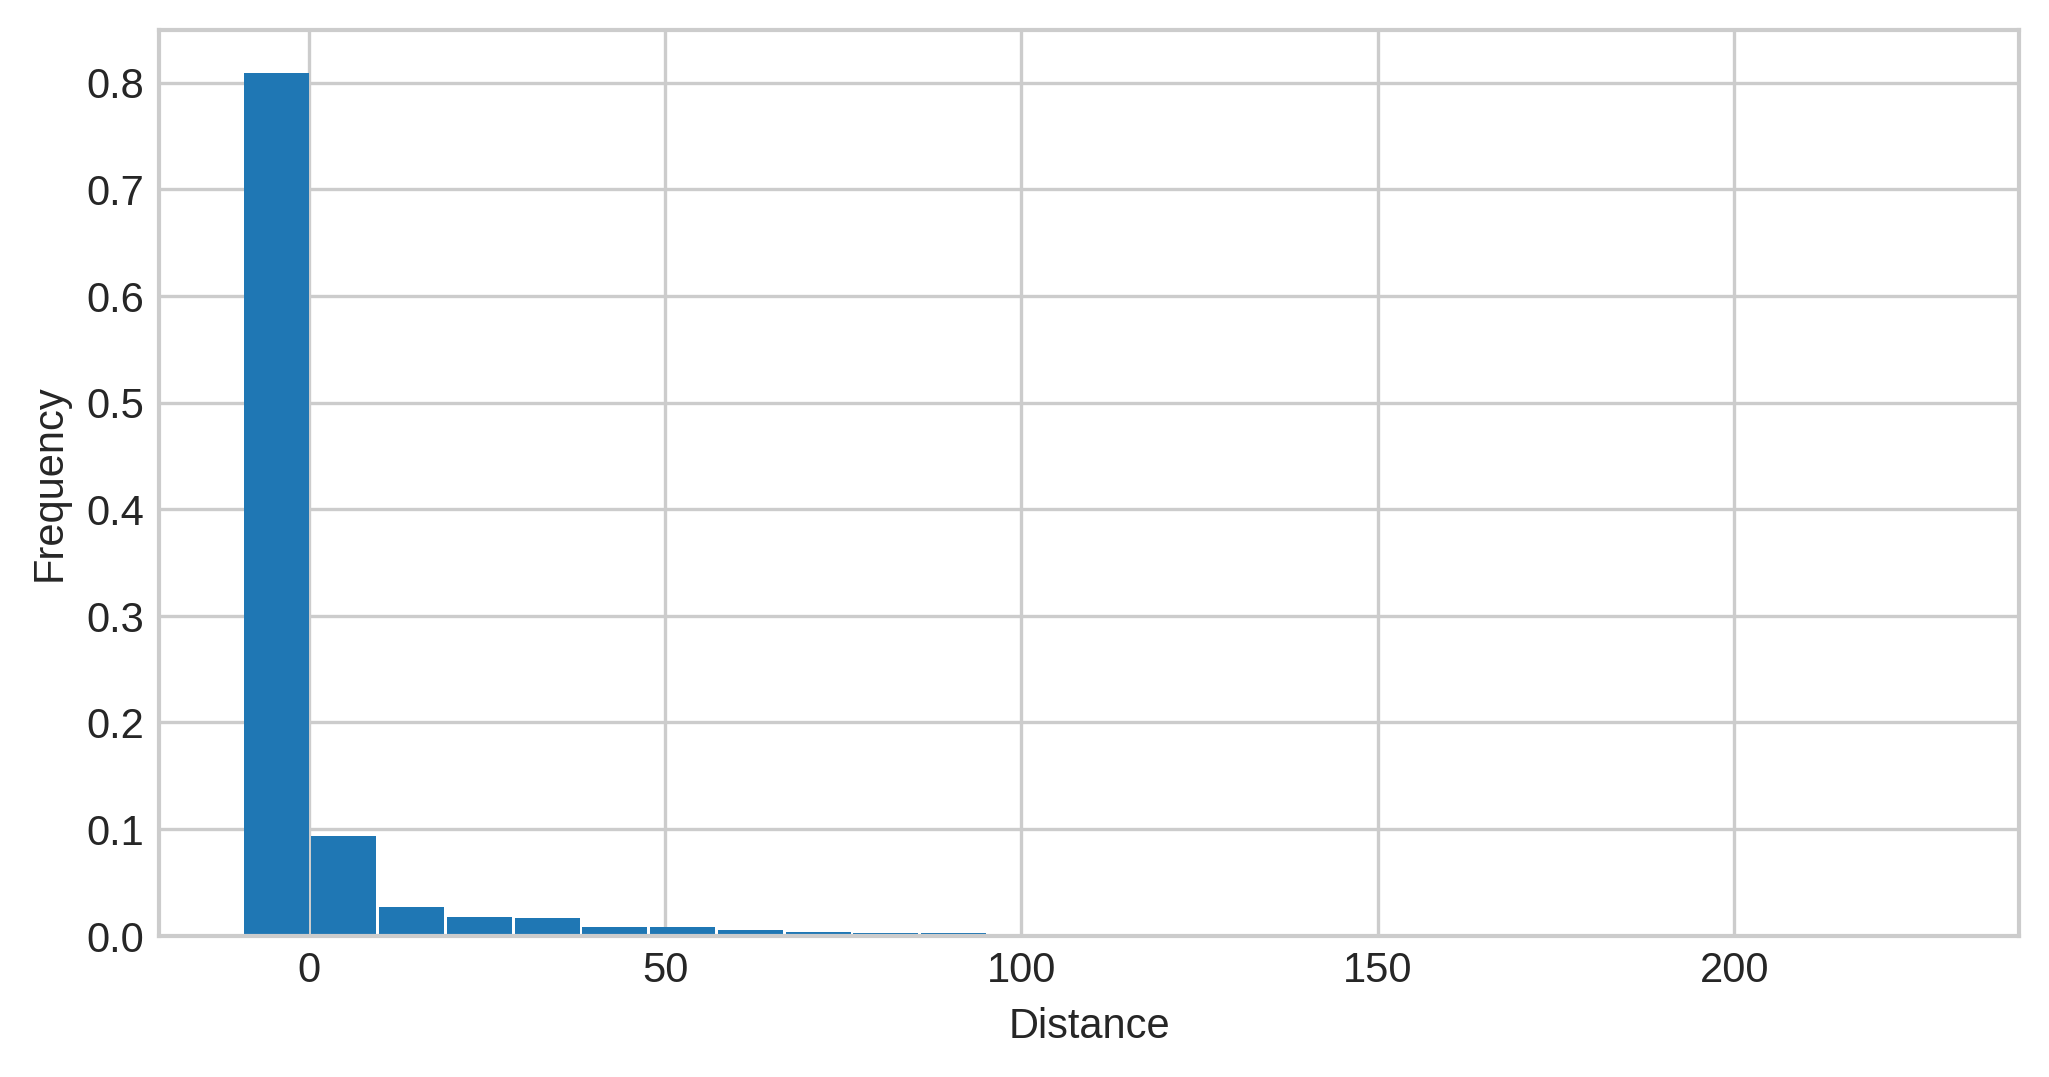

<Figure size 2400x1200 with 0 Axes>

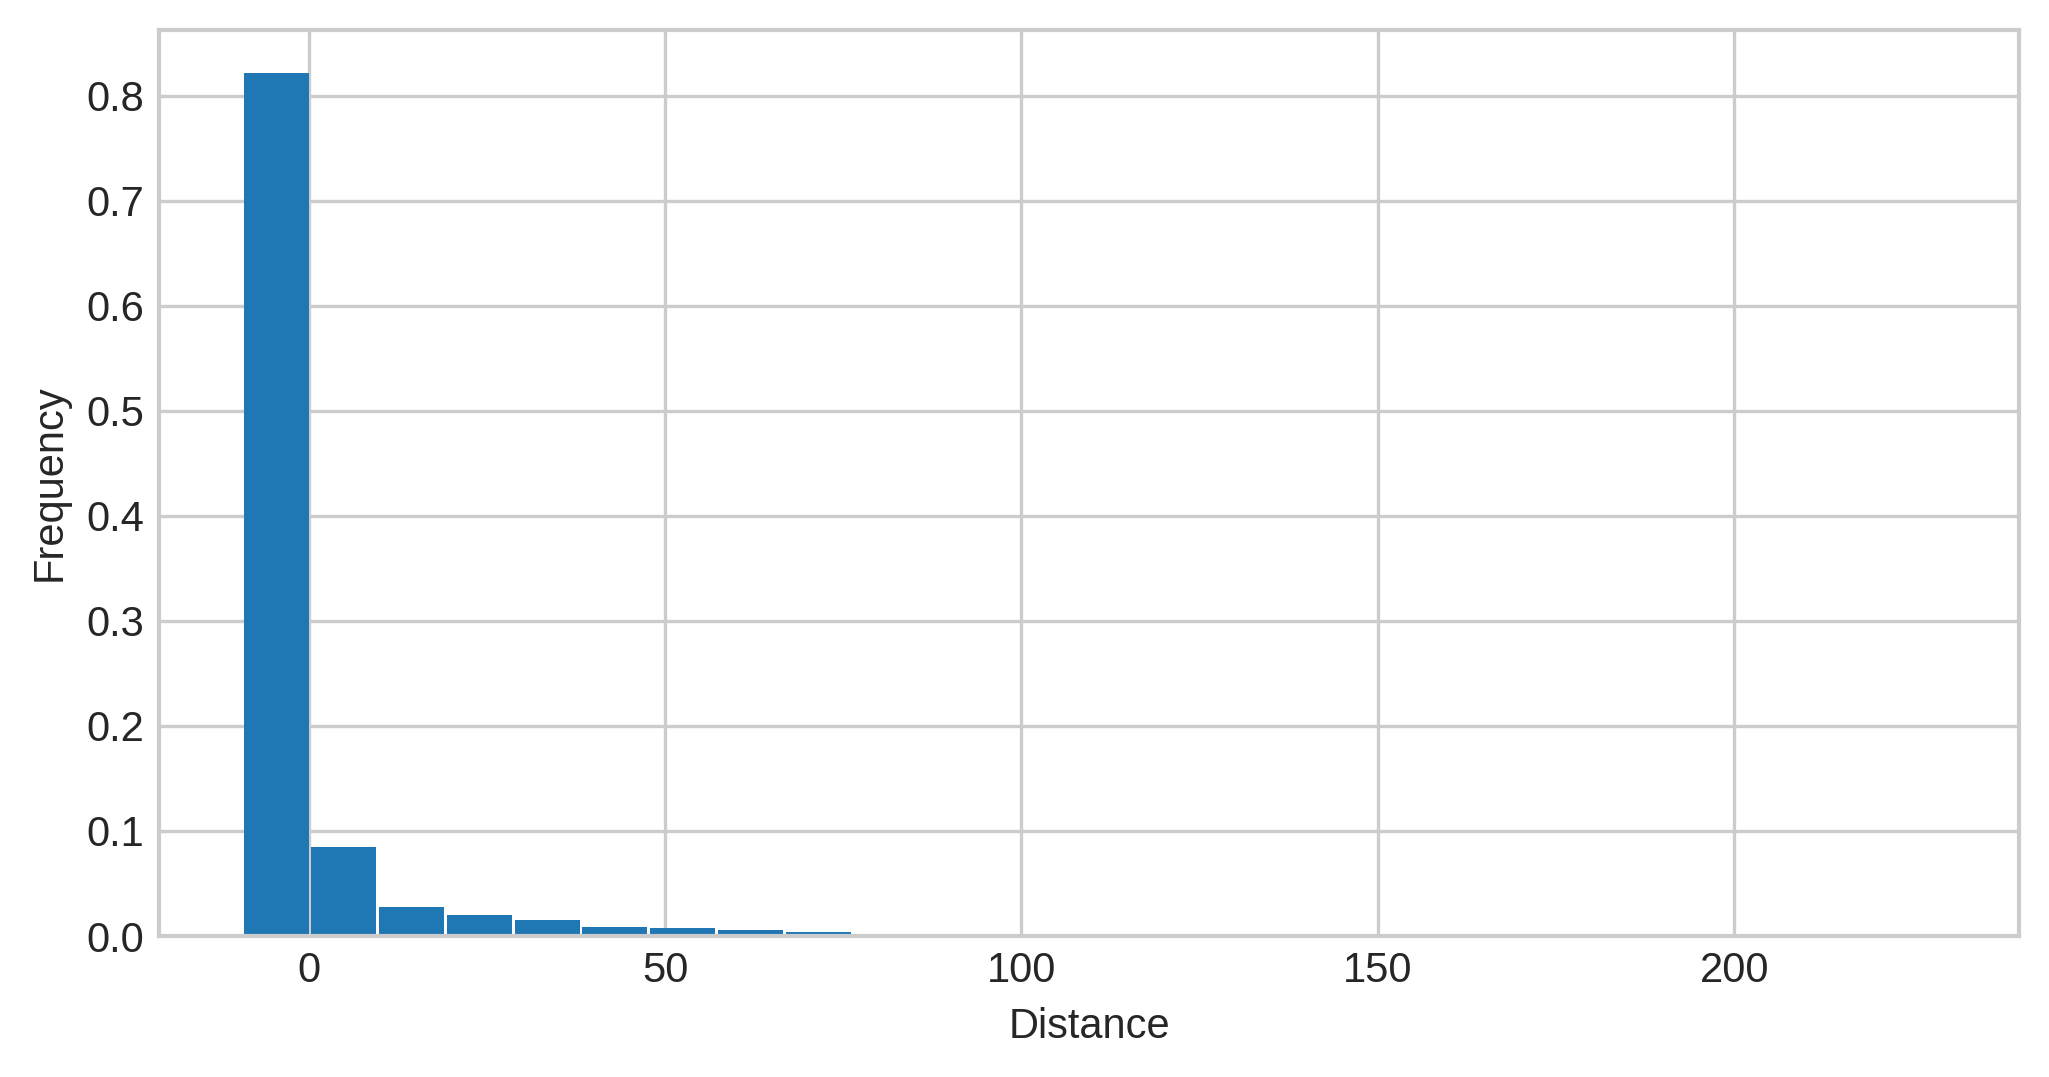

<Figure size 2400x1200 with 0 Axes>

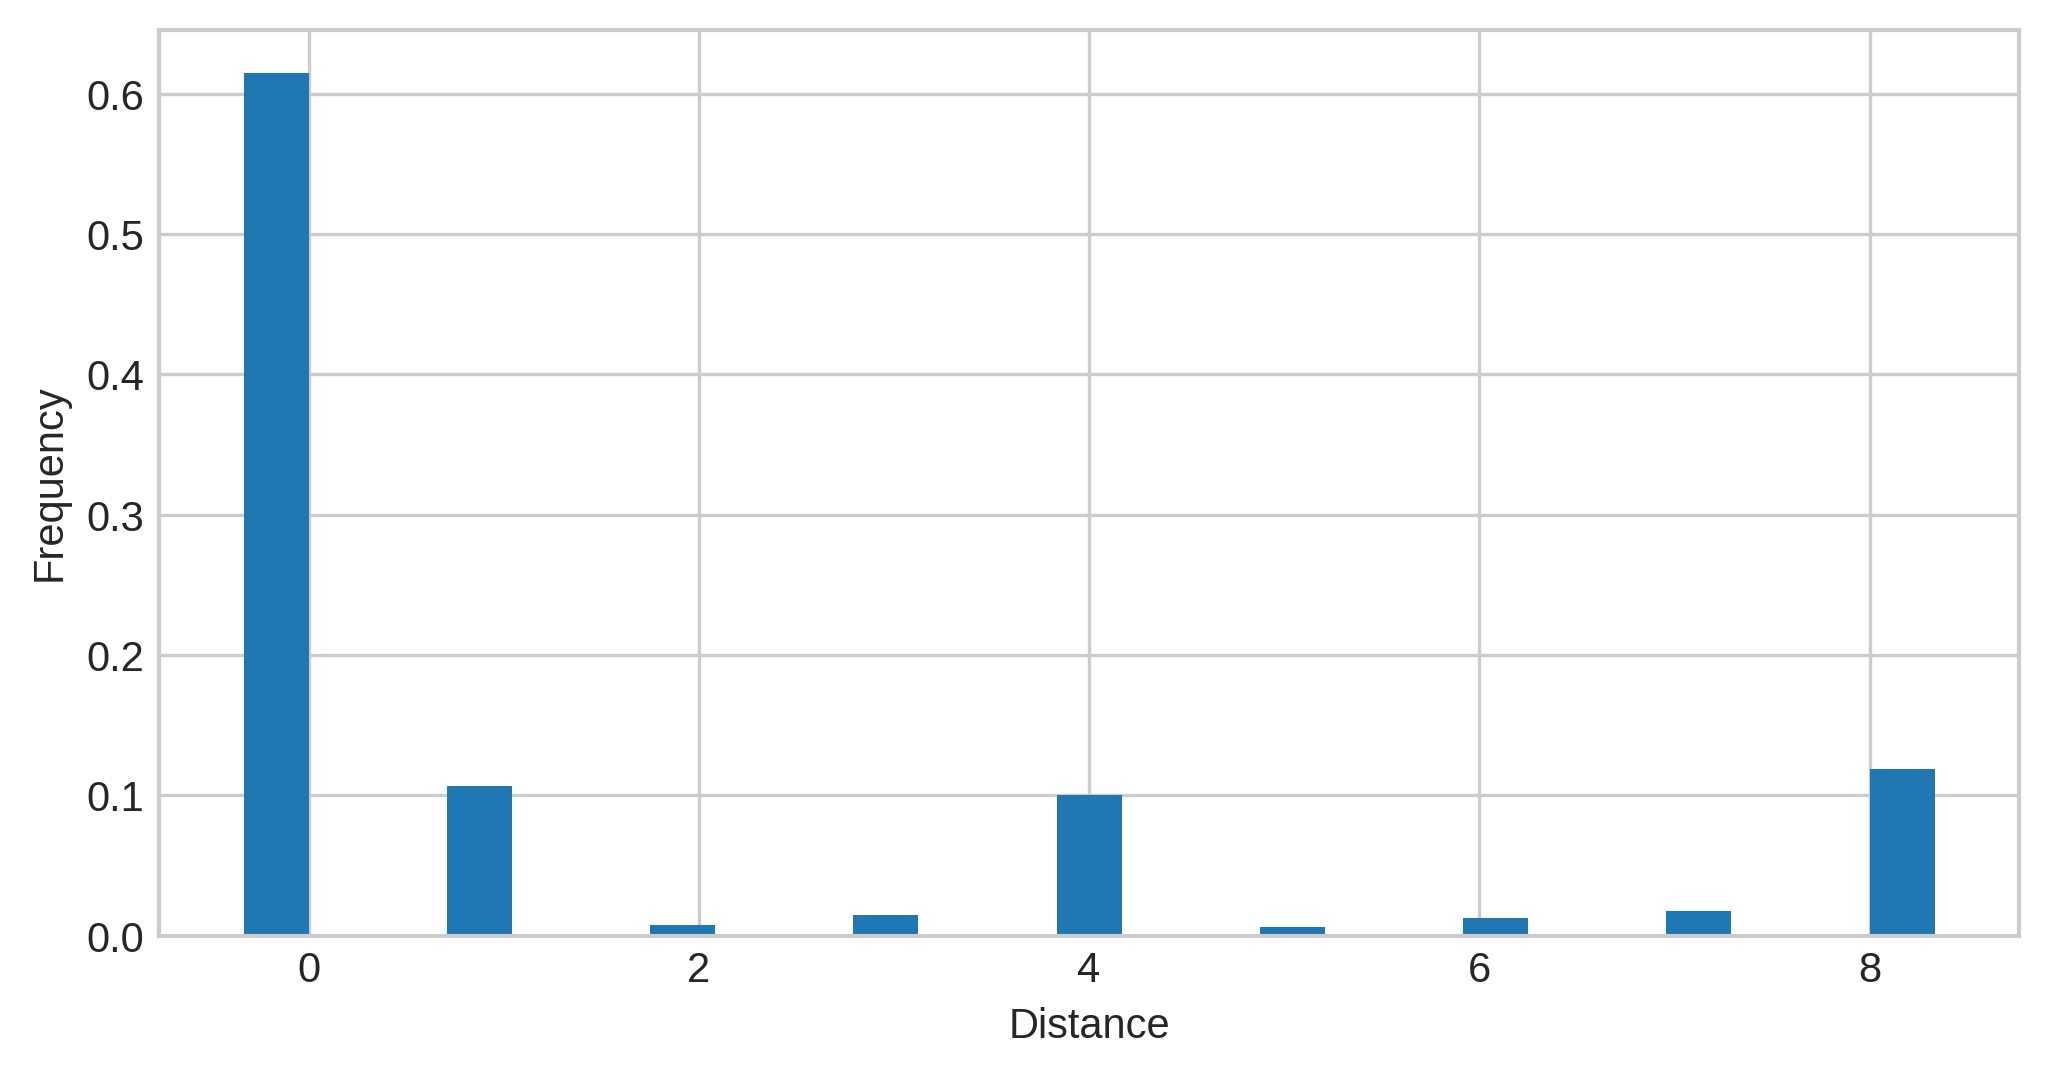

<Figure size 2400x1200 with 0 Axes>

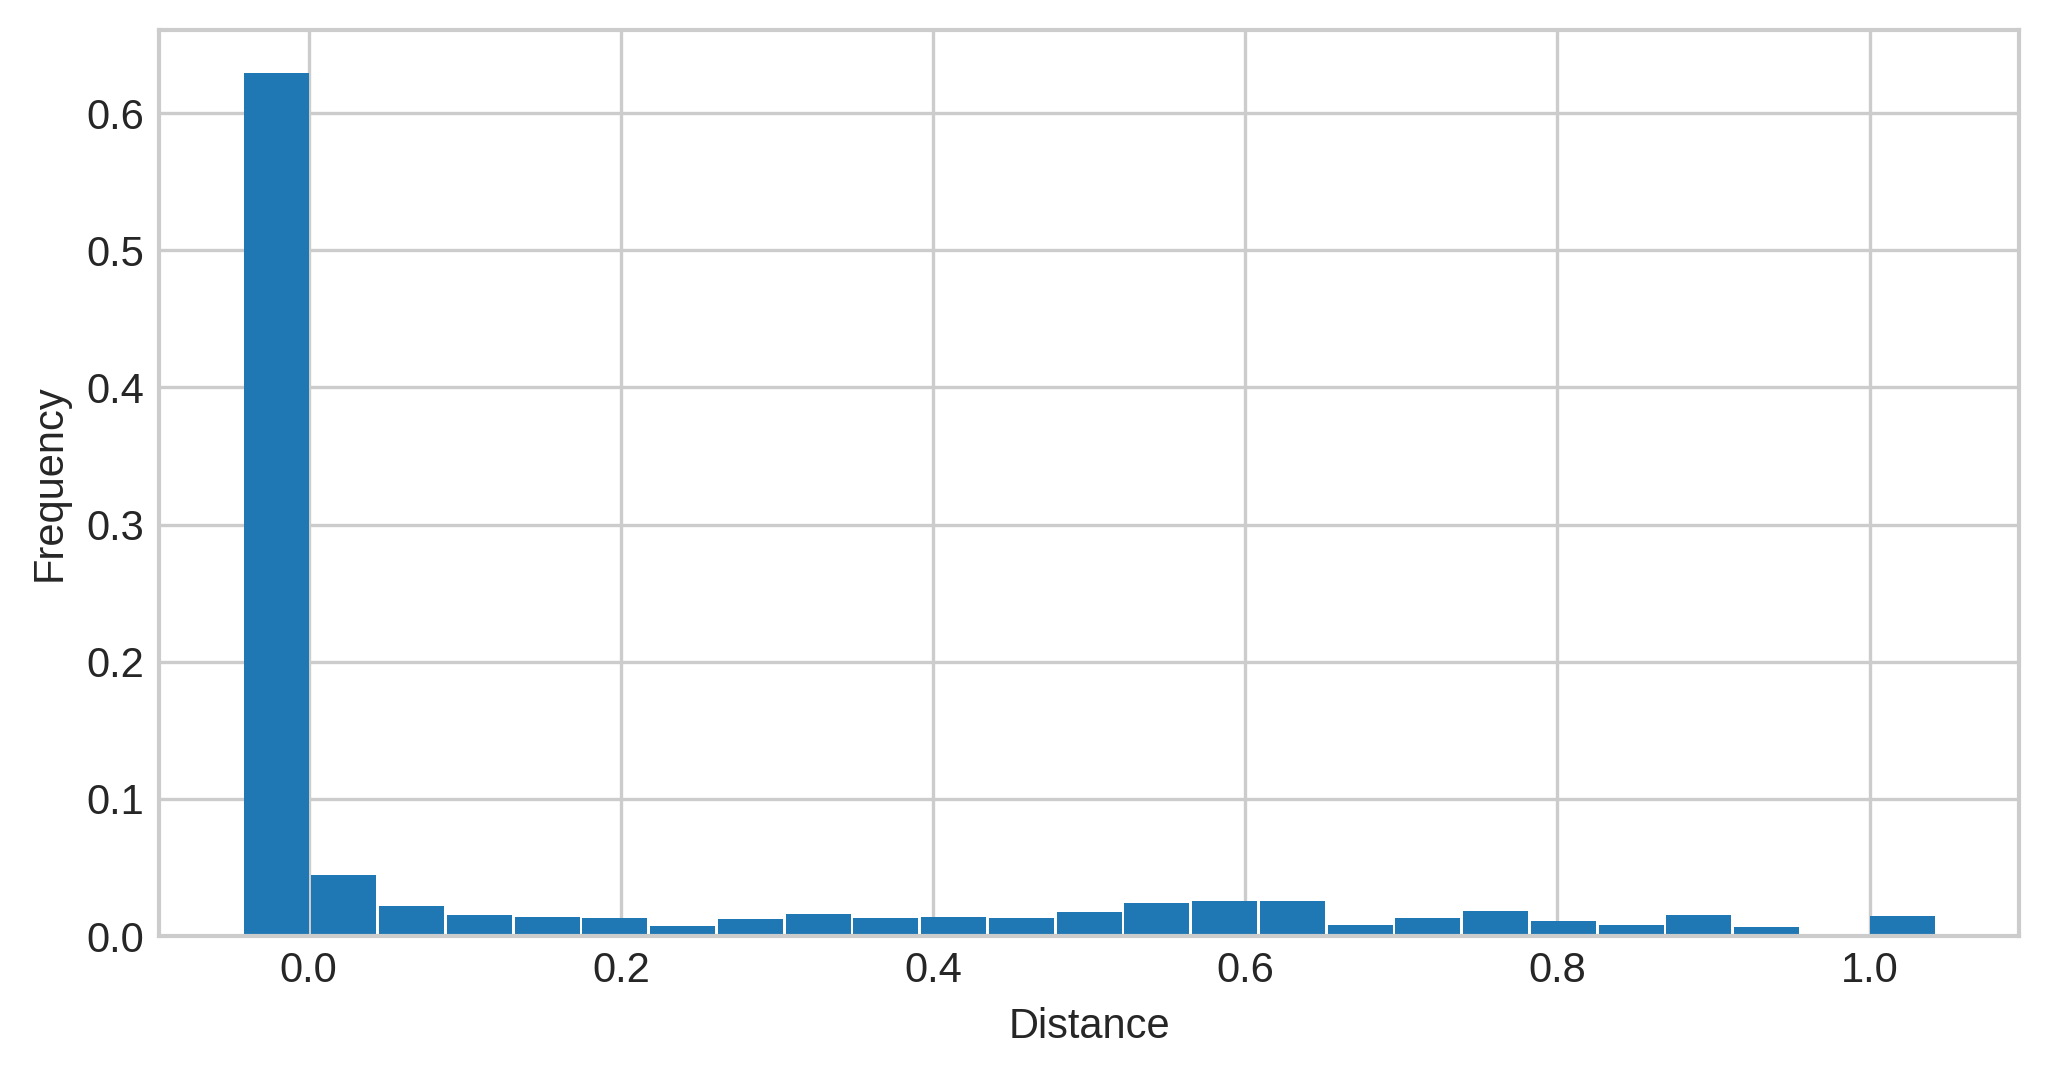

<Figure size 2400x1200 with 0 Axes>

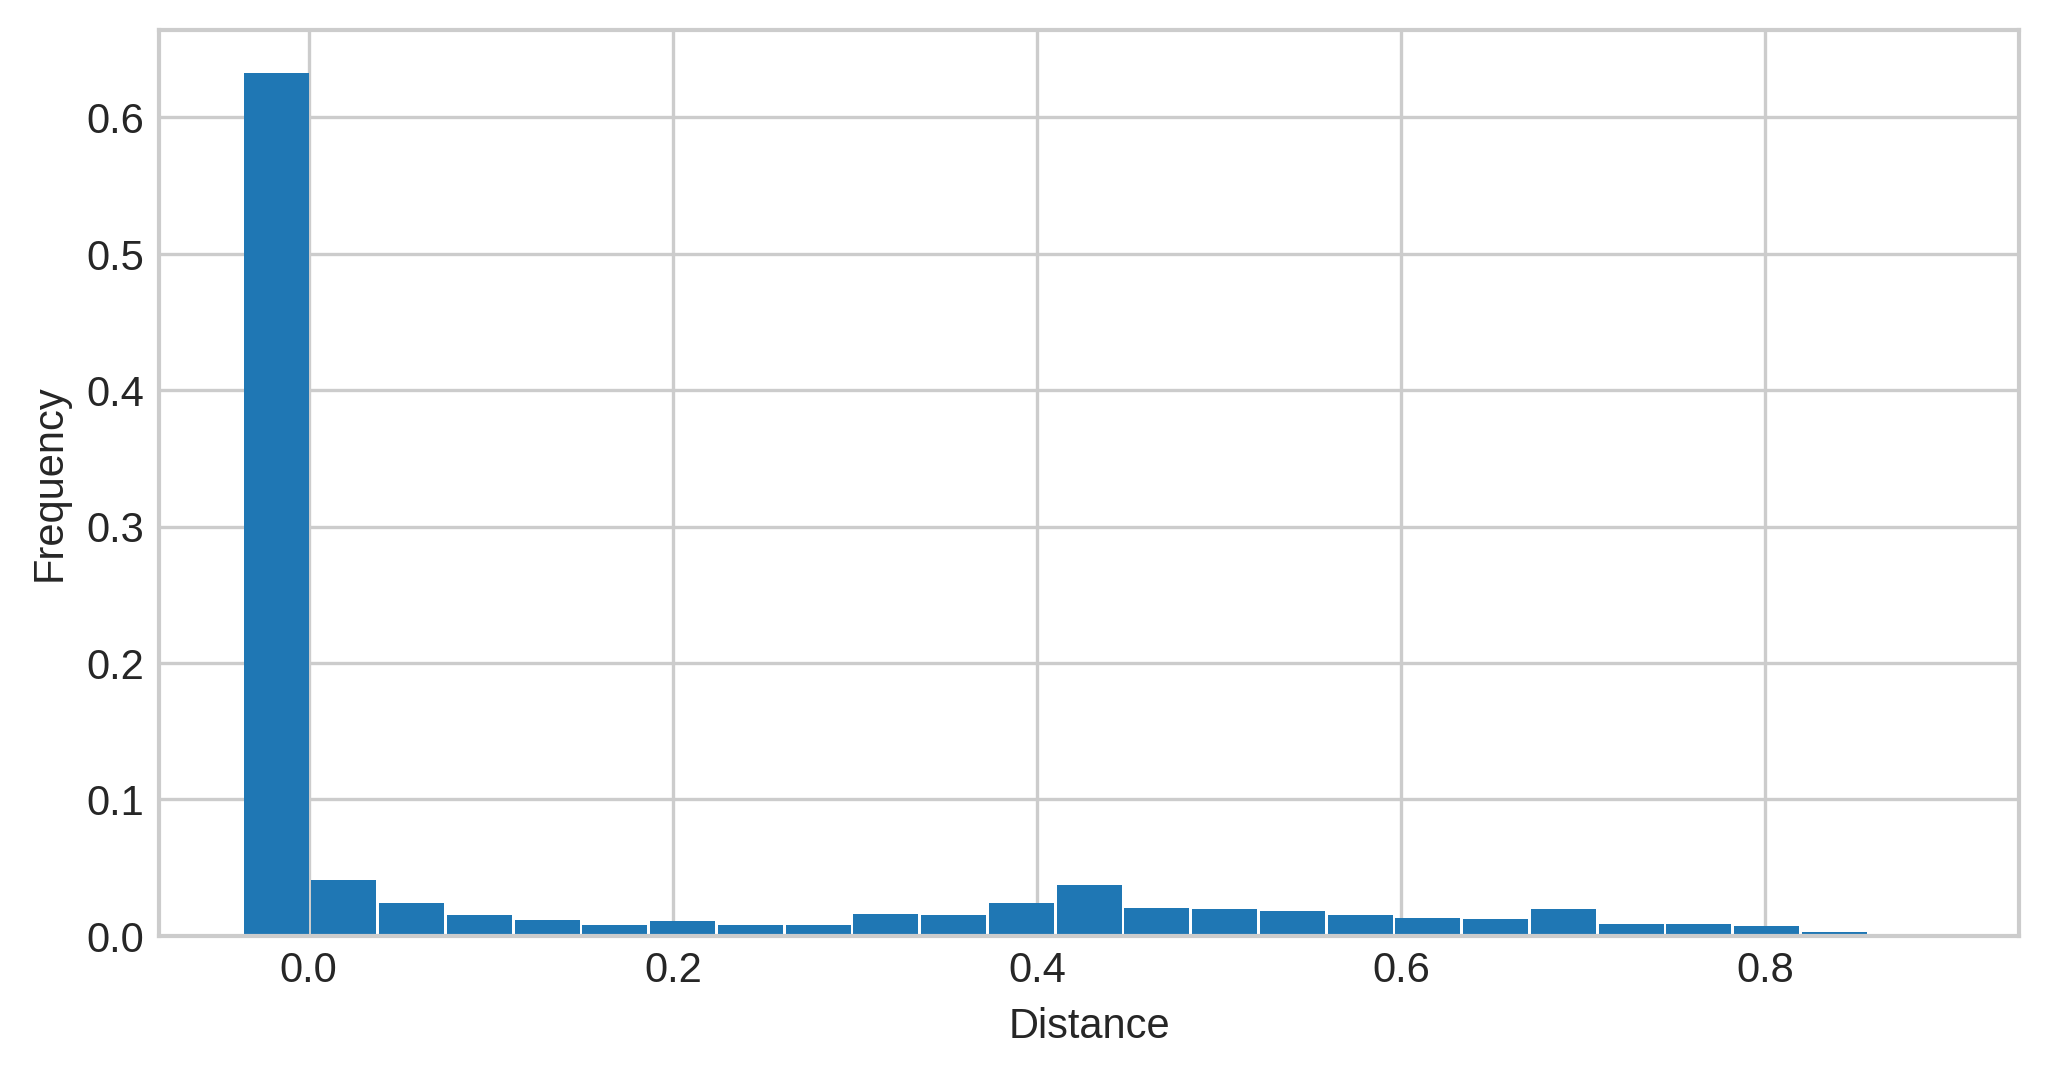

<Figure size 2400x1200 with 0 Axes>

In [233]:
from scipy import stats

HISTOGRAM_XLABEL = "Distance"
HISTOGRAM_YLABEL = "Frequency"


def histogram(distance_data, column=DISTANCE_GEOMETRIC, bins=25, save_fig=True):
    f = plt.figure()
    ax = f.add_subplot(111)
#     ax=distance_data[column].plot.hist(cumulative=False, density=10,alpha=.6, bins=300, normed=1)
    res = stats.relfreq(distance_data[column], numbins=bins)
    
    x = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size,res.frequency.size)
    ax.bar(x, res.frequency, width=res.binsize)
#     ax.set_xlim([x.min()*0.9, x.max()*1.05])
    plt.xlabel(HISTOGRAM_XLABEL)
    plt.ylabel(HISTOGRAM_YLABEL)

    if save_fig:
        f.savefig(FIGURE_PATH+"distance-distribution-histogram-"+column+"-"+str(bins)+".pdf", bbox_inches='tight')

    # a bit of cleanup
    plt.show()
    plt.clf()

def make_distance_descriptions(df):    
    descriprions = pd.DataFrame( [df[c].describe() for c in DISTANCES ] )
    descriprions["Relative std"] = descriprions.apply(lambda x: x['std']/x['mean'] , axis=1)
    descriprions["Variance"] = [df[c].var() for c in DISTANCES ]
    descriprions["Kurtosis"] = [df[c].kurtosis() for c in DISTANCES ]
    descriprions["Skew"] = [df[c].skew() for c in DISTANCES ]
    del descriprions["25%"]
    del descriprions["50%"]
    del descriprions["75%"]
    del descriprions["count"]
    
    return descriprions[ ['min','max','mean','std','Relative std','Skew','Kurtosis'] ]

exact_matches_count = len(matches_with_distances.loc[matches['Dist. Geometric'] == 0])
close_matches_count = len(matches_with_distances.loc[matches['Dist. Geometric'] != 0])

display(HTML("<h3>Exact to close match ratios</h3>") )
print ("total:" + str(exact_matches_count+close_matches_count) ) 
print ("exact:" + str(exact_matches_count) + "("+ str (exact_matches_count/(exact_matches_count+close_matches_count)*100 )+")")
print ("close:" + str(close_matches_count) + "("+ str (close_matches_count/(exact_matches_count+close_matches_count)*100 )+")")

# dsp(make_distance_descriptions(matches_with_distances))    
ltx(df=make_distance_descriptions(matches_with_distances), filename="distance-descriptions", to_display=True)

for col in DISTANCES:
    display(HTML("<h3>"+col+"</h3>"))
    histogram(matches_with_distances,col)   

# Constituency evaluation

In [100]:
# ---------
matches, manual_nm, parse_nm = read_batch( OCD1_const_file_list)
# --------- 

## Unit types - [OCD1] corpus

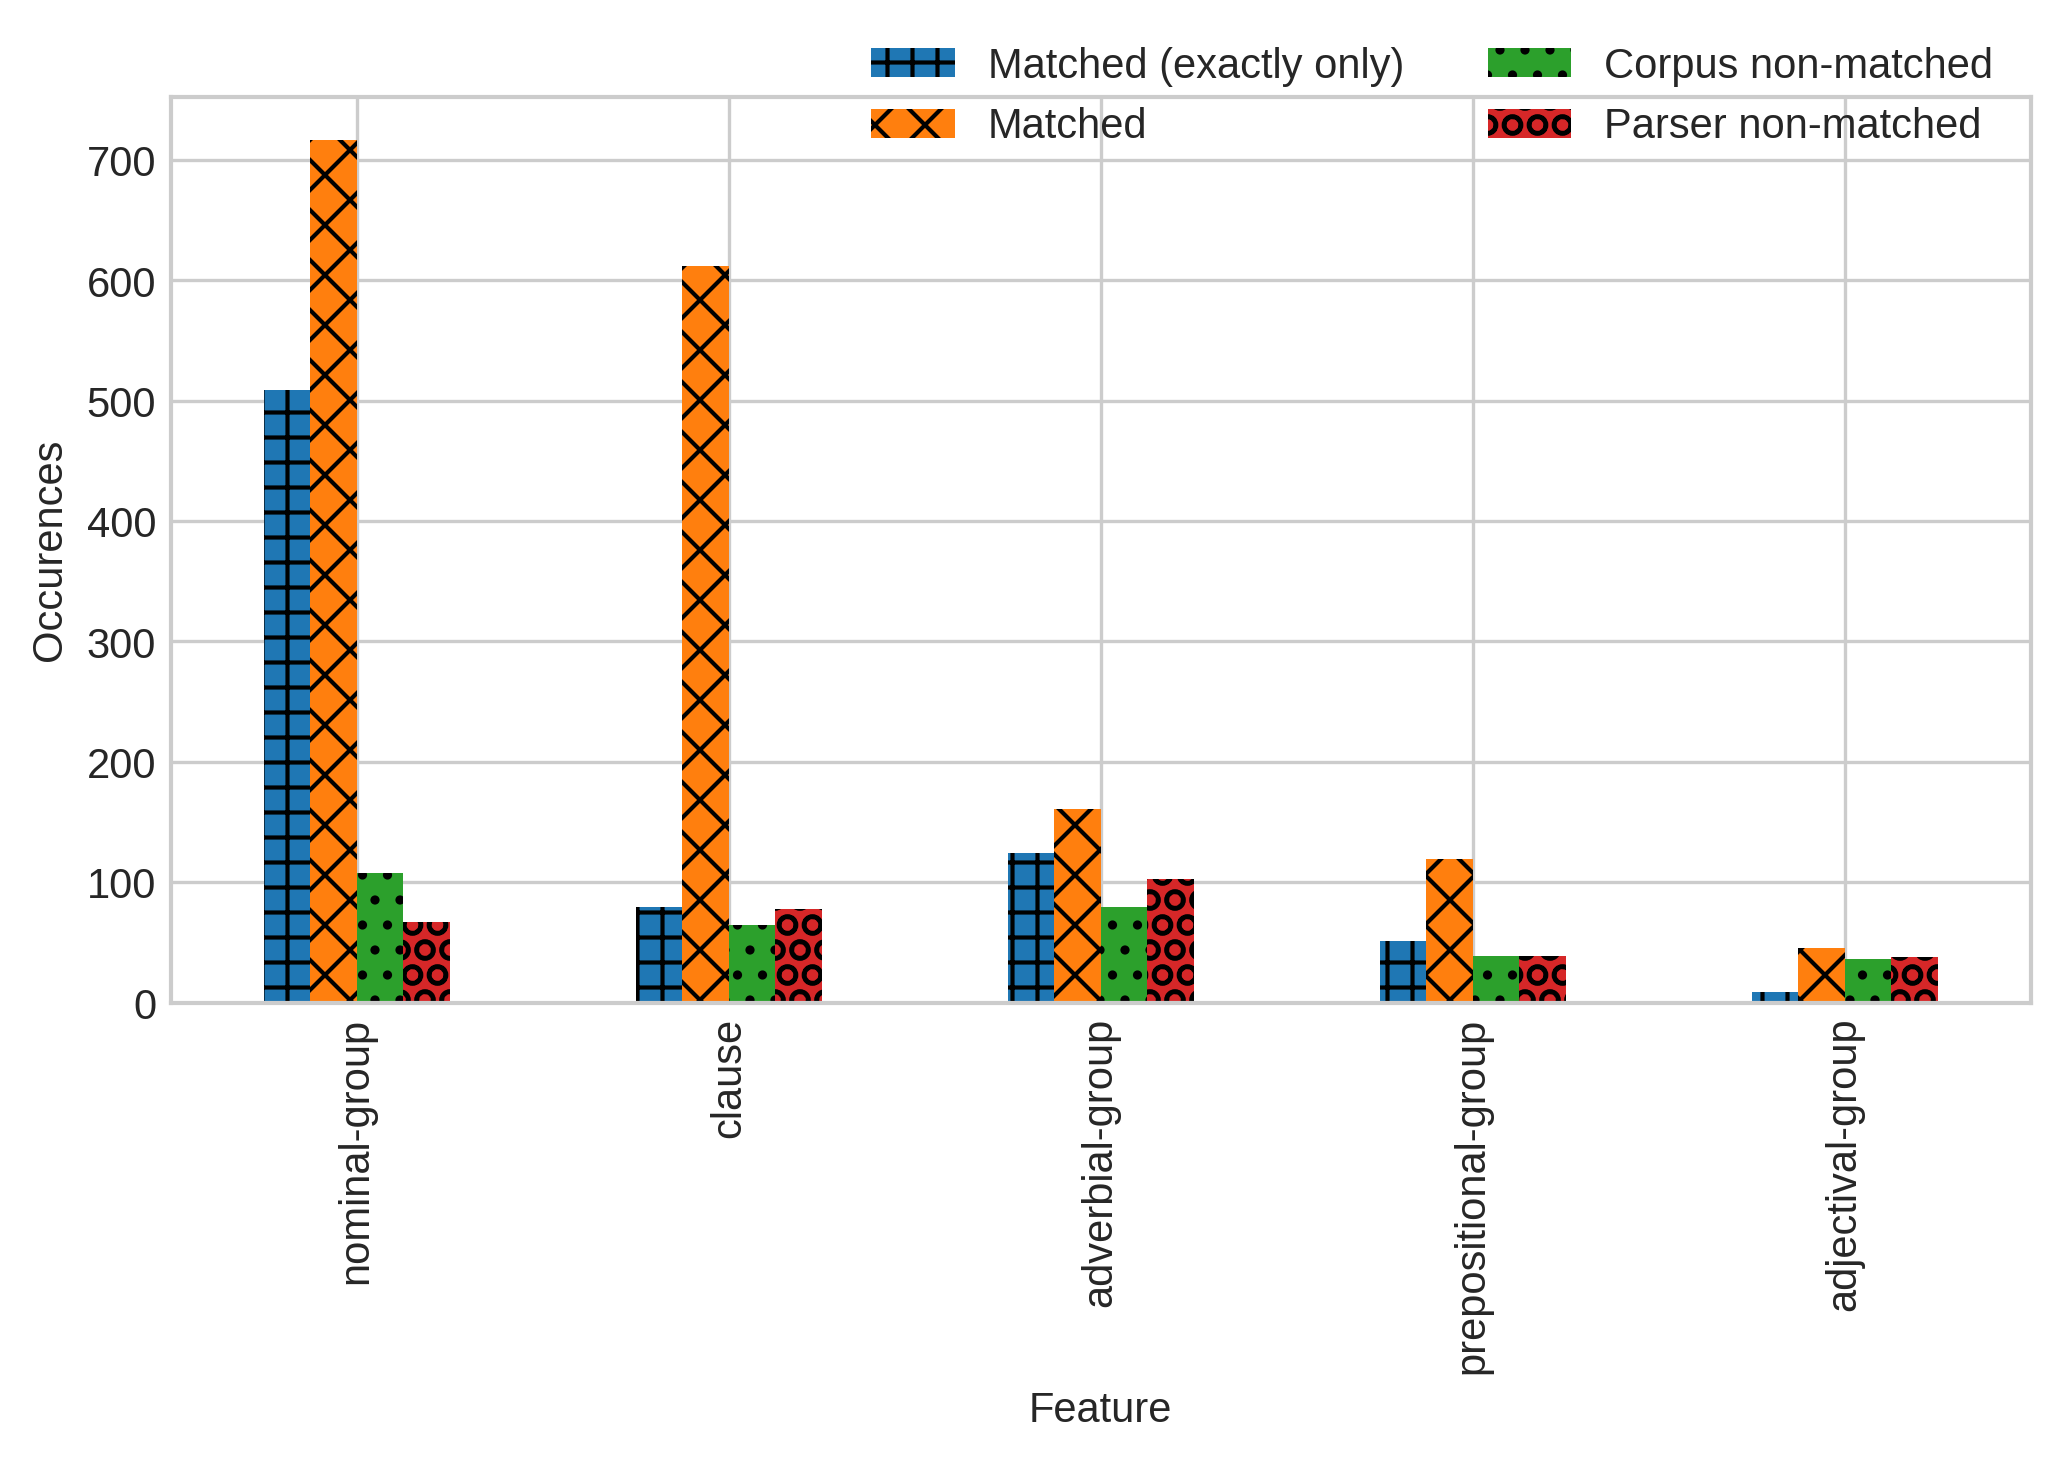

<Figure size 2400x1200 with 0 Axes>

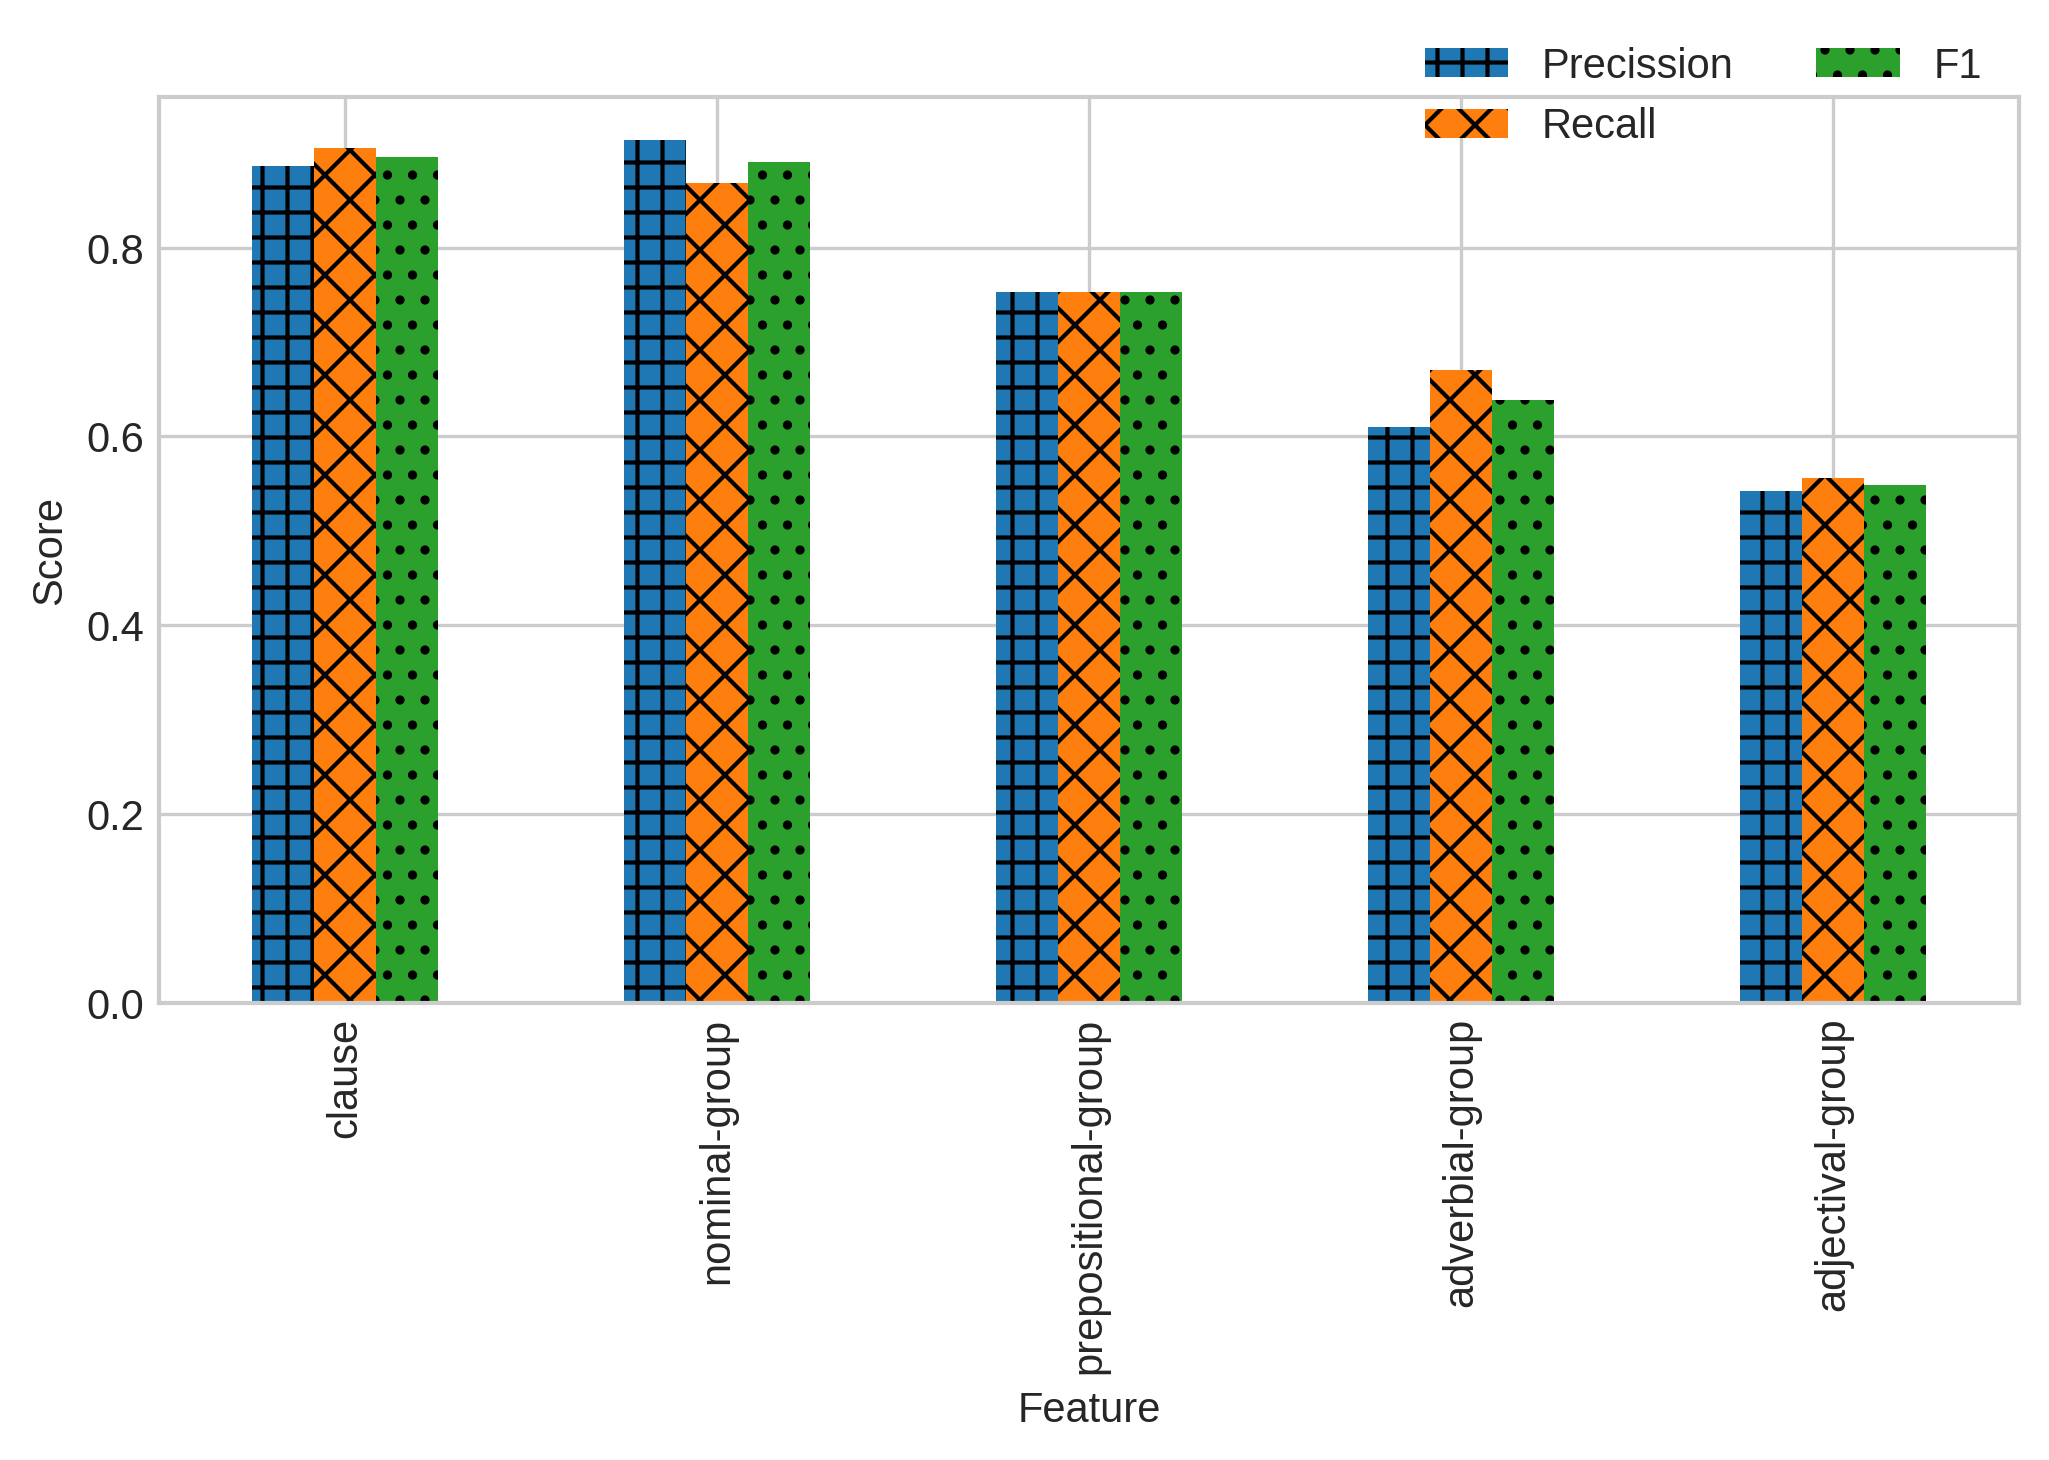

<Figure size 2400x1200 with 0 Axes>

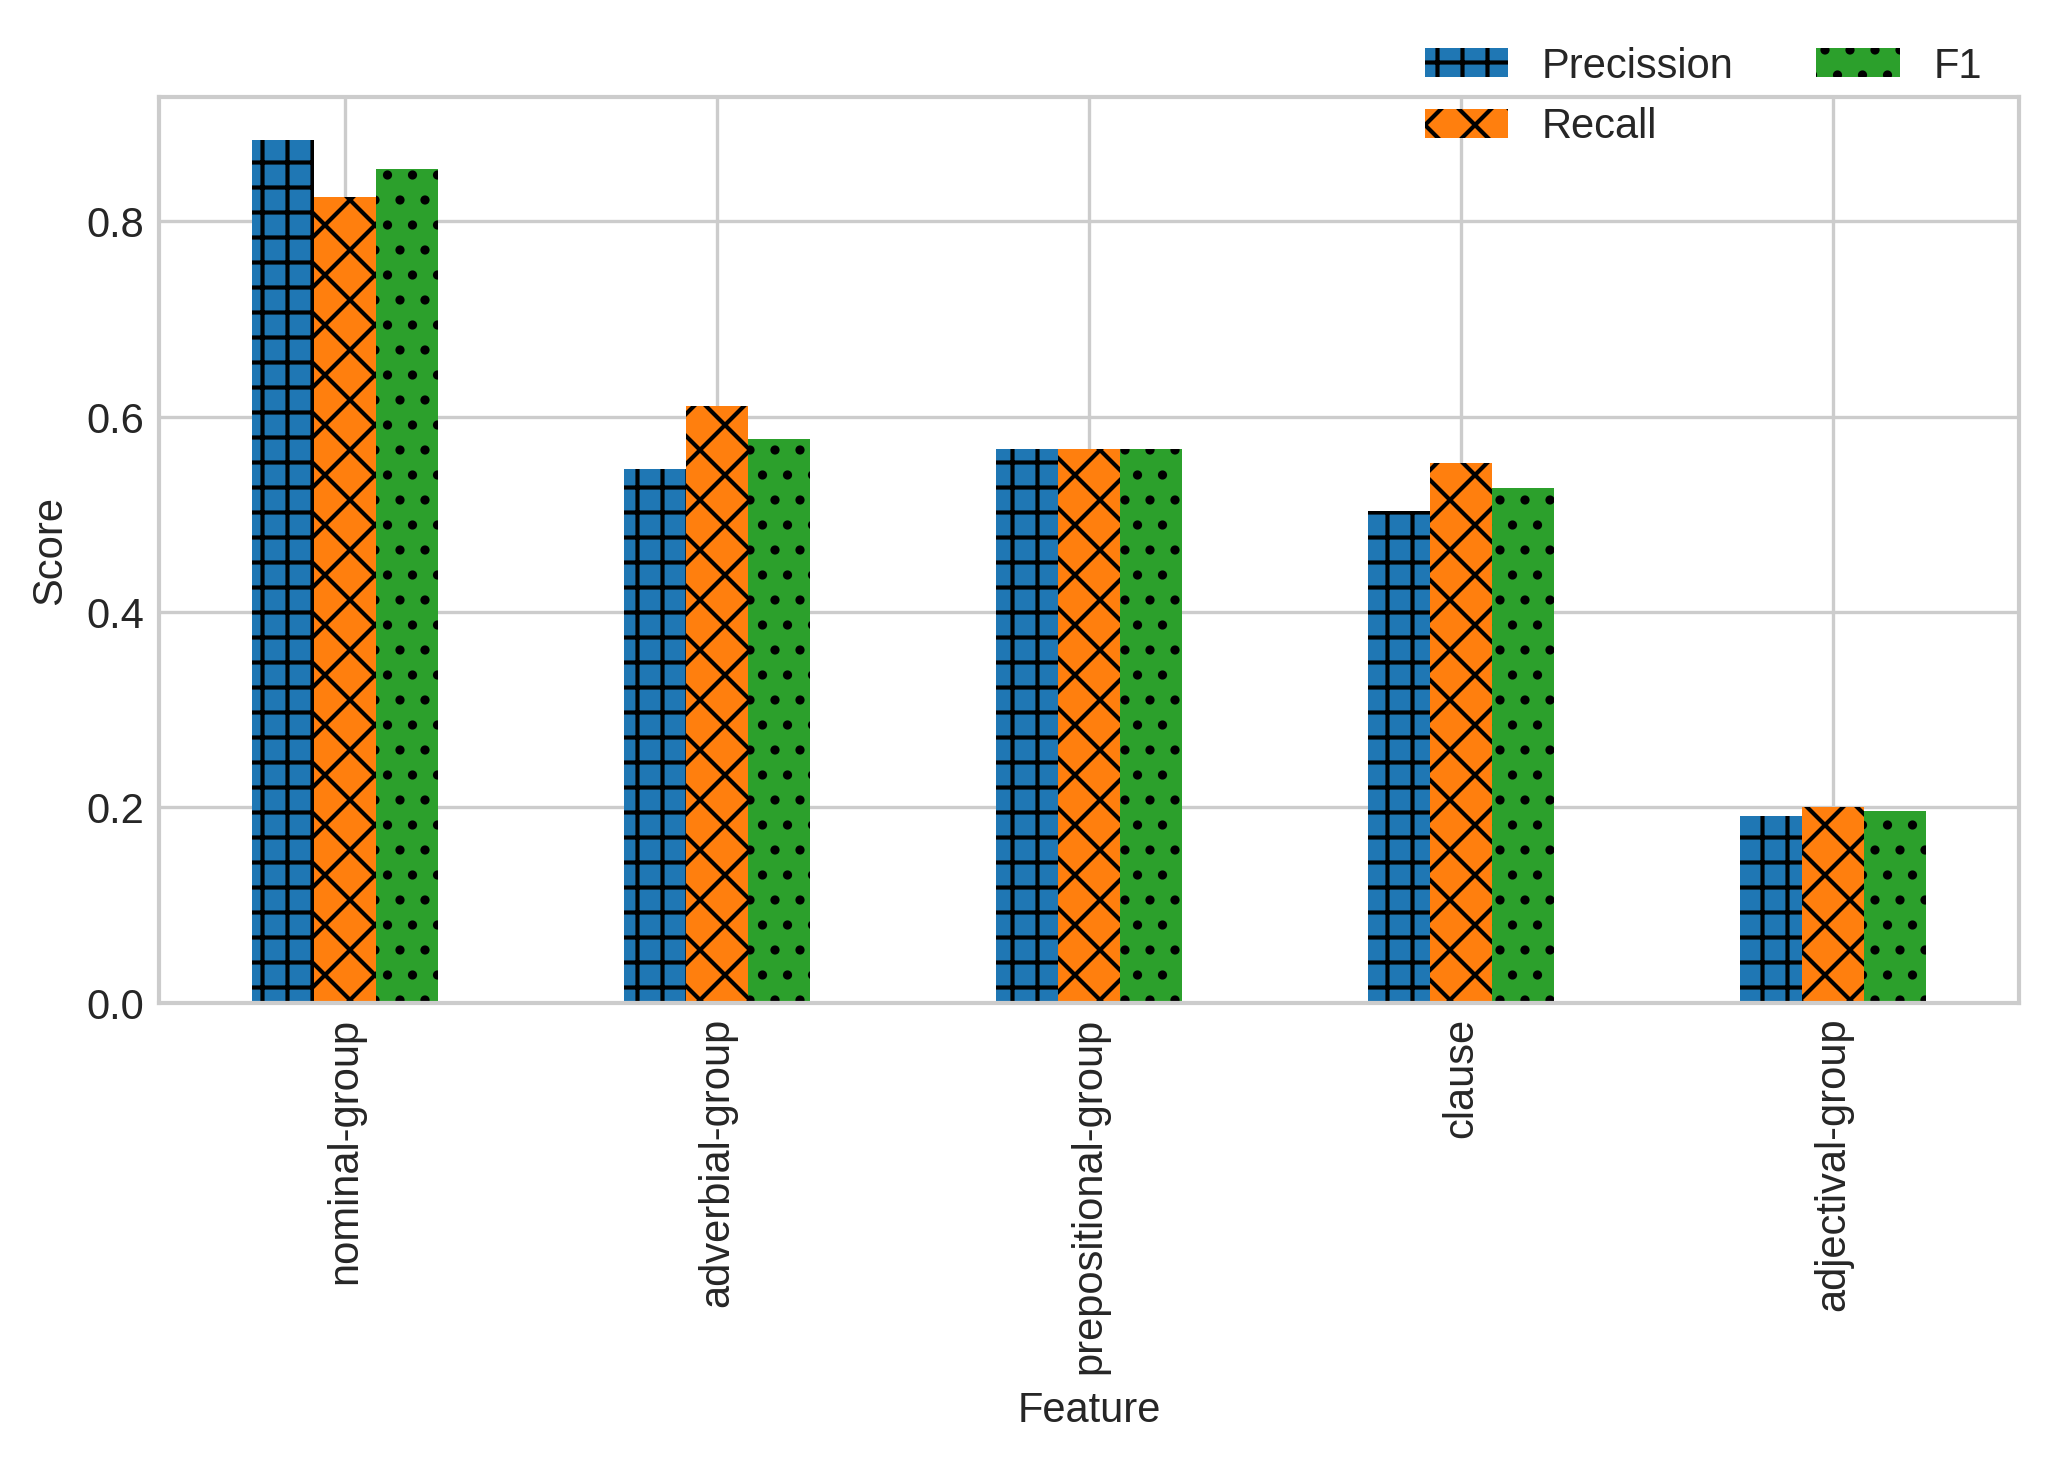

<Figure size 2400x1200 with 0 Axes>

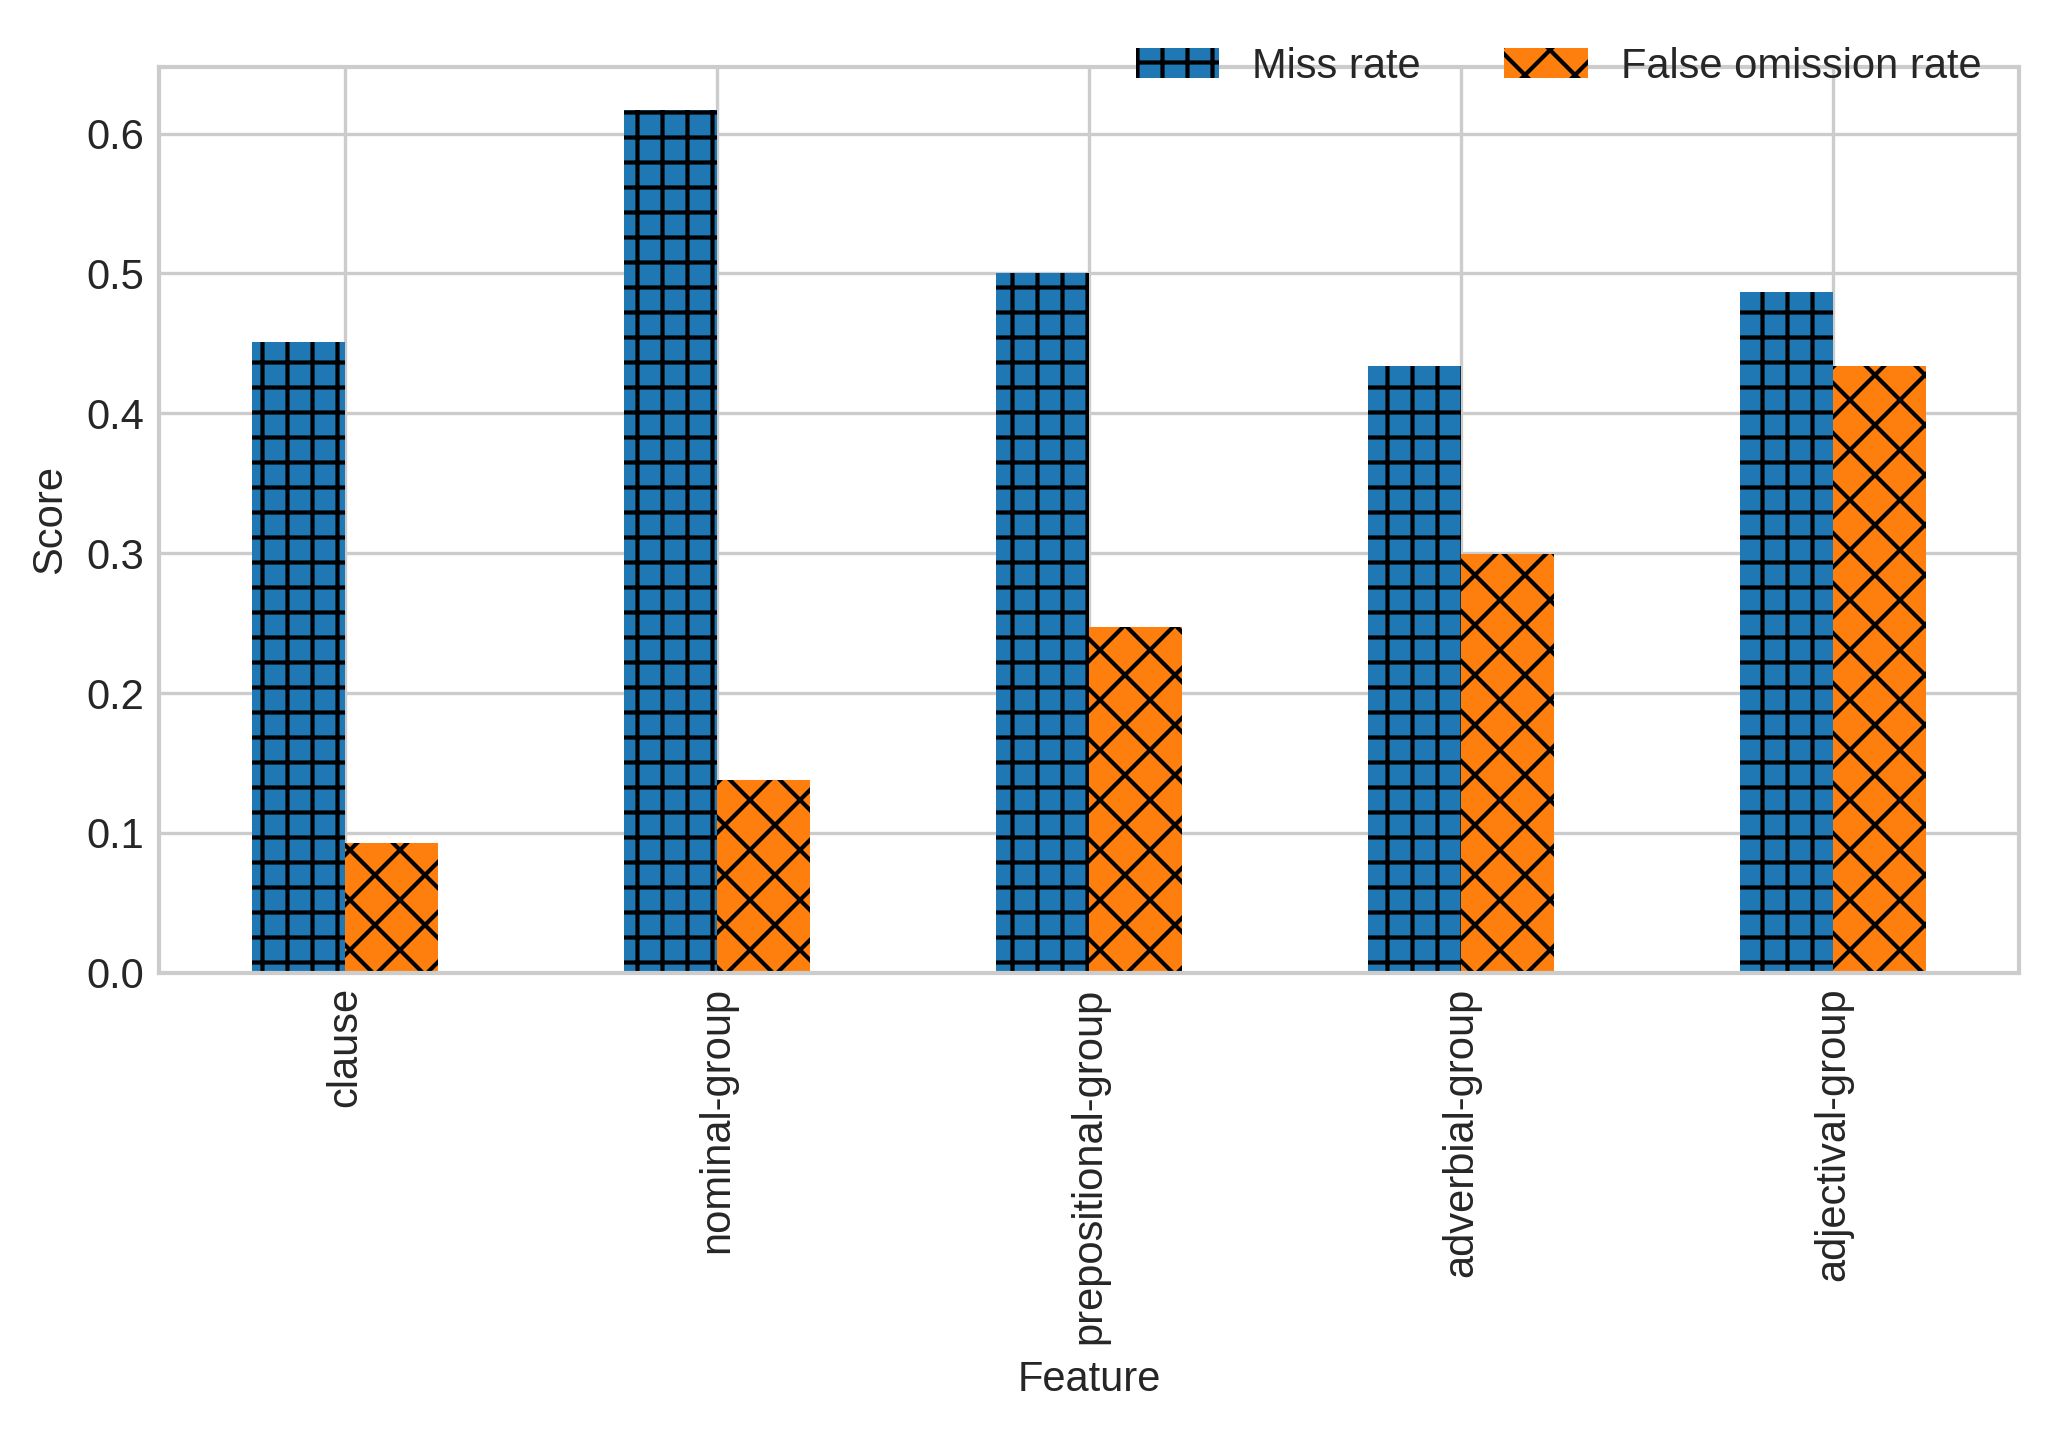

<Figure size 2400x1200 with 0 Axes>

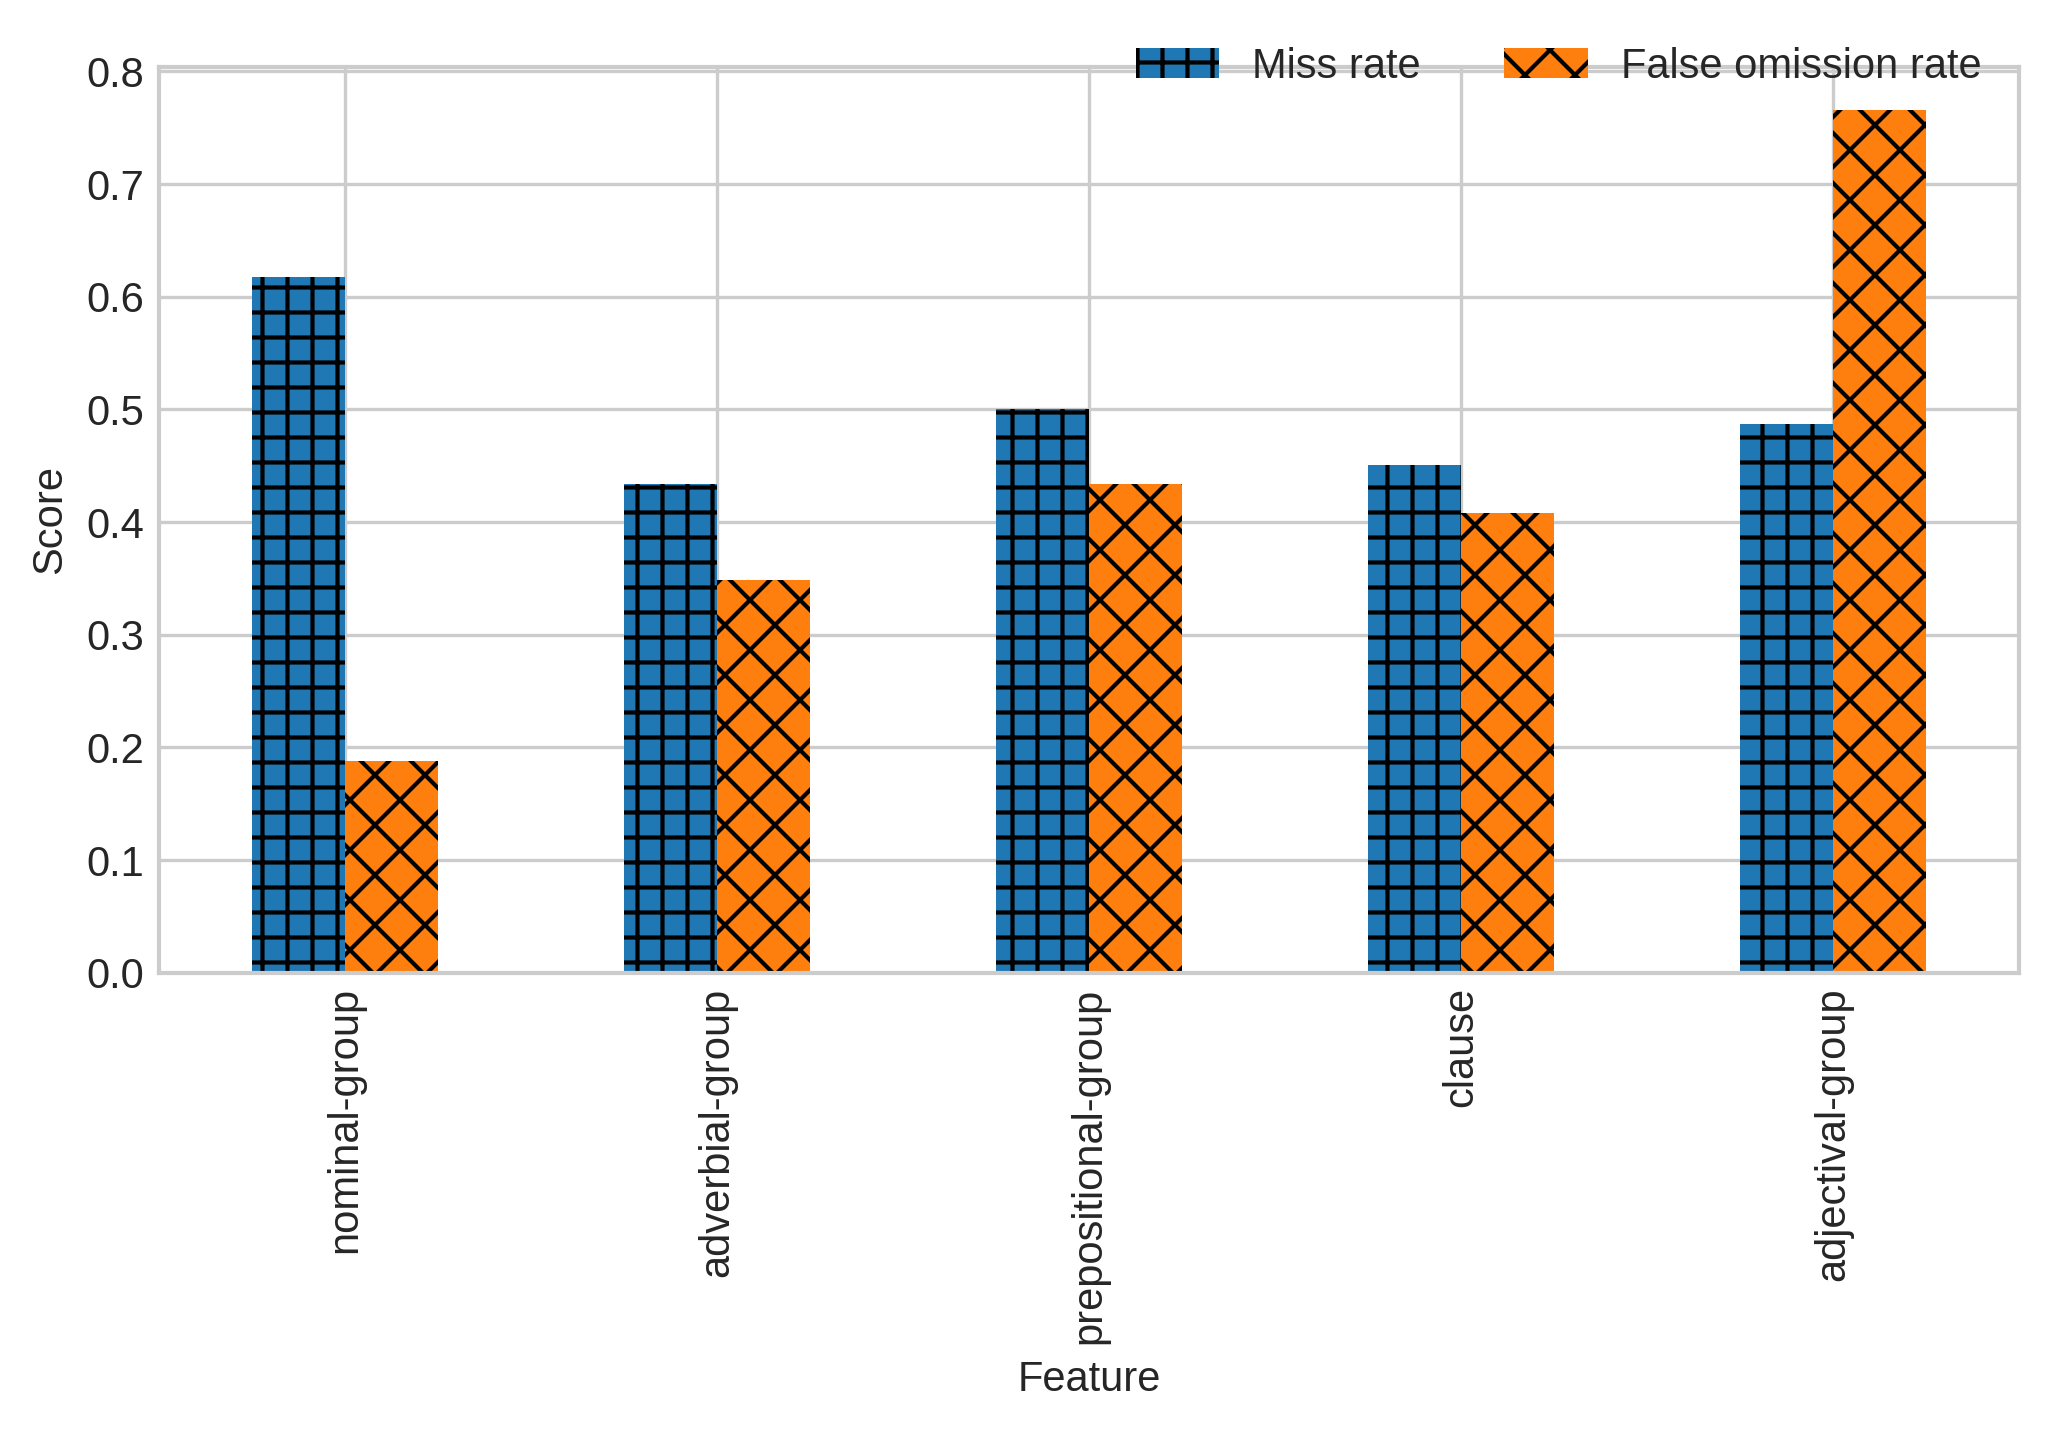

<Figure size 2400x1200 with 0 Axes>

In [101]:
aggregate = aggregate_data_by_feature(matches, manual_nm, parse_nm)
filters=["clause","prepositional-group","nominal-group",
                            "nominal-group","adjectival-group","adverbial-group",
#                            "verbal-group",
                           ]
make_stats2(aggregate, "unit-types-ocd", filters=filters, make_exact_also=True)

## Unit elements - [OCD1] corpus

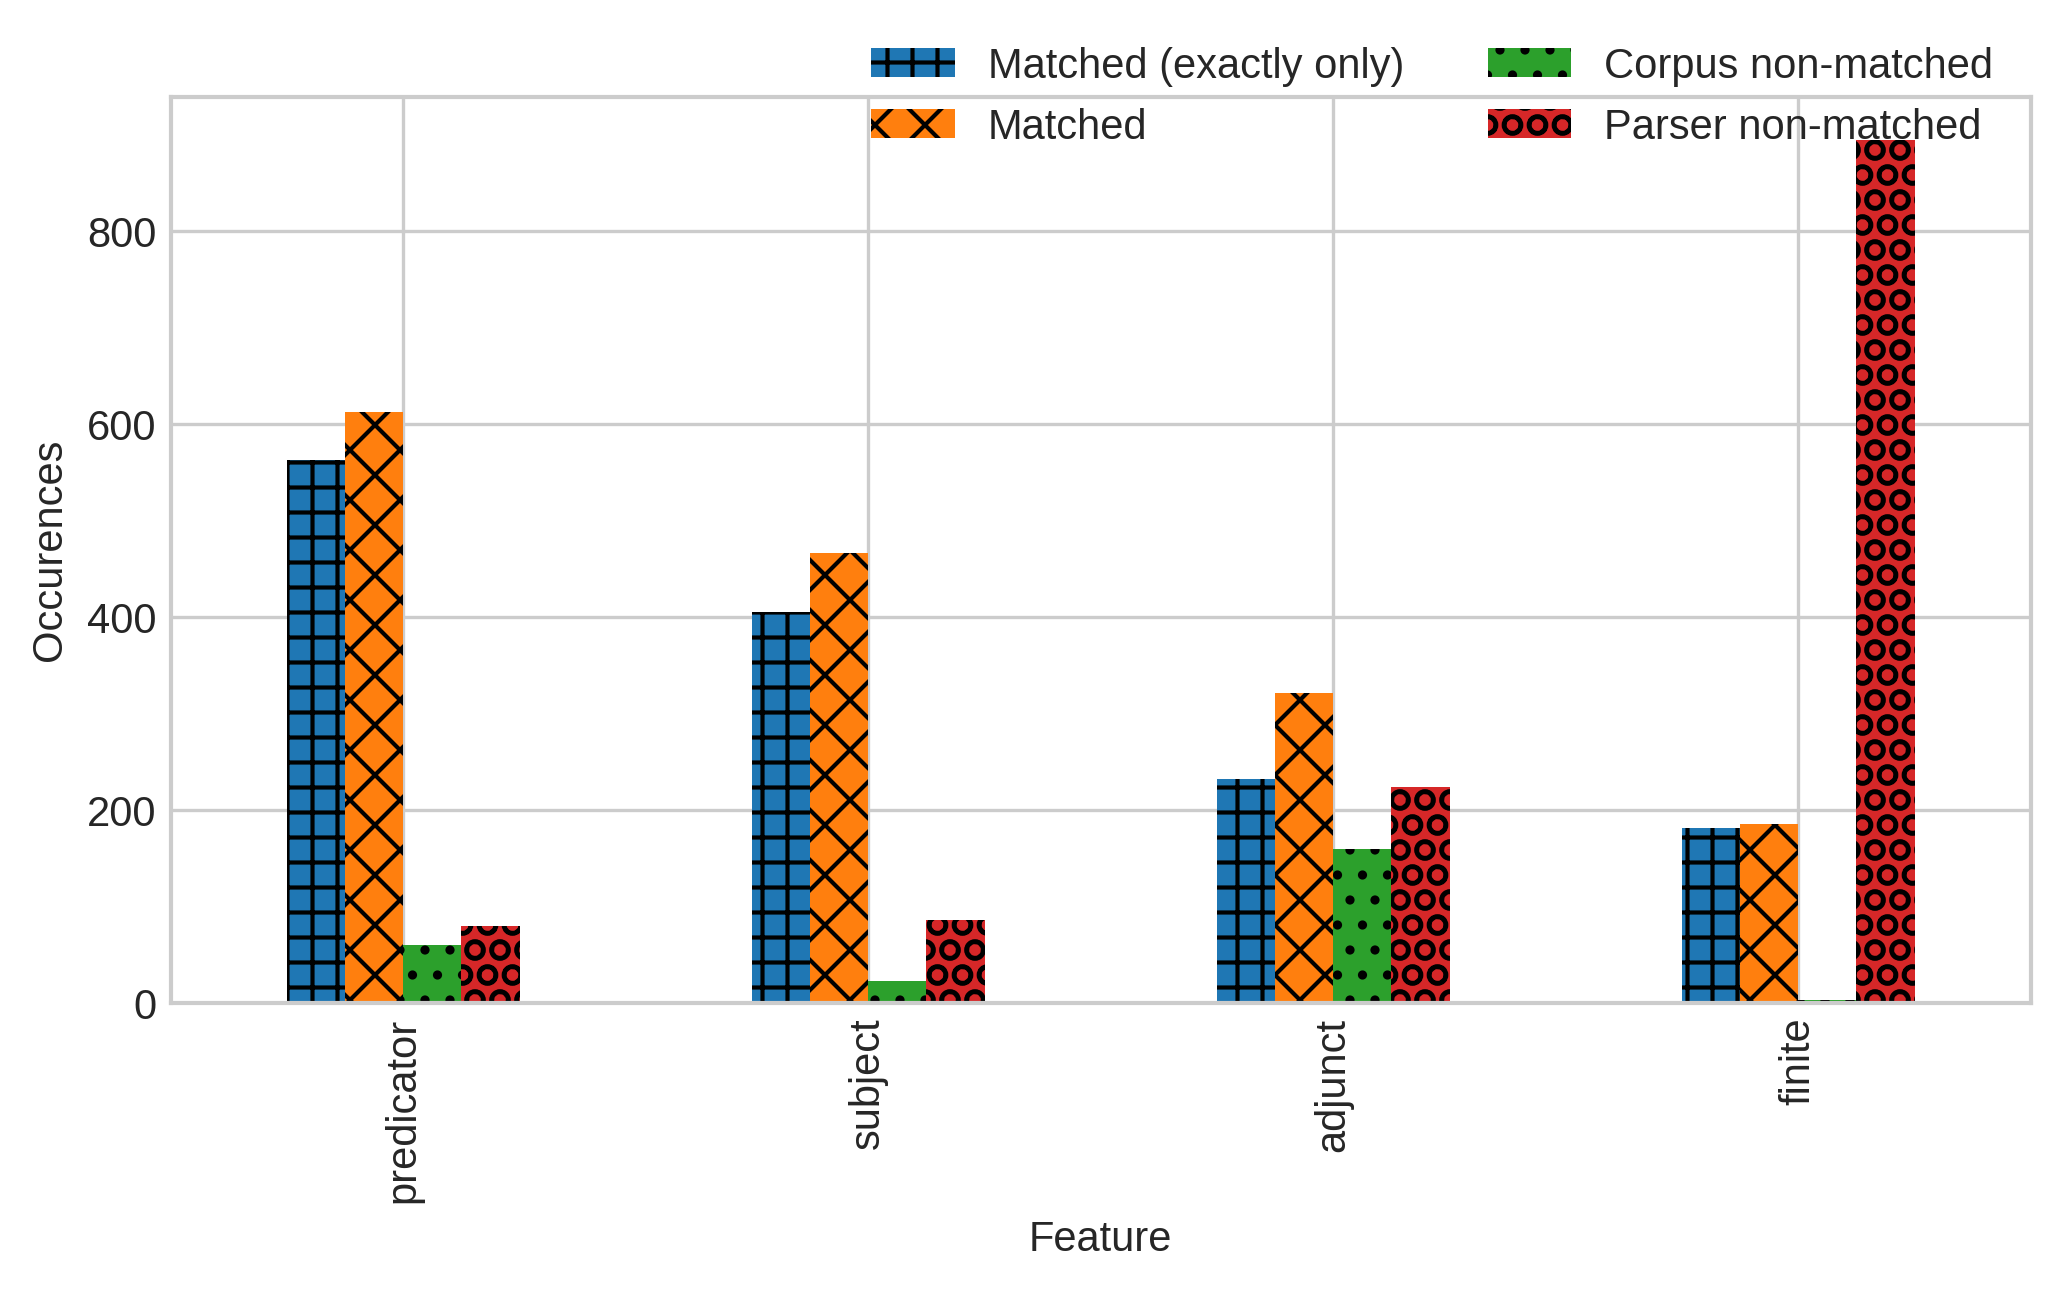

<Figure size 2400x1200 with 0 Axes>

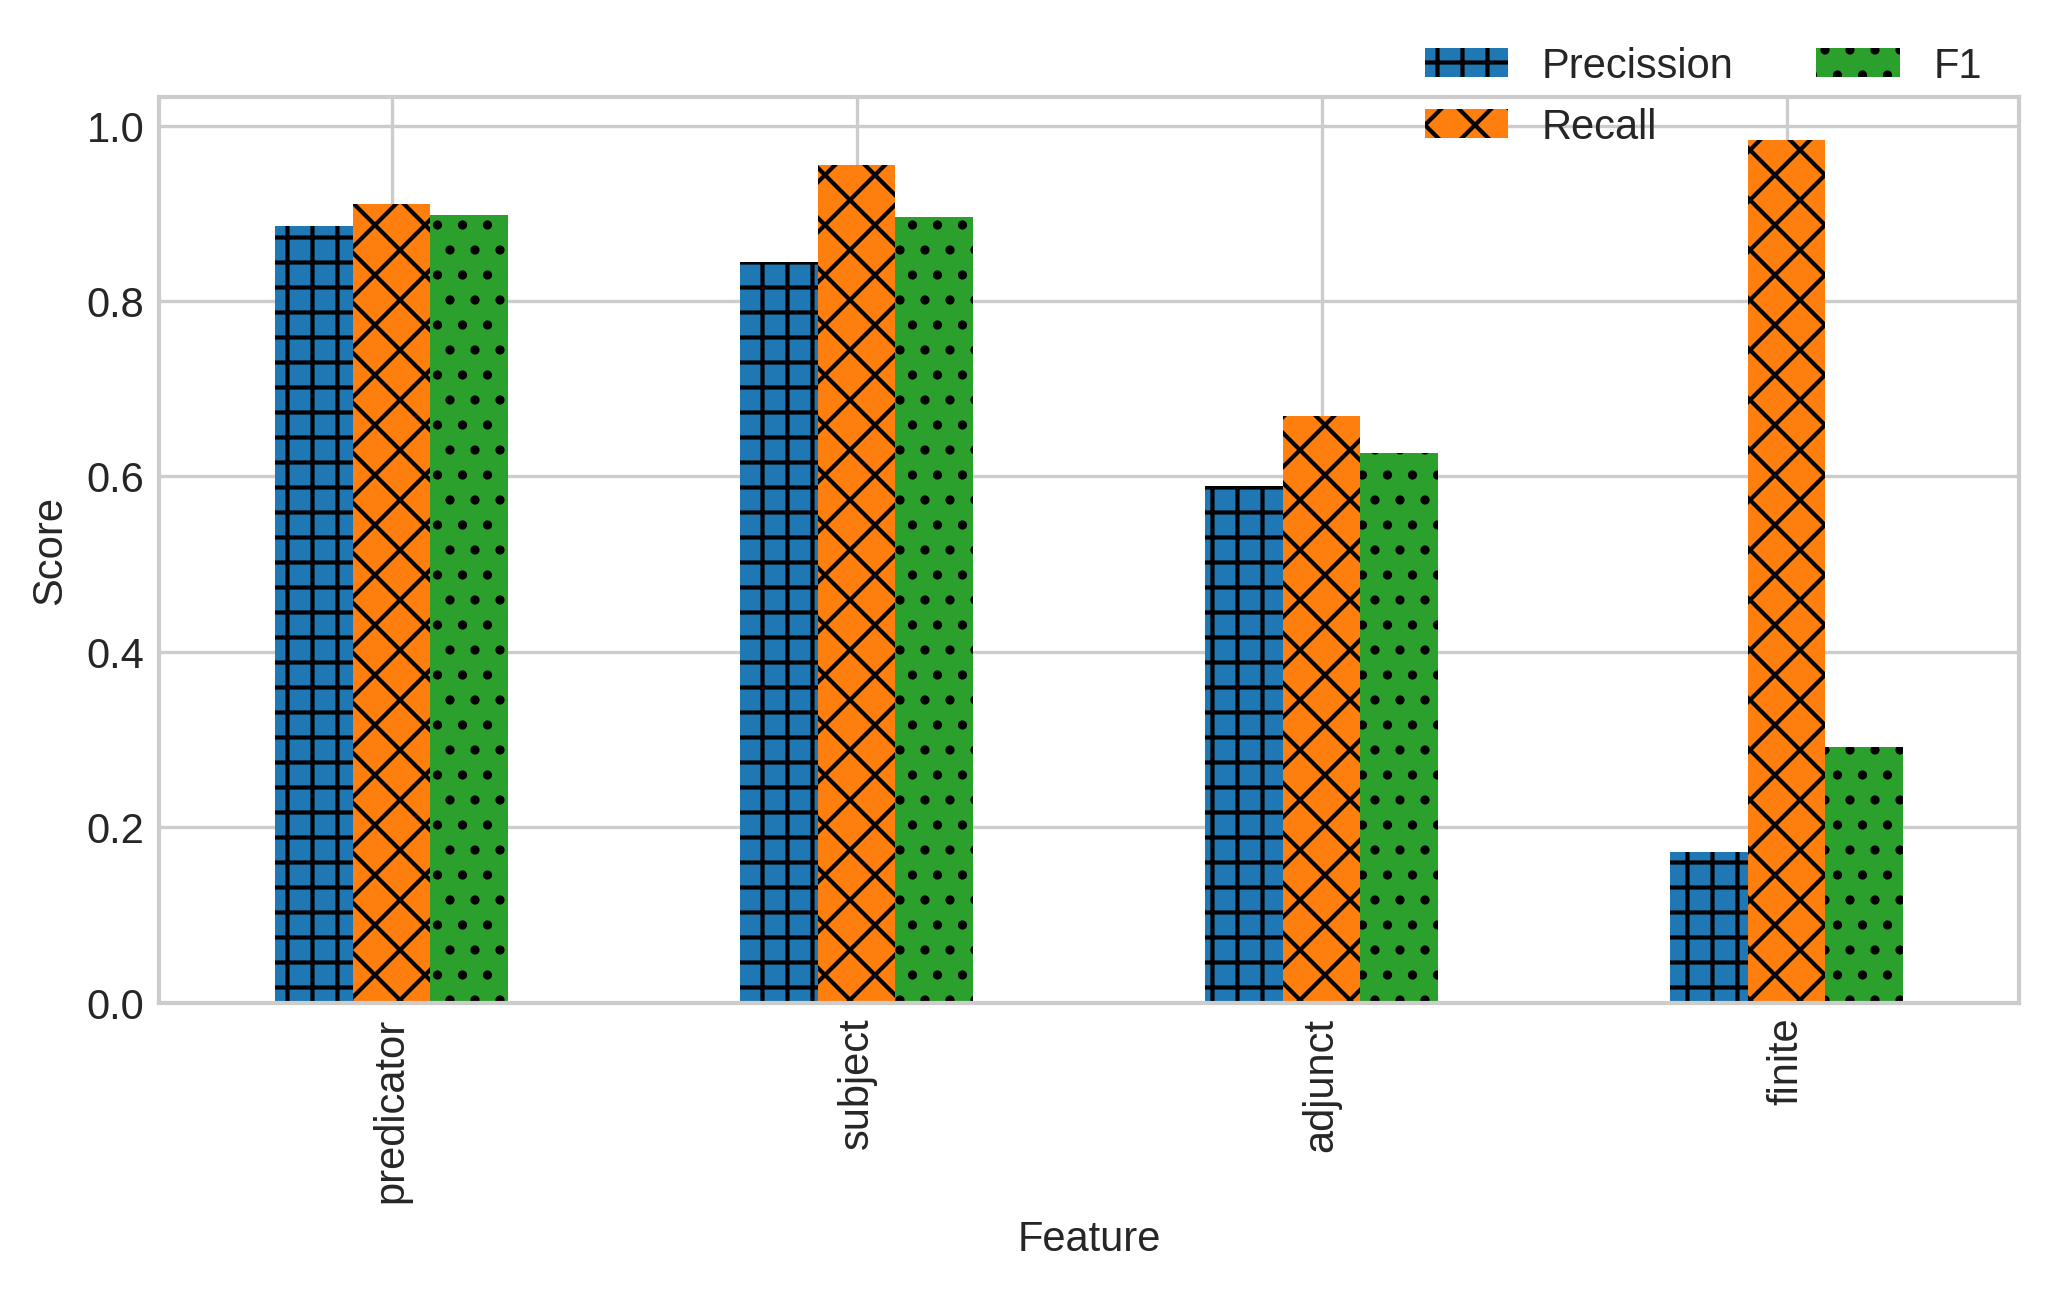

<Figure size 2400x1200 with 0 Axes>

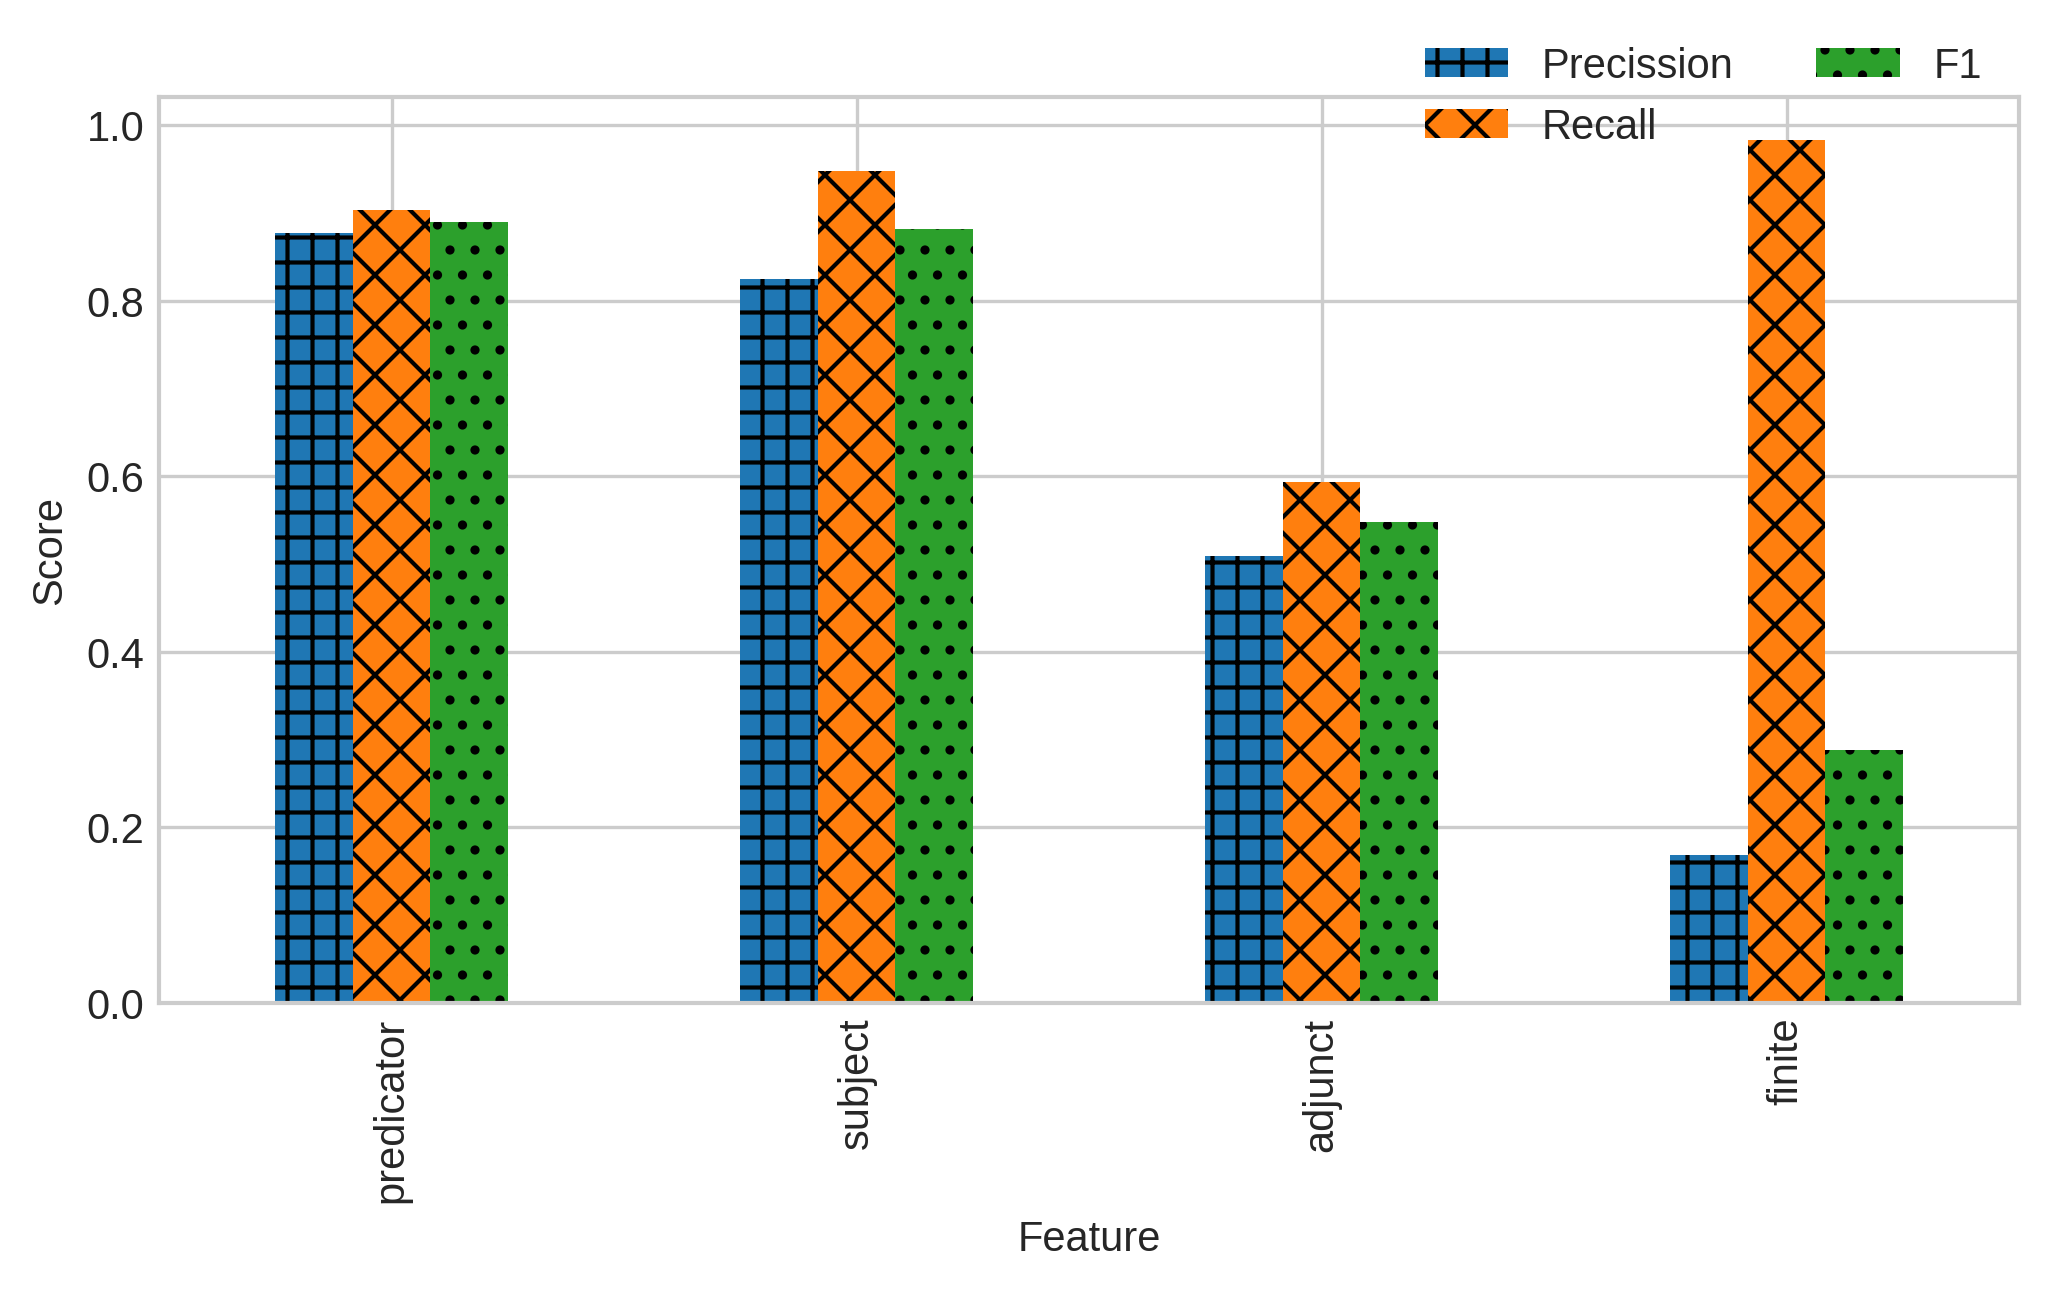

<Figure size 2400x1200 with 0 Axes>

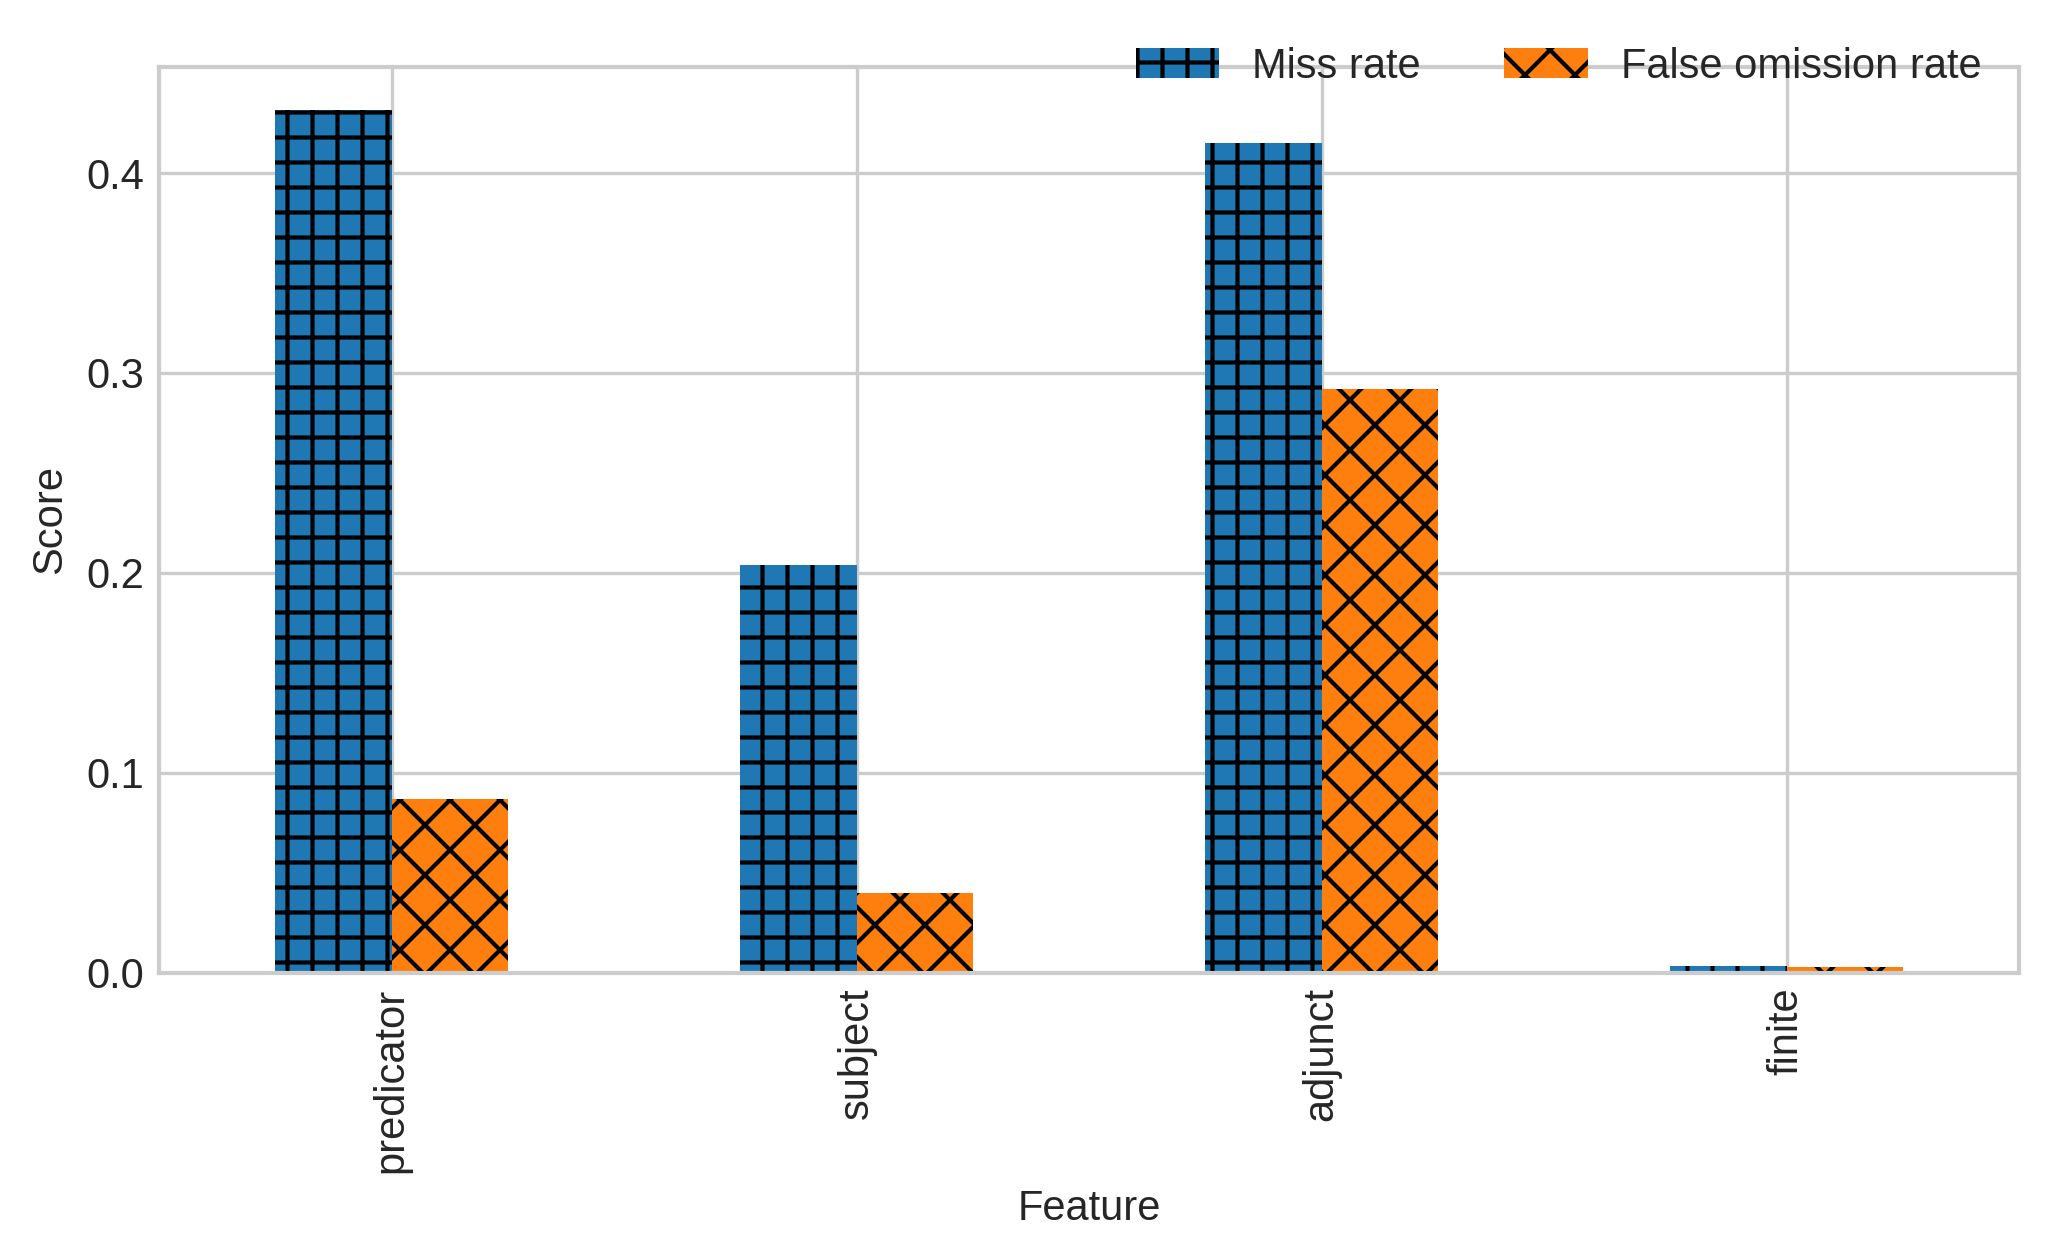

<Figure size 2400x1200 with 0 Axes>

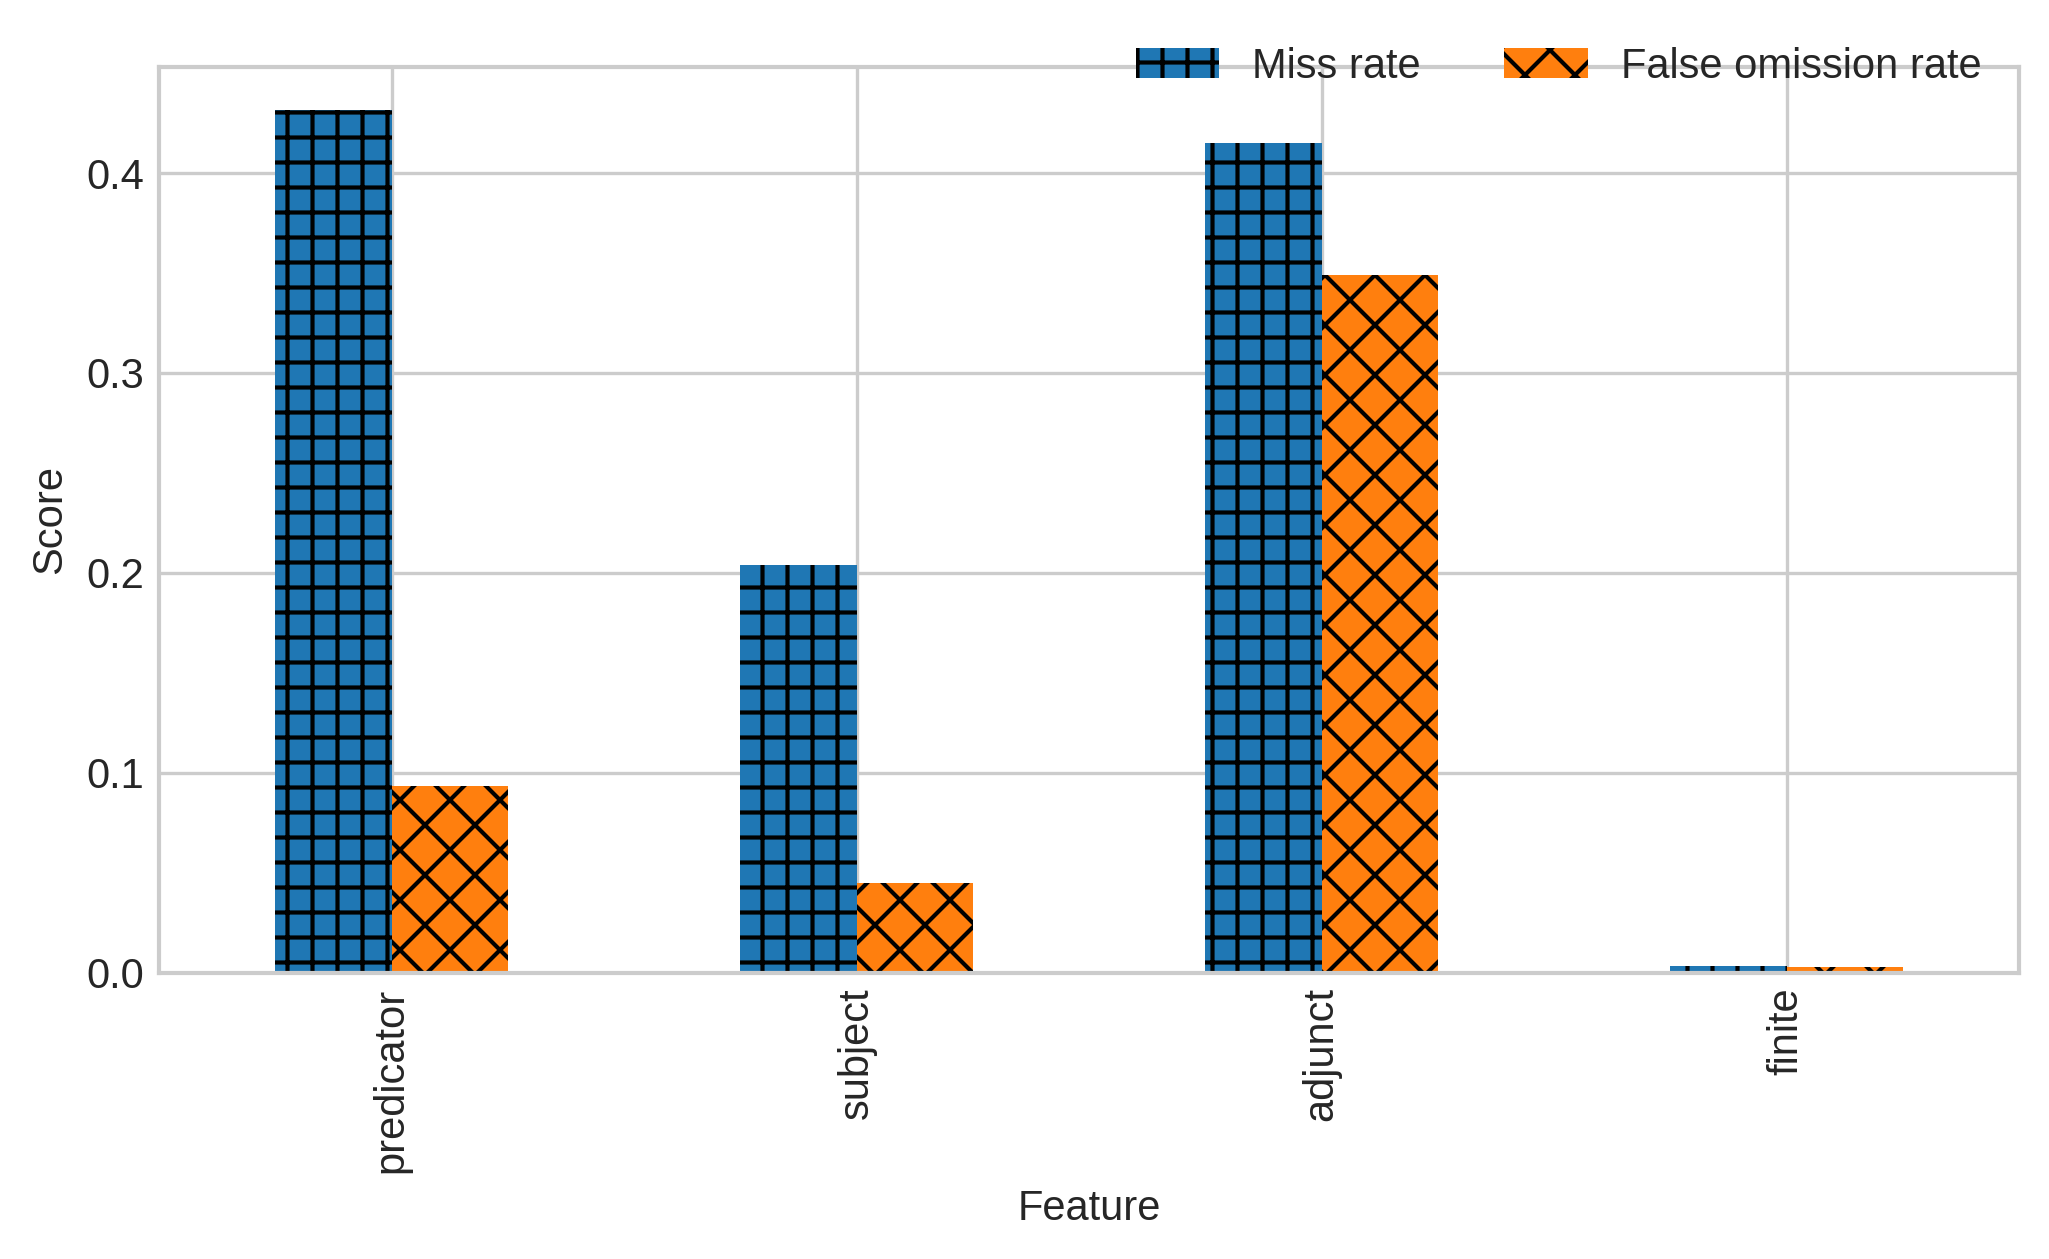

<Figure size 2400x1200 with 0 Axes>

In [8]:
aggregate = aggregate_data_by_feature(matches, manual_nm, parse_nm)
filters=["predicator","subject","adjunct","complement-direct","complement"
                                       "complement-indirect","mood-adjunct", "finite"
                           ]
#  rename complement-direct into complement, and mood-ajunct into adjunct
feature_replacement={"complement-direct":"complement",
                    "complement-indirect":"complement",
                    "mood-adjunct":"adjunct",
                    "complement-direct":"complement",
                    "complement-indirect":"complement",
                    "mood-adjunct":"adjunct",
                    "complement-direct":"complement",
                    "complement-indirect":"complement",
                    "mood-adjunct":"adjunct",}

aggregate = aggregate_data_by_feature( *rename_features(matches, manual_nm, parse_nm, feature_replacement) )

# making stats with renamed features
make_stats2(aggregate, "unit-elements-ocd", filters=filters, make_exact_also=True)

## Unit elemenets - [OE + BTC] corpus

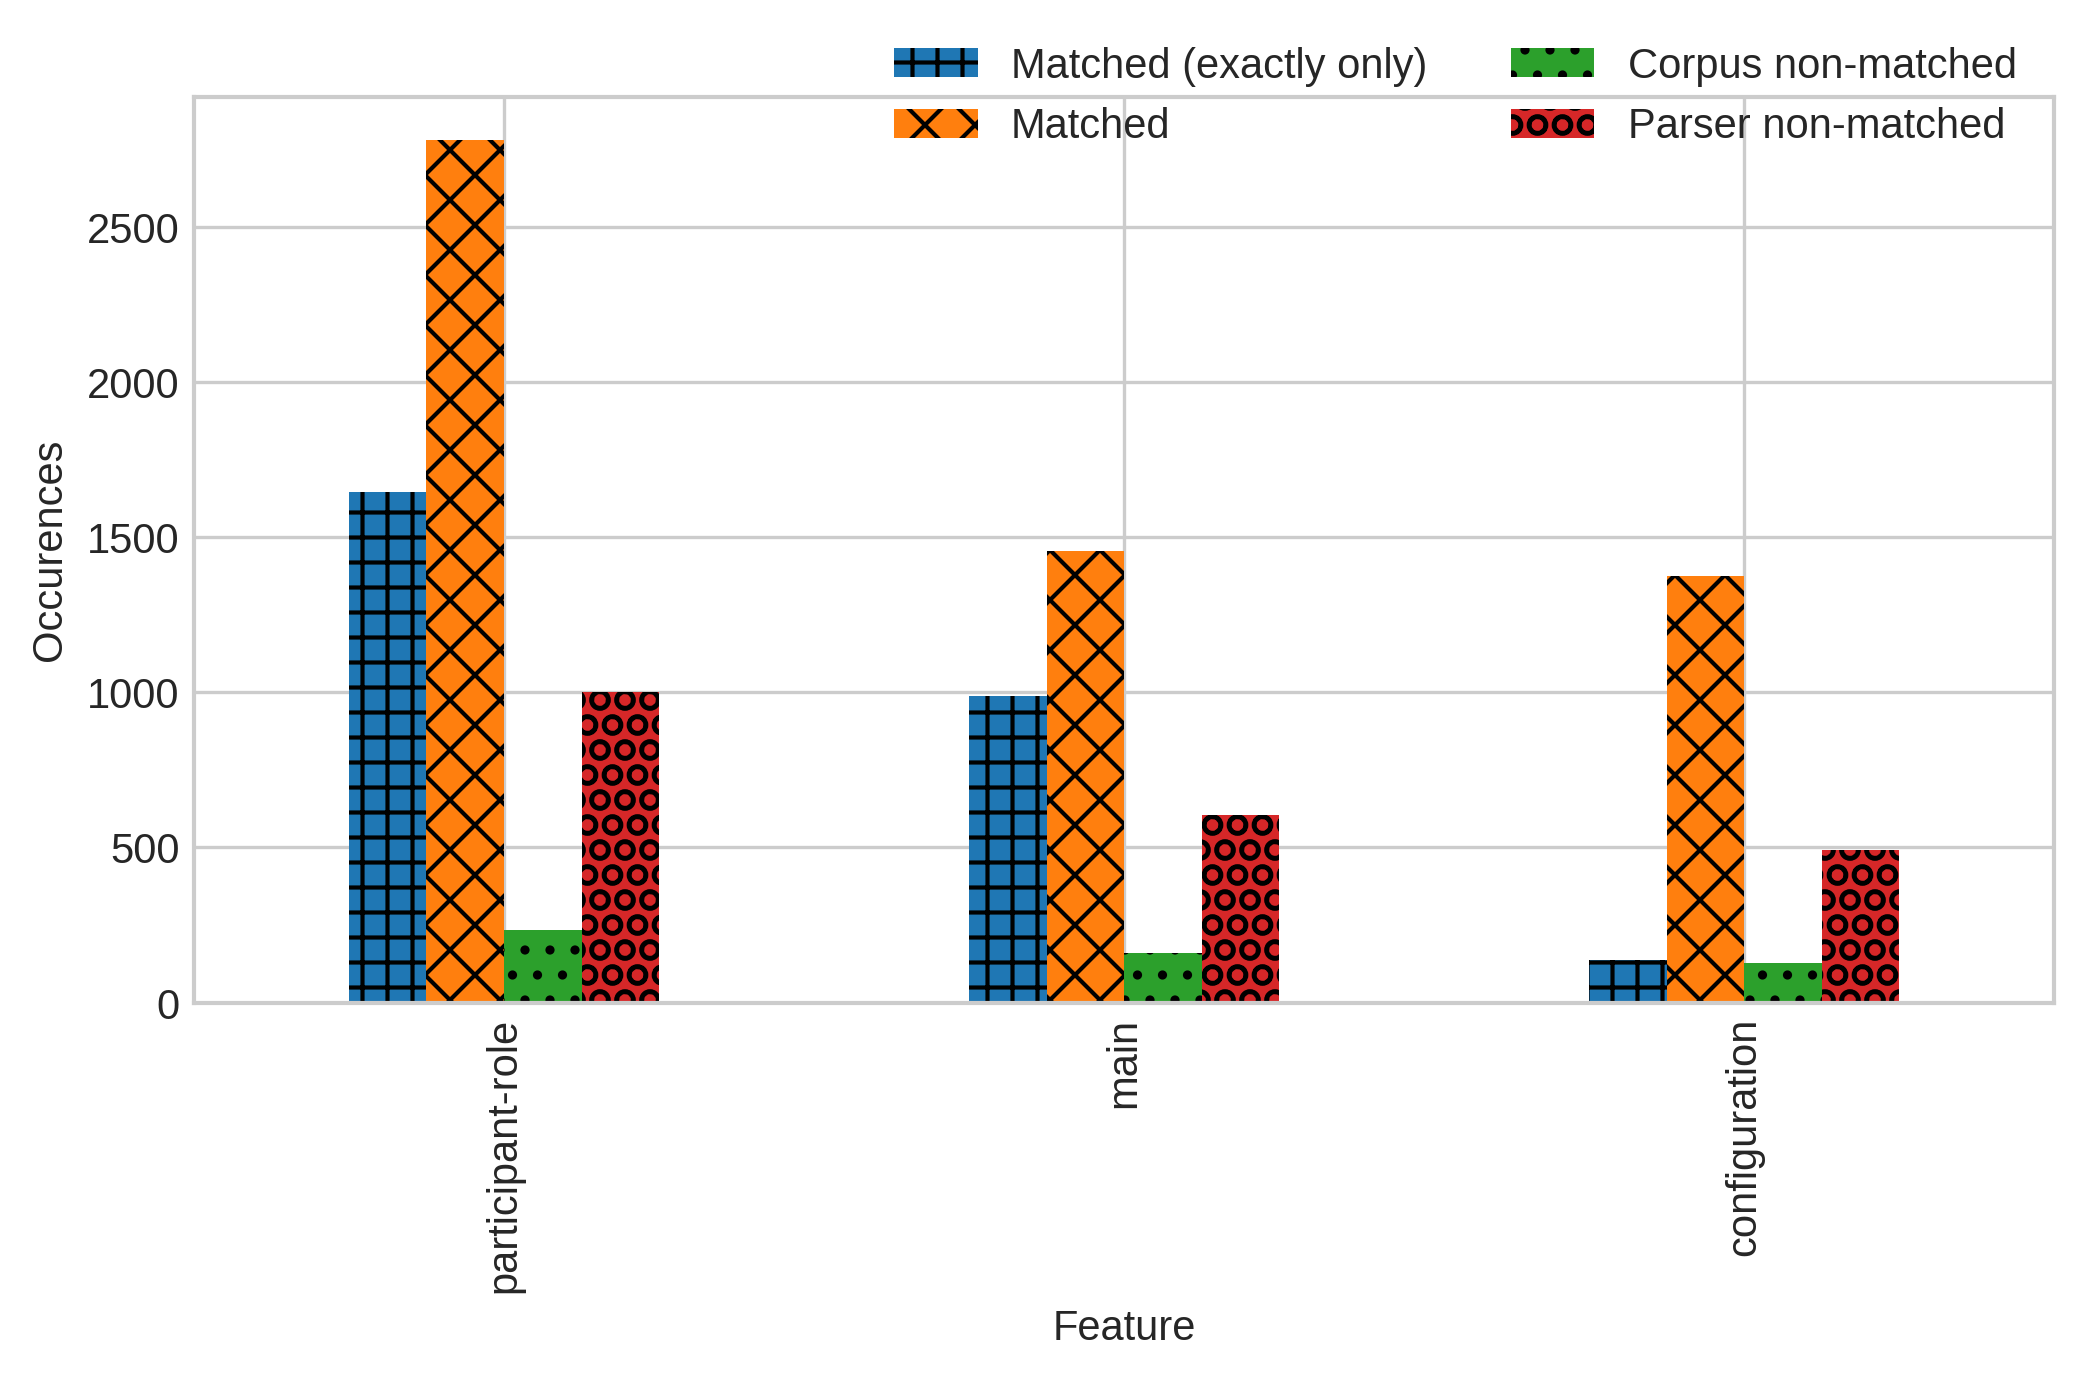

<Figure size 2400x1200 with 0 Axes>

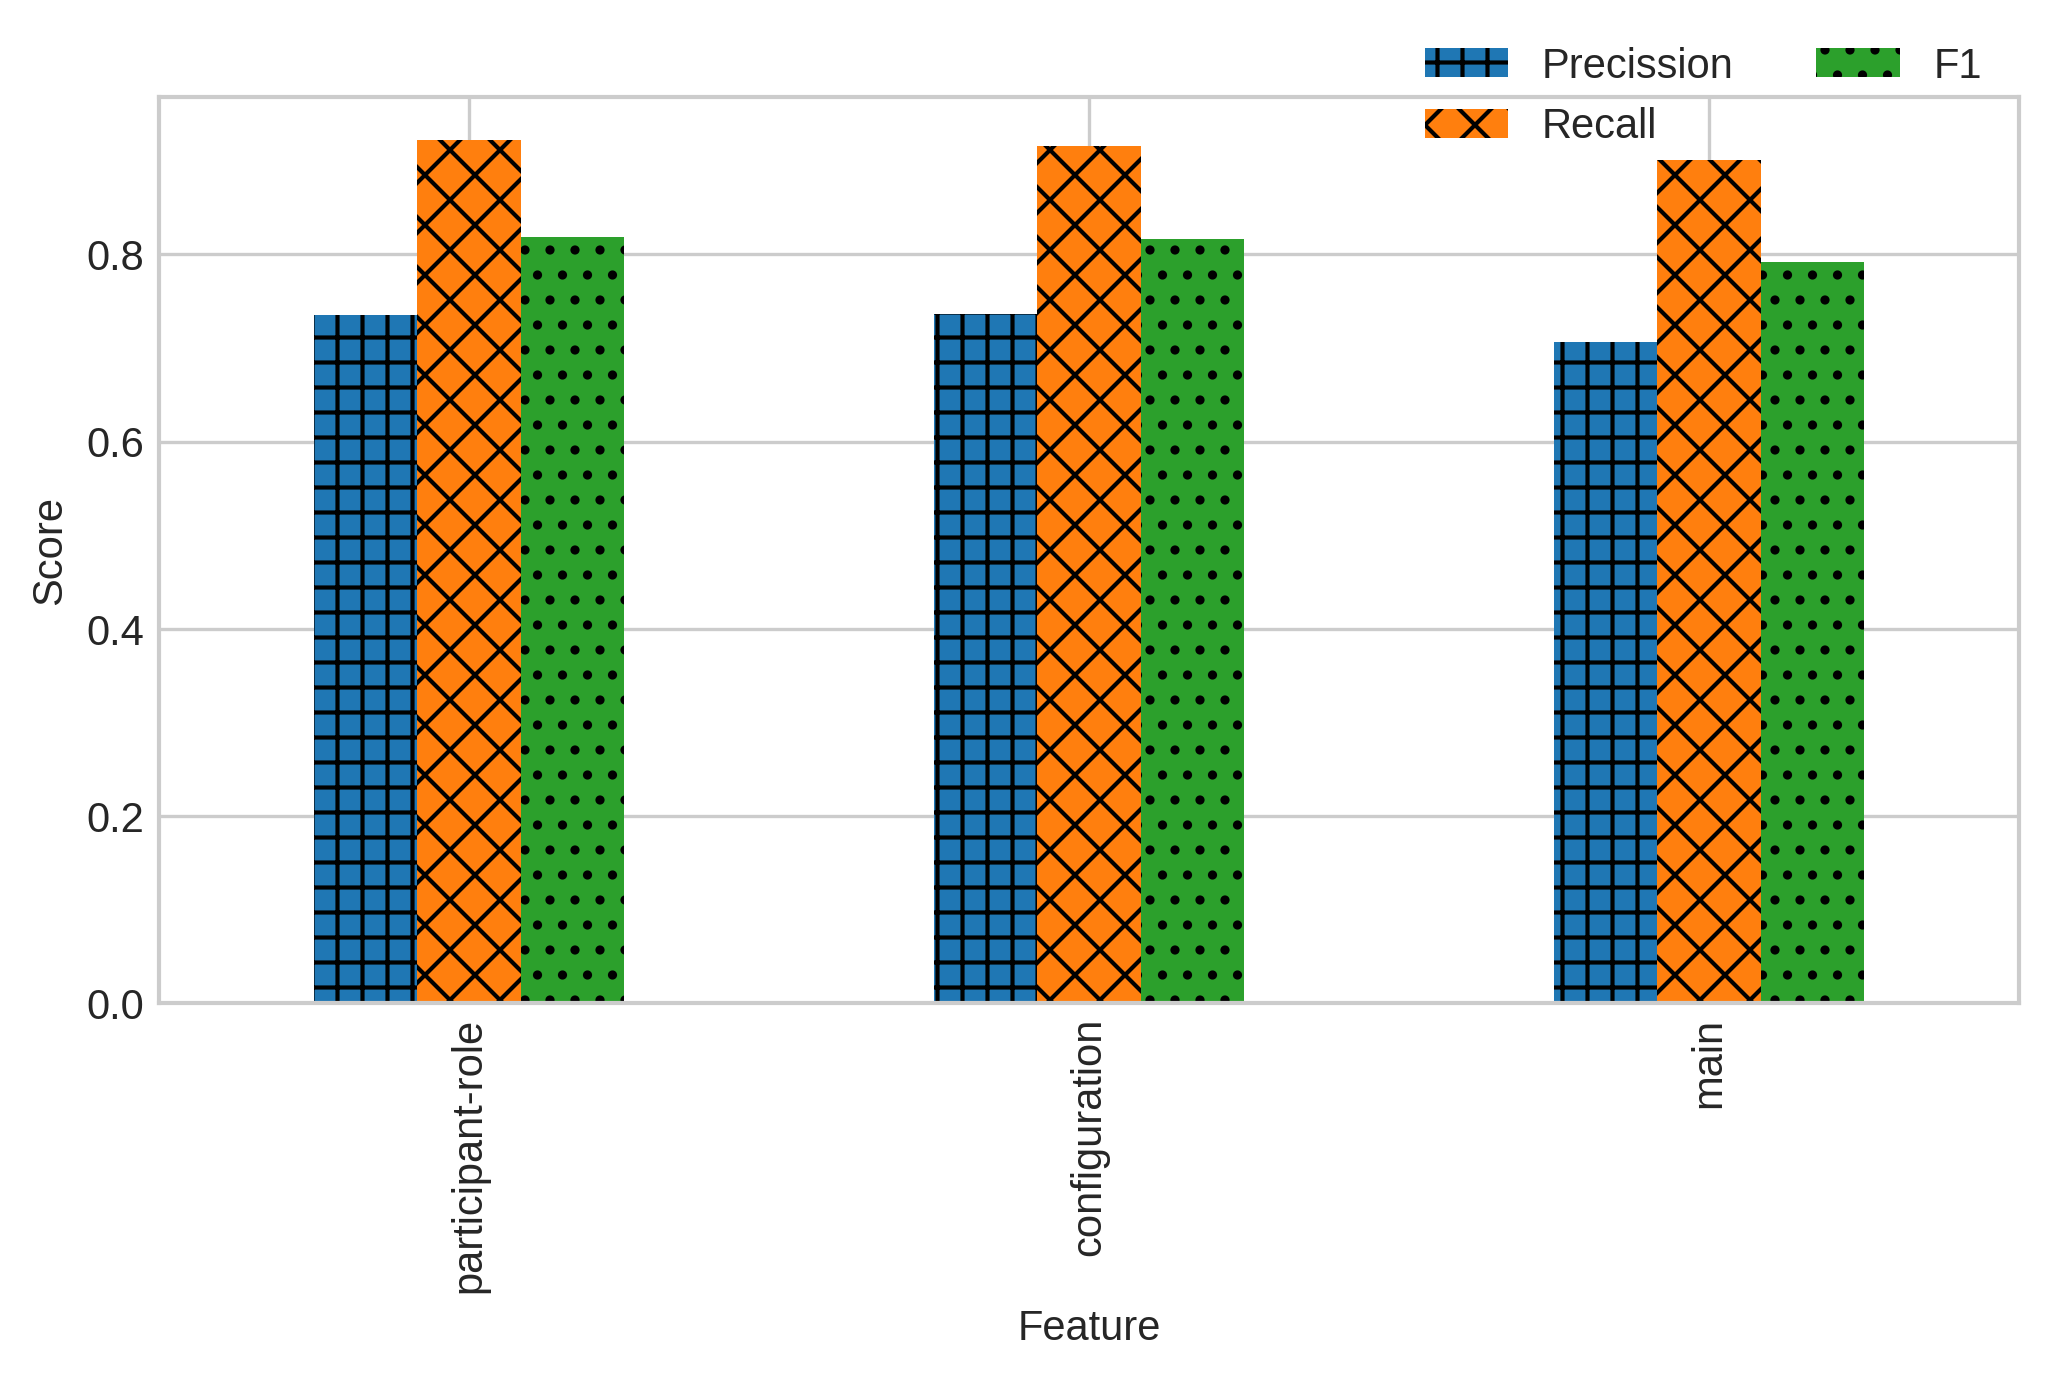

<Figure size 2400x1200 with 0 Axes>

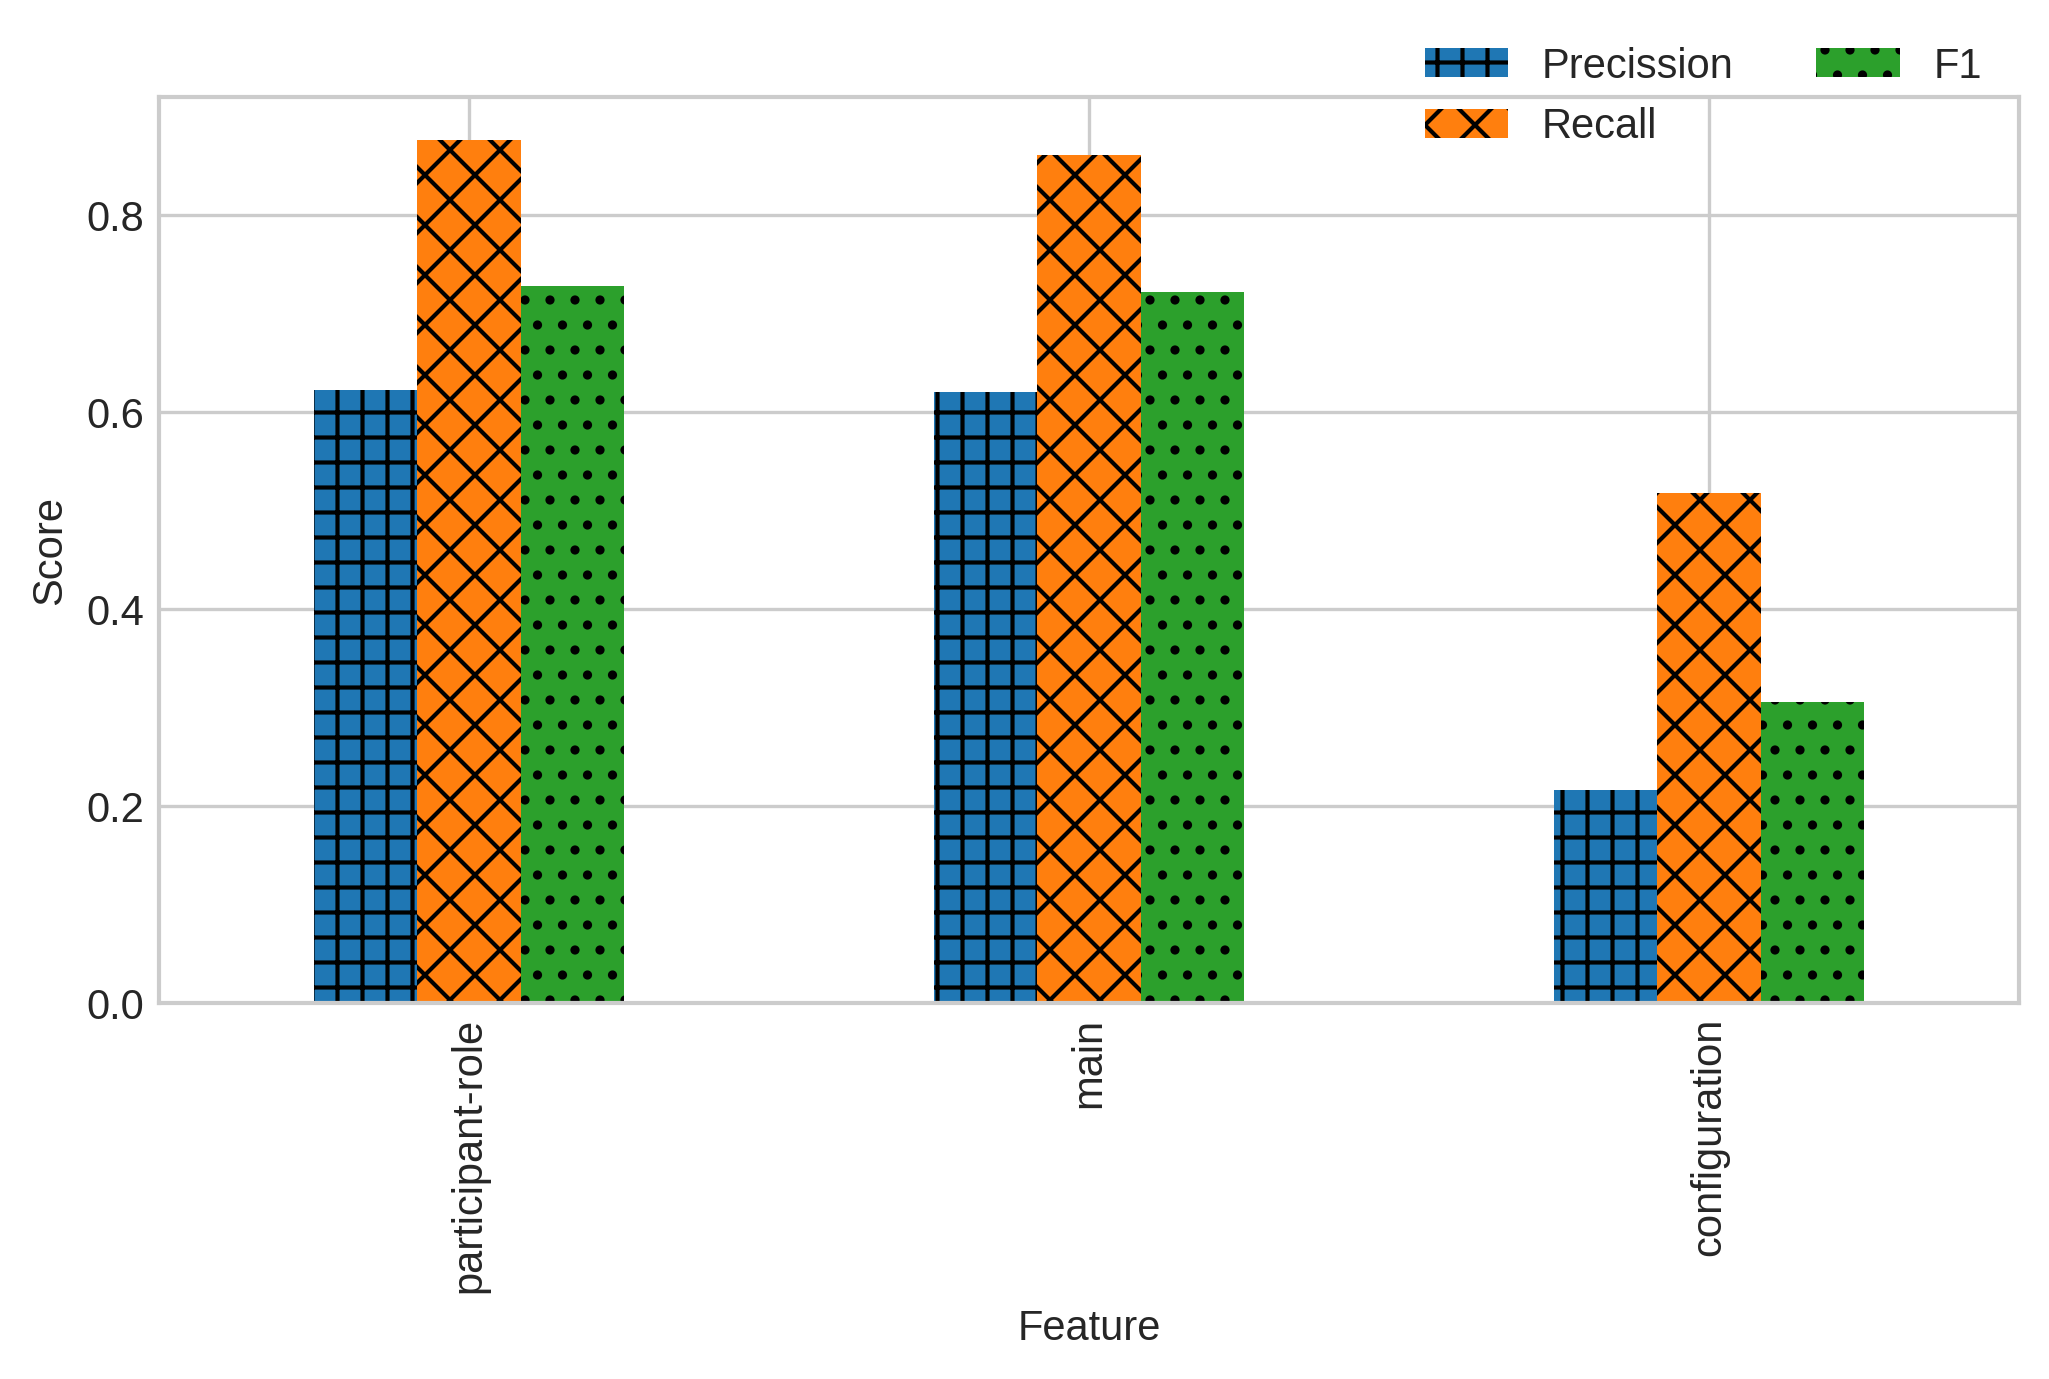

<Figure size 2400x1200 with 0 Axes>

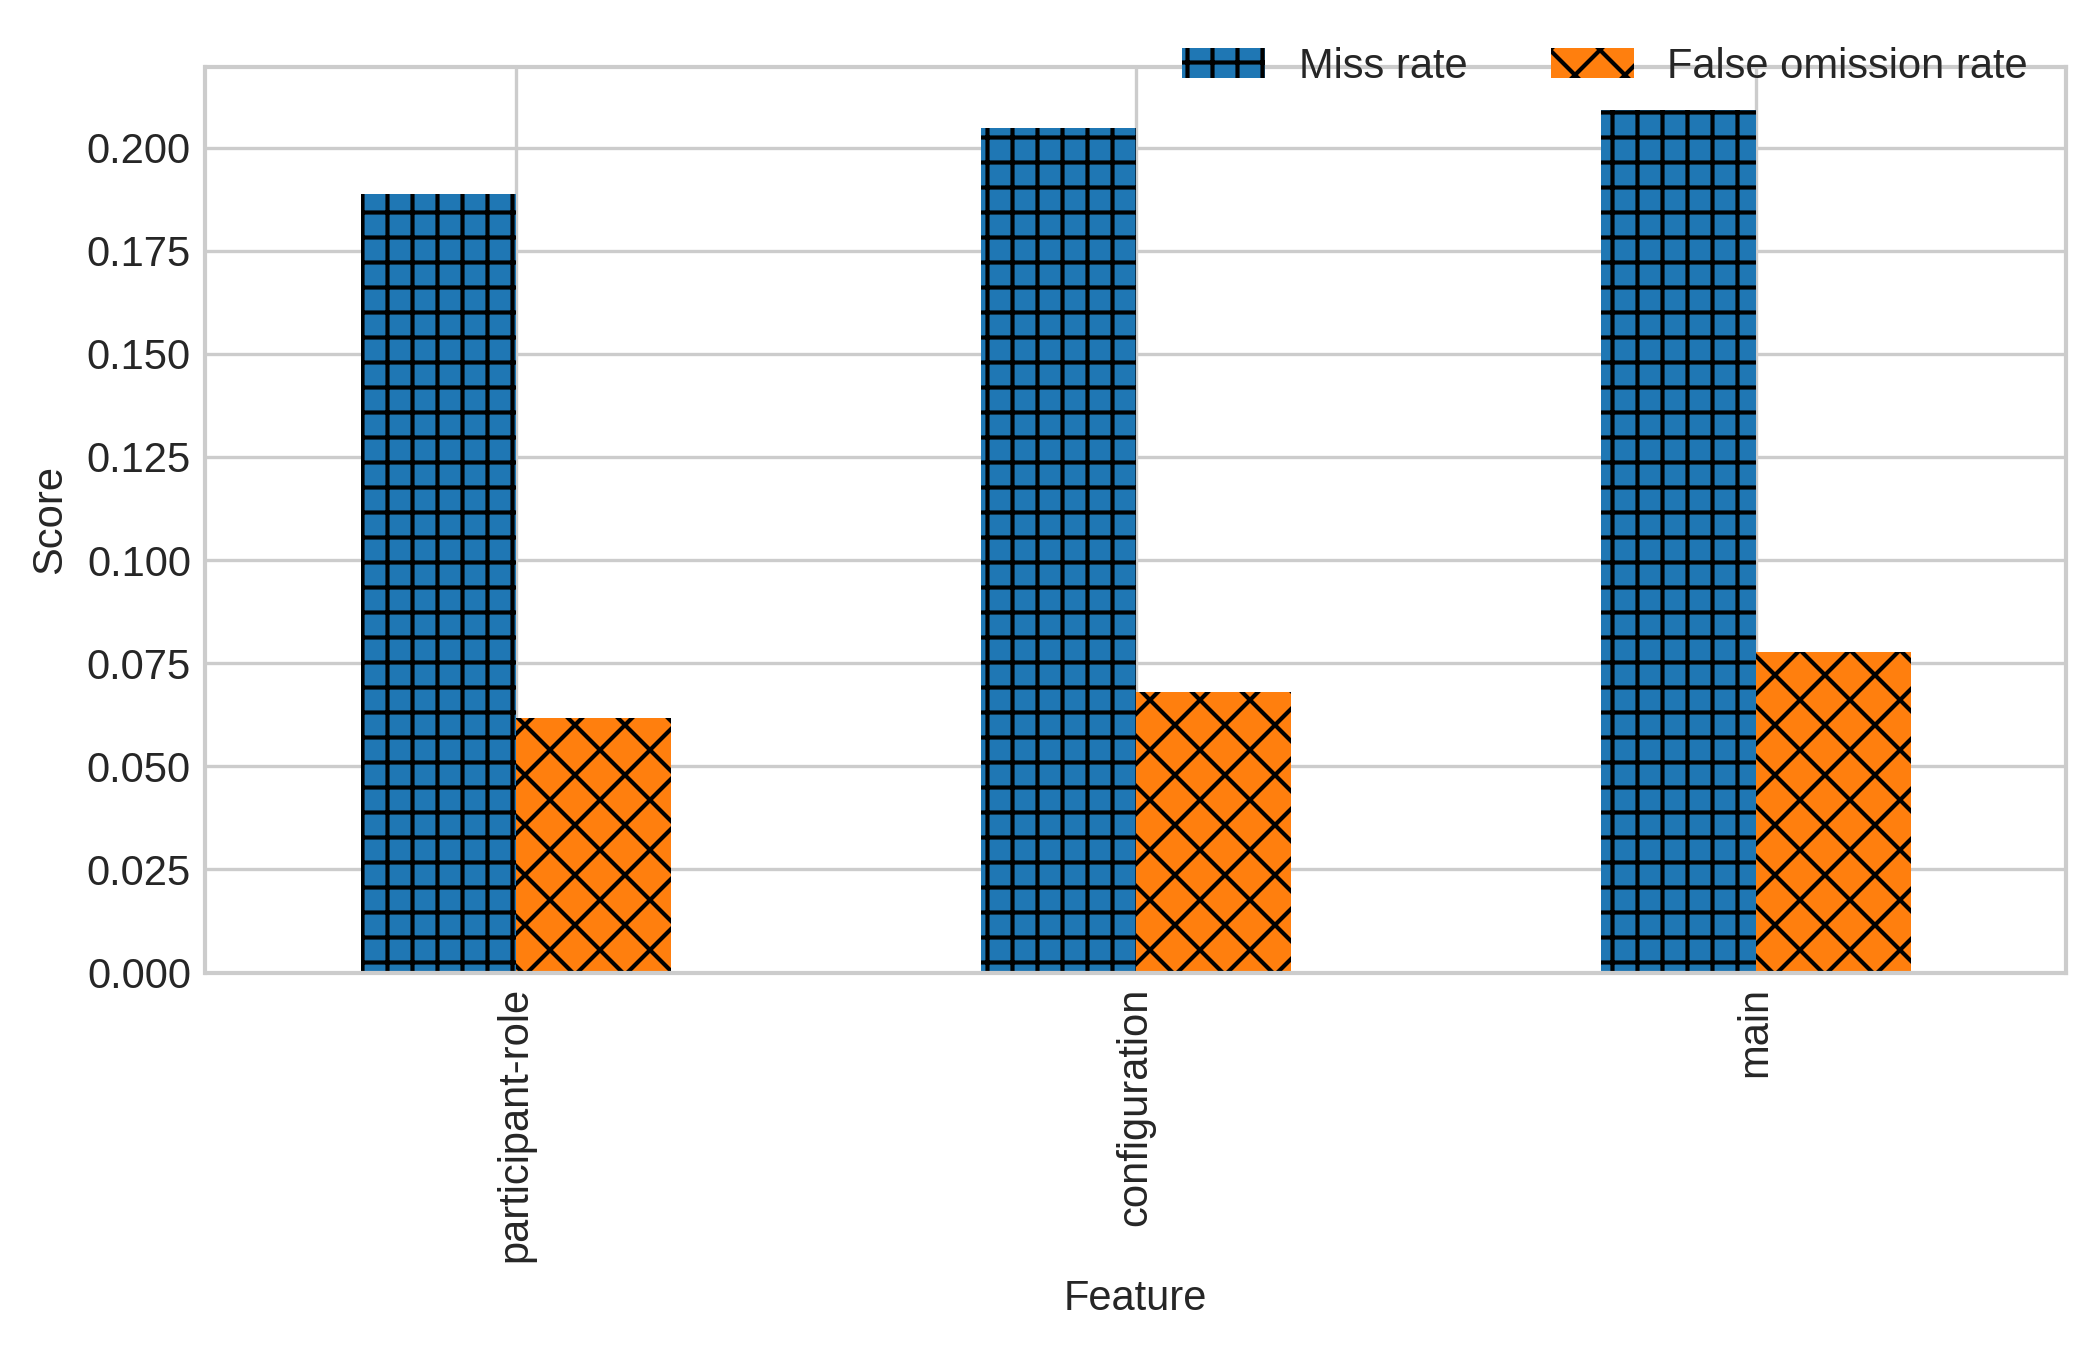

<Figure size 2400x1200 with 0 Axes>

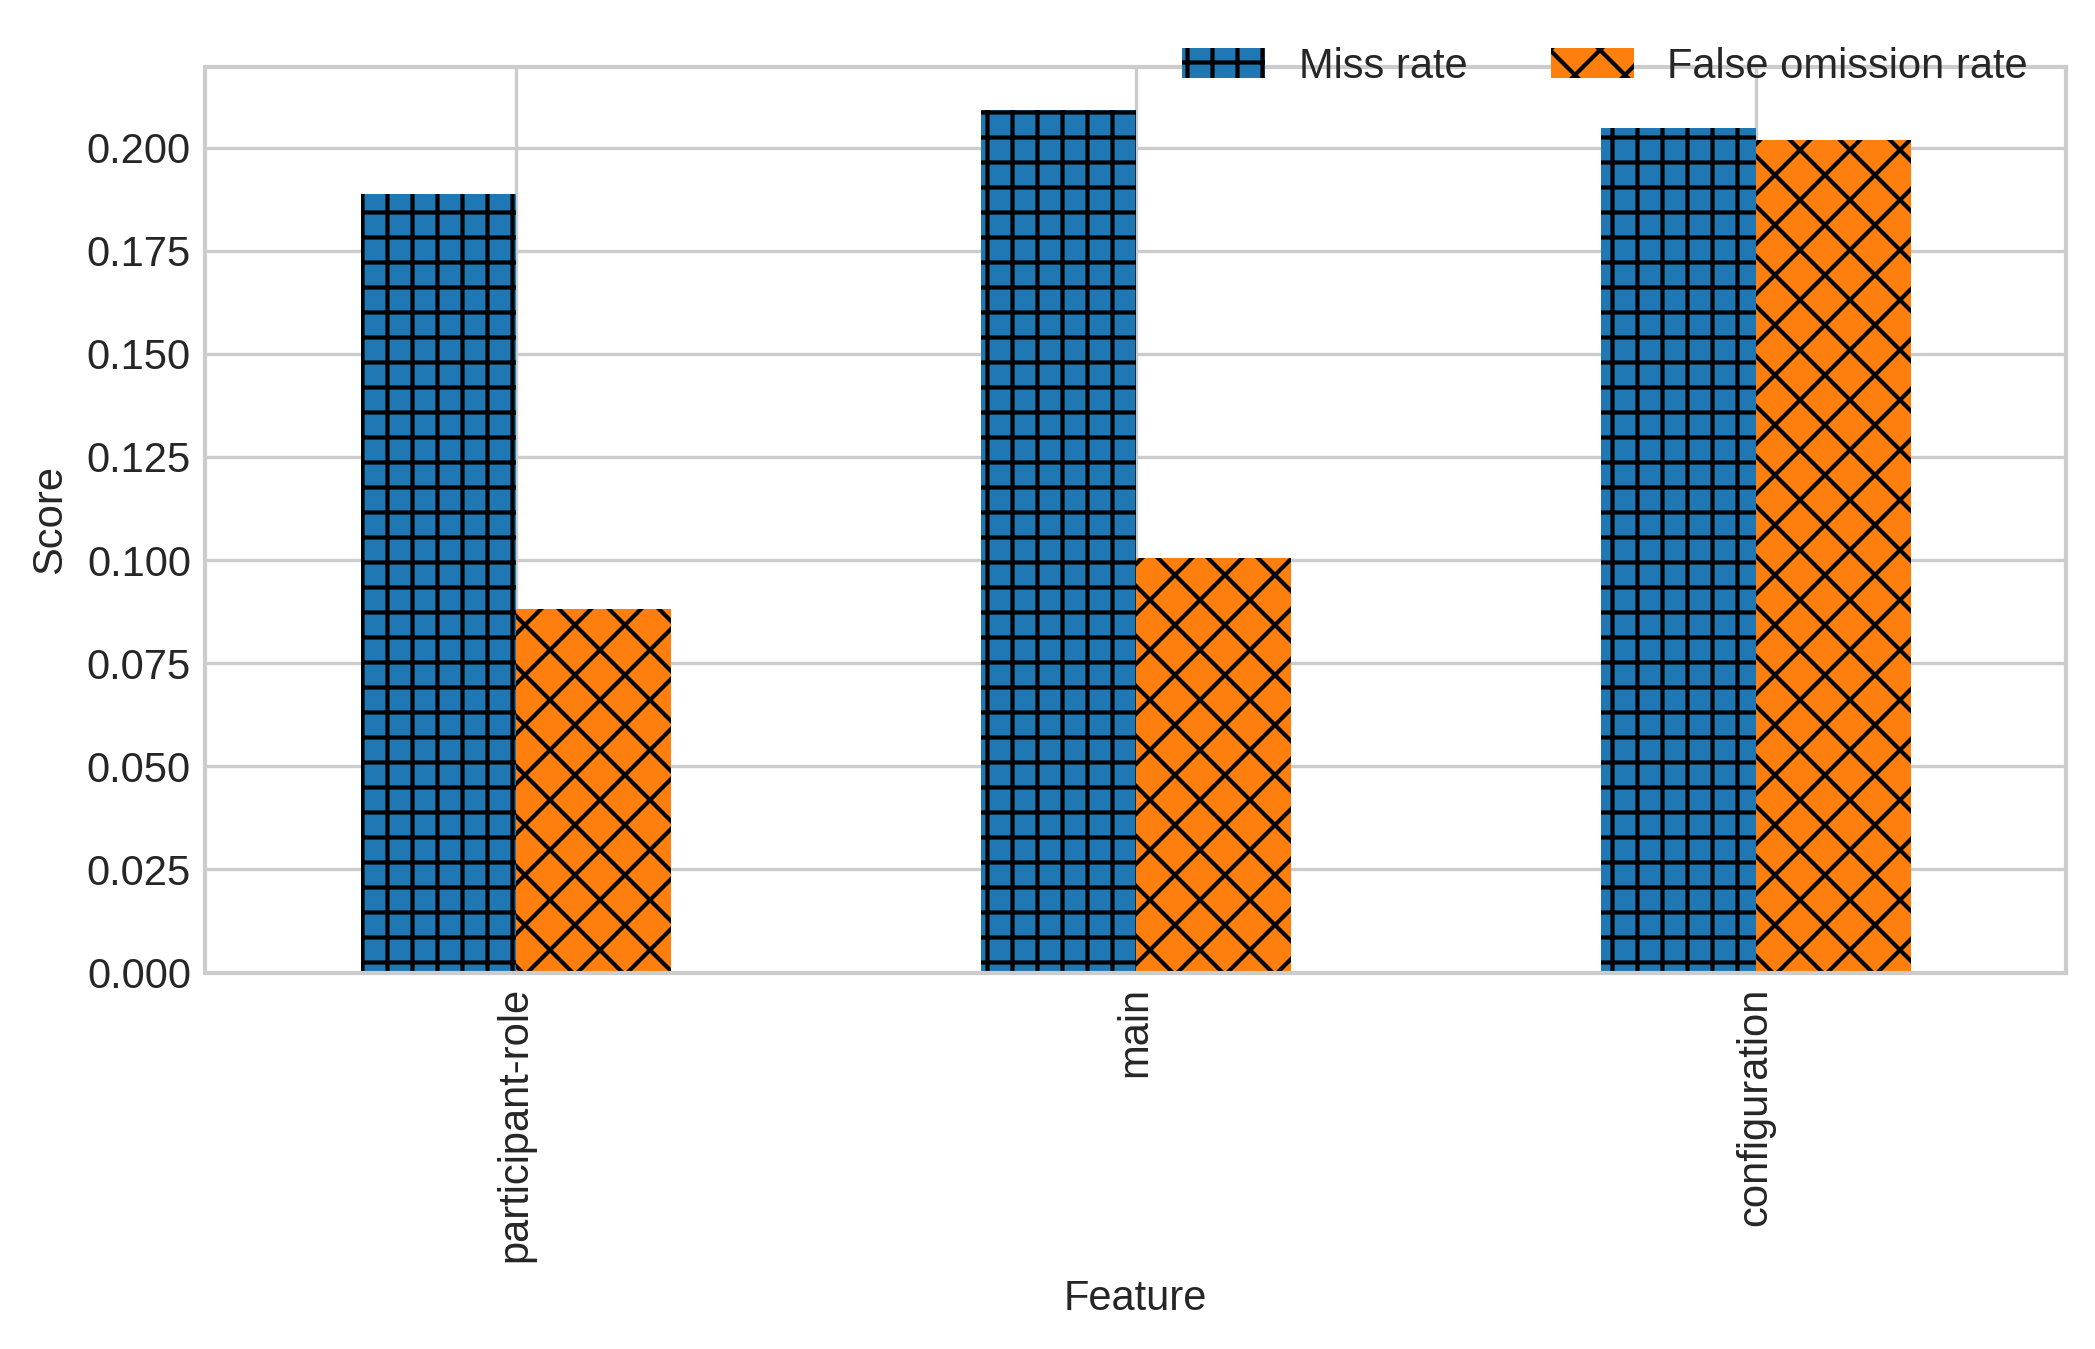

<Figure size 2400x1200 with 0 Axes>

In [9]:
# ---------
matches, manual_nm, parse_nm = read_batch(OE1_const_file_list + BTC_const_file_list)
# ---------

# drop main verb and process
aggregate = aggregate_data_by_feature( *drop_features(matches, manual_nm, parse_nm, drops=["verb","process"]) )
make_stats2(aggregate, "unit-elements-oe", make_exact_also=True)

# Mood system feature evaluation - [OCD1] corpus

In [195]:
################################################
POLARITY = ["positive","negative"]
VOICE = ["active","passive"]
FINITENESS = ["finite","non-finite"]
PERFECTIVITY = ["perfective","imperfective"]
MOOD = ["imperative","indicative"]
INDICATIVE = ["declarative","interrogative"]
INTERROGATIVE = ["wh","yes-no"]
WH=["wh-subject","wh-complement","wh-adjunct"]
DEICTICITY = ["temporal","modal"]
MODAL_DEICTICITY = ["root","epistemic"]
# ROOT_MODAL_DEICTICITY = ["inclination-volition","obligation-permission","ability"] # out
# EPISTEMIC_MODAL_DEICTICITY = ["probability","usuality"] # out
TEMPORAL_DEICTICITY_TIME = ["past","present","future"]
TEMPORAL_DEICTICITY_PROGRESSIVITY = ["progressive","non-progressive"]
TEMPORAL_DEICTICITY_PERFECTIVITY = ["perfect","non-perfect"]
MOOD_ASSESMENT = ["intensity","modality","temporality"]

AGENCY = ["middle","effective"] 
# AGENCY_EFFECTIVE_VOICE = ["operative","receptive"] # out
# AGENCY_EFFECTIVE_VOICE_AGENTIVITY = ["agentive","non-agentive"] # out

ALL_SYSTEMIC_FEATURES = POLARITY + VOICE + FINITENESS \
+ PERFECTIVITY + MOOD + INDICATIVE + INTERROGATIVE + WH + DEICTICITY + MODAL_DEICTICITY \
+ TEMPORAL_DEICTICITY_TIME + TEMPORAL_DEICTICITY_PROGRESSIVITY + TEMPORAL_DEICTICITY_PERFECTIVITY \
+ MOOD_ASSESMENT + AGENCY

################################################

# all stats 
# ---------
matches, manual_nm, parse_nm = read_batch( OCD_mood_file_list )
# ---------
aggregate = aggregate_data_by_feature(matches, manual_nm, parse_nm)


## POLARITY

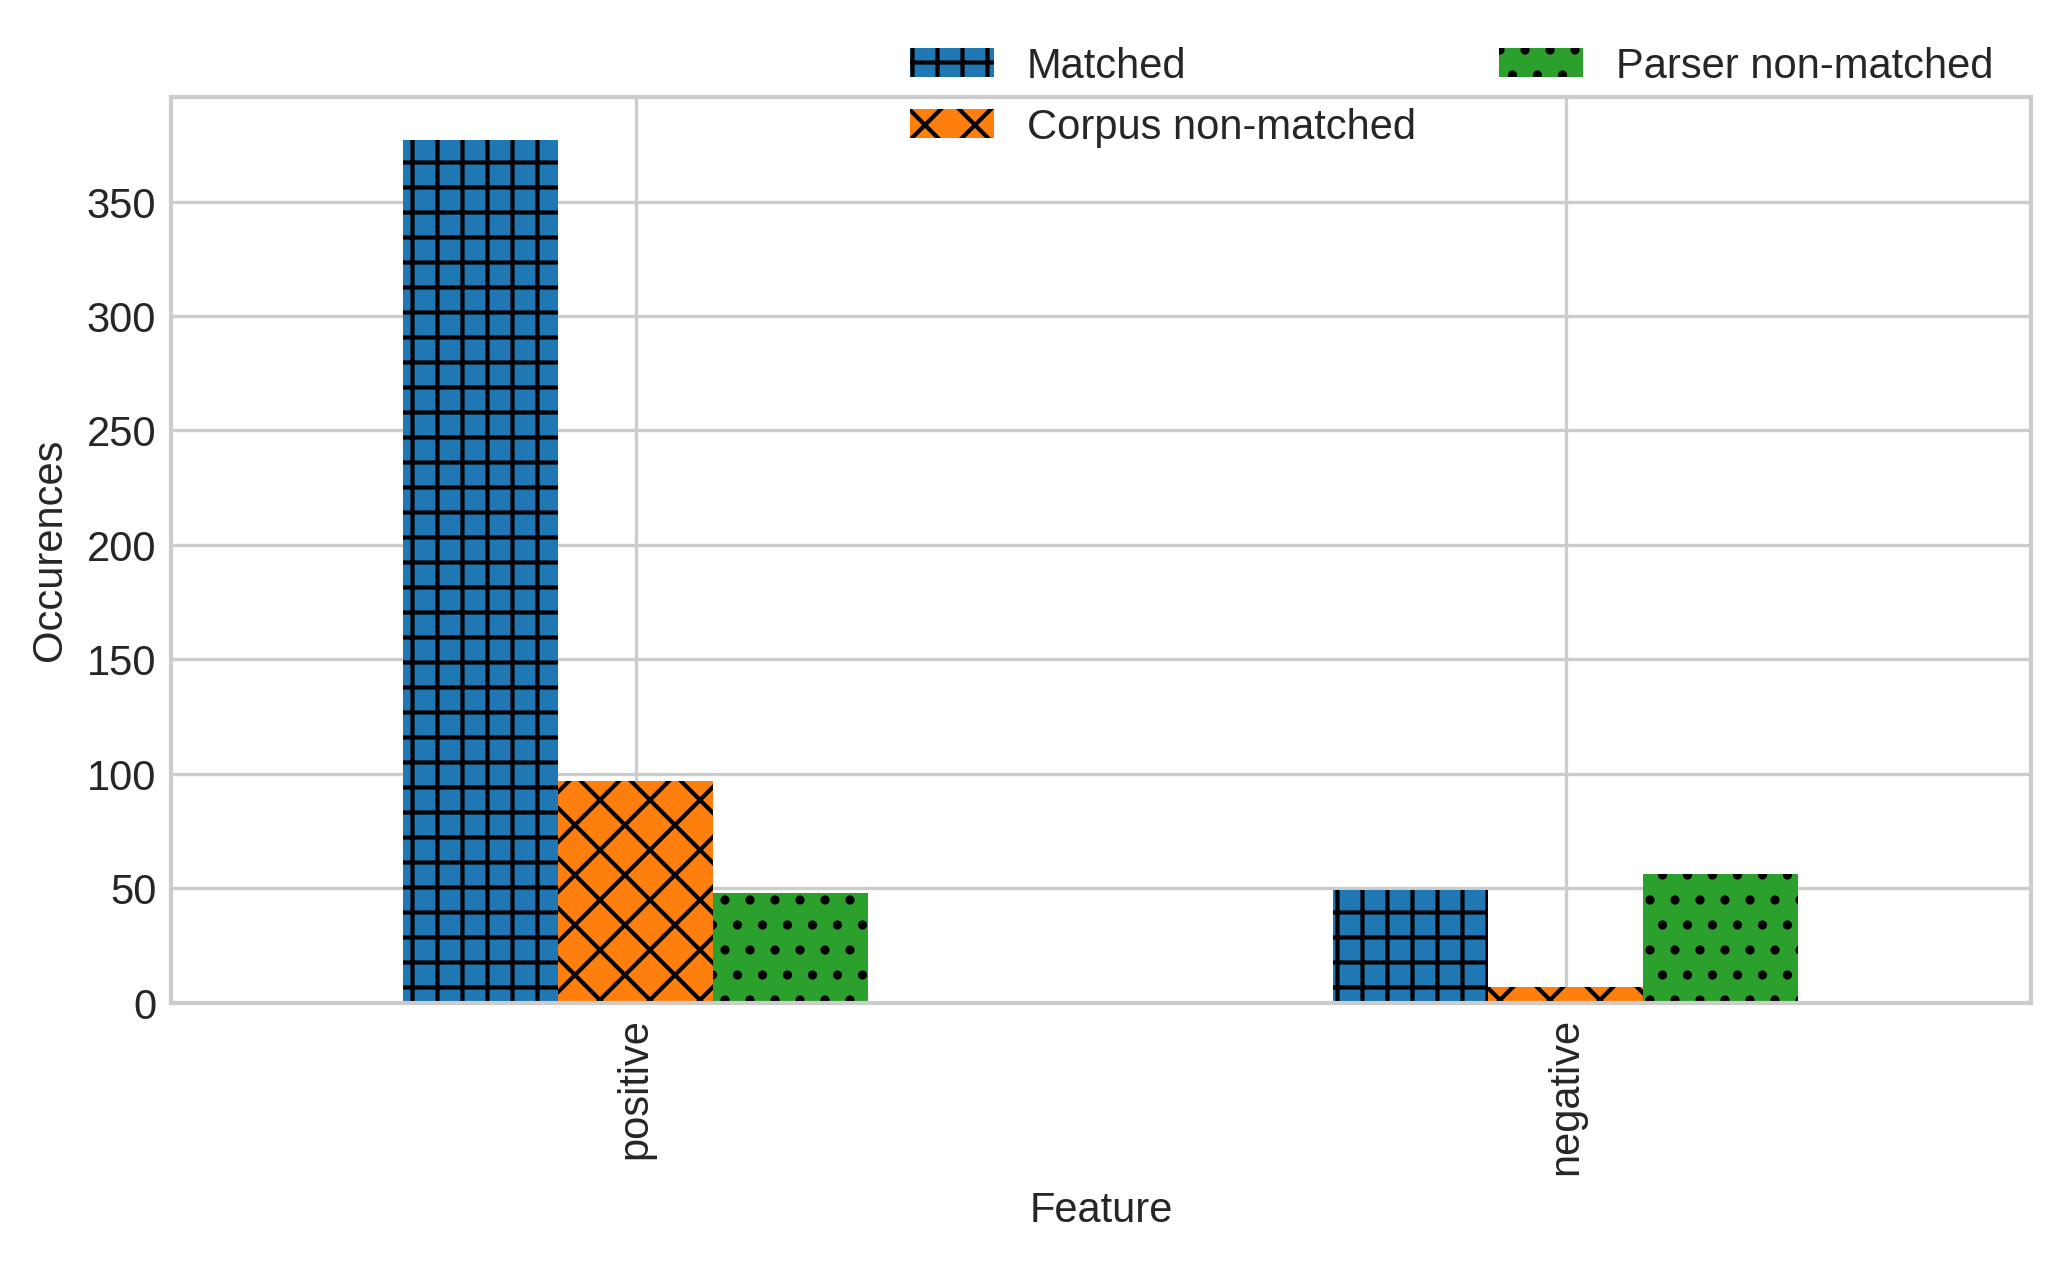

<Figure size 2400x1200 with 0 Axes>

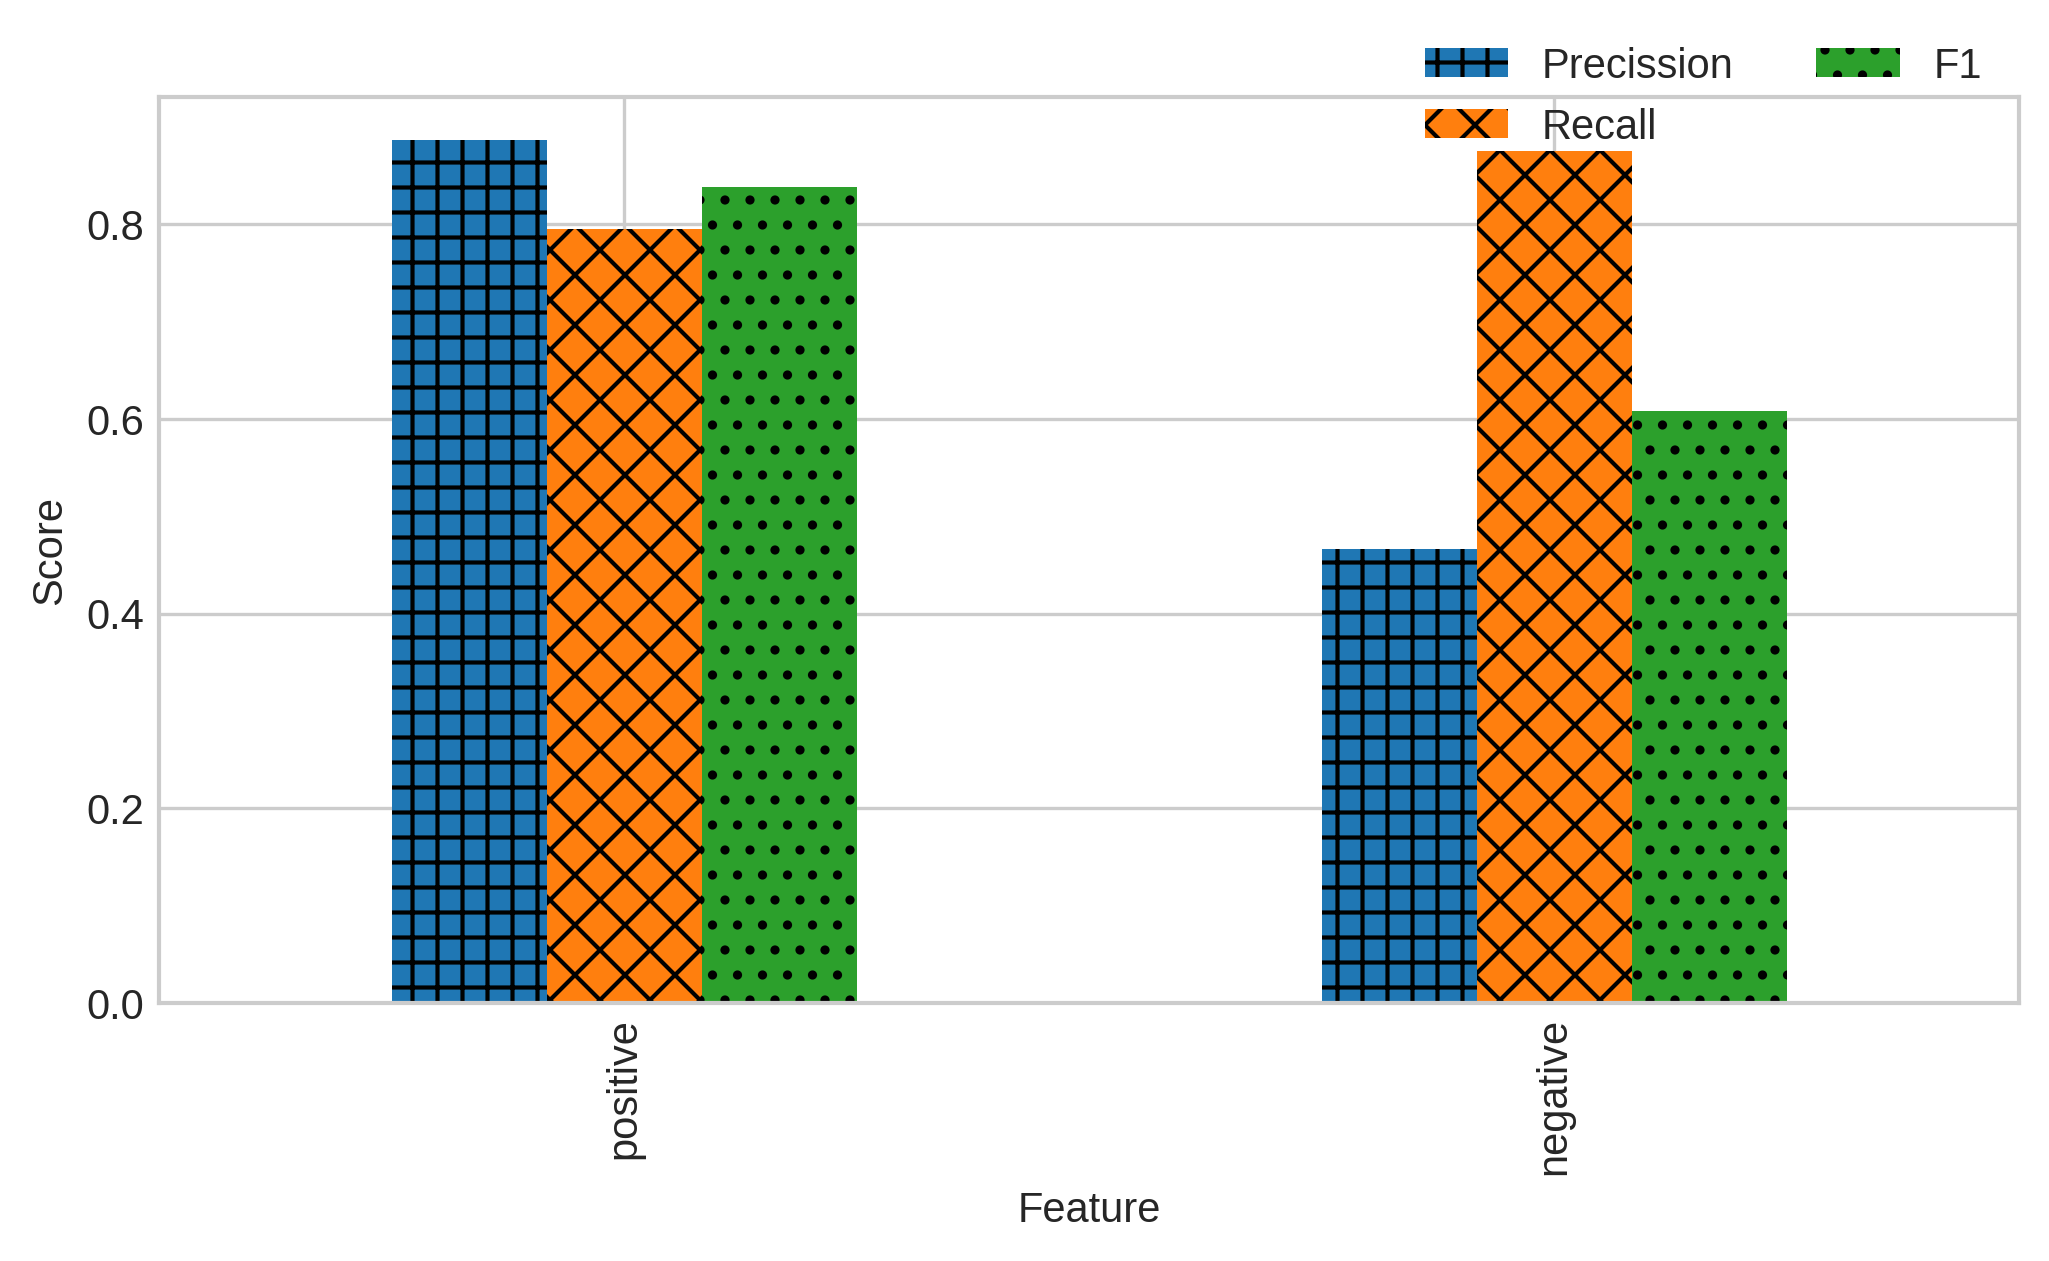

<Figure size 2400x1200 with 0 Axes>

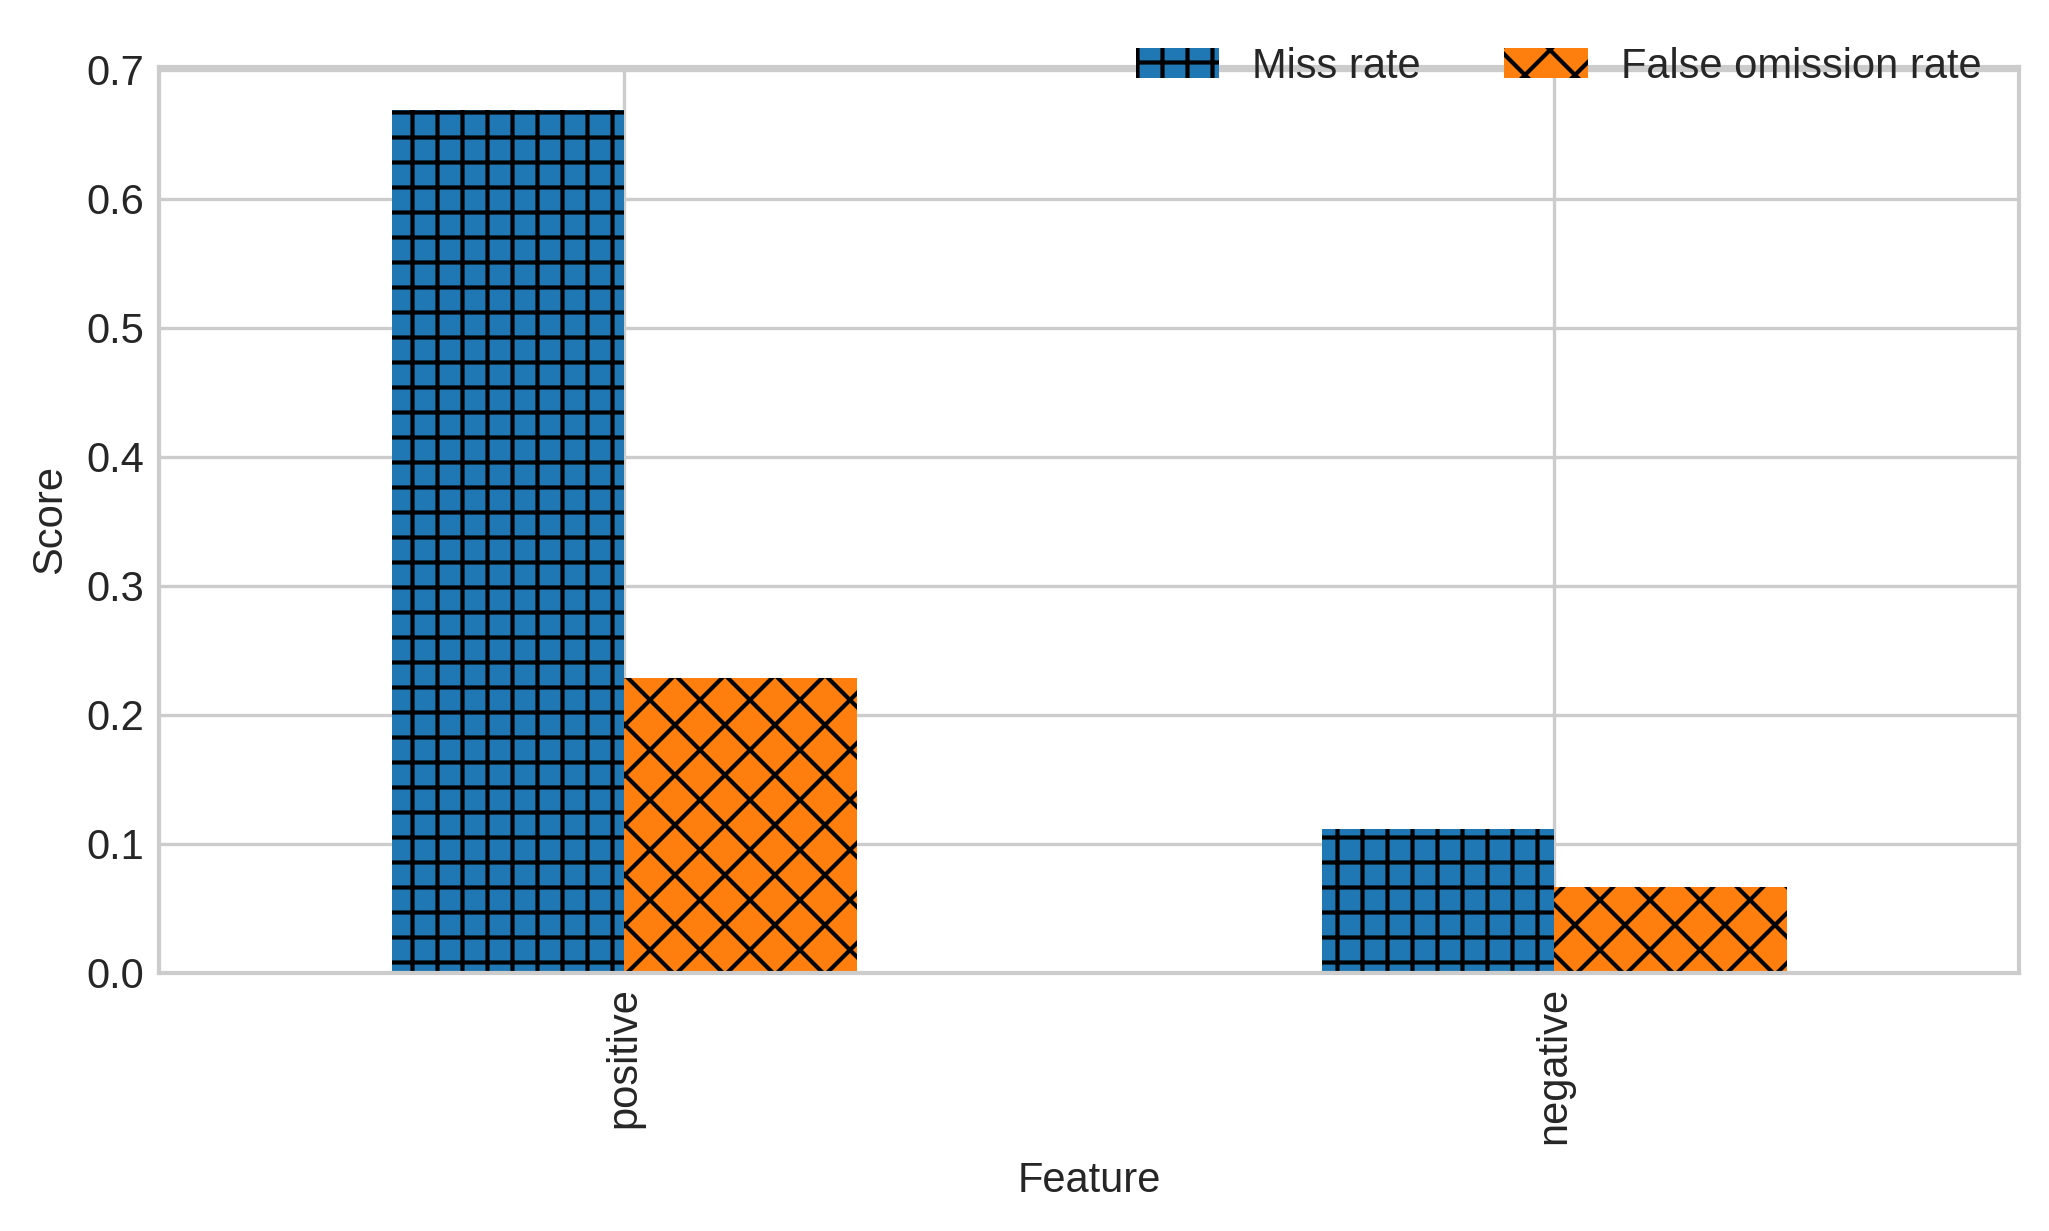

<Figure size 2400x1200 with 0 Axes>

In [194]:
make_stats2(aggregate, "POLARITY-ocd", filters=POLARITY)

## VOICE

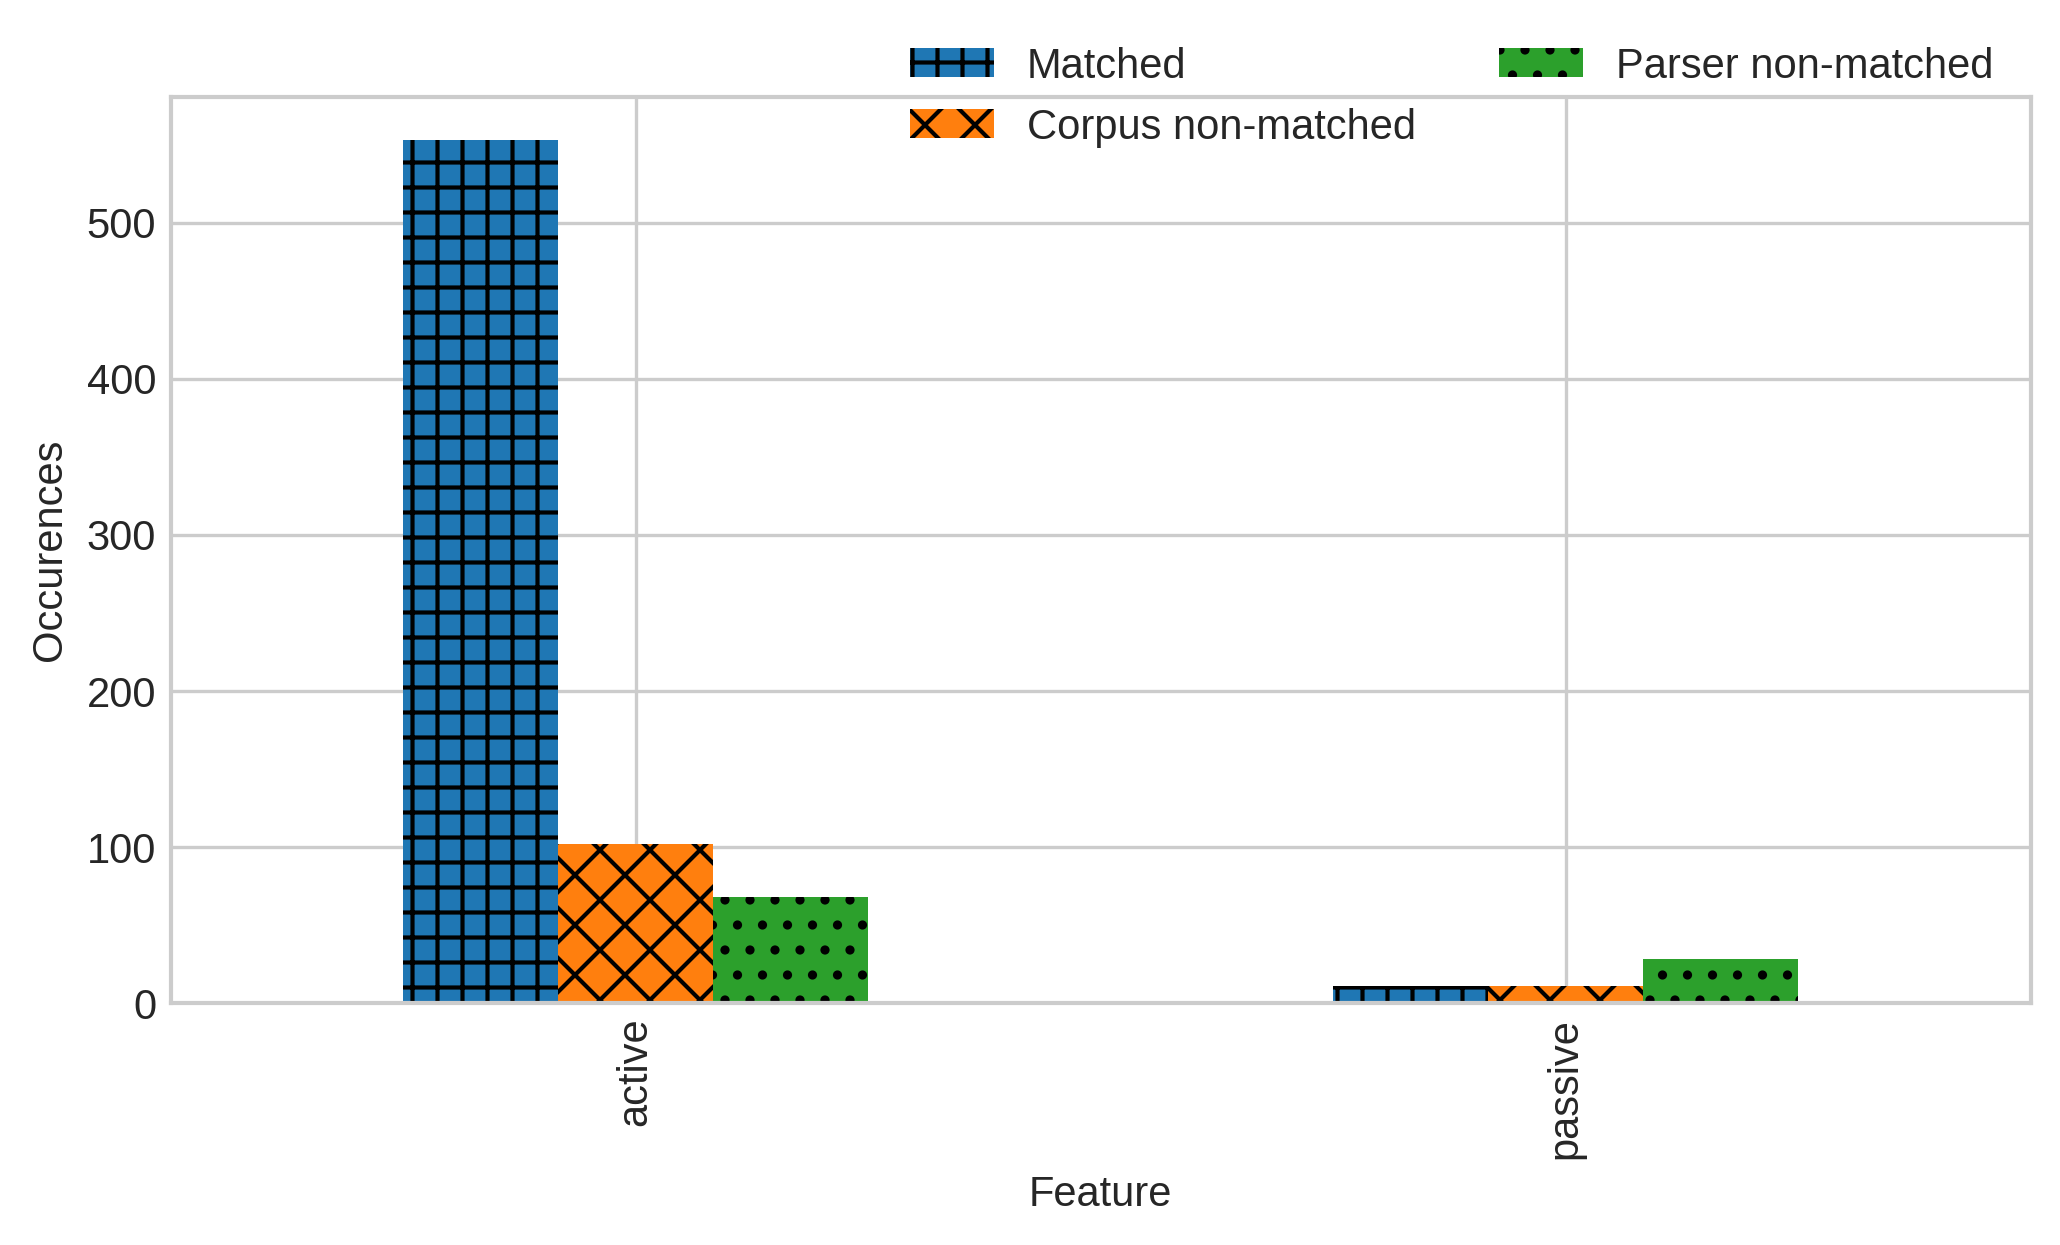

<Figure size 2400x1200 with 0 Axes>

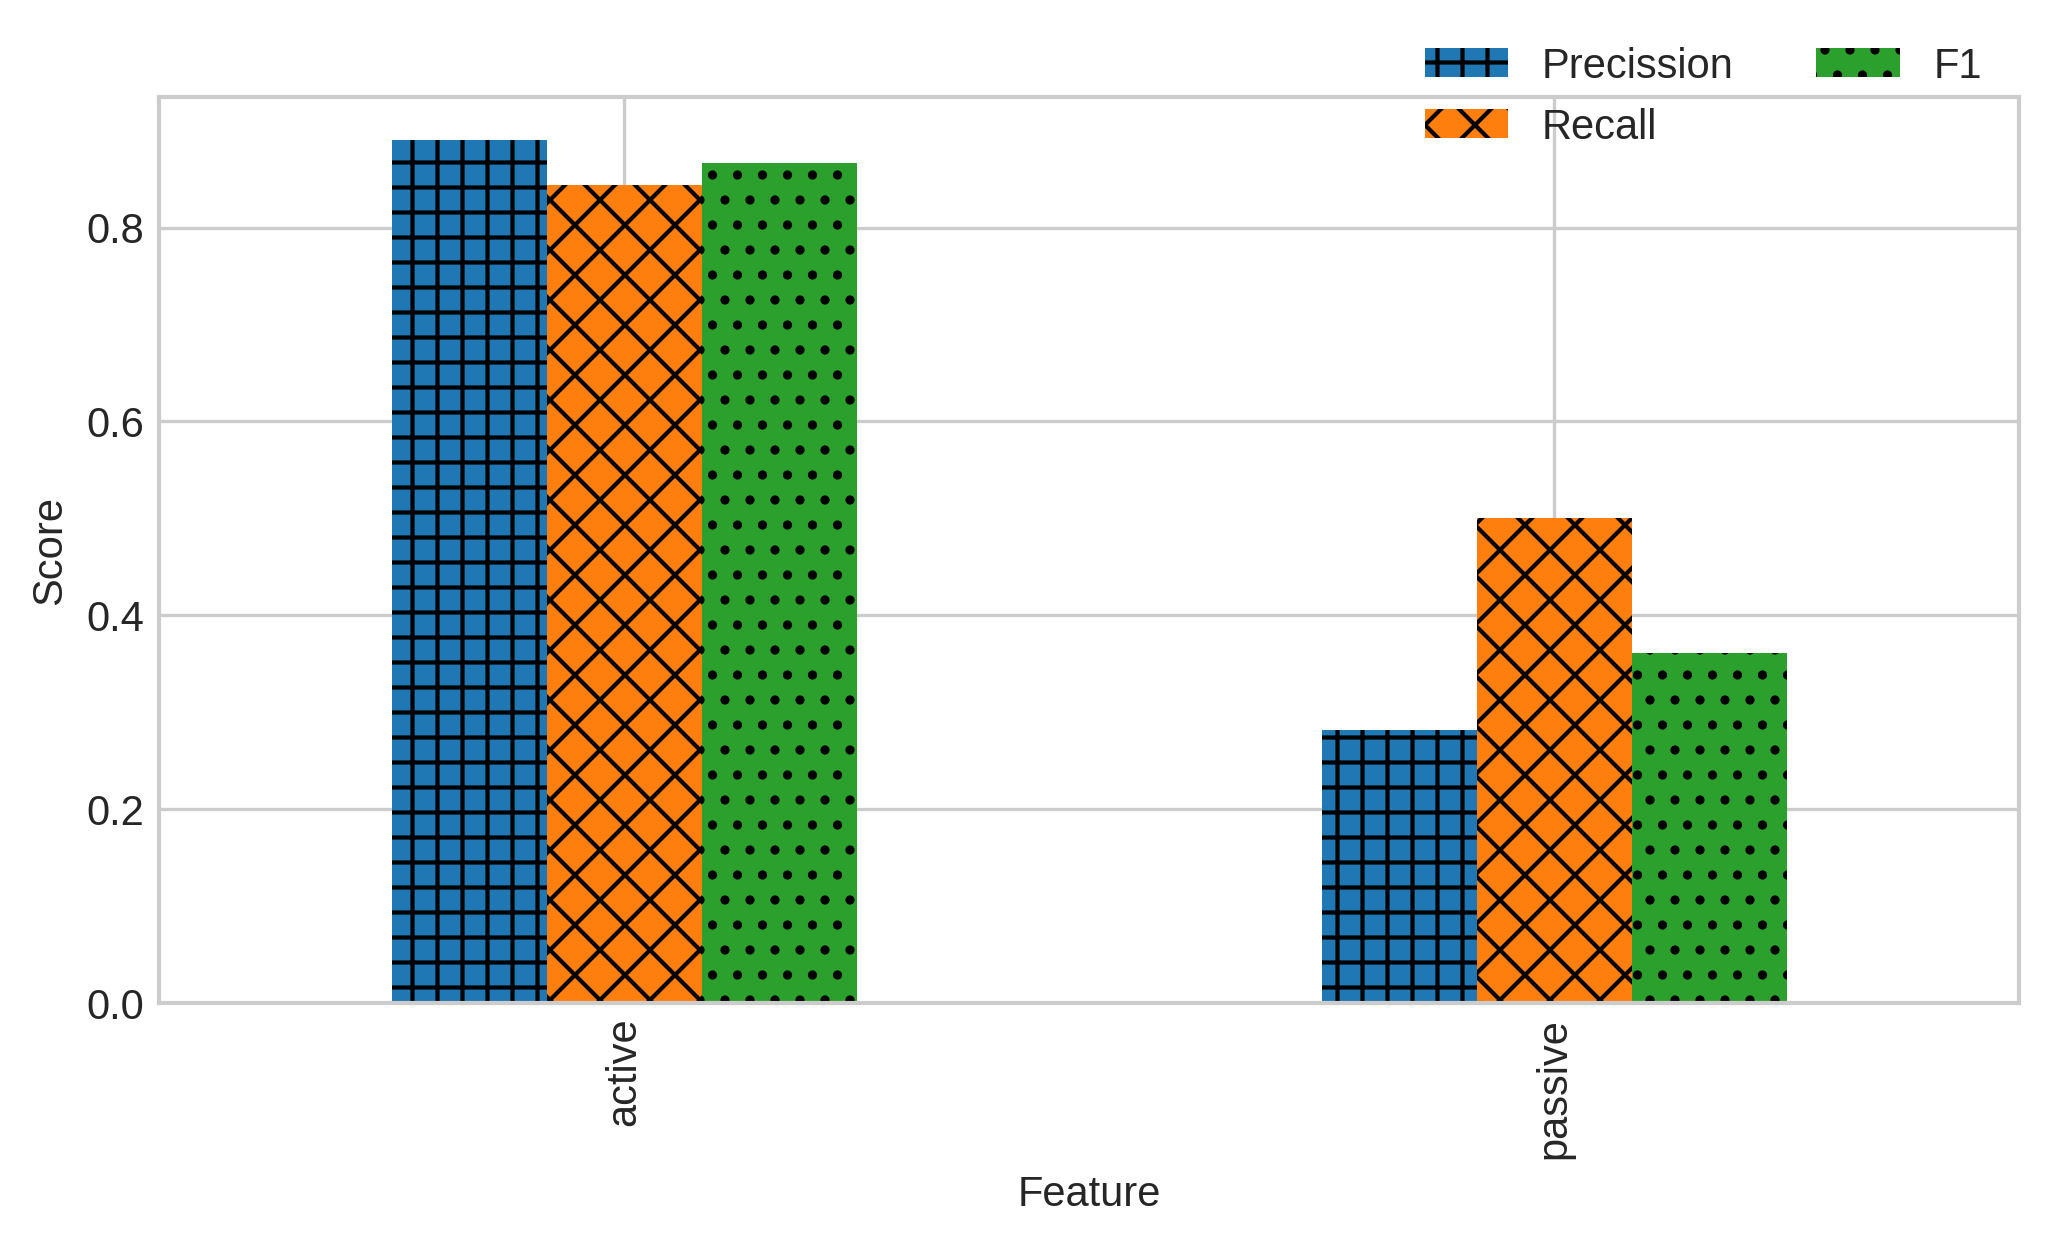

<Figure size 2400x1200 with 0 Axes>

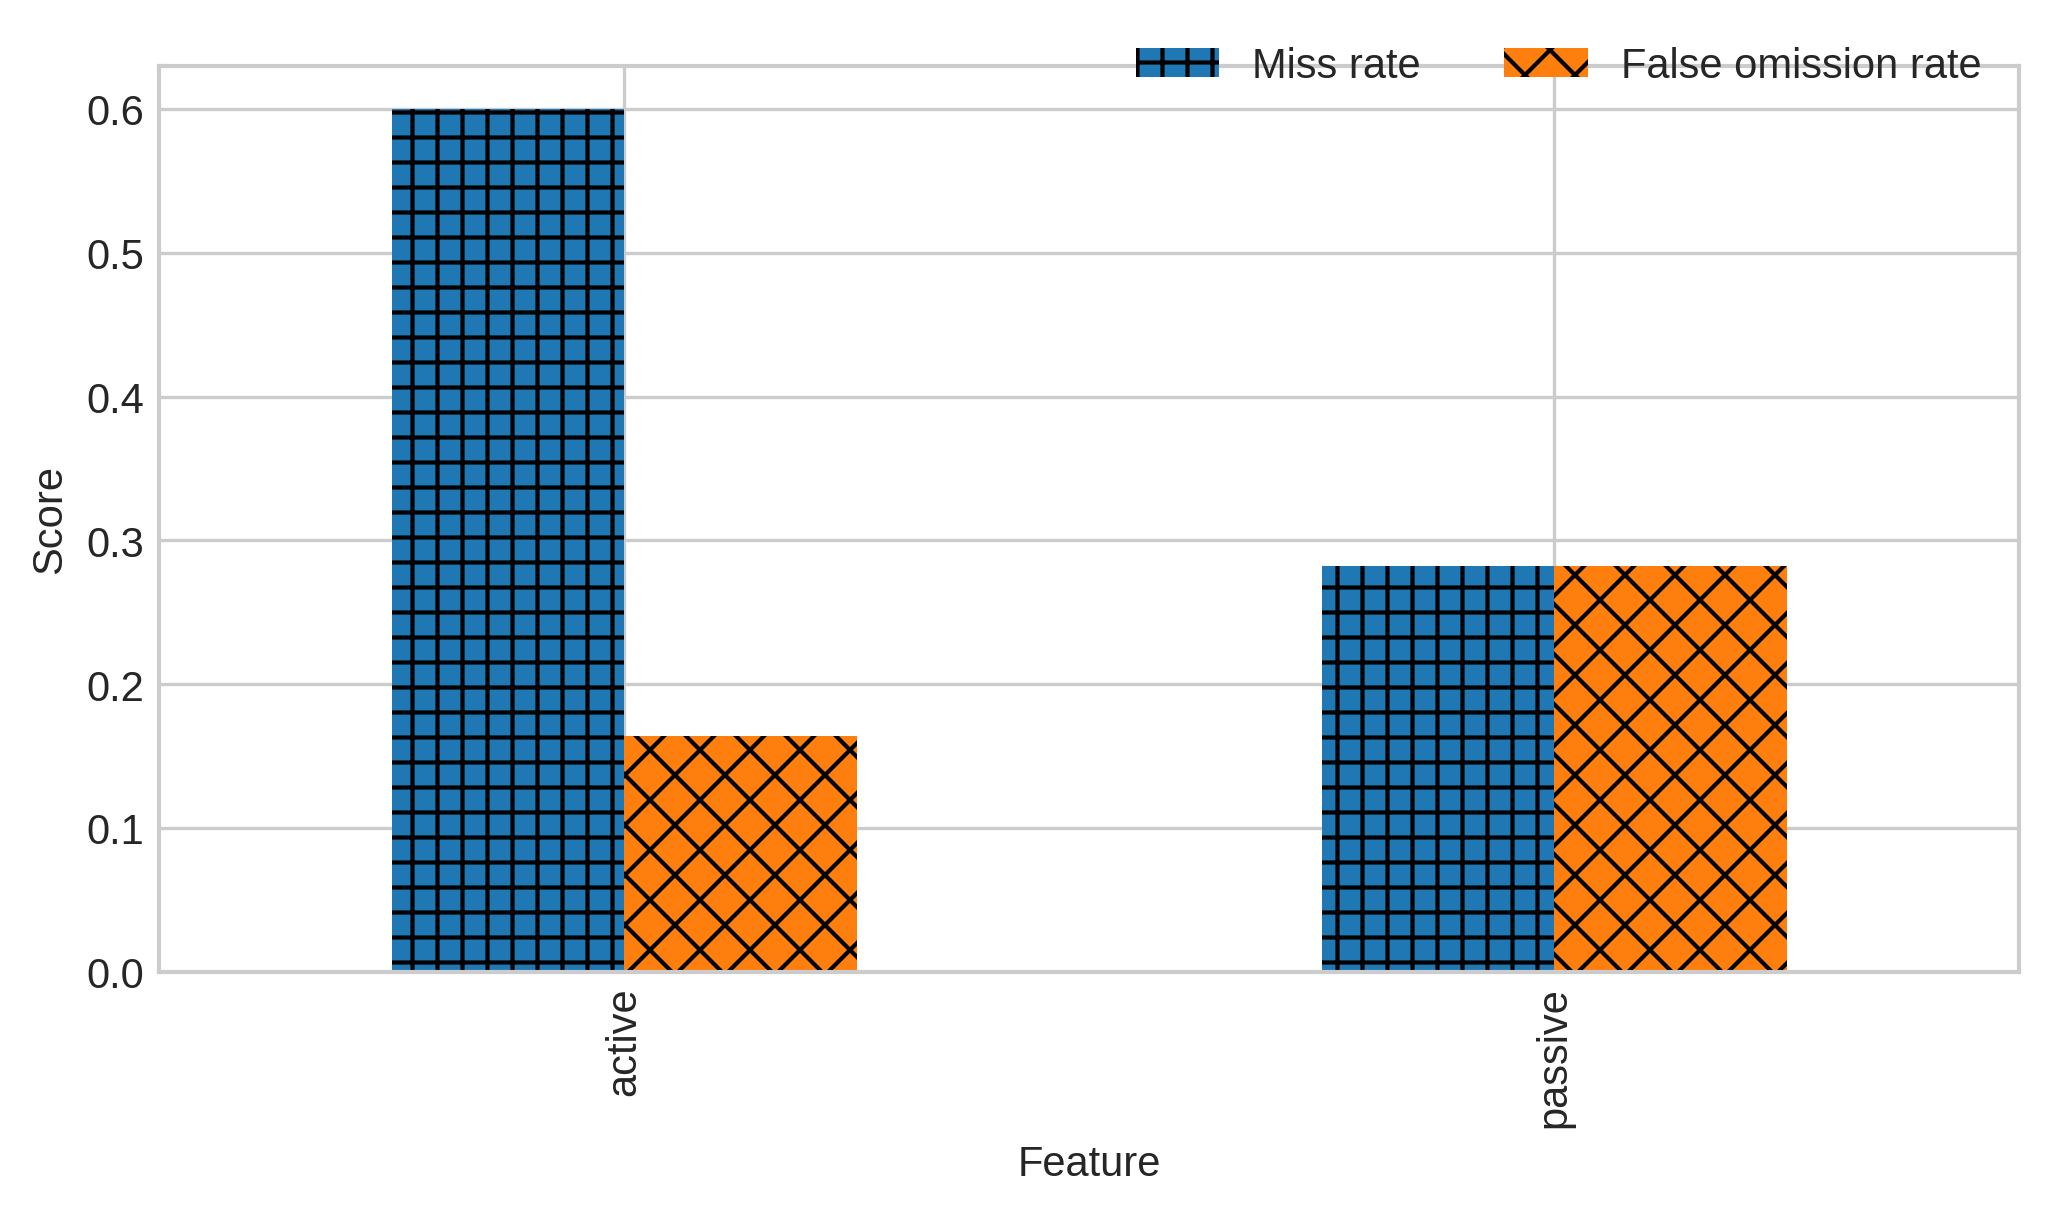

<Figure size 2400x1200 with 0 Axes>

In [12]:
make_stats2(aggregate, "VOICE-ocd", filters=VOICE)

## FINITENESS

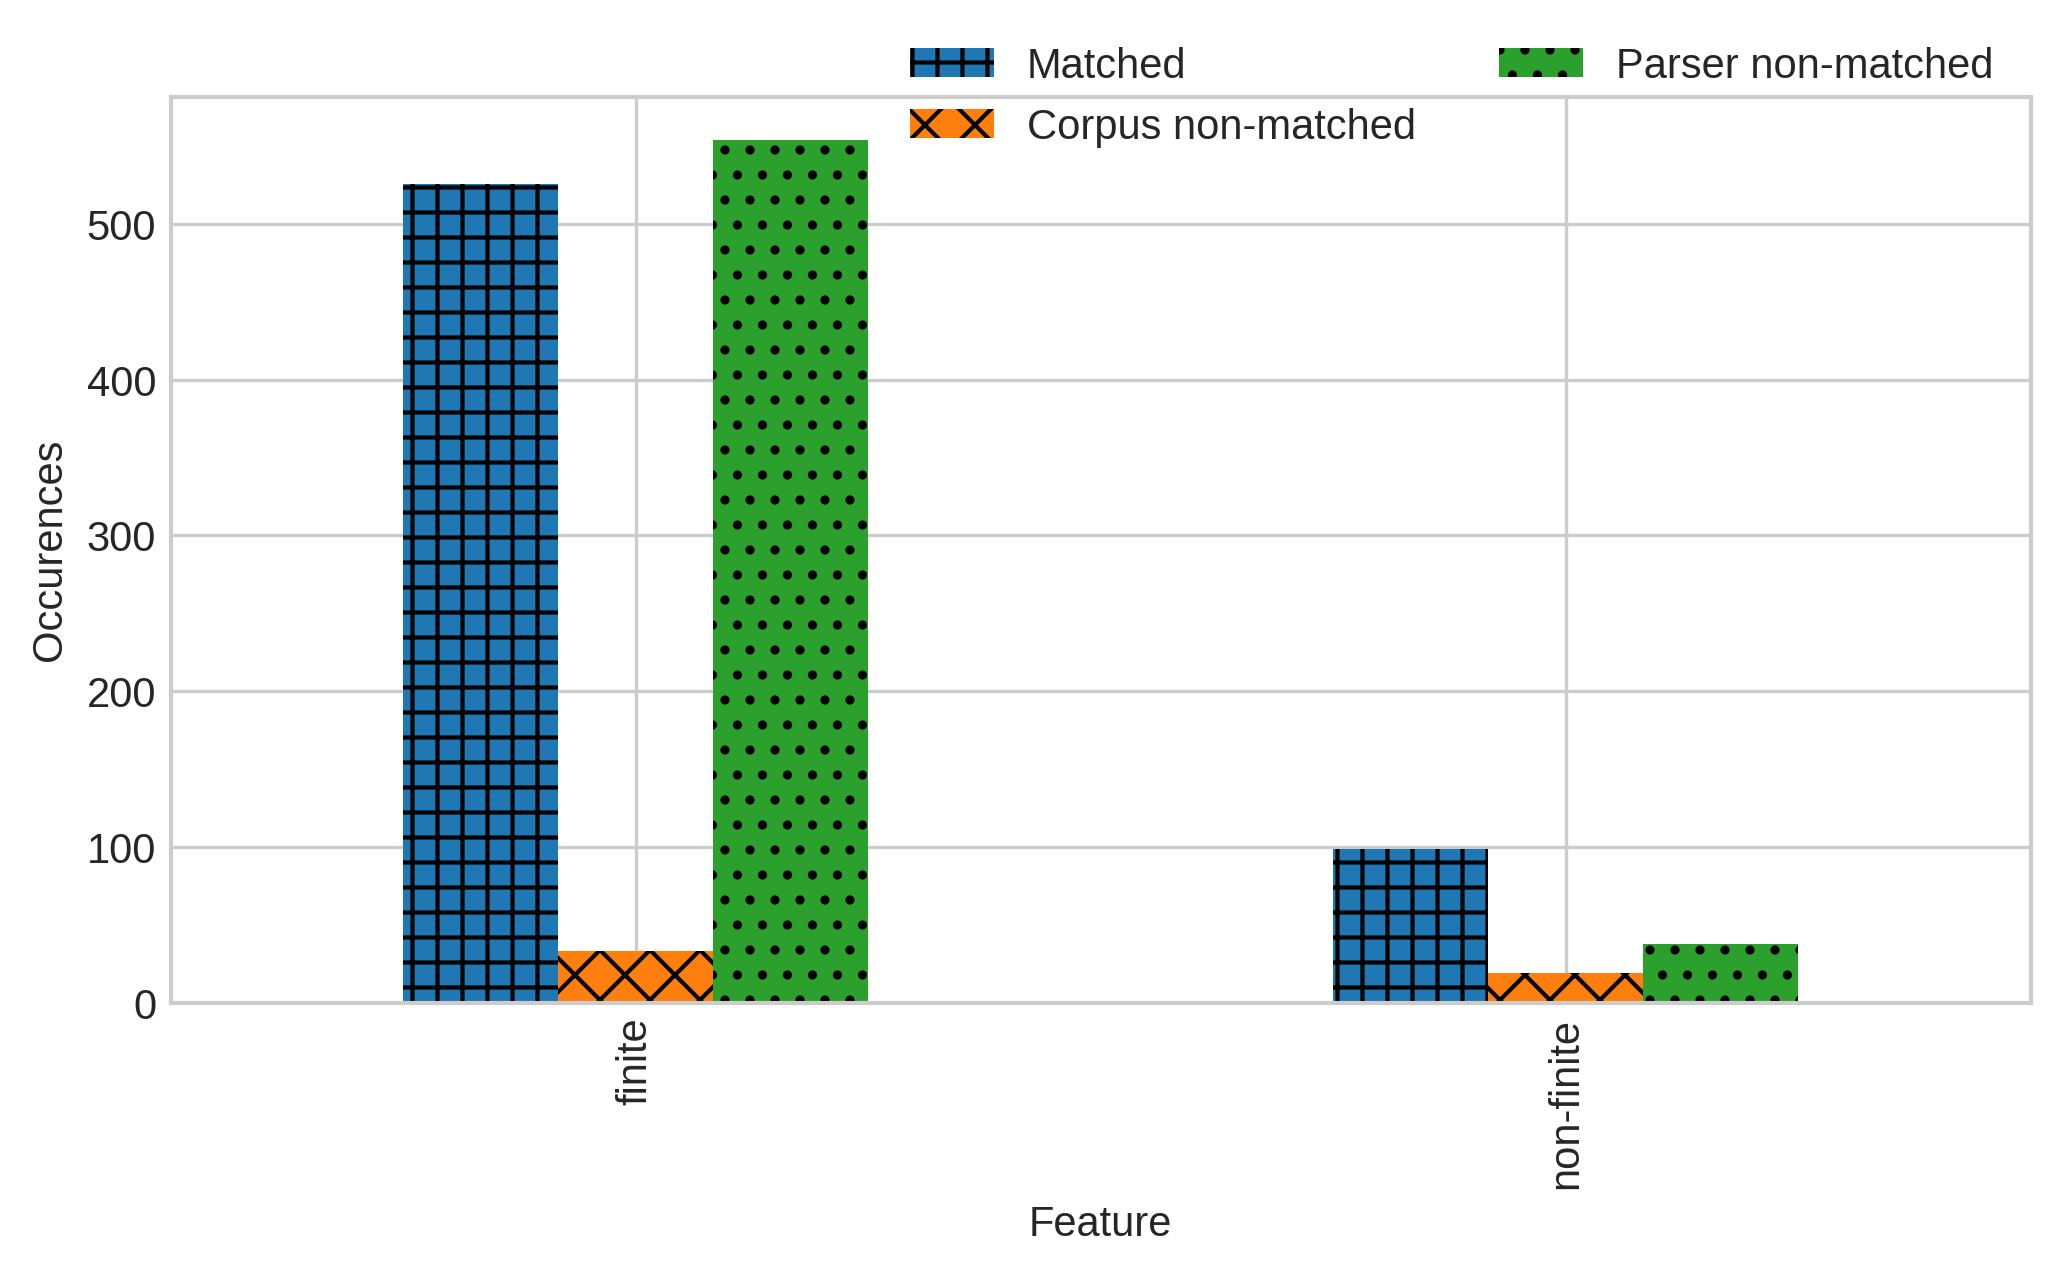

<Figure size 2400x1200 with 0 Axes>

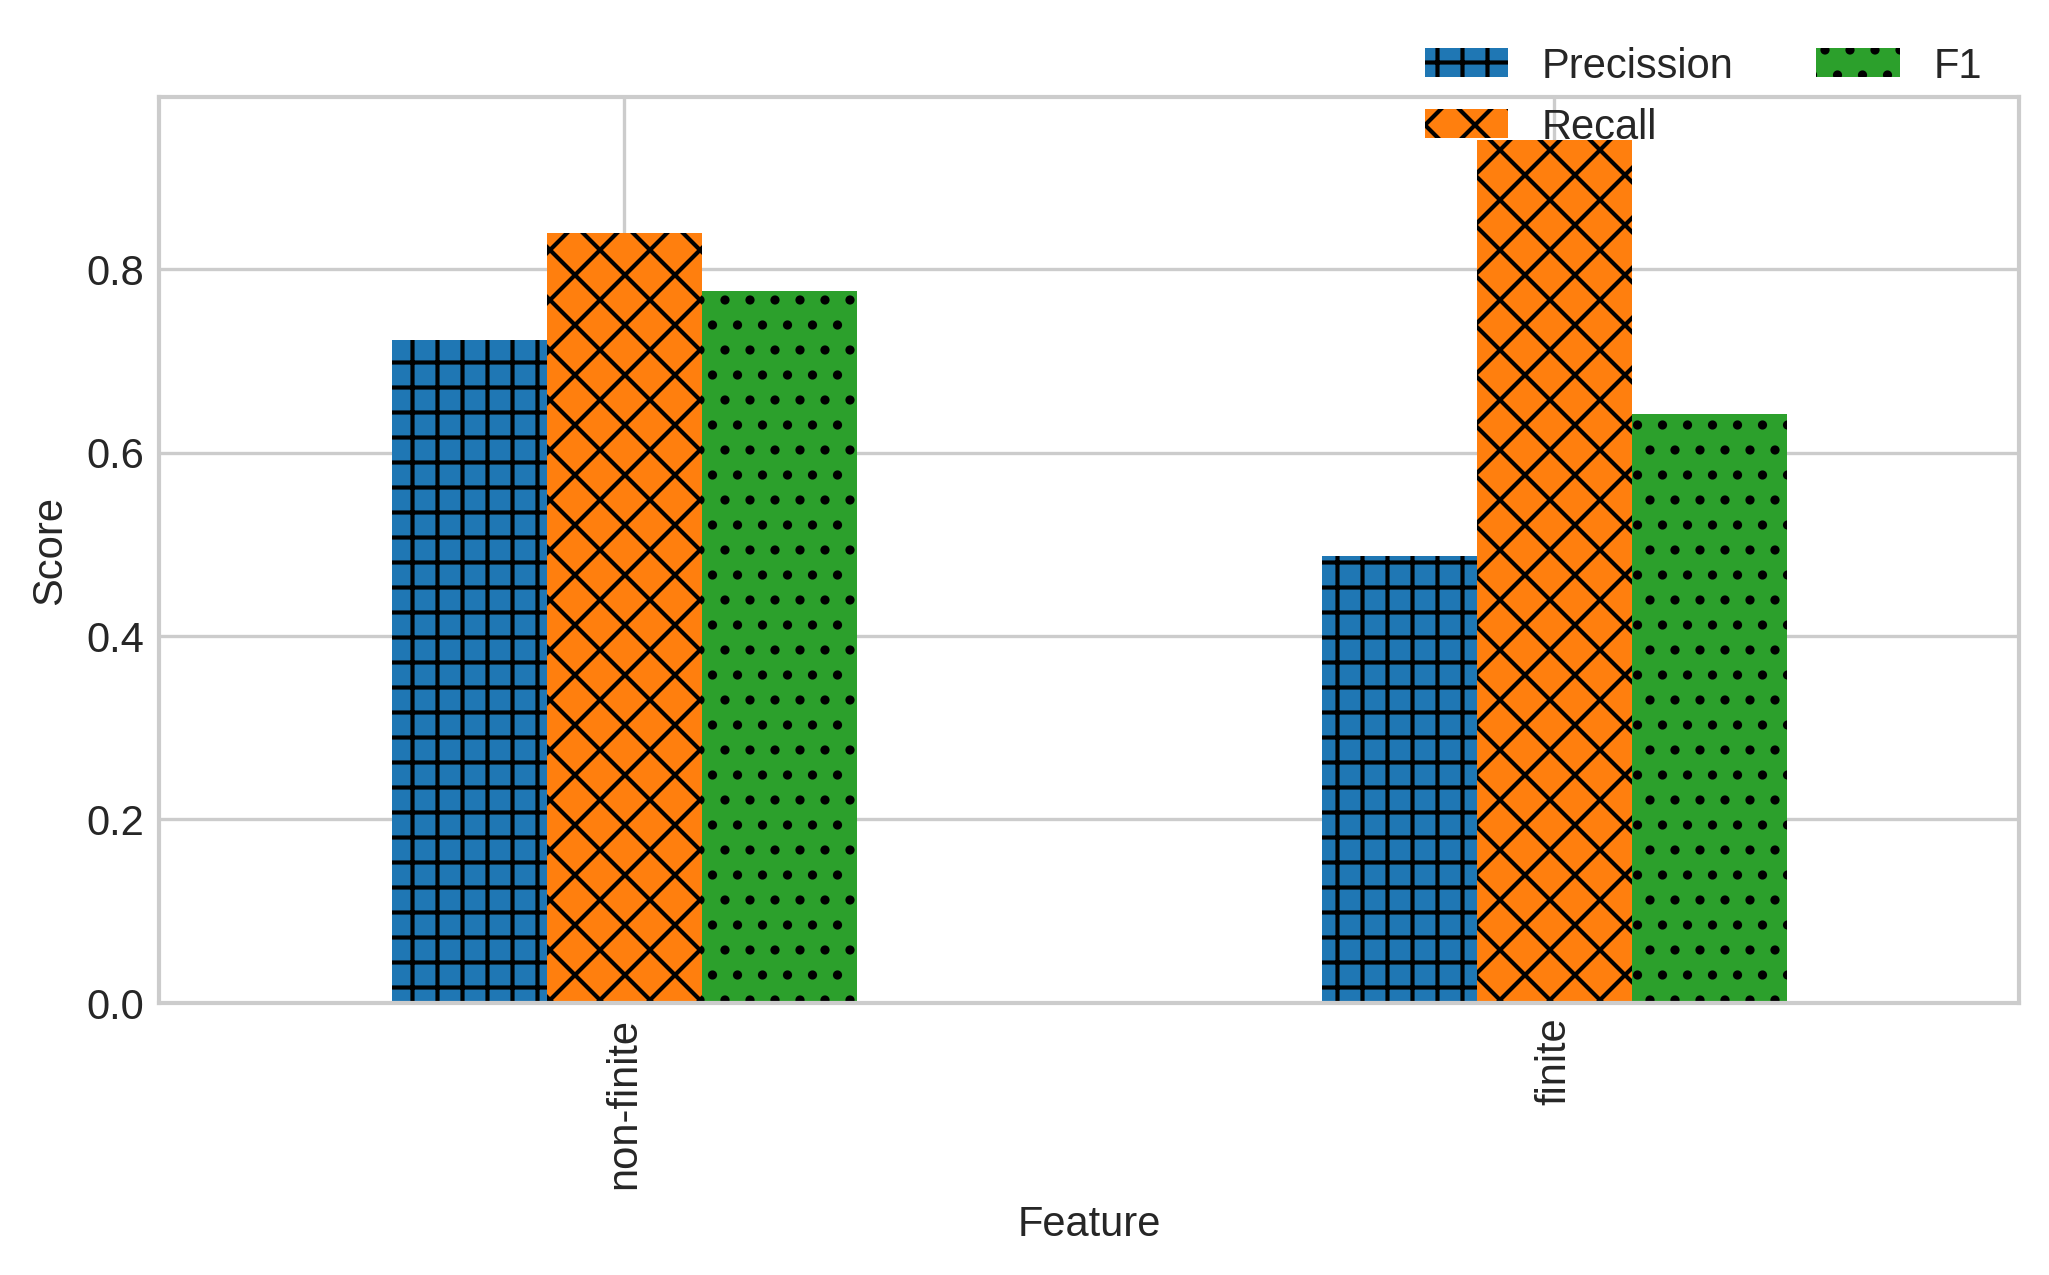

<Figure size 2400x1200 with 0 Axes>

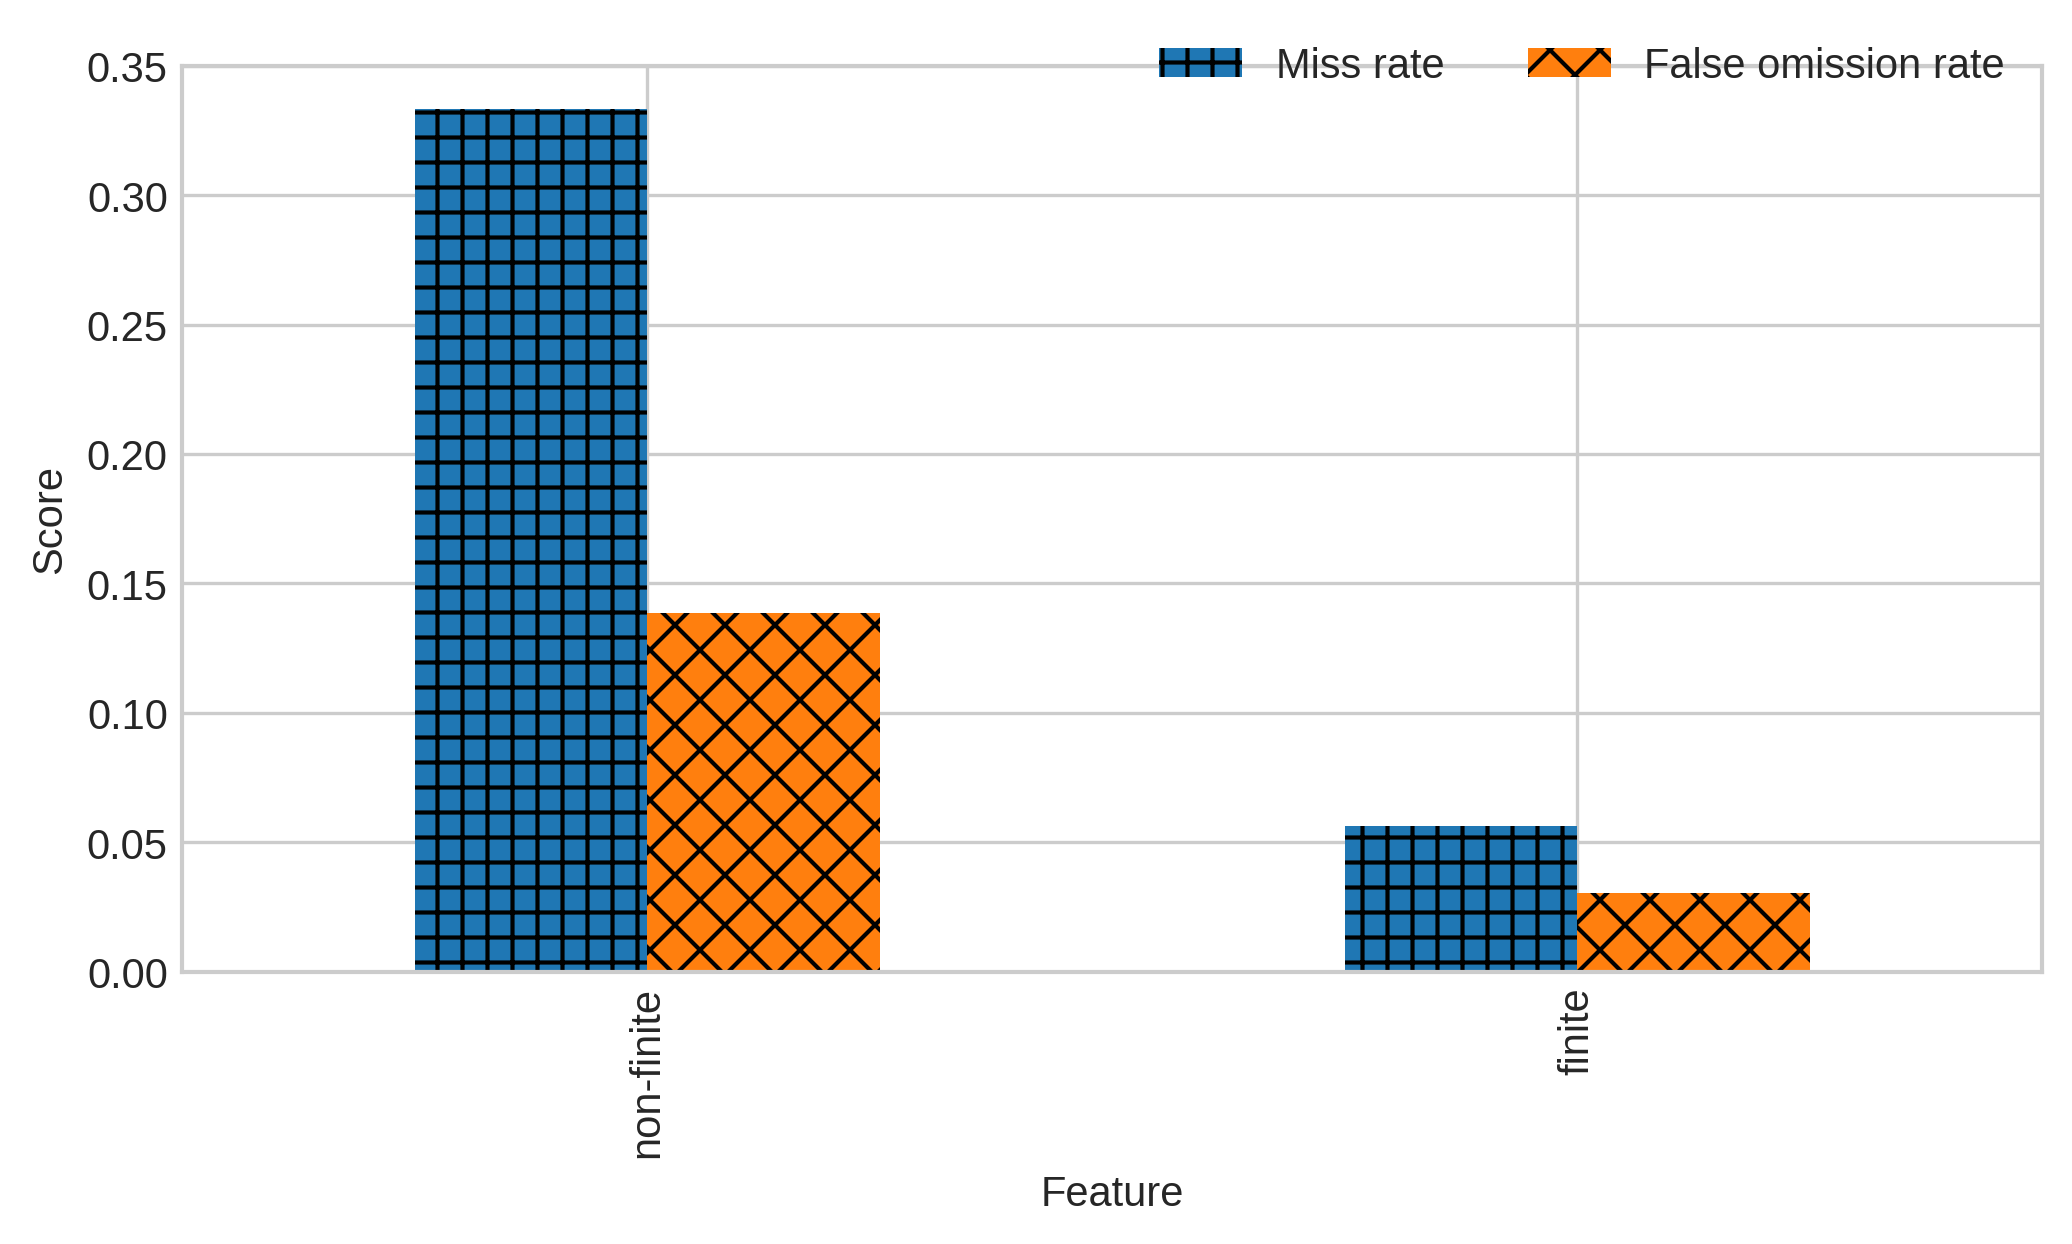

<Figure size 2400x1200 with 0 Axes>

In [13]:
make_stats2(aggregate, "FINITENESS-ocd", filters=FINITENESS)

## MOOD

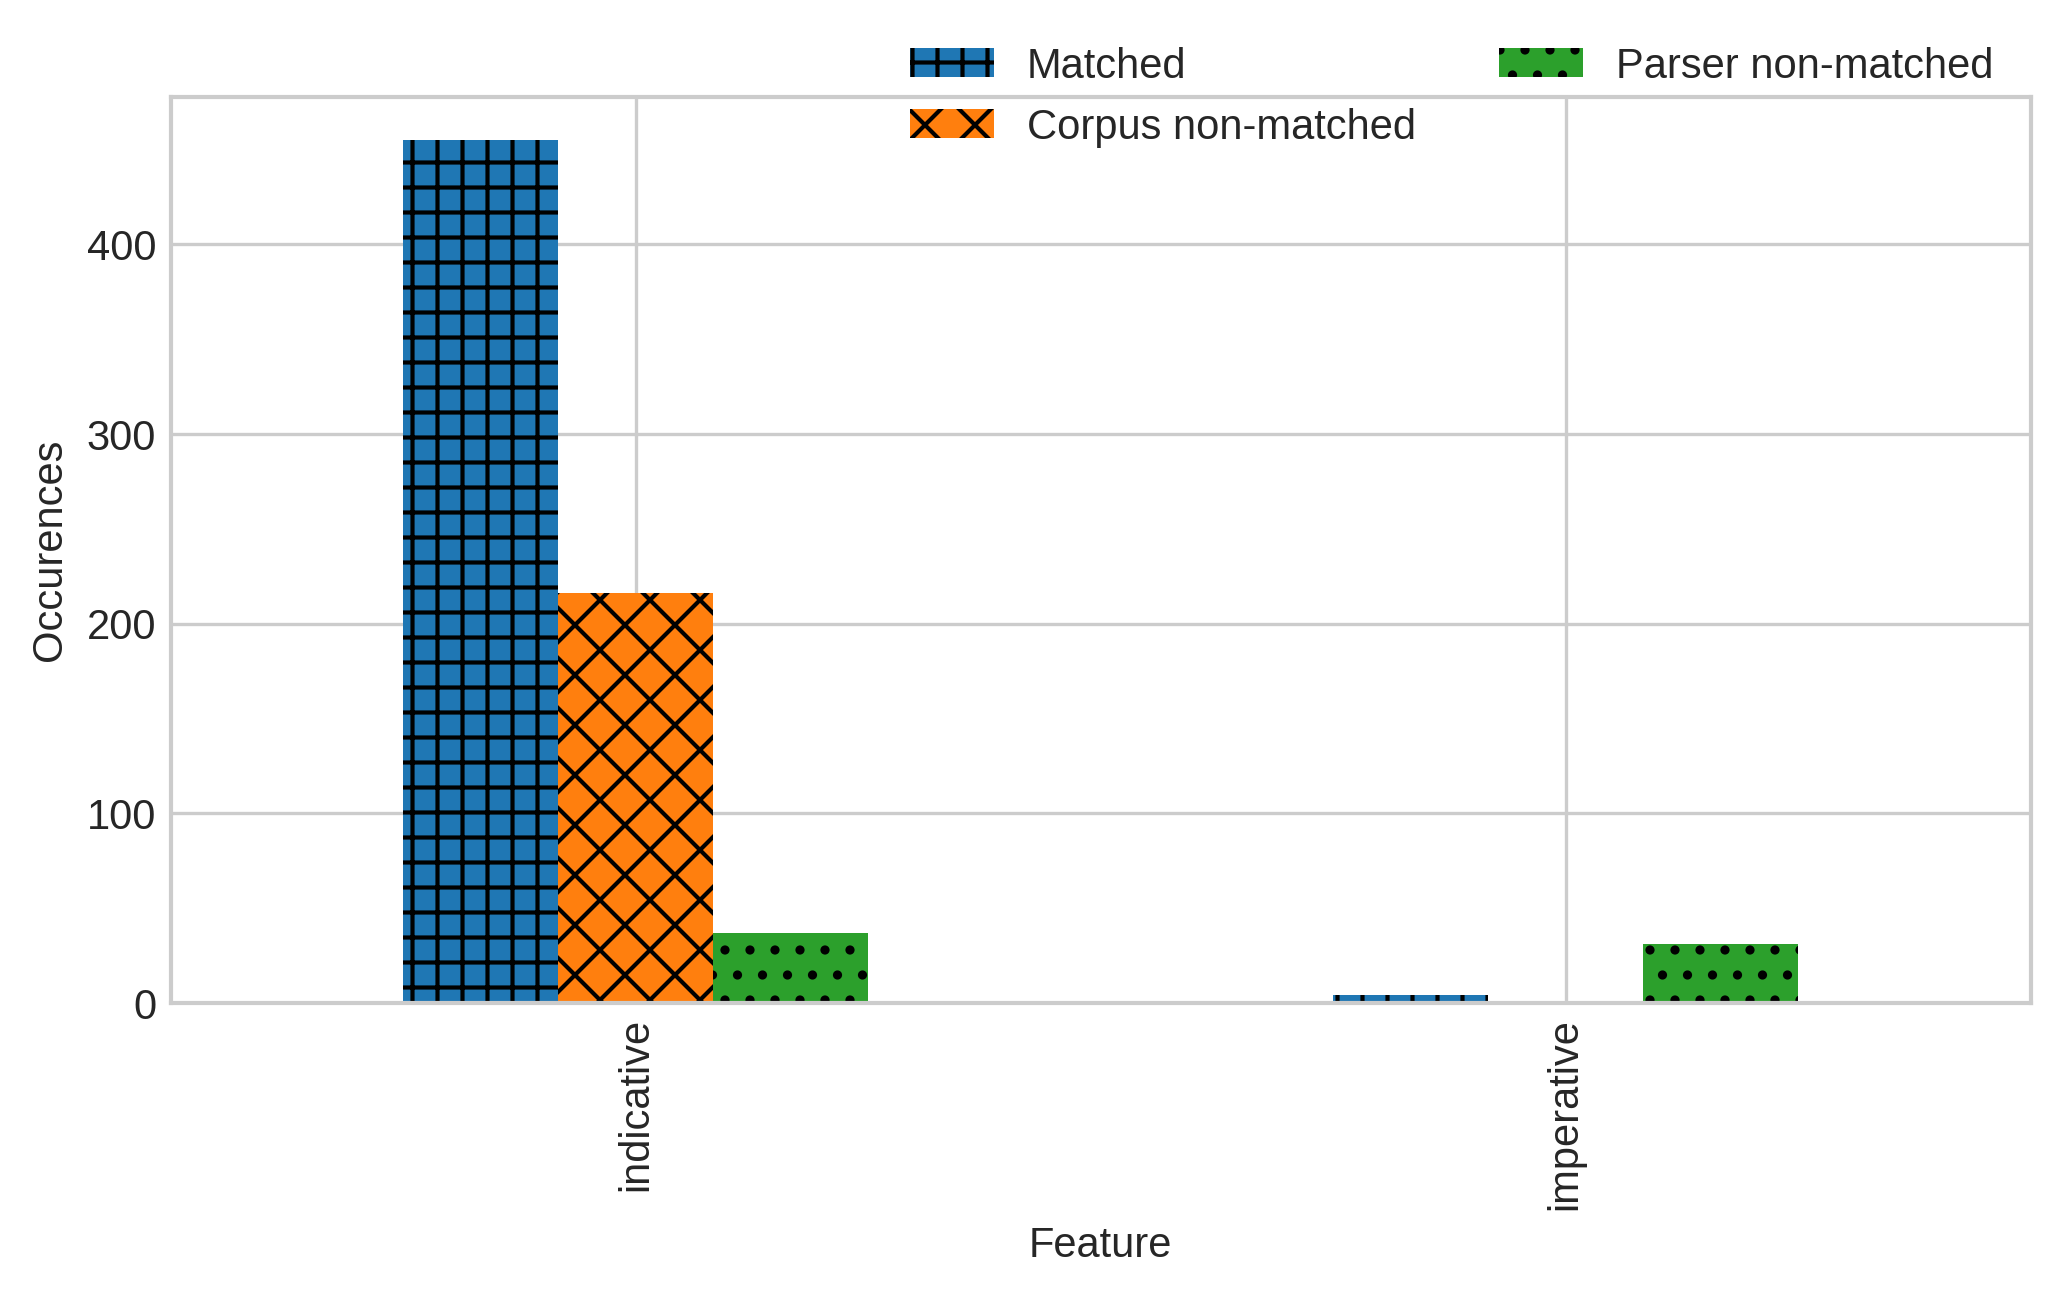

<Figure size 2400x1200 with 0 Axes>

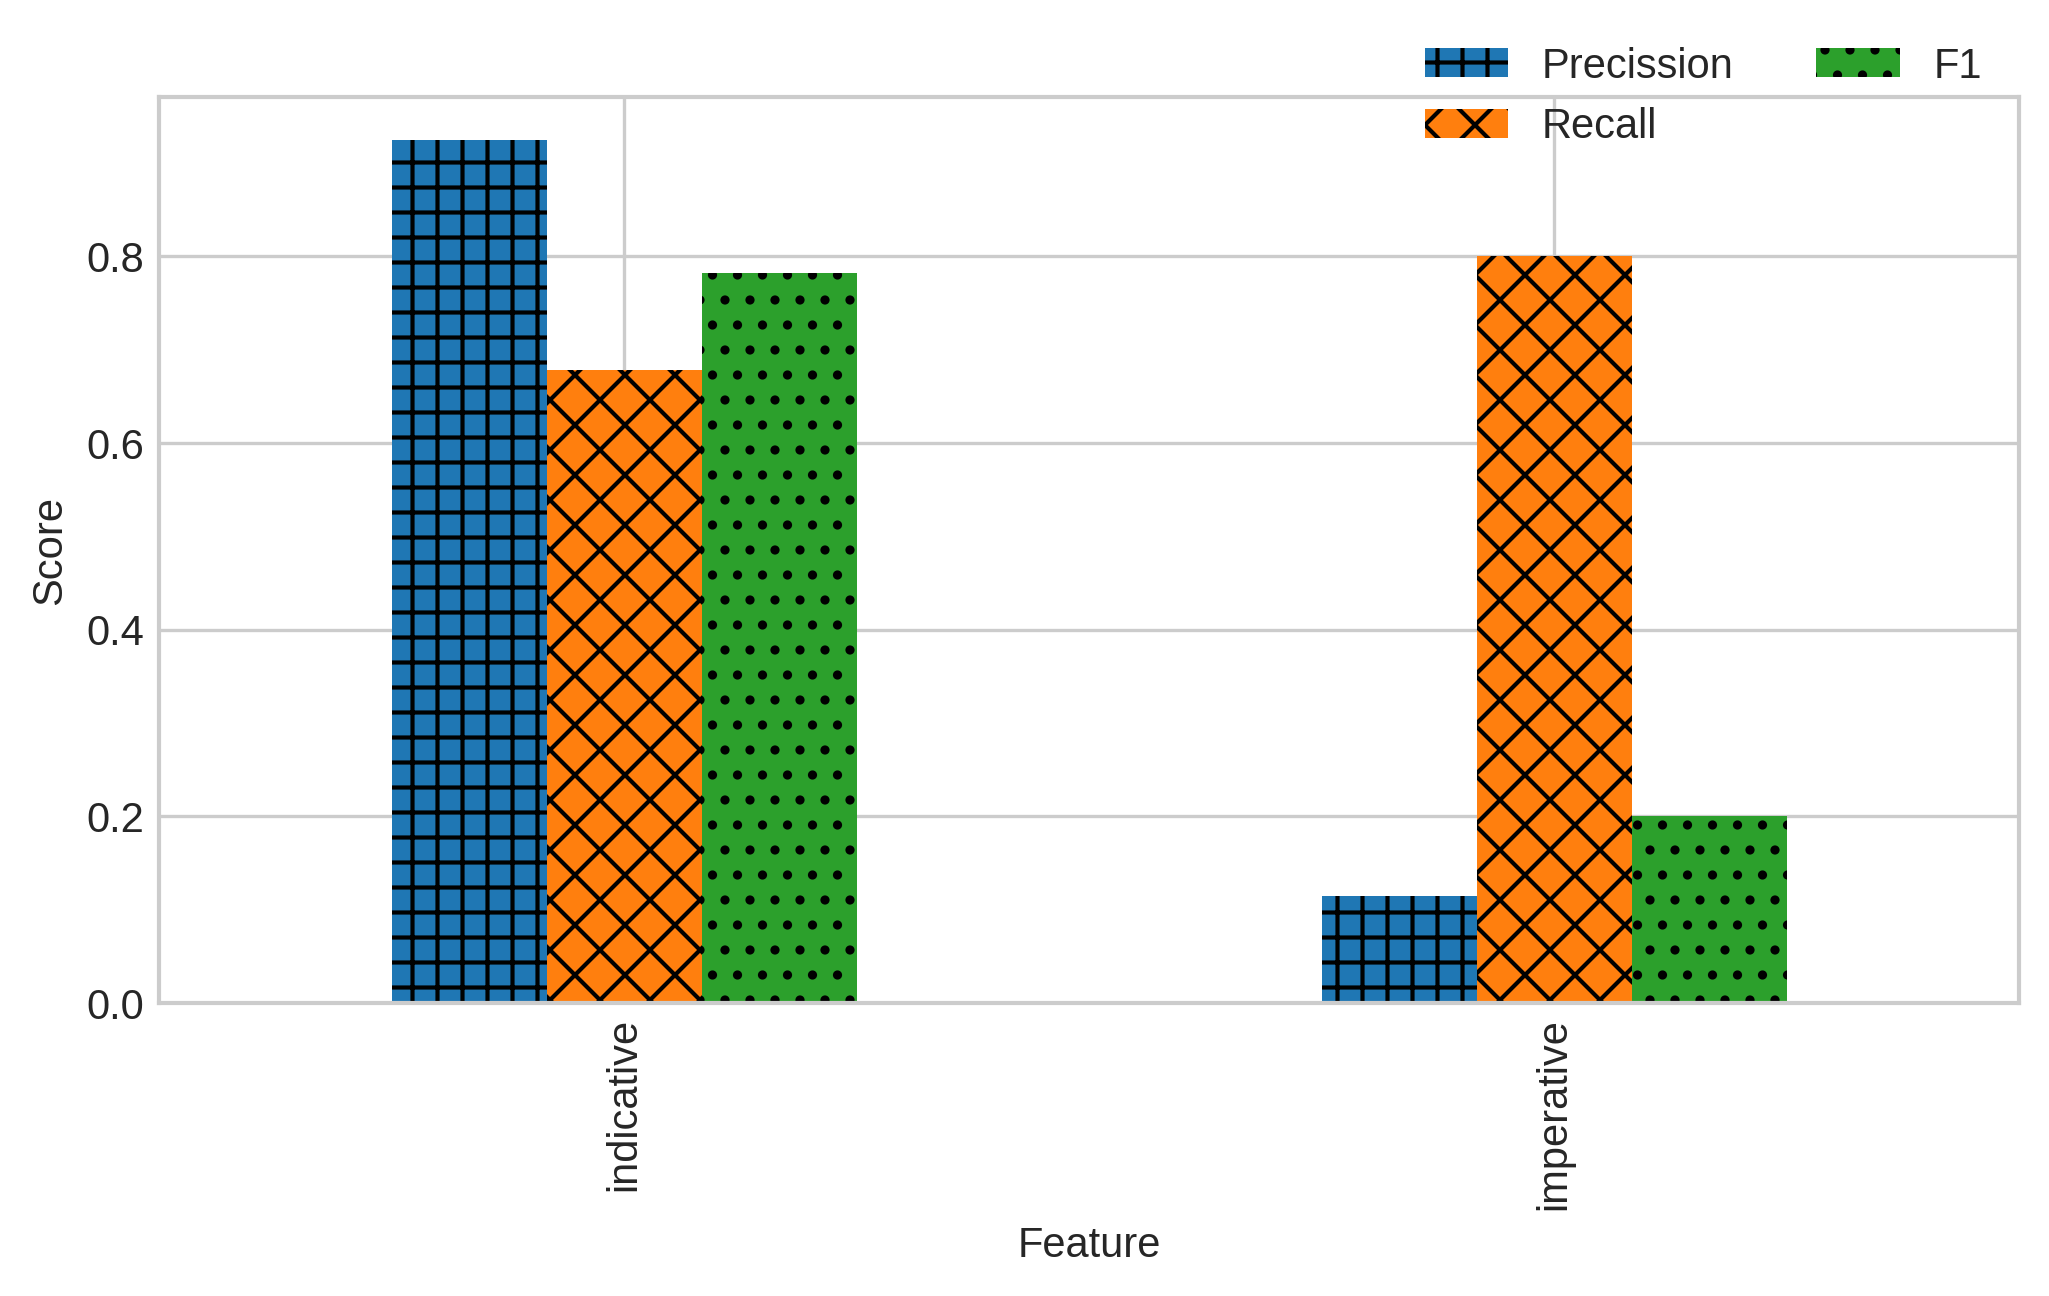

<Figure size 2400x1200 with 0 Axes>

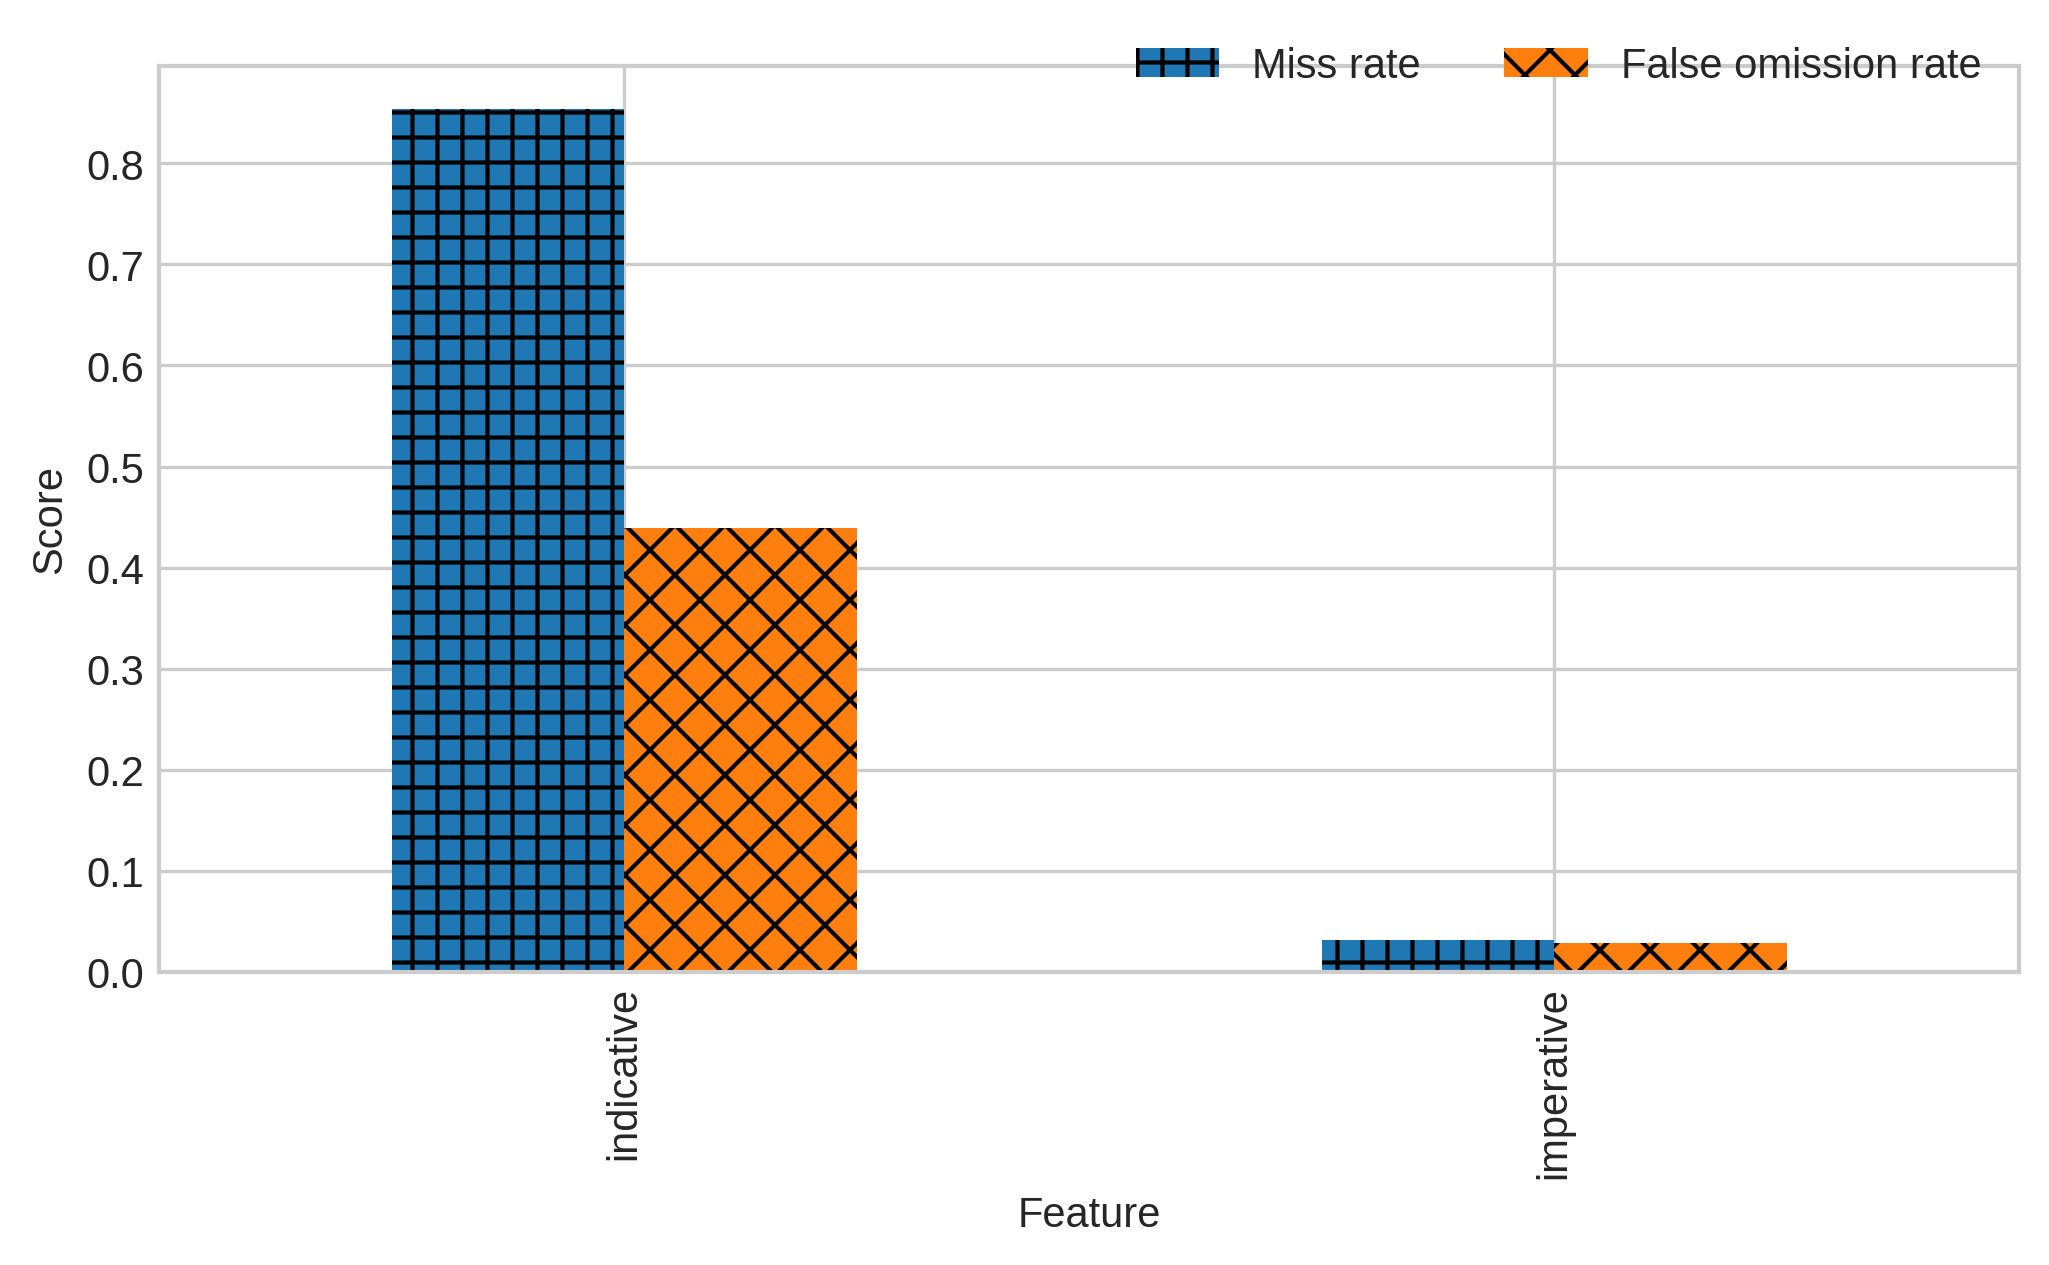

<Figure size 2400x1200 with 0 Axes>

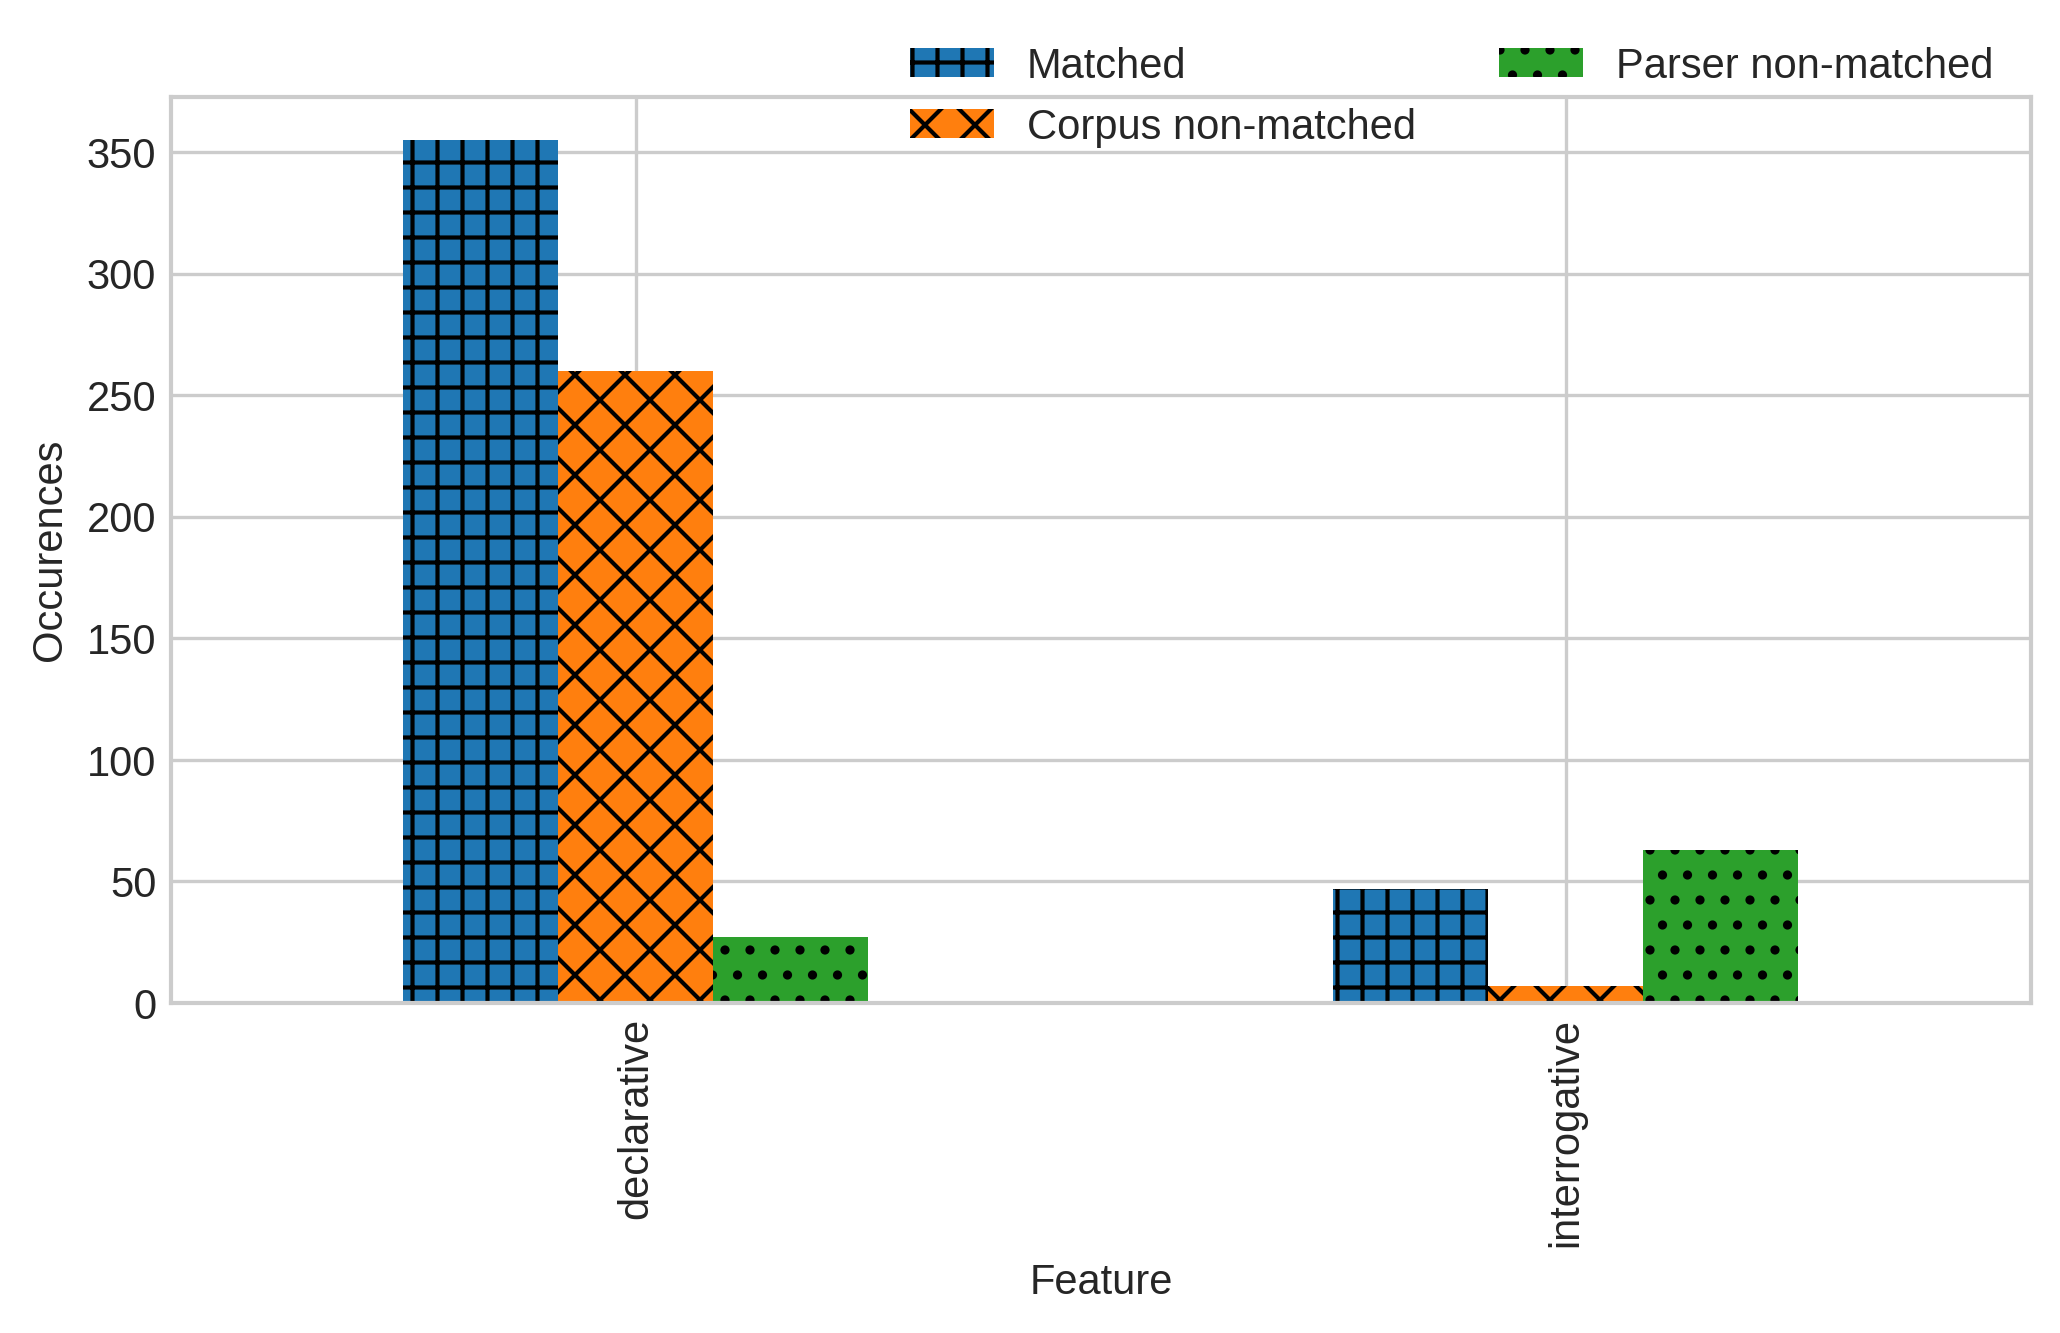

<Figure size 2400x1200 with 0 Axes>

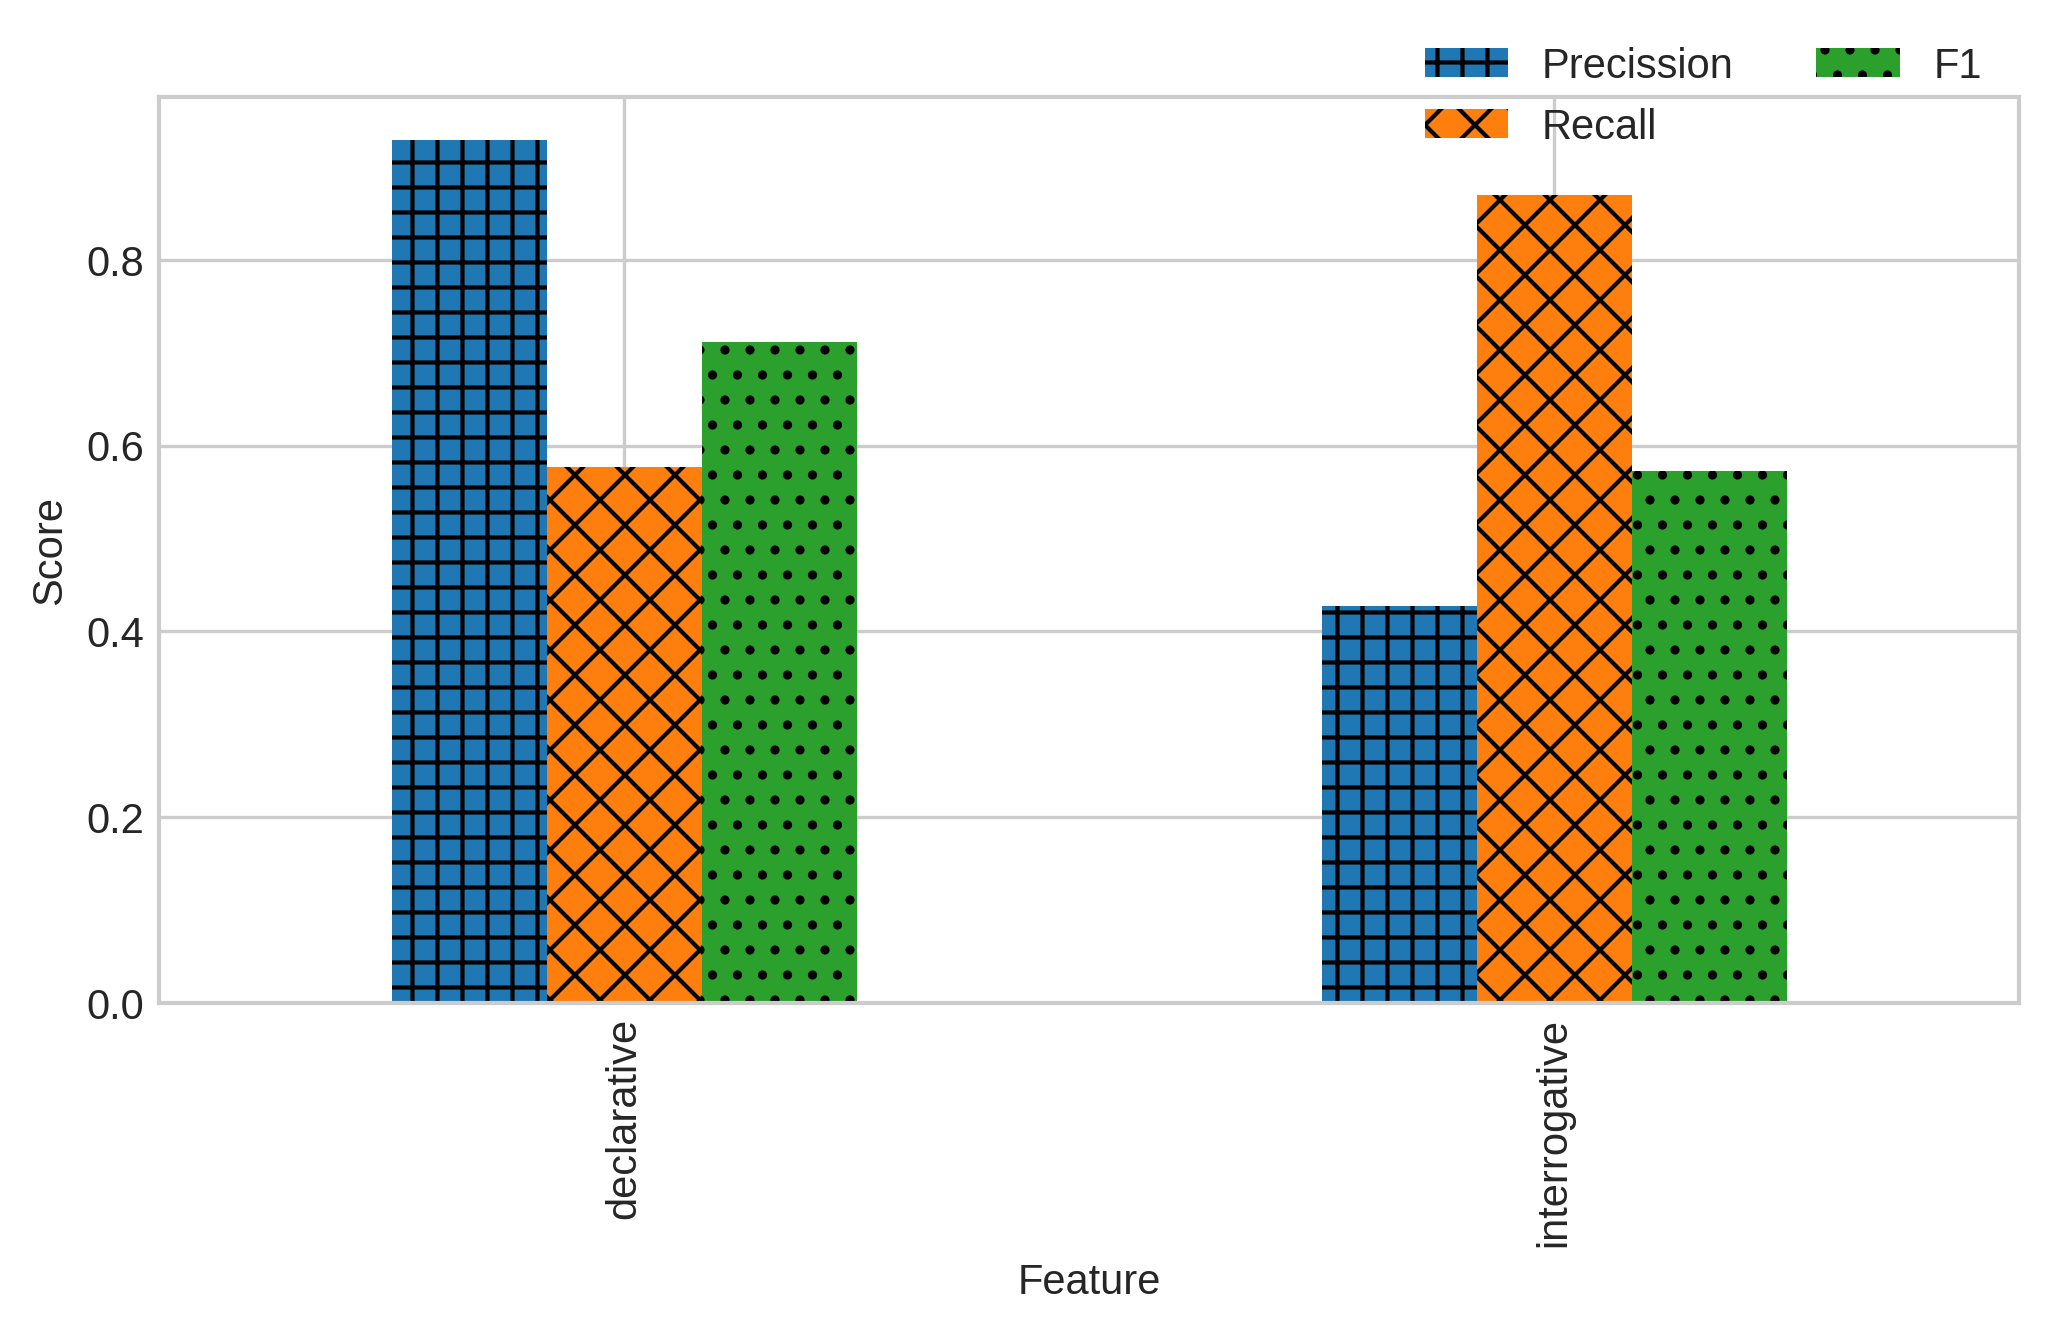

<Figure size 2400x1200 with 0 Axes>

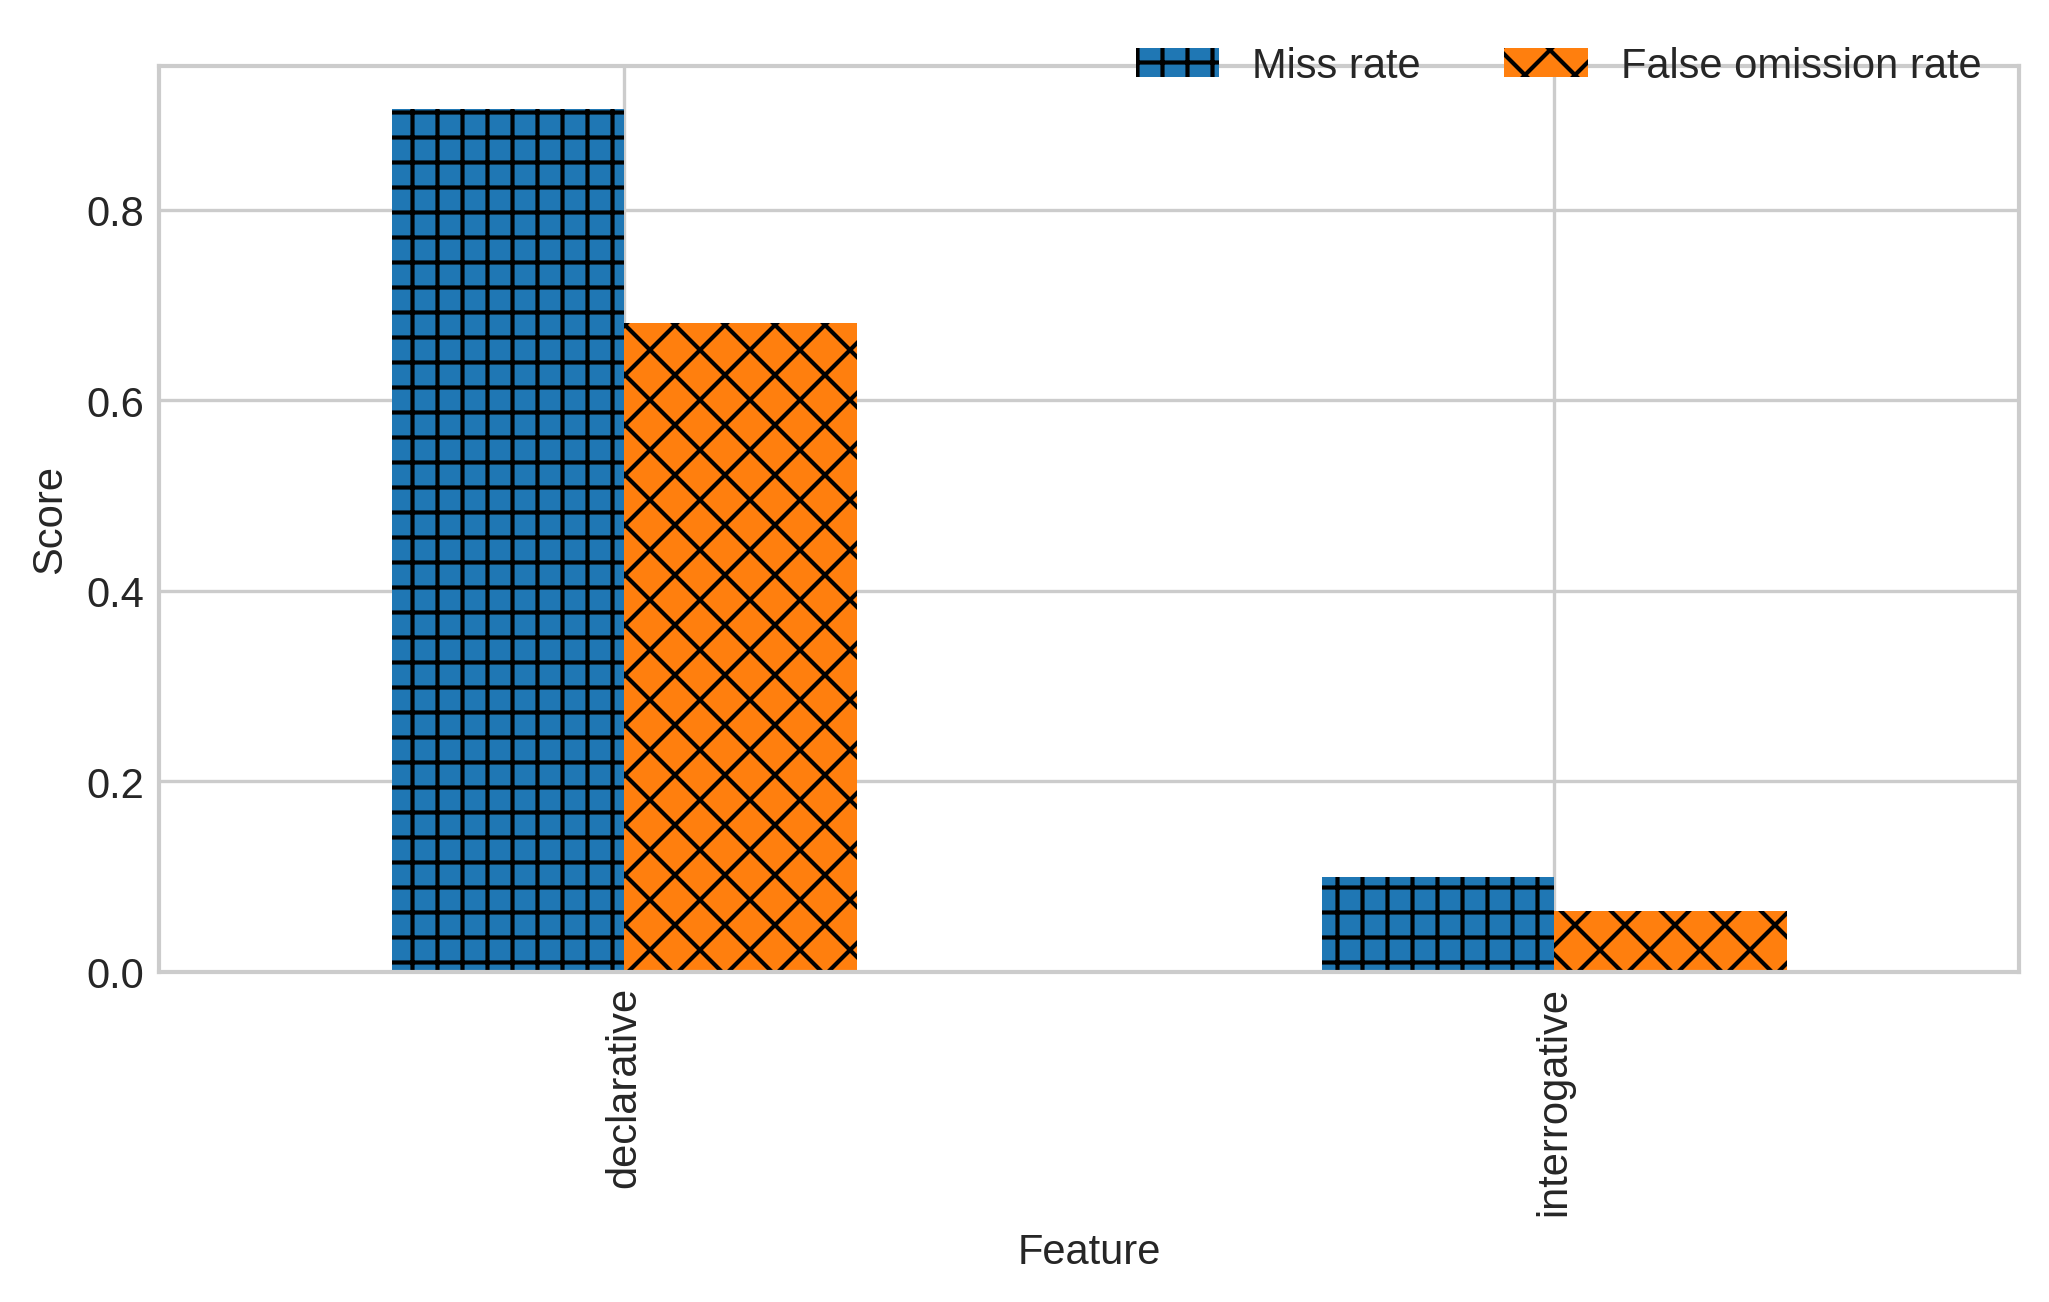

<Figure size 2400x1200 with 0 Axes>

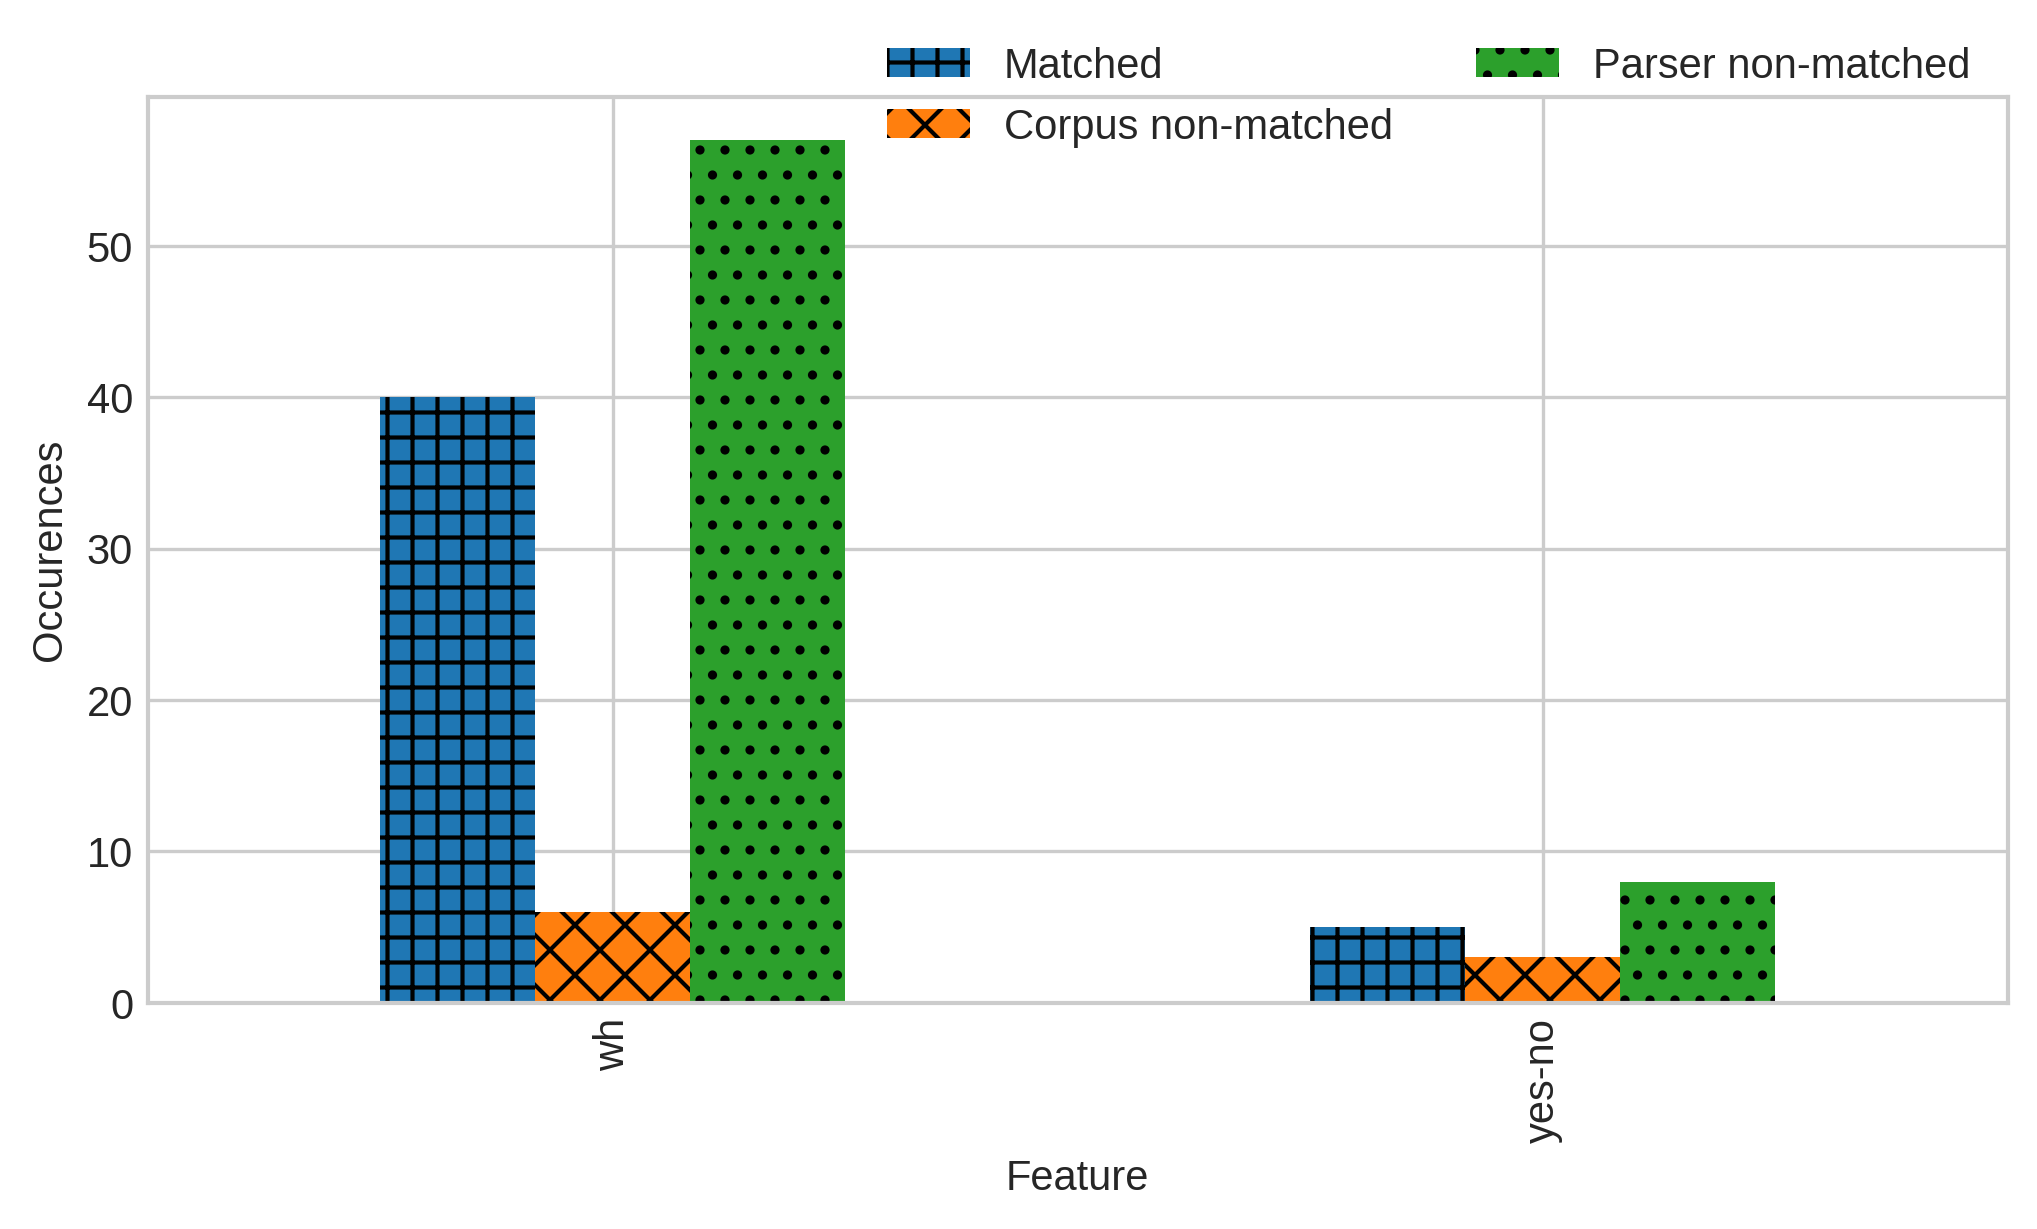

<Figure size 2400x1200 with 0 Axes>

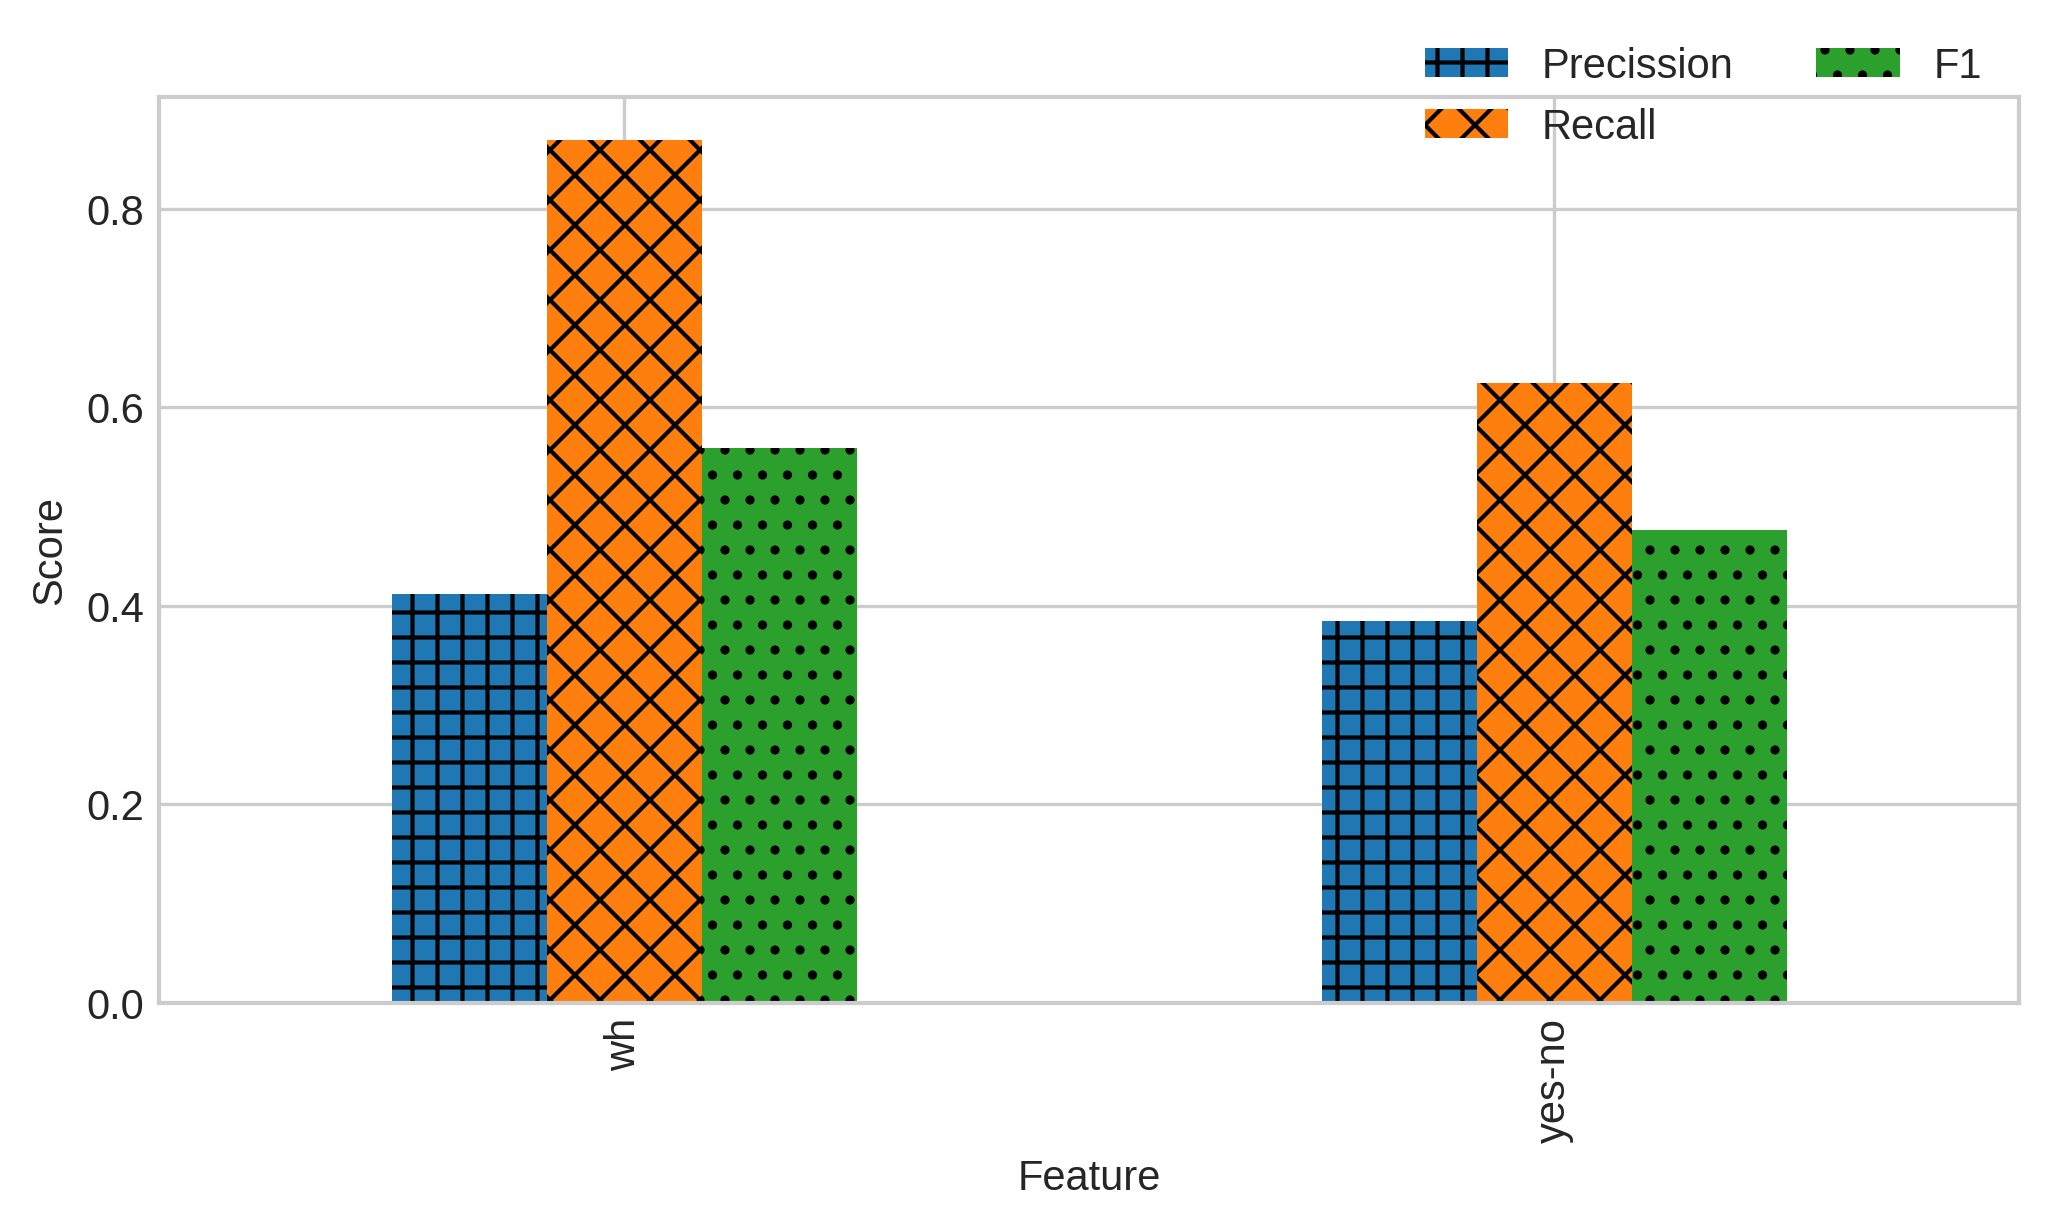

<Figure size 2400x1200 with 0 Axes>

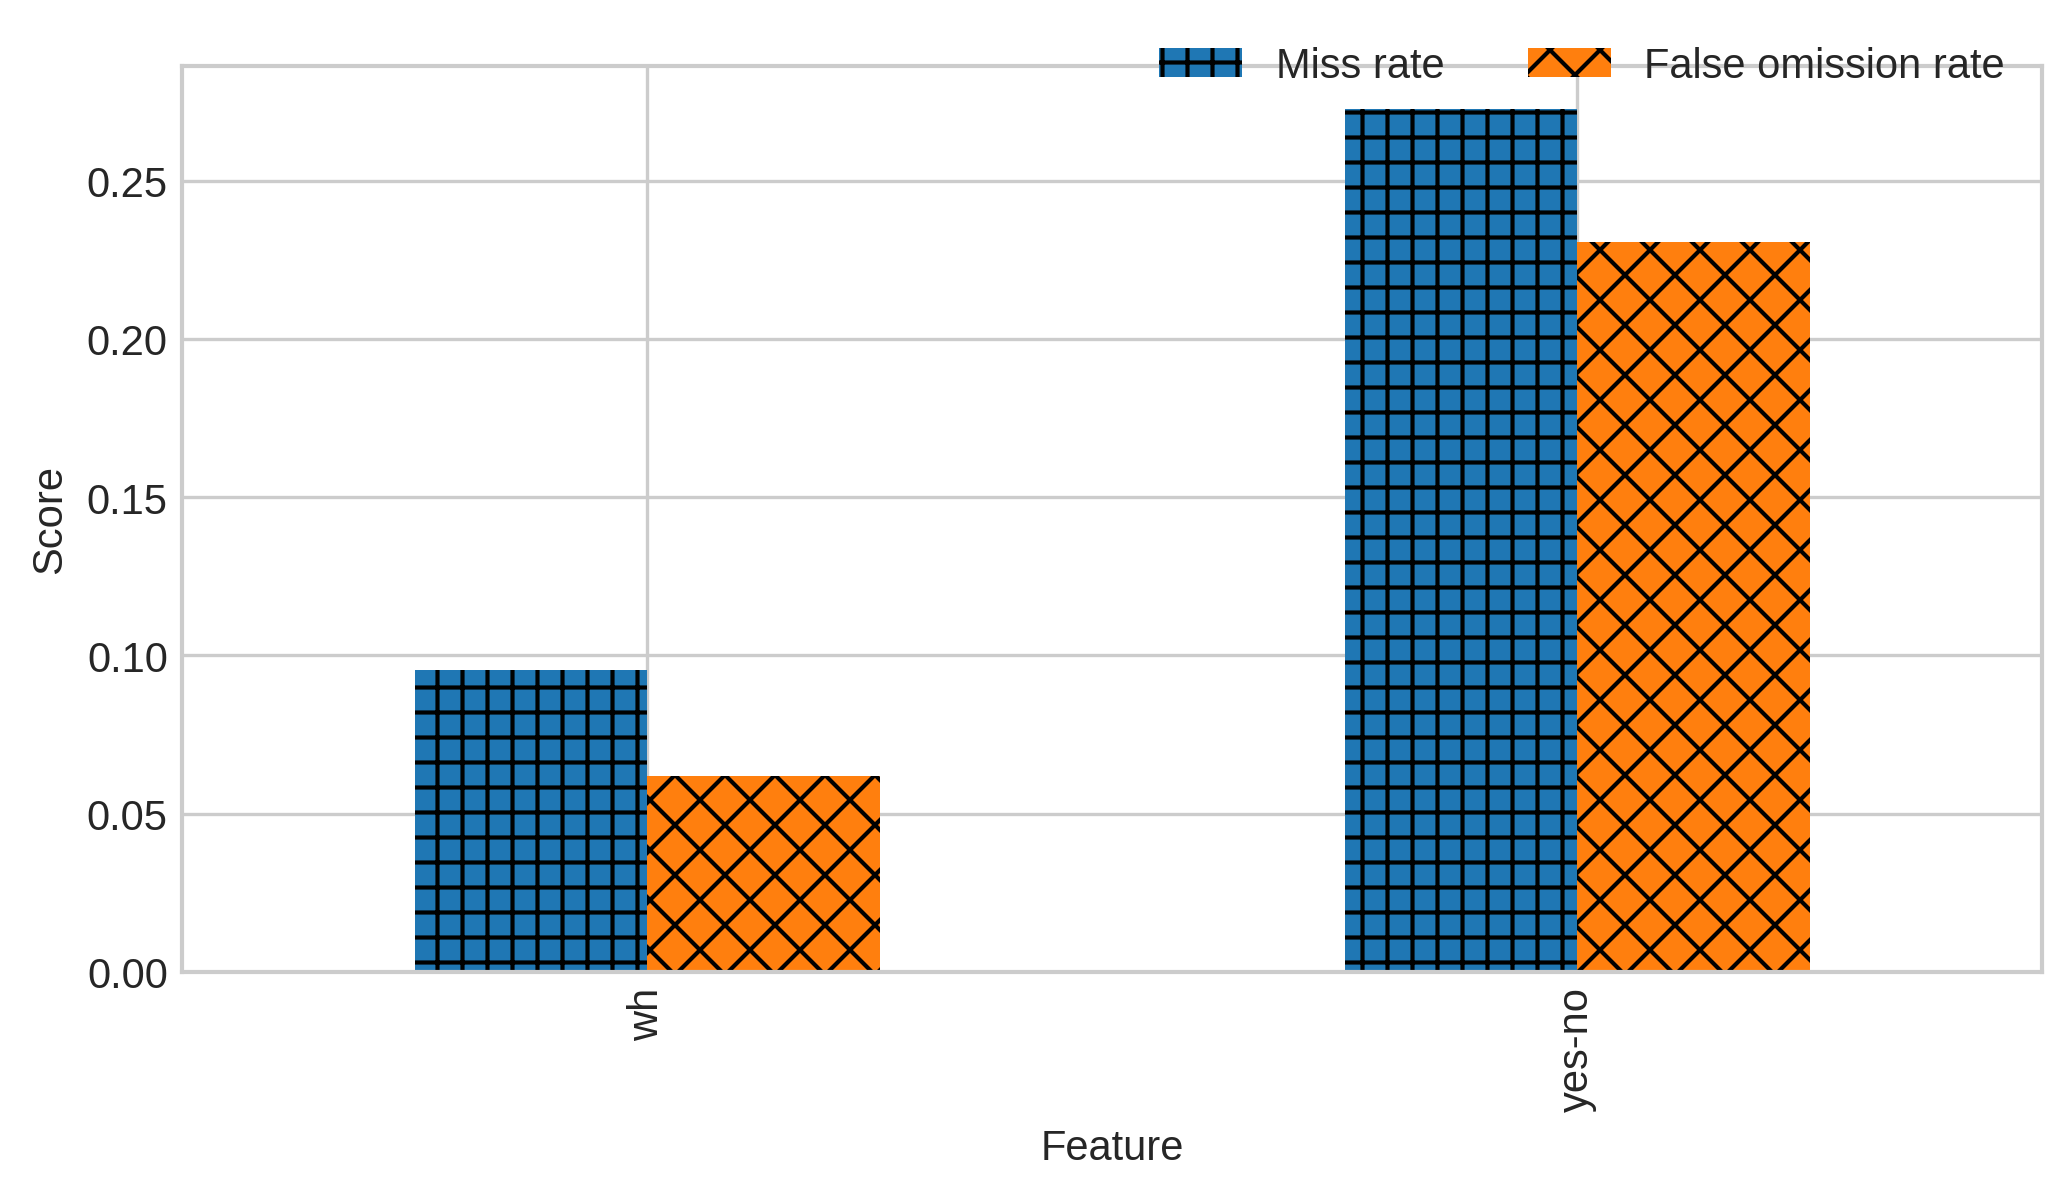

<Figure size 2400x1200 with 0 Axes>

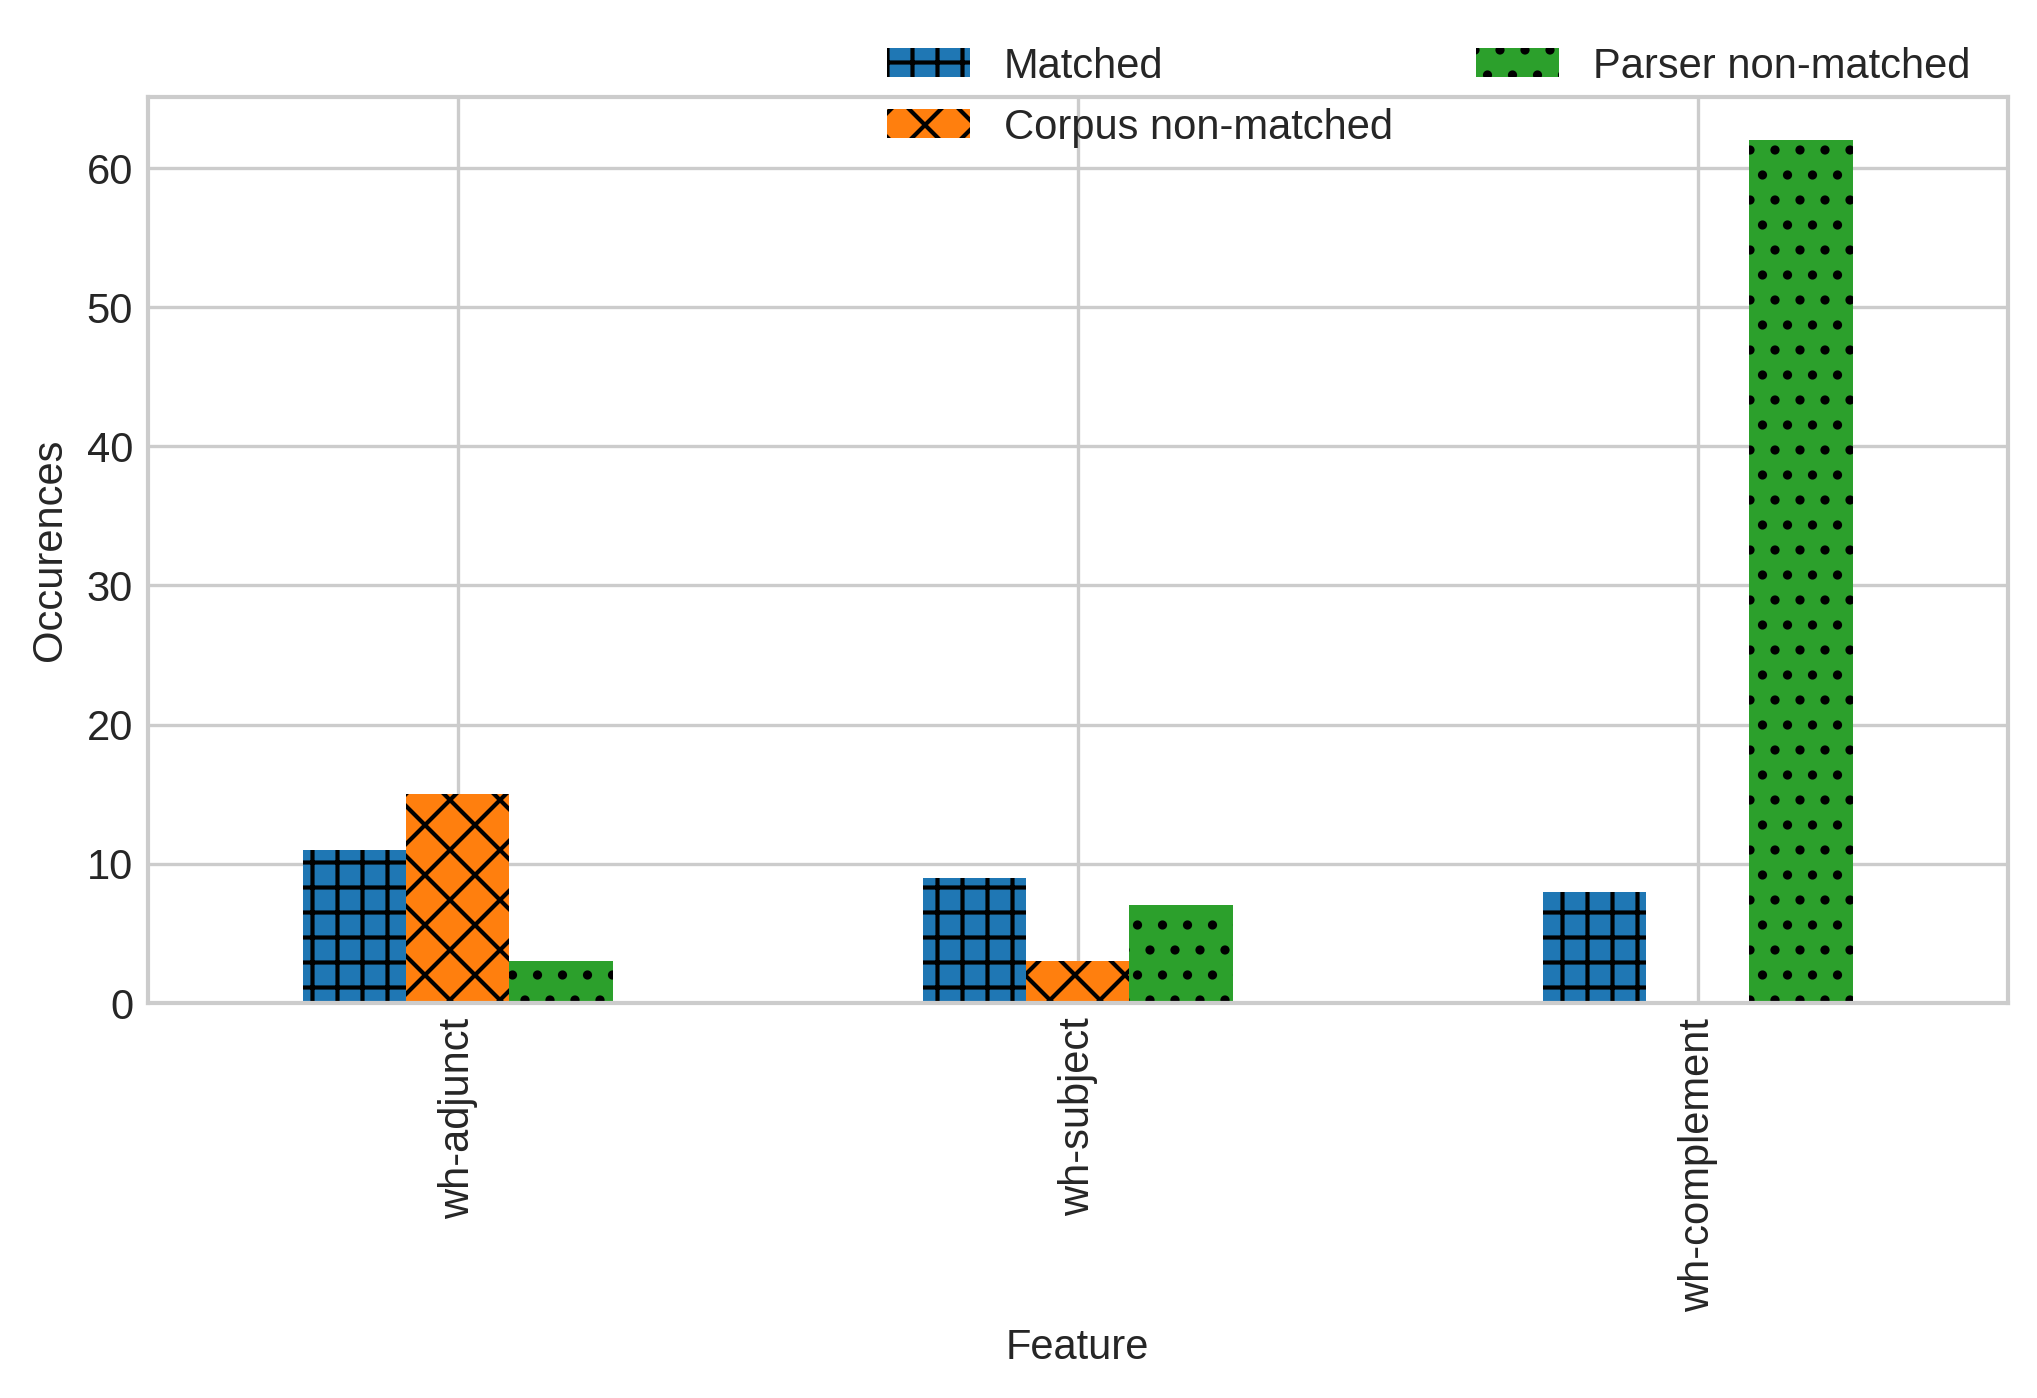

<Figure size 2400x1200 with 0 Axes>

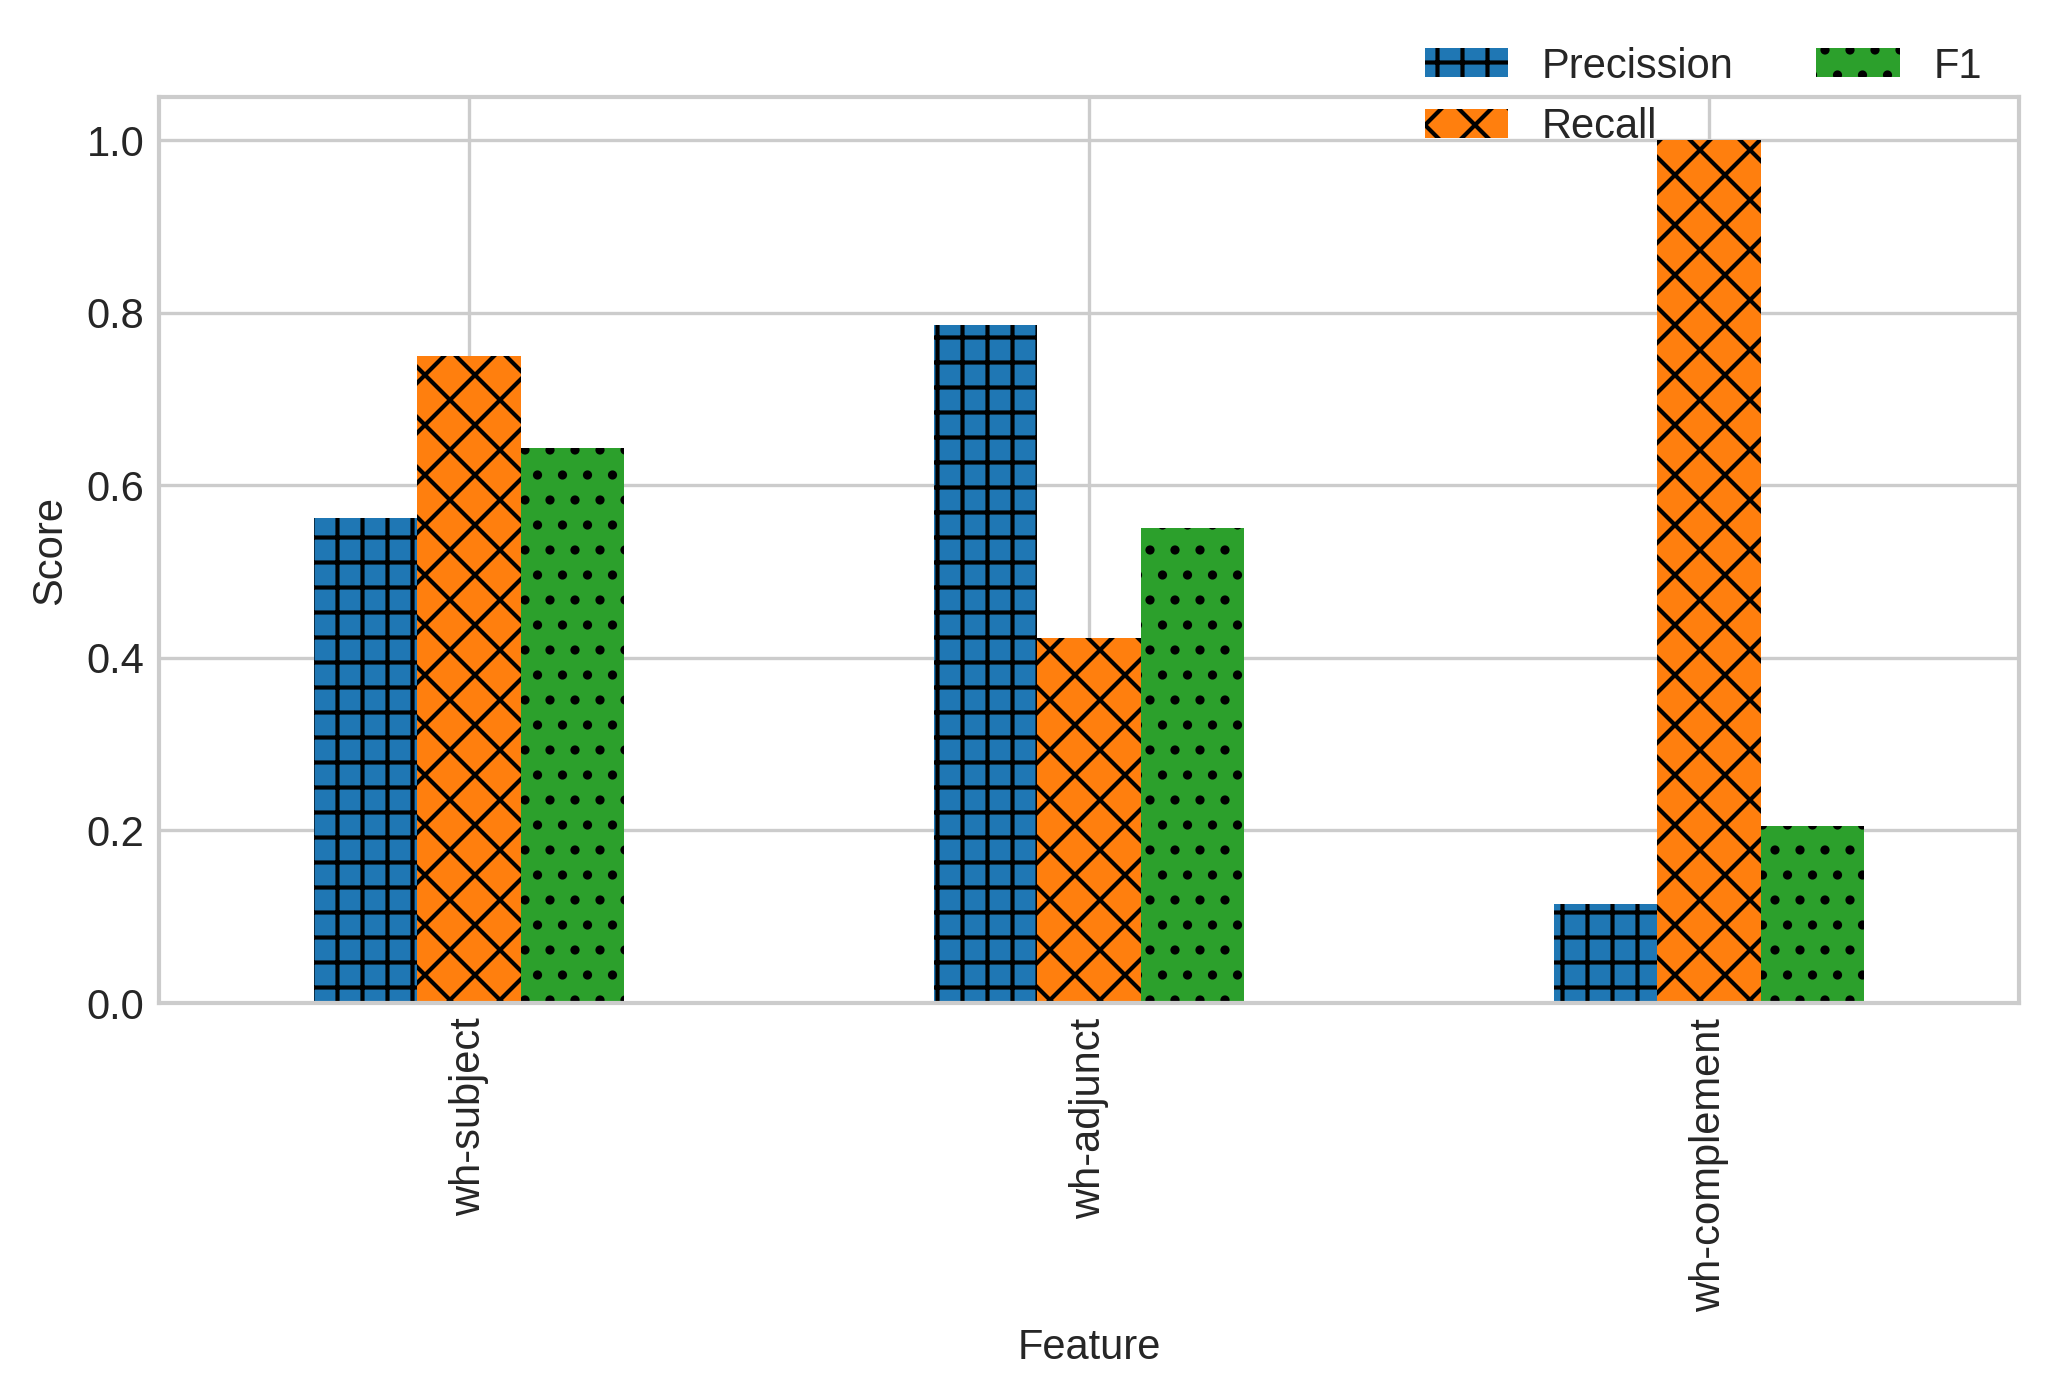

<Figure size 2400x1200 with 0 Axes>

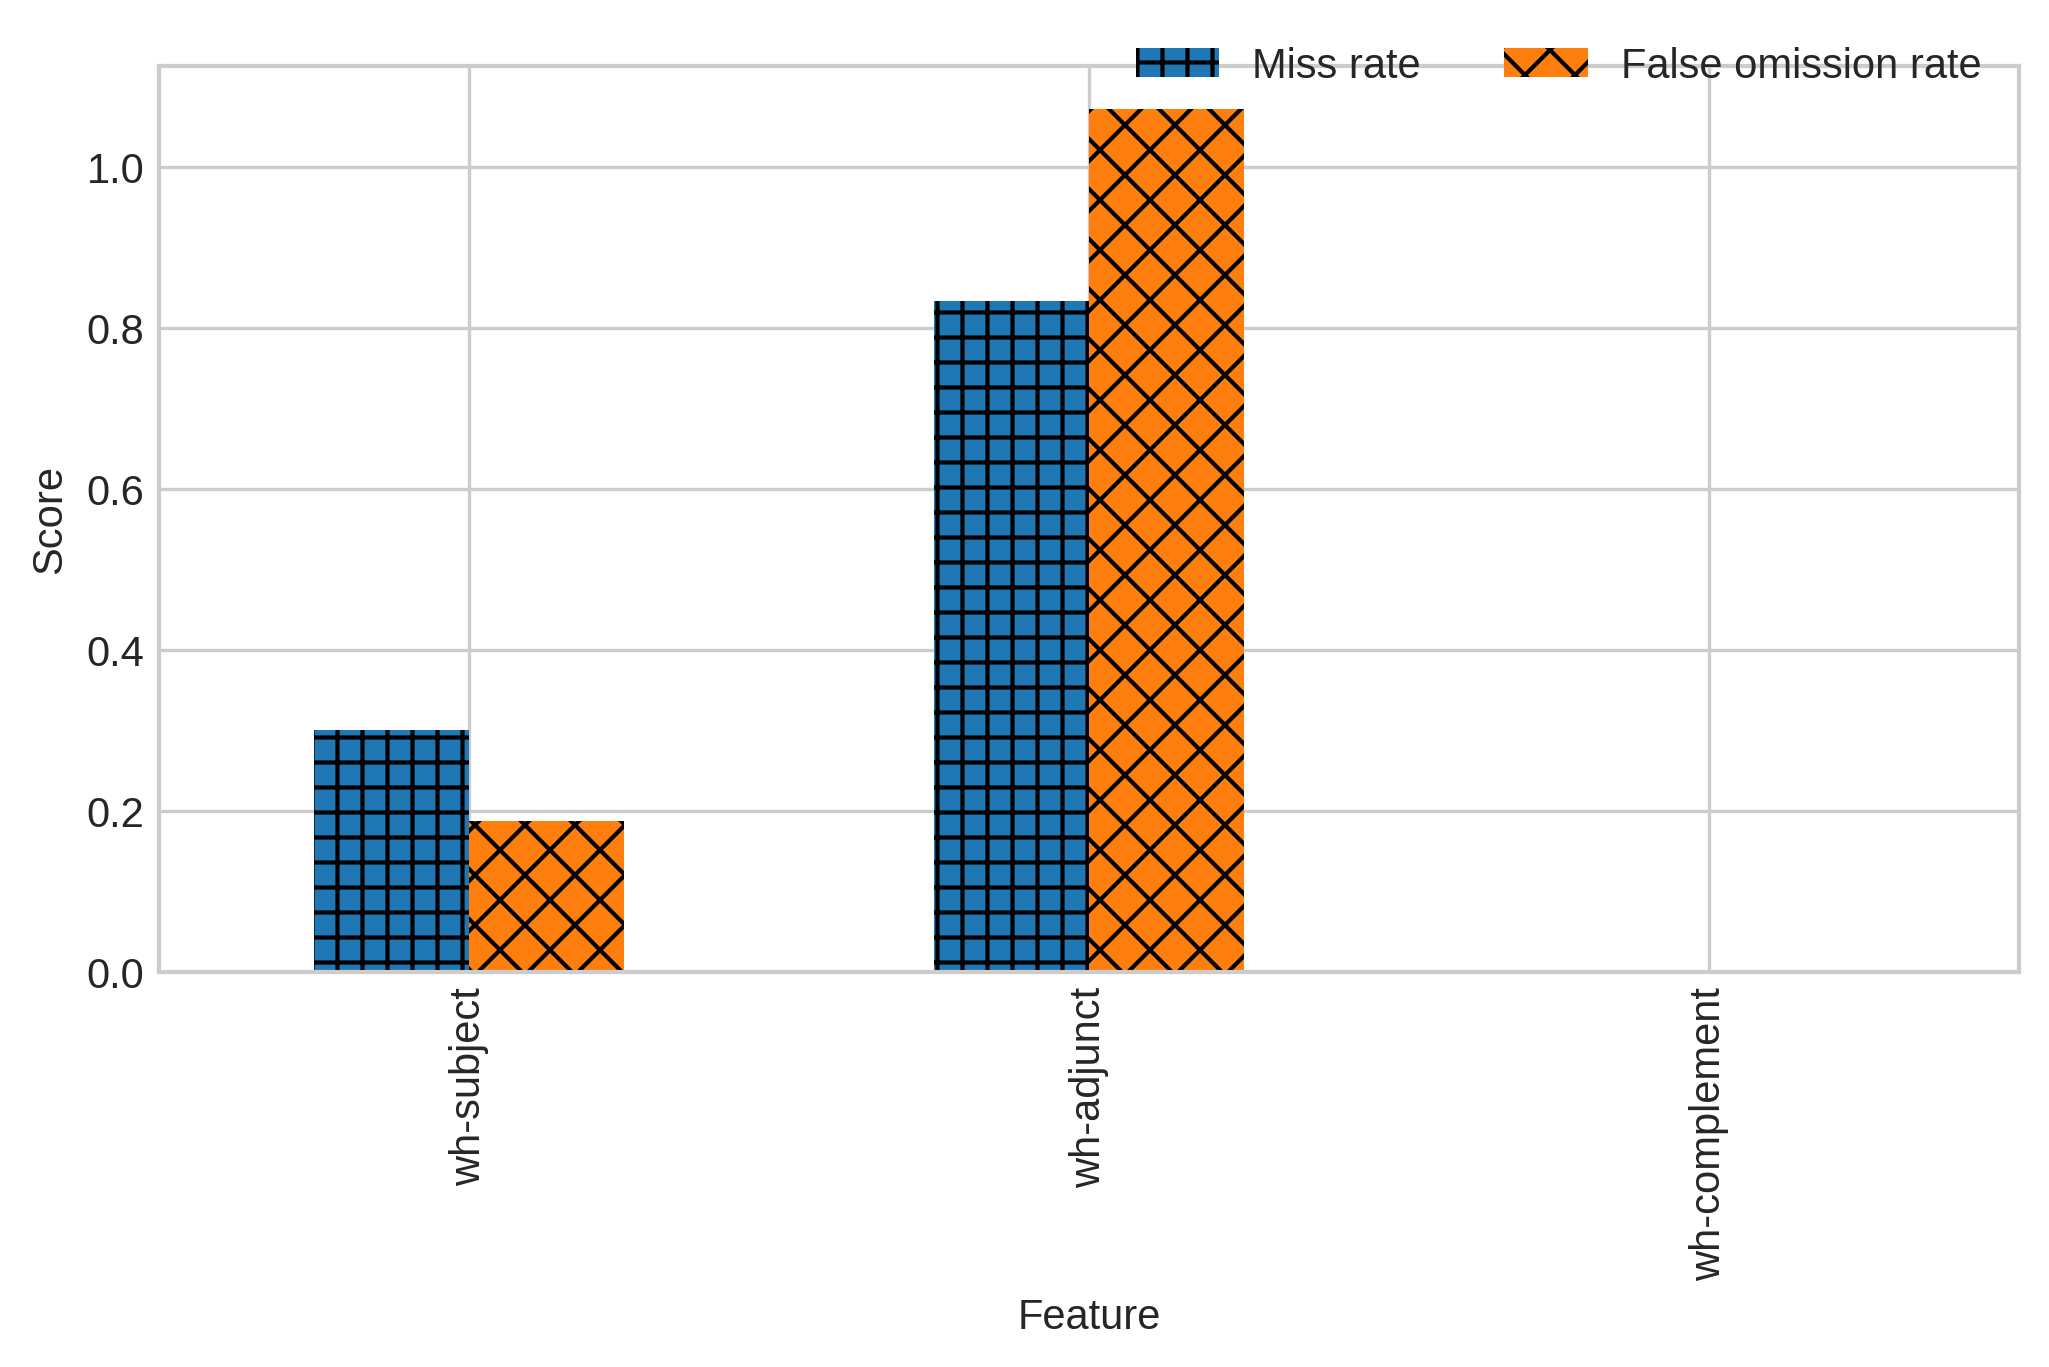

<Figure size 2400x1200 with 0 Axes>

In [14]:
make_stats2(aggregate, "MOOD-ocd", filters=MOOD)
make_stats2(aggregate, "INDICATIVE-ocd", filters=INDICATIVE)
make_stats2(aggregate, "INTERROGATIVE-ocd", filters=INTERROGATIVE)
make_stats2(aggregate, "WH-ocd", filters=WH)

## DEICTICITY

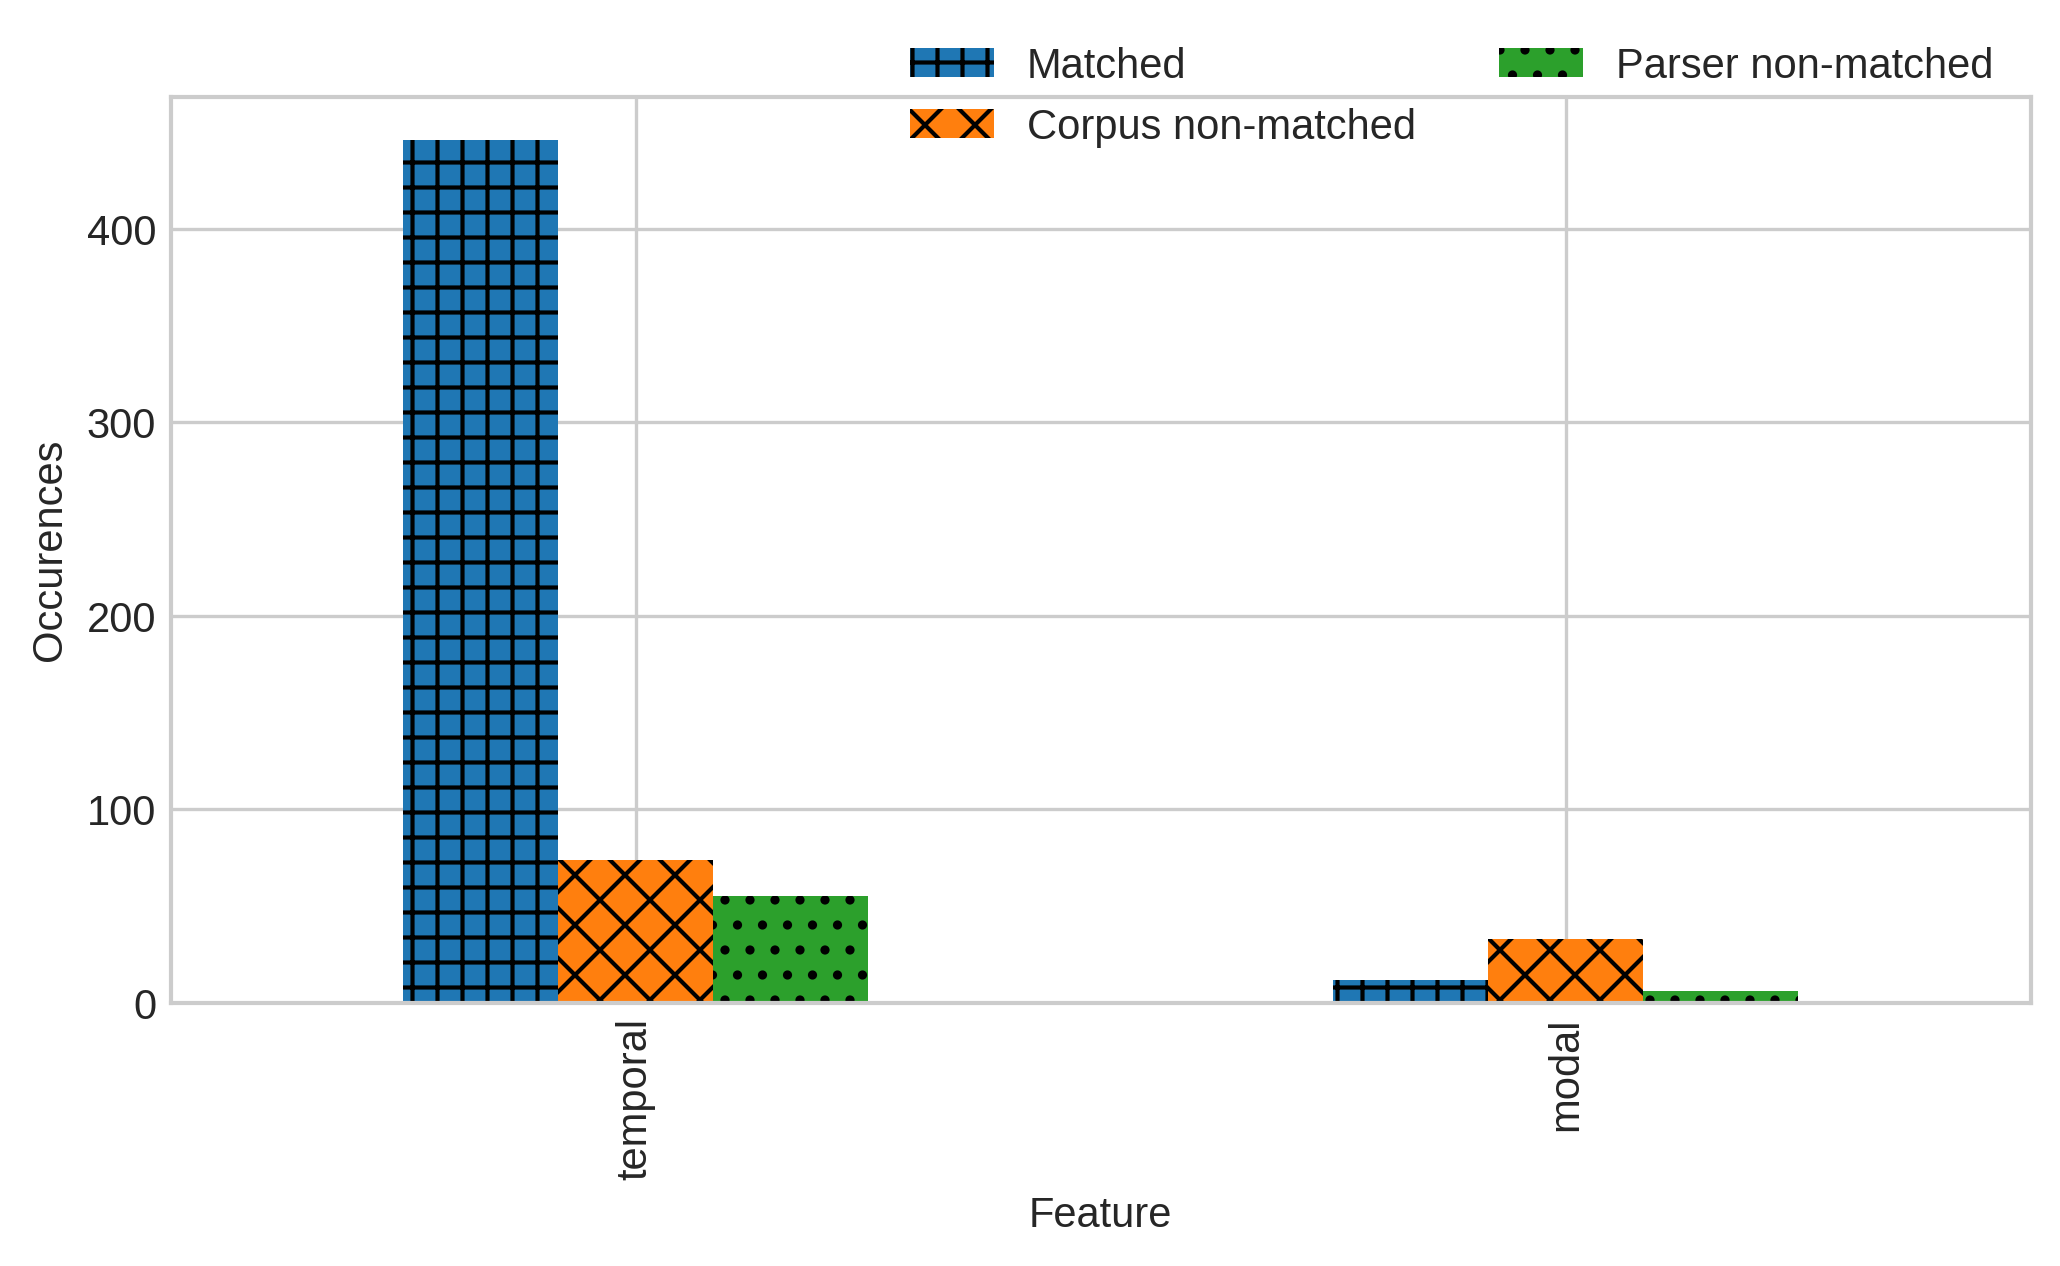

<Figure size 2400x1200 with 0 Axes>

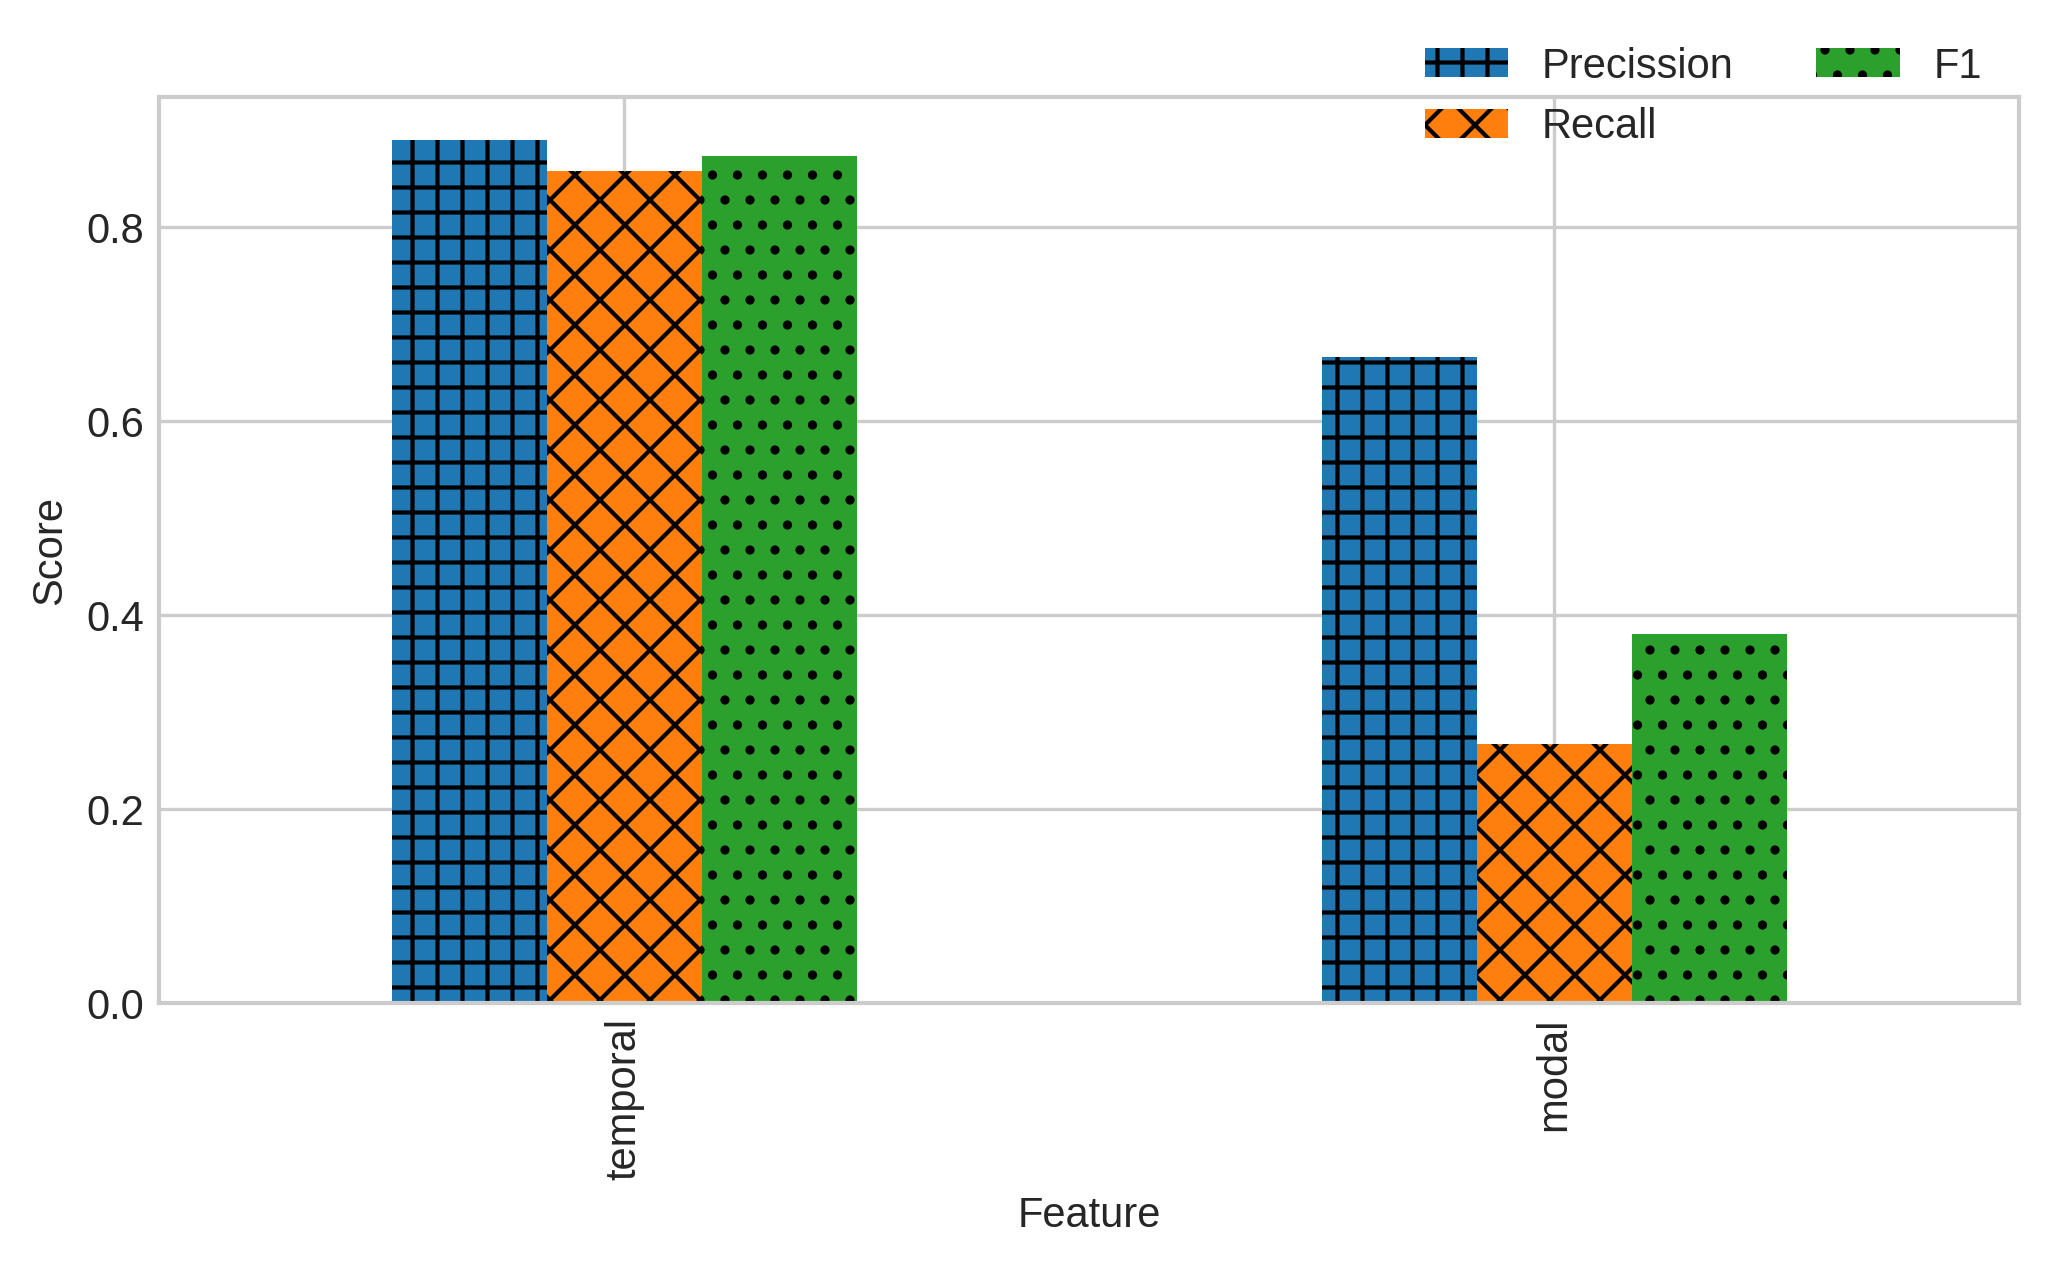

<Figure size 2400x1200 with 0 Axes>

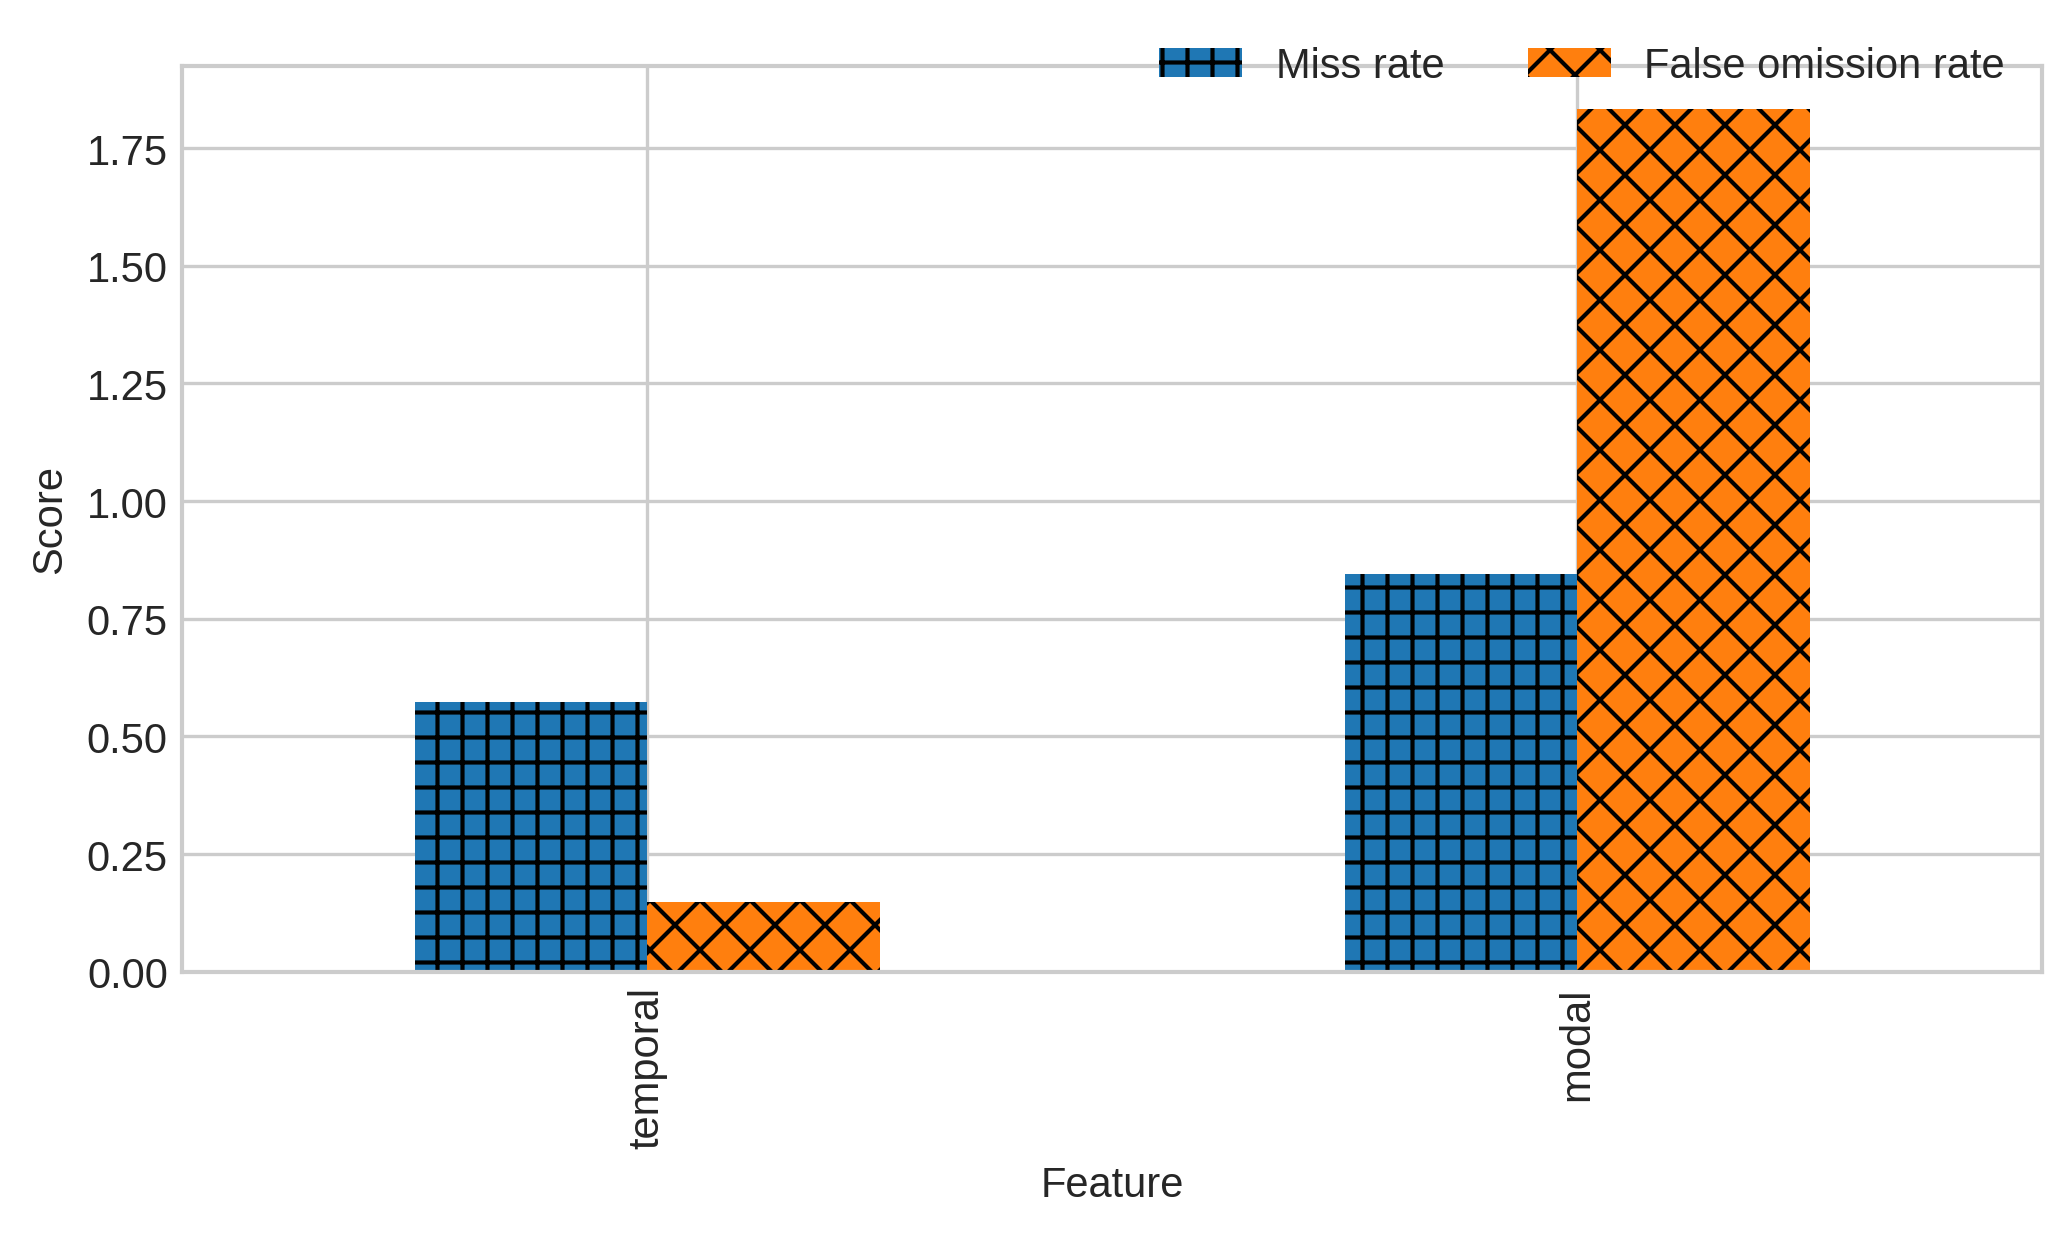

<Figure size 2400x1200 with 0 Axes>

In [15]:
make_stats2(aggregate, "DEICTICITY-ocd", filters=DEICTICITY)
# make_stats2(aggregate, "TEMPORAL_DEICTICITY_TIME-ocd", filters=TEMPORAL_DEICTICITY_TIME)
# make_stats2(aggregate, "TEMPORAL_DEICTICITY_PERFECTIVITY-ocd", filters=TEMPORAL_DEICTICITY_PERFECTIVITY)
# make_stats2(aggregate, "TEMPORAL_DEICTICITY_PROGRESSIVITY-ocd", filters=TEMPORAL_DEICTICITY_PROGRESSIVITY)
# make_stats2(aggregate, "MODAL_DEICTICITY-ocd", filters=MODAL_DEICTICITY)

## MOOD_ASSESMENT

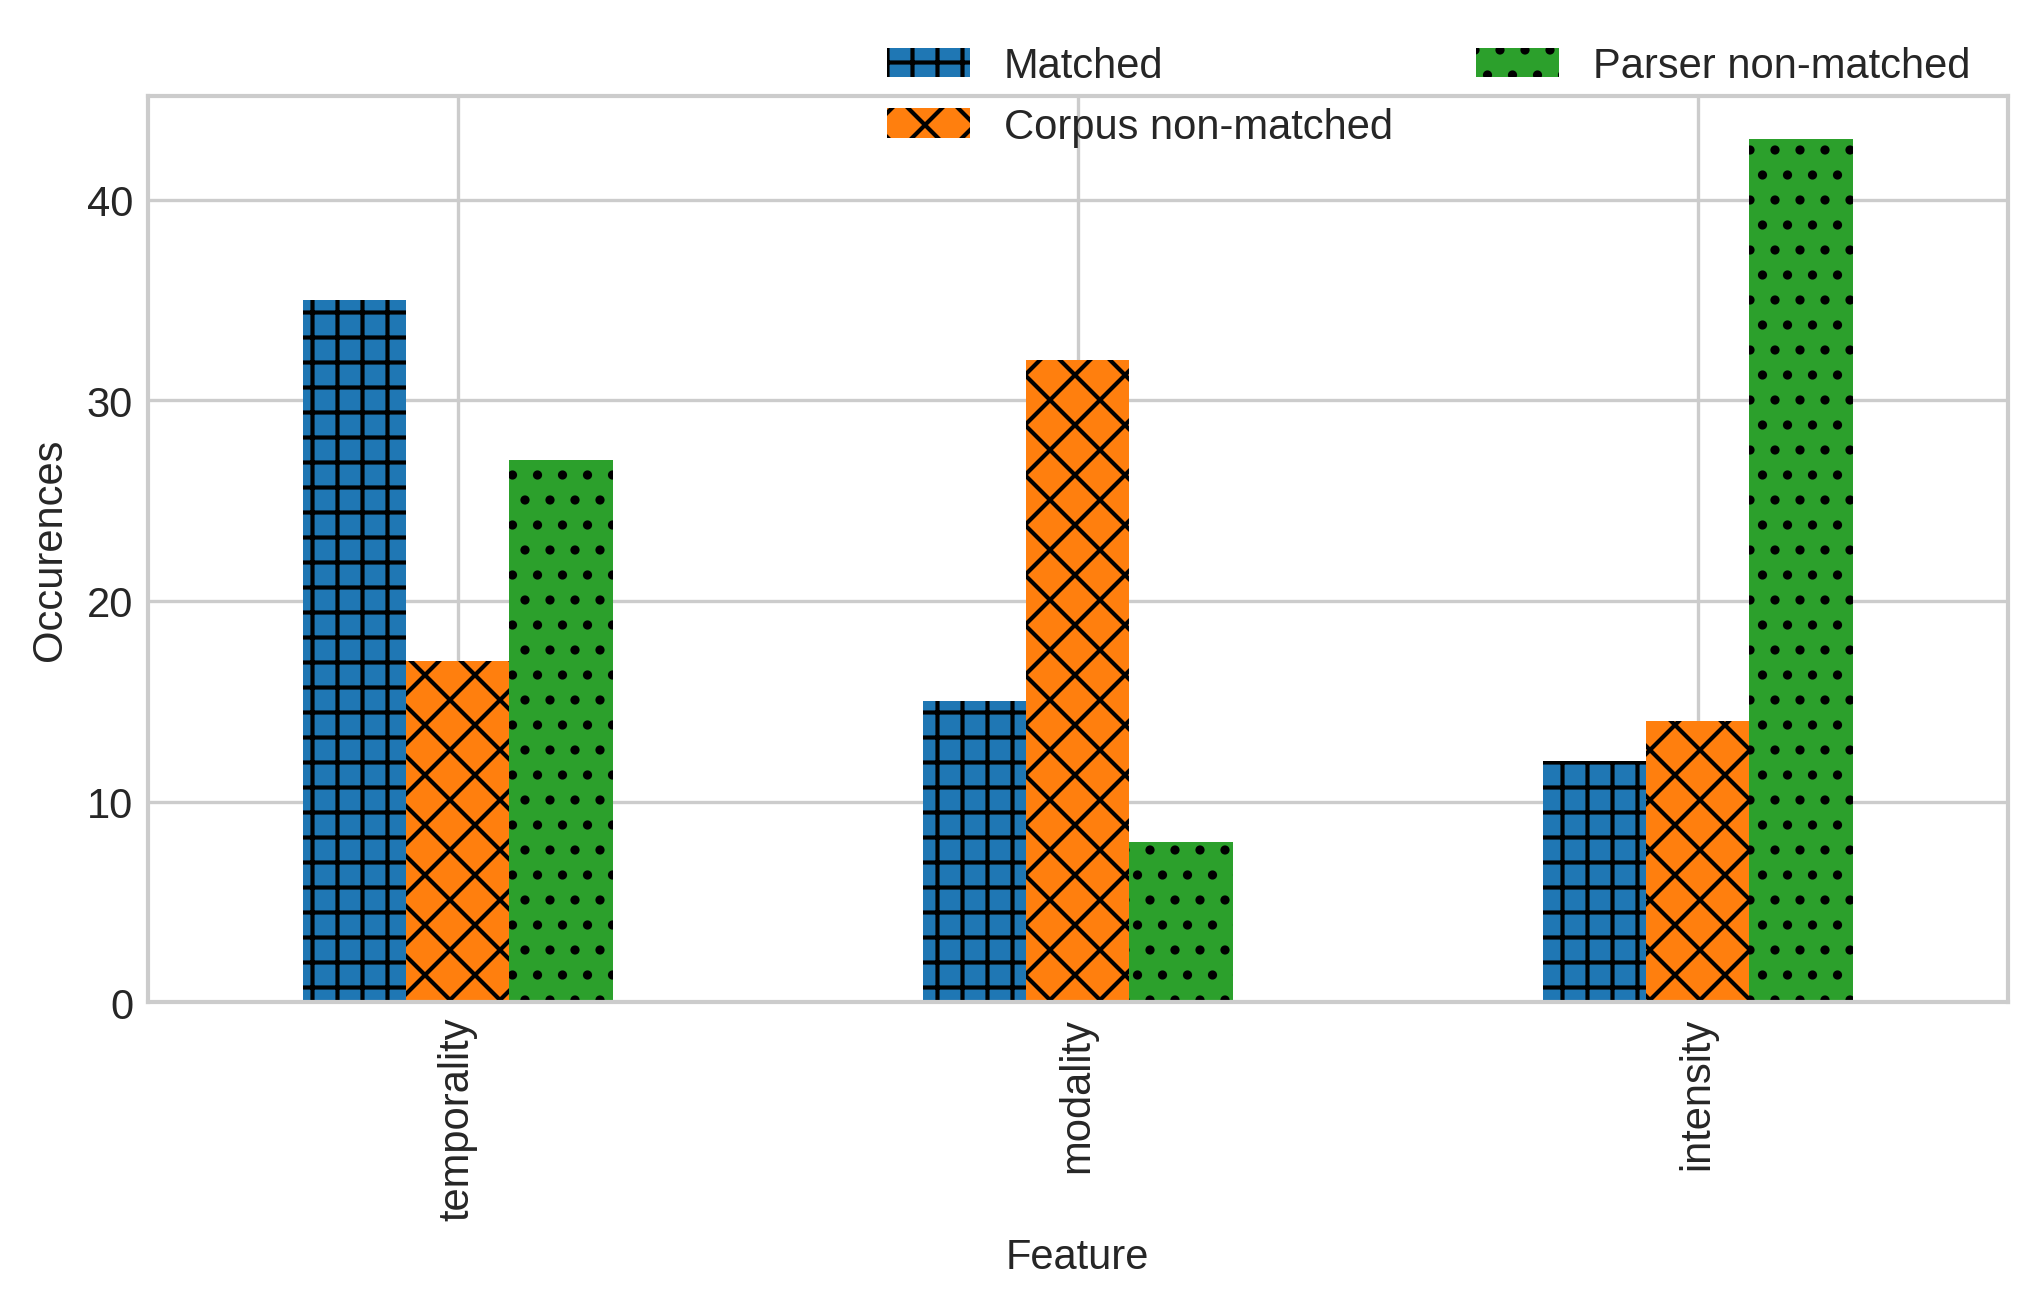

<Figure size 2400x1200 with 0 Axes>

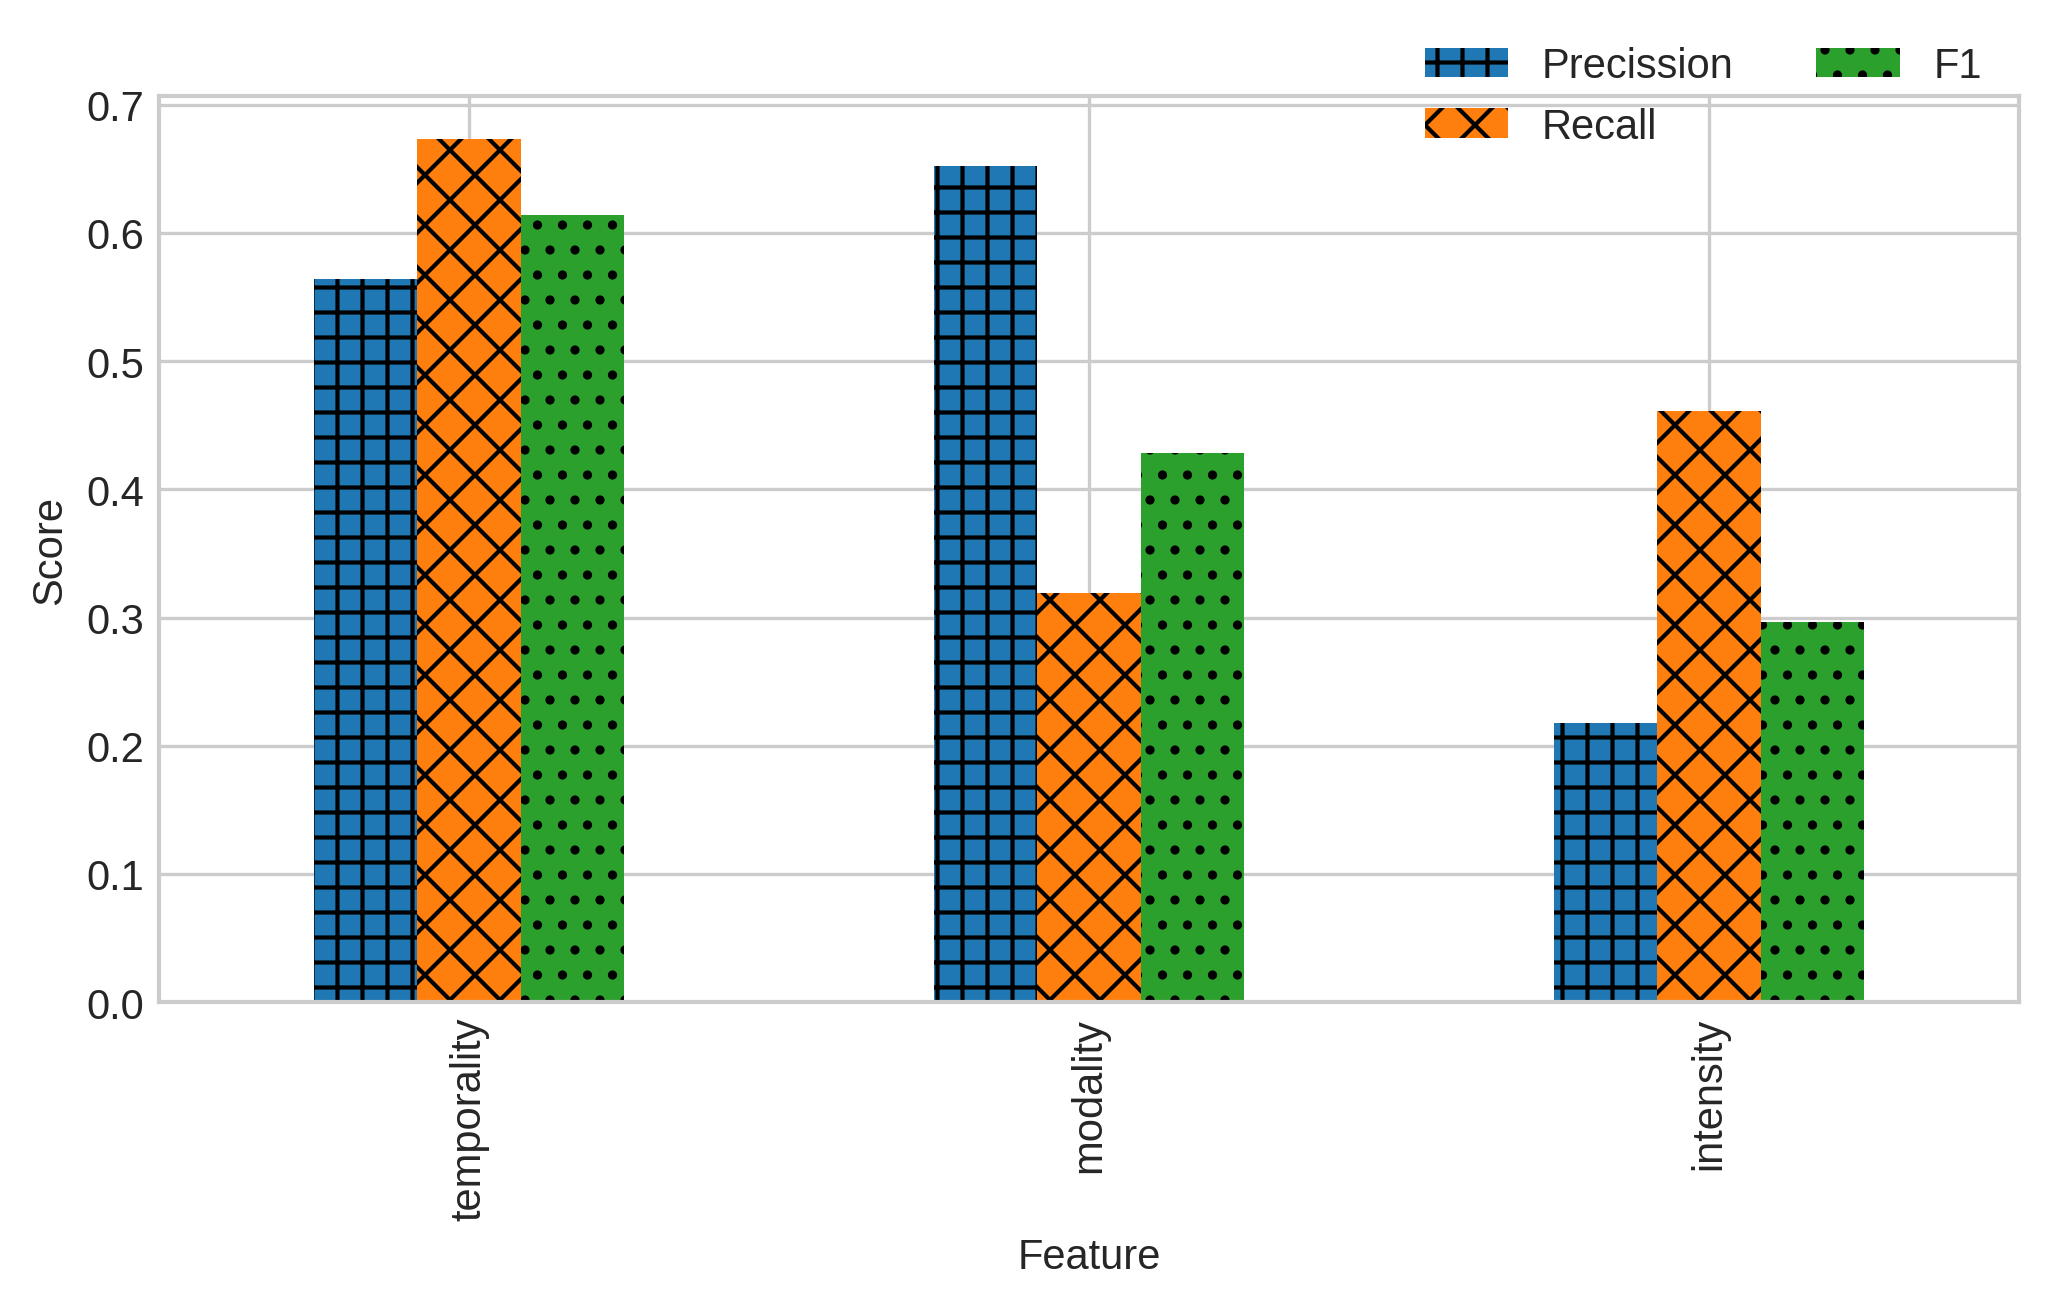

<Figure size 2400x1200 with 0 Axes>

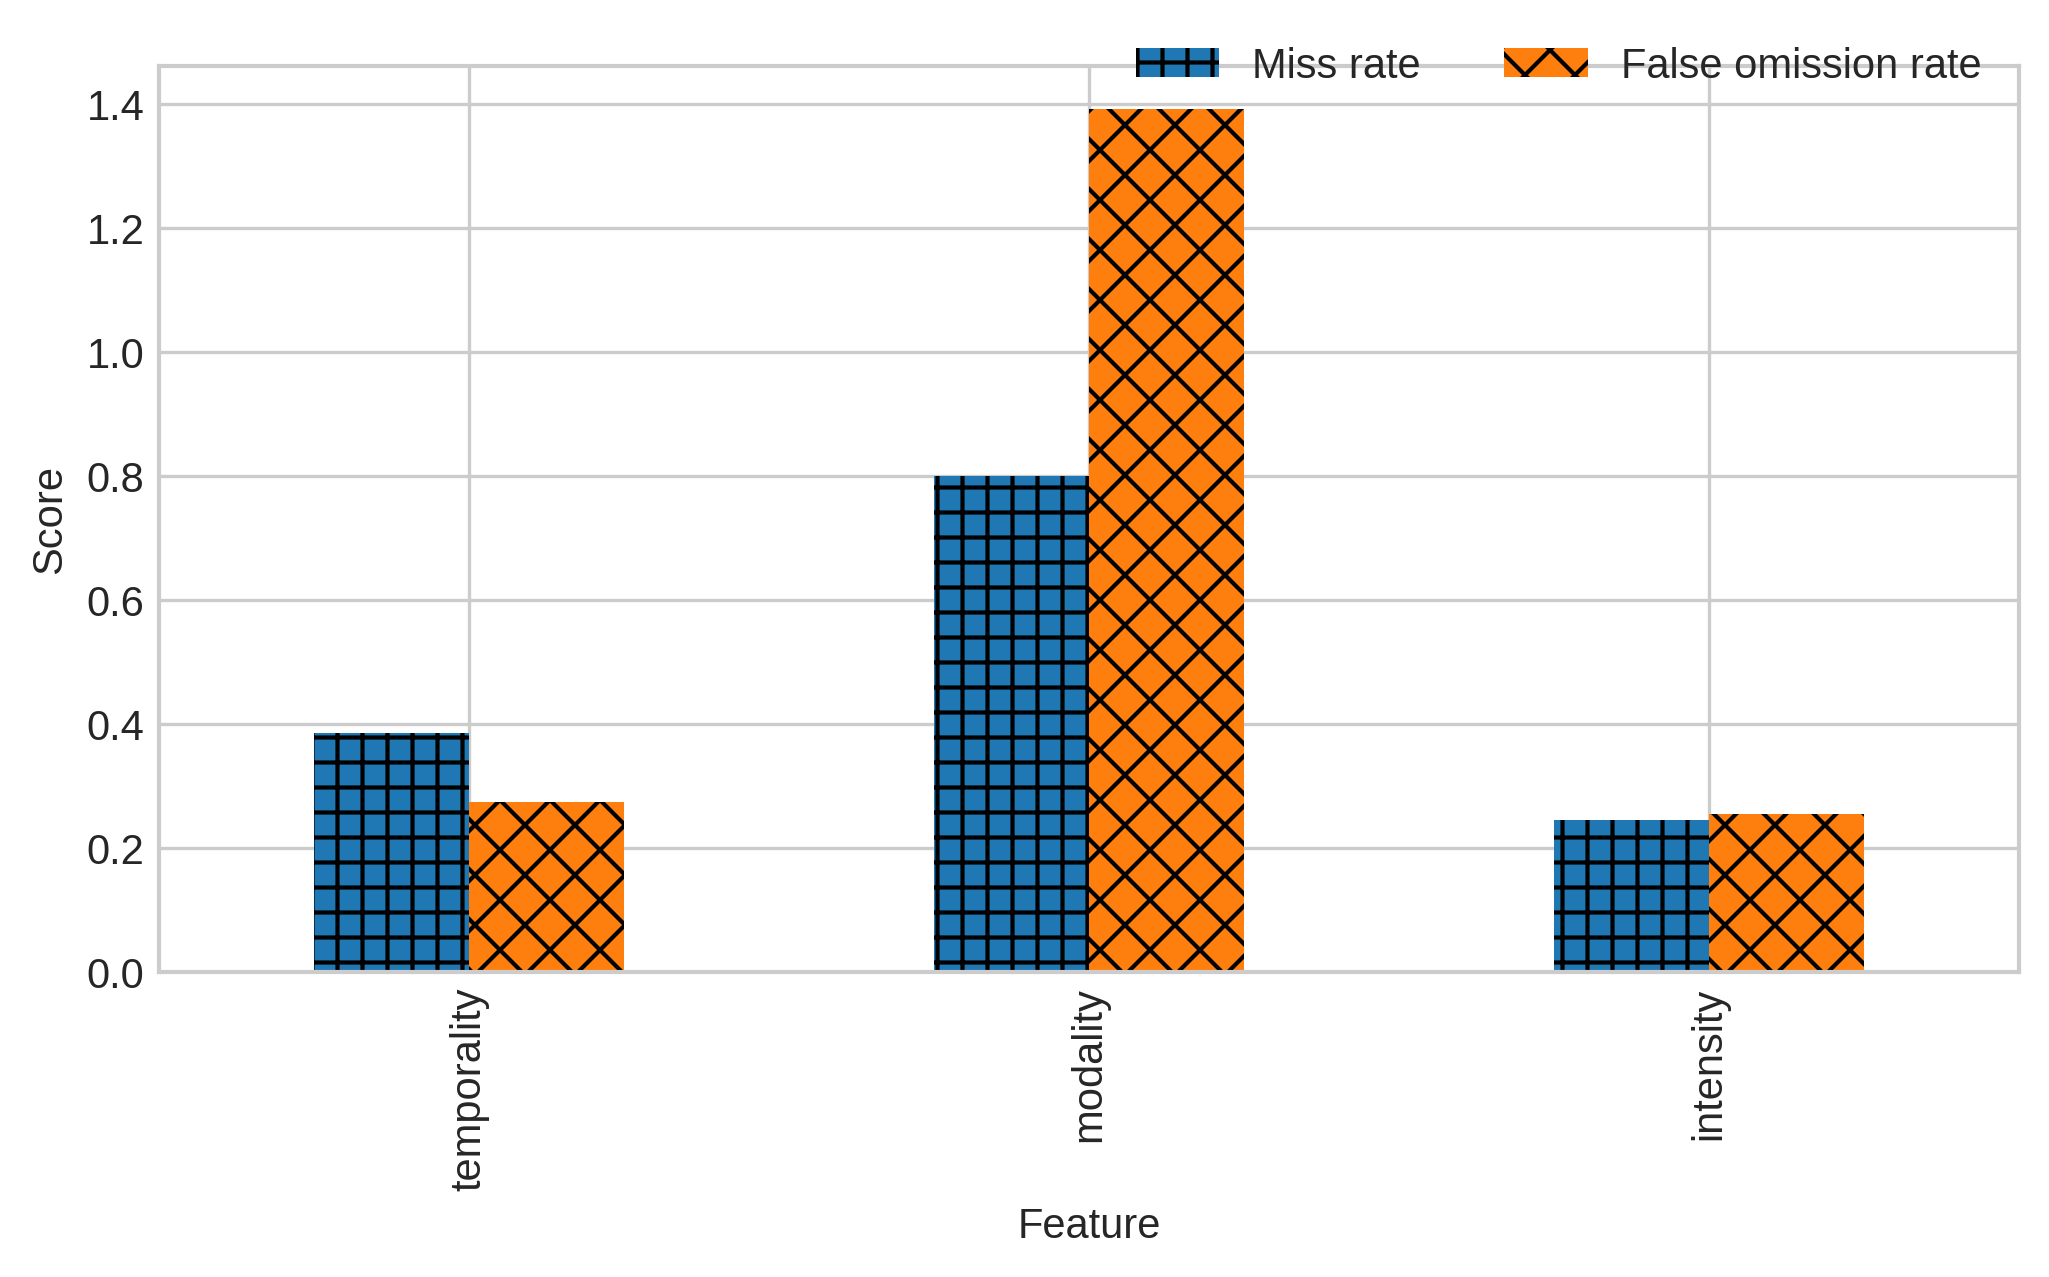

<Figure size 2400x1200 with 0 Axes>

In [16]:
make_stats2(aggregate, "MOOD_ASSESMENT-ocd", filters=MOOD_ASSESMENT)

## AGENCY

In [17]:
# make_stats2(aggregate, "AGENCY-ocd", filters=AGENCY)

# Transitivity system feature evaluation - [OE+BTC] corpus

In [18]:
################
PROCESS_TYPE = ["action","mental","relational","influential","event-relating","environmental"]
ACTION = [ "one-role-action","three-role-action","two-role-action"]
RELATIONAL  = ["attributive","posessive","locational","directional","matching"]
MENTAL = ["emotive","three-role-perception","two-role-perception","three-role-cognition",
          "two-role-cognition","desiderative"]
INFLUENTIAL = ["preventive","starting","continuing","ceasing","succeeding","failing",
               "causative","permissive","tentative","enabling","preventive","delaying"]

PARTICIPANT_ROLE = ["emoter","phenomenon","carrier","possessive","cognizant","agent",
                "possessed","attribute","destination","affected","location","source",
                "created-phenomenon","path","range","affected-carrier","affected-possessed",
                "affected-cognizant","manner","perceiver","agent-carrier","created","matchee",
                "agent-perceiver","agent-cognizant","affected-destination","affected-emoter",
                "affected-perceiver","affected-path","affected-source"]

PARTICIPANT_ROLE_MOST_USED = ["emoter","phenomenon","carrier","possessive","cognizant","agent",
                "possessed","attribute","destination","affected","location","source",]

################

# ---------
matches, manual_nm, parse_nm = read_batch( OE1_trans_file_list + BTC_trans_file_list )
# ---------
aggregate = aggregate_data_by_feature(matches, manual_nm, parse_nm)

## PROCESS_TYPE

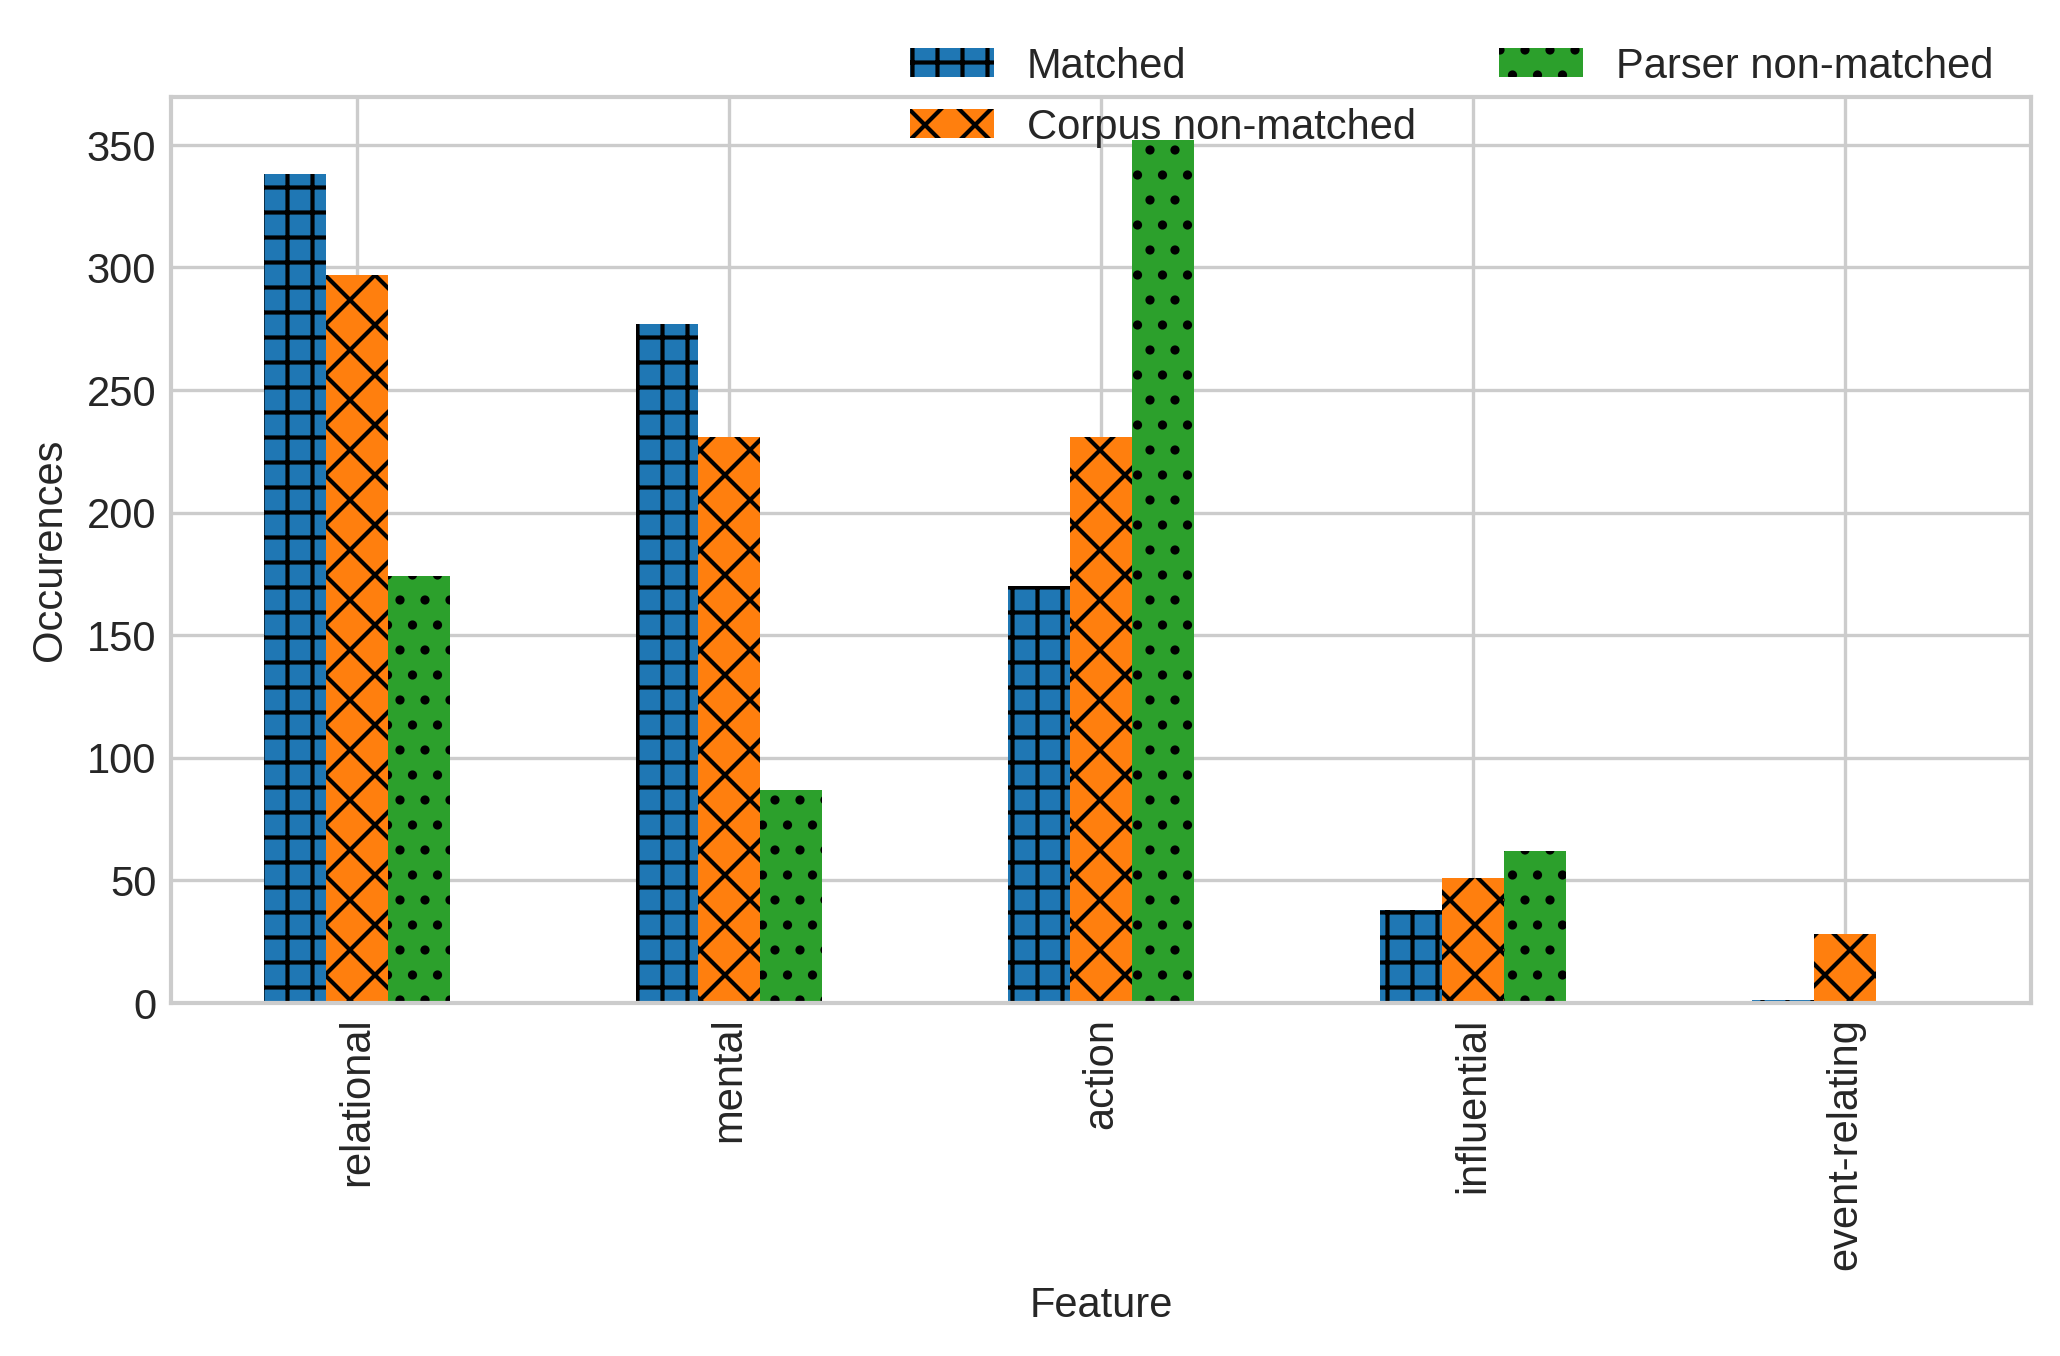

<Figure size 2400x1200 with 0 Axes>

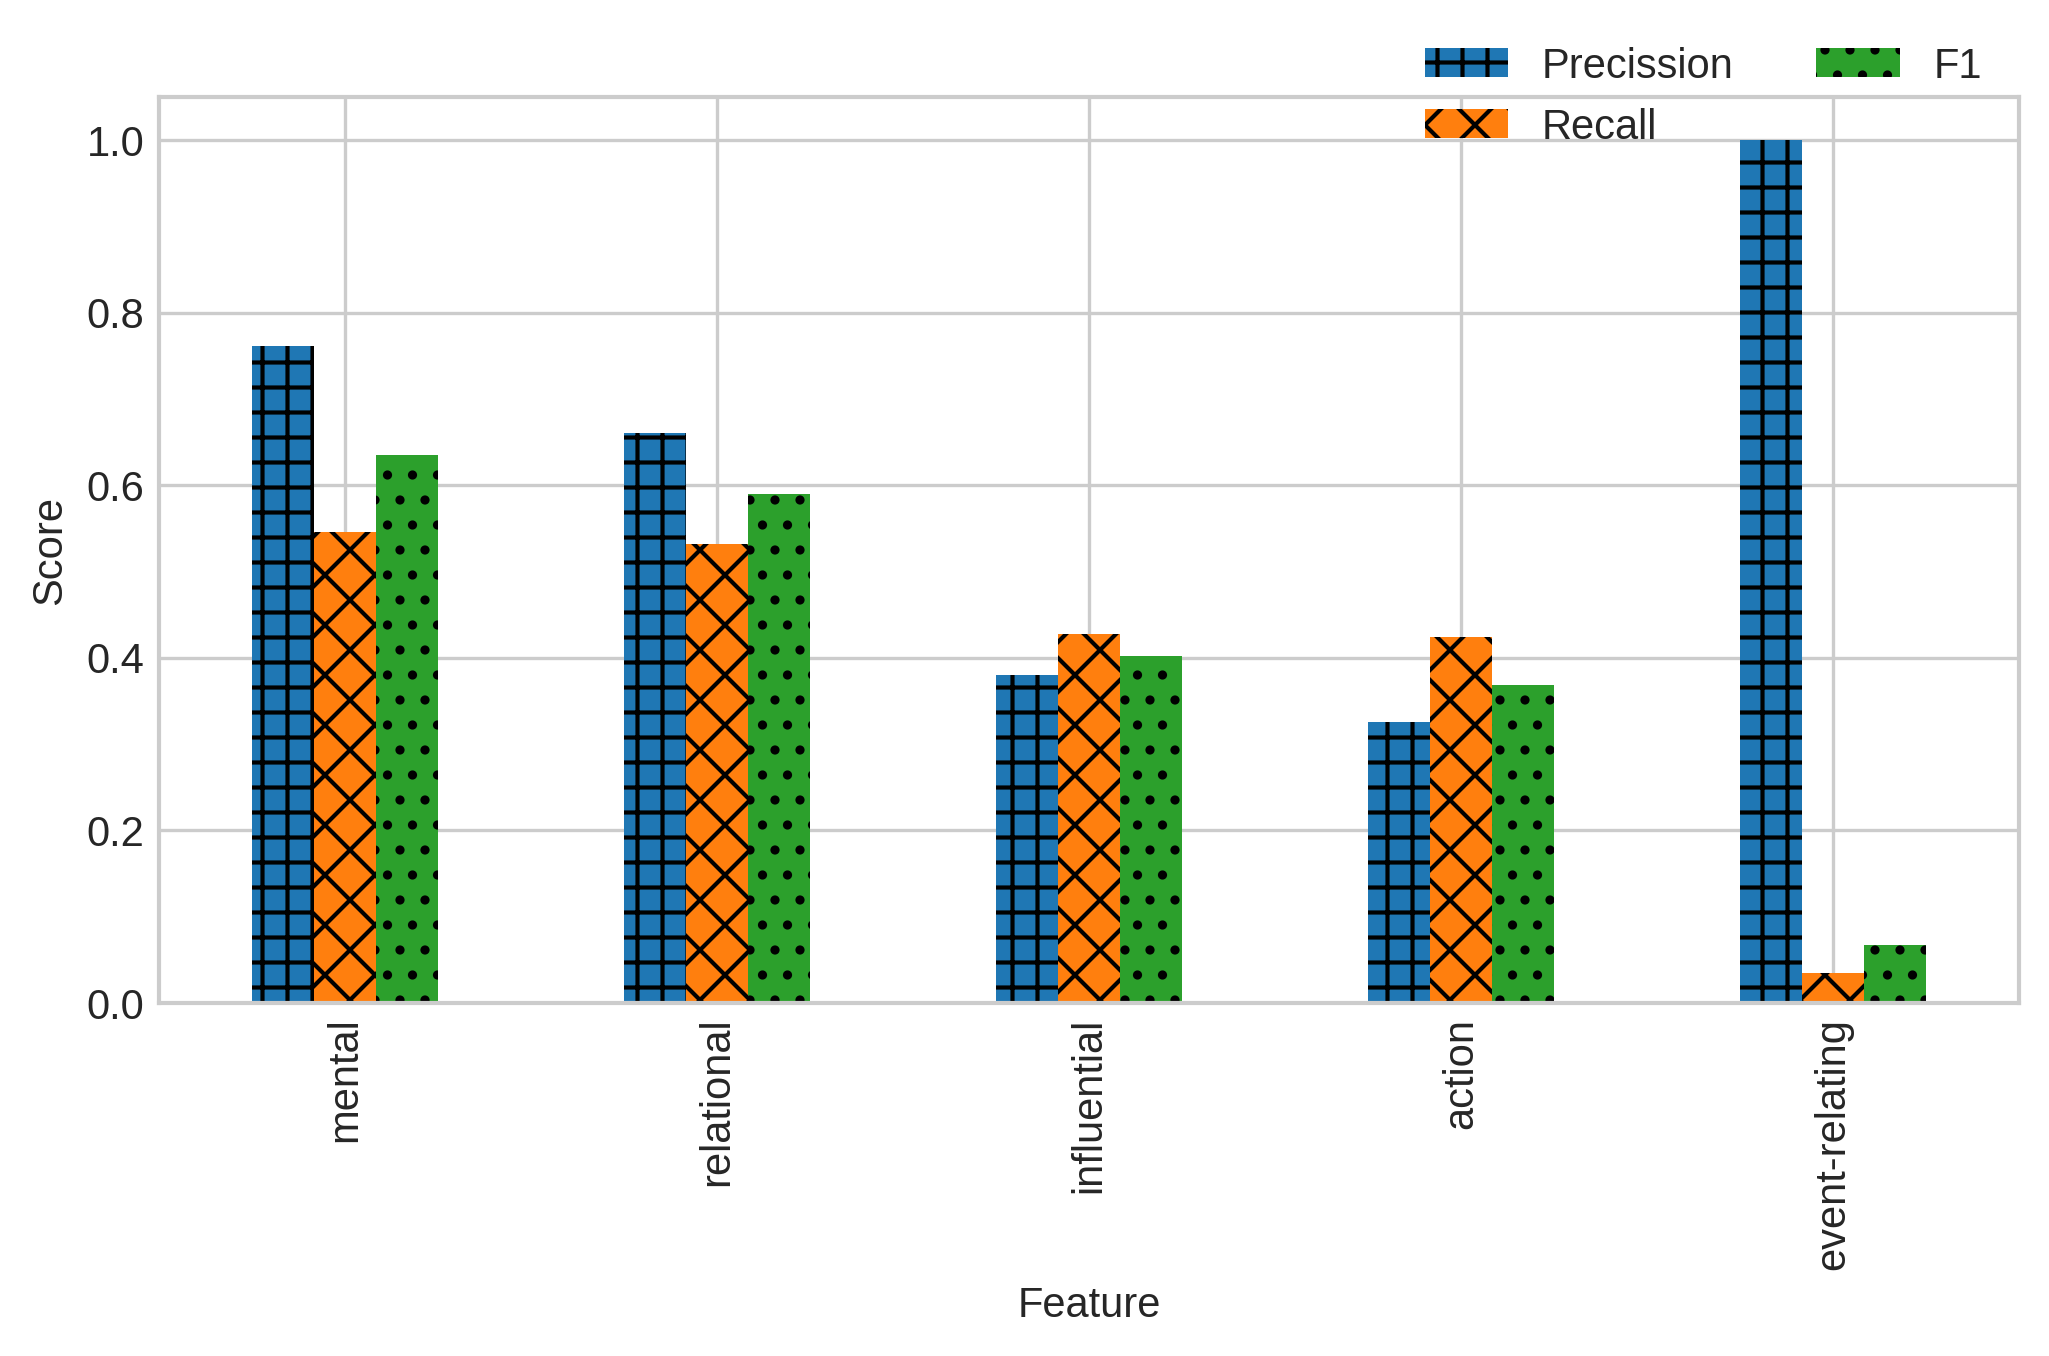

<Figure size 2400x1200 with 0 Axes>

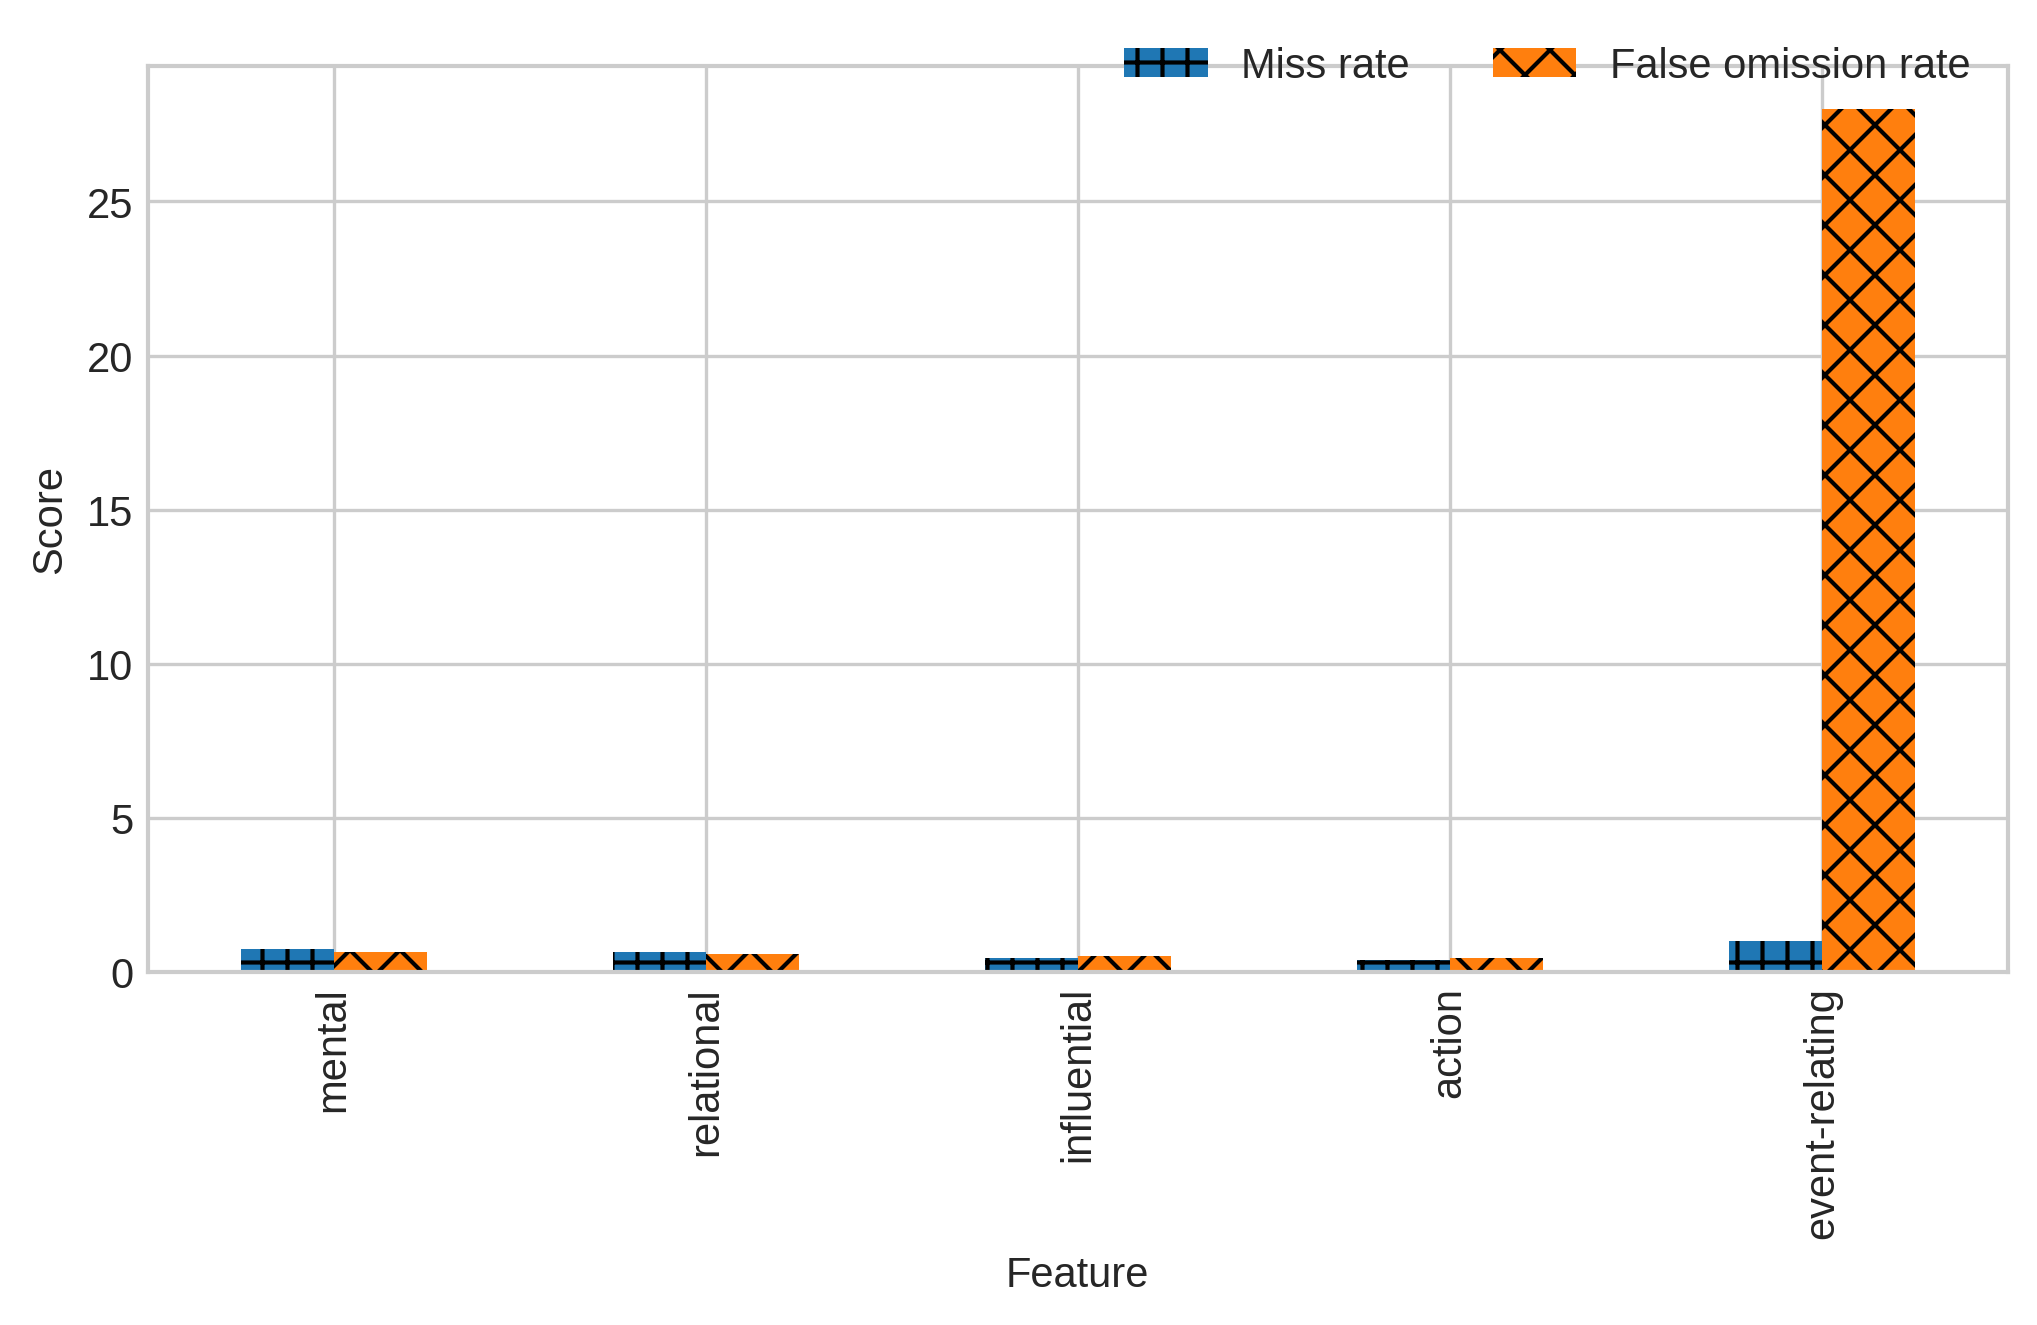

<Figure size 2400x1200 with 0 Axes>

In [19]:
make_stats2(aggregate, "PROCESS_TYPE-oe", filters=PROCESS_TYPE)

## ACTION

In [20]:
# make_stats2(aggregate, "ACTION-oe", filters=ACTION)

## RELATIONAL

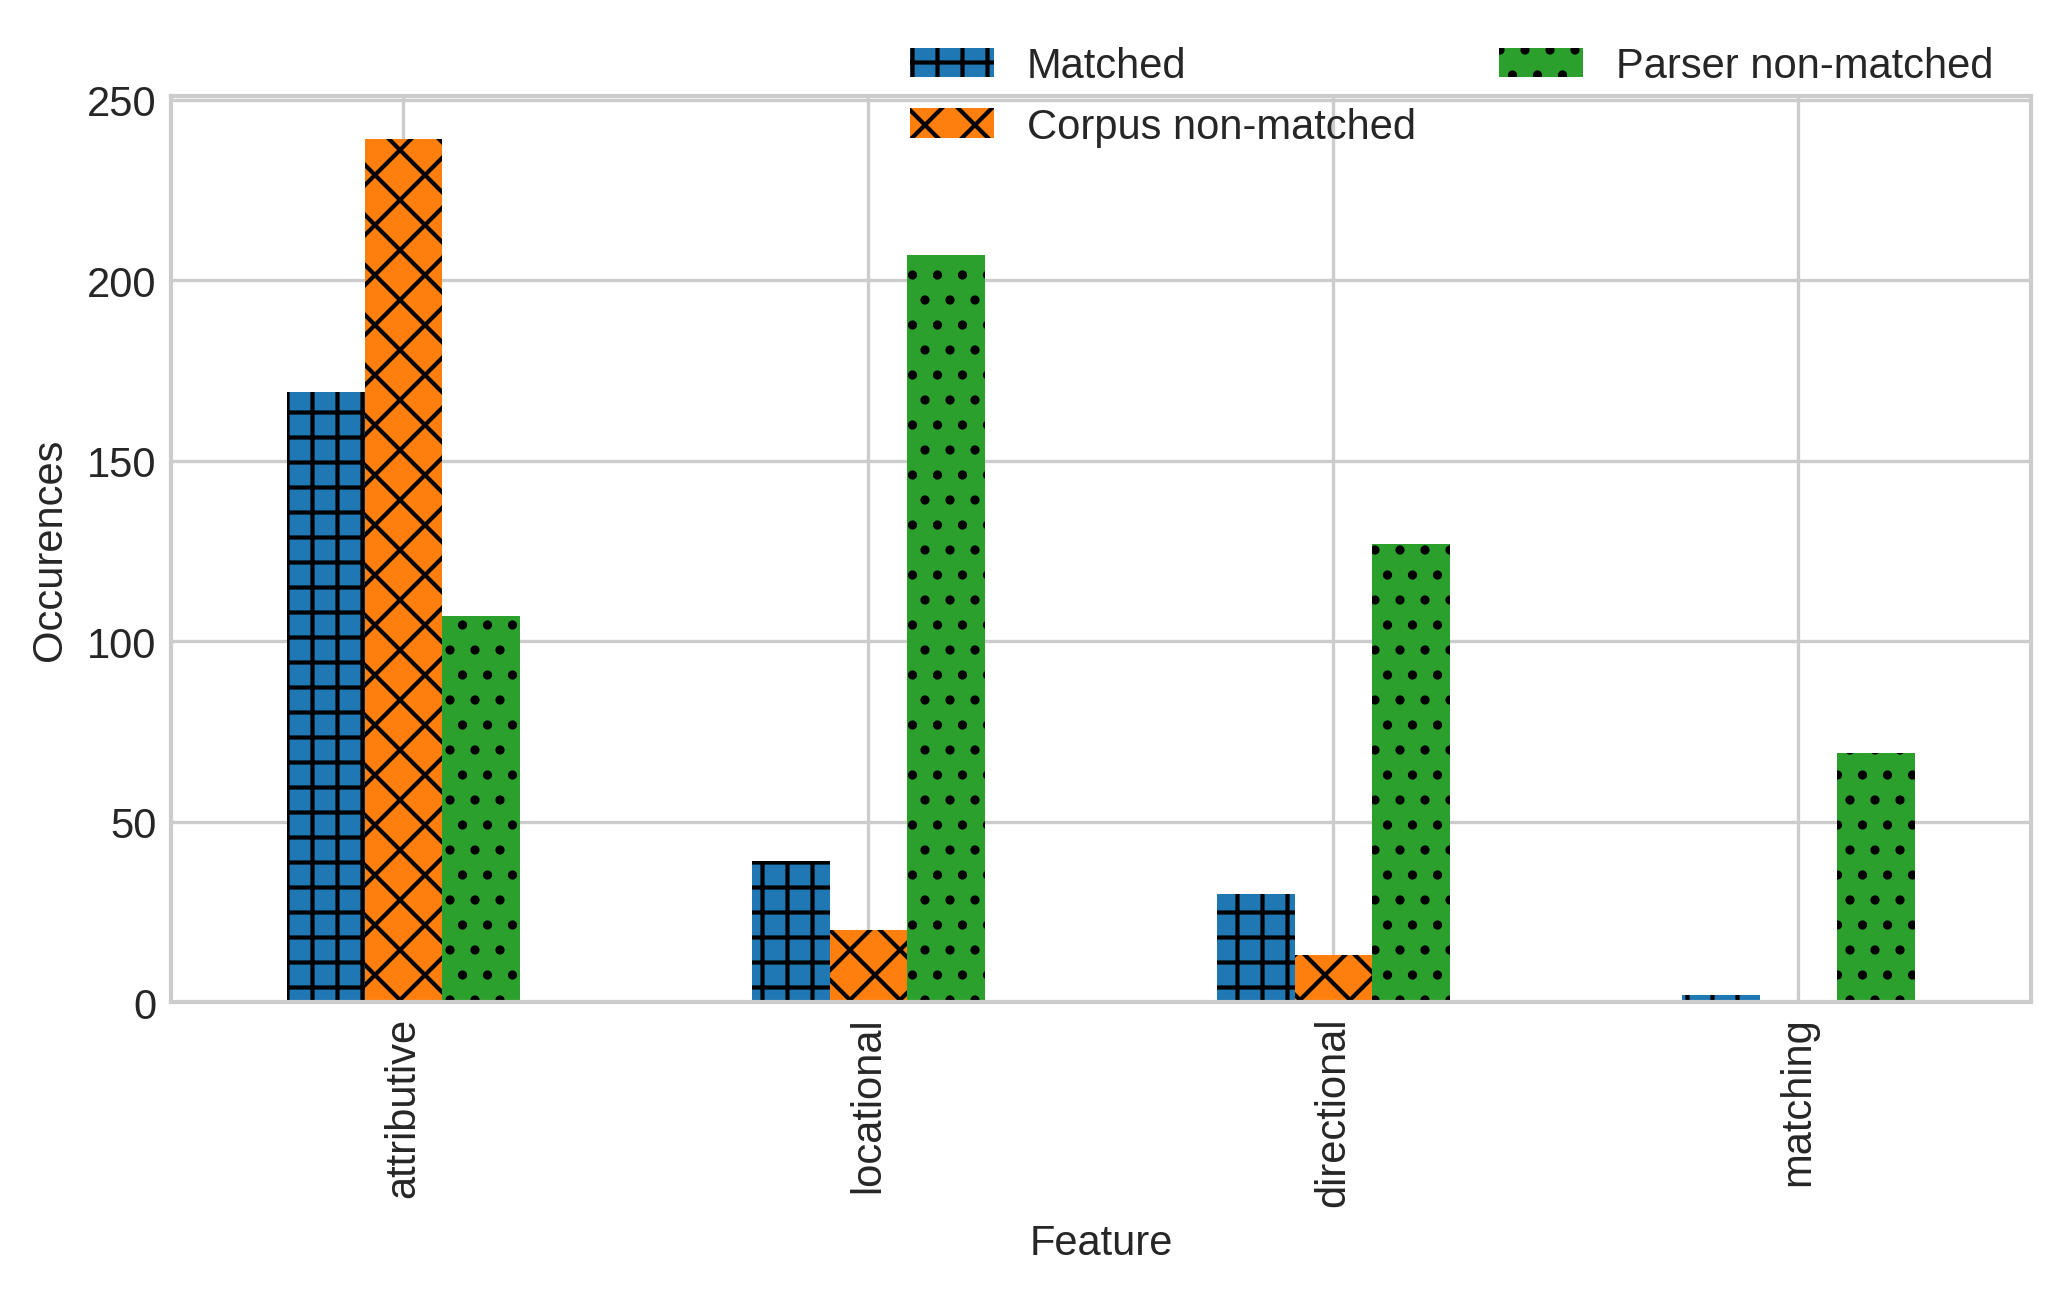

<Figure size 2400x1200 with 0 Axes>

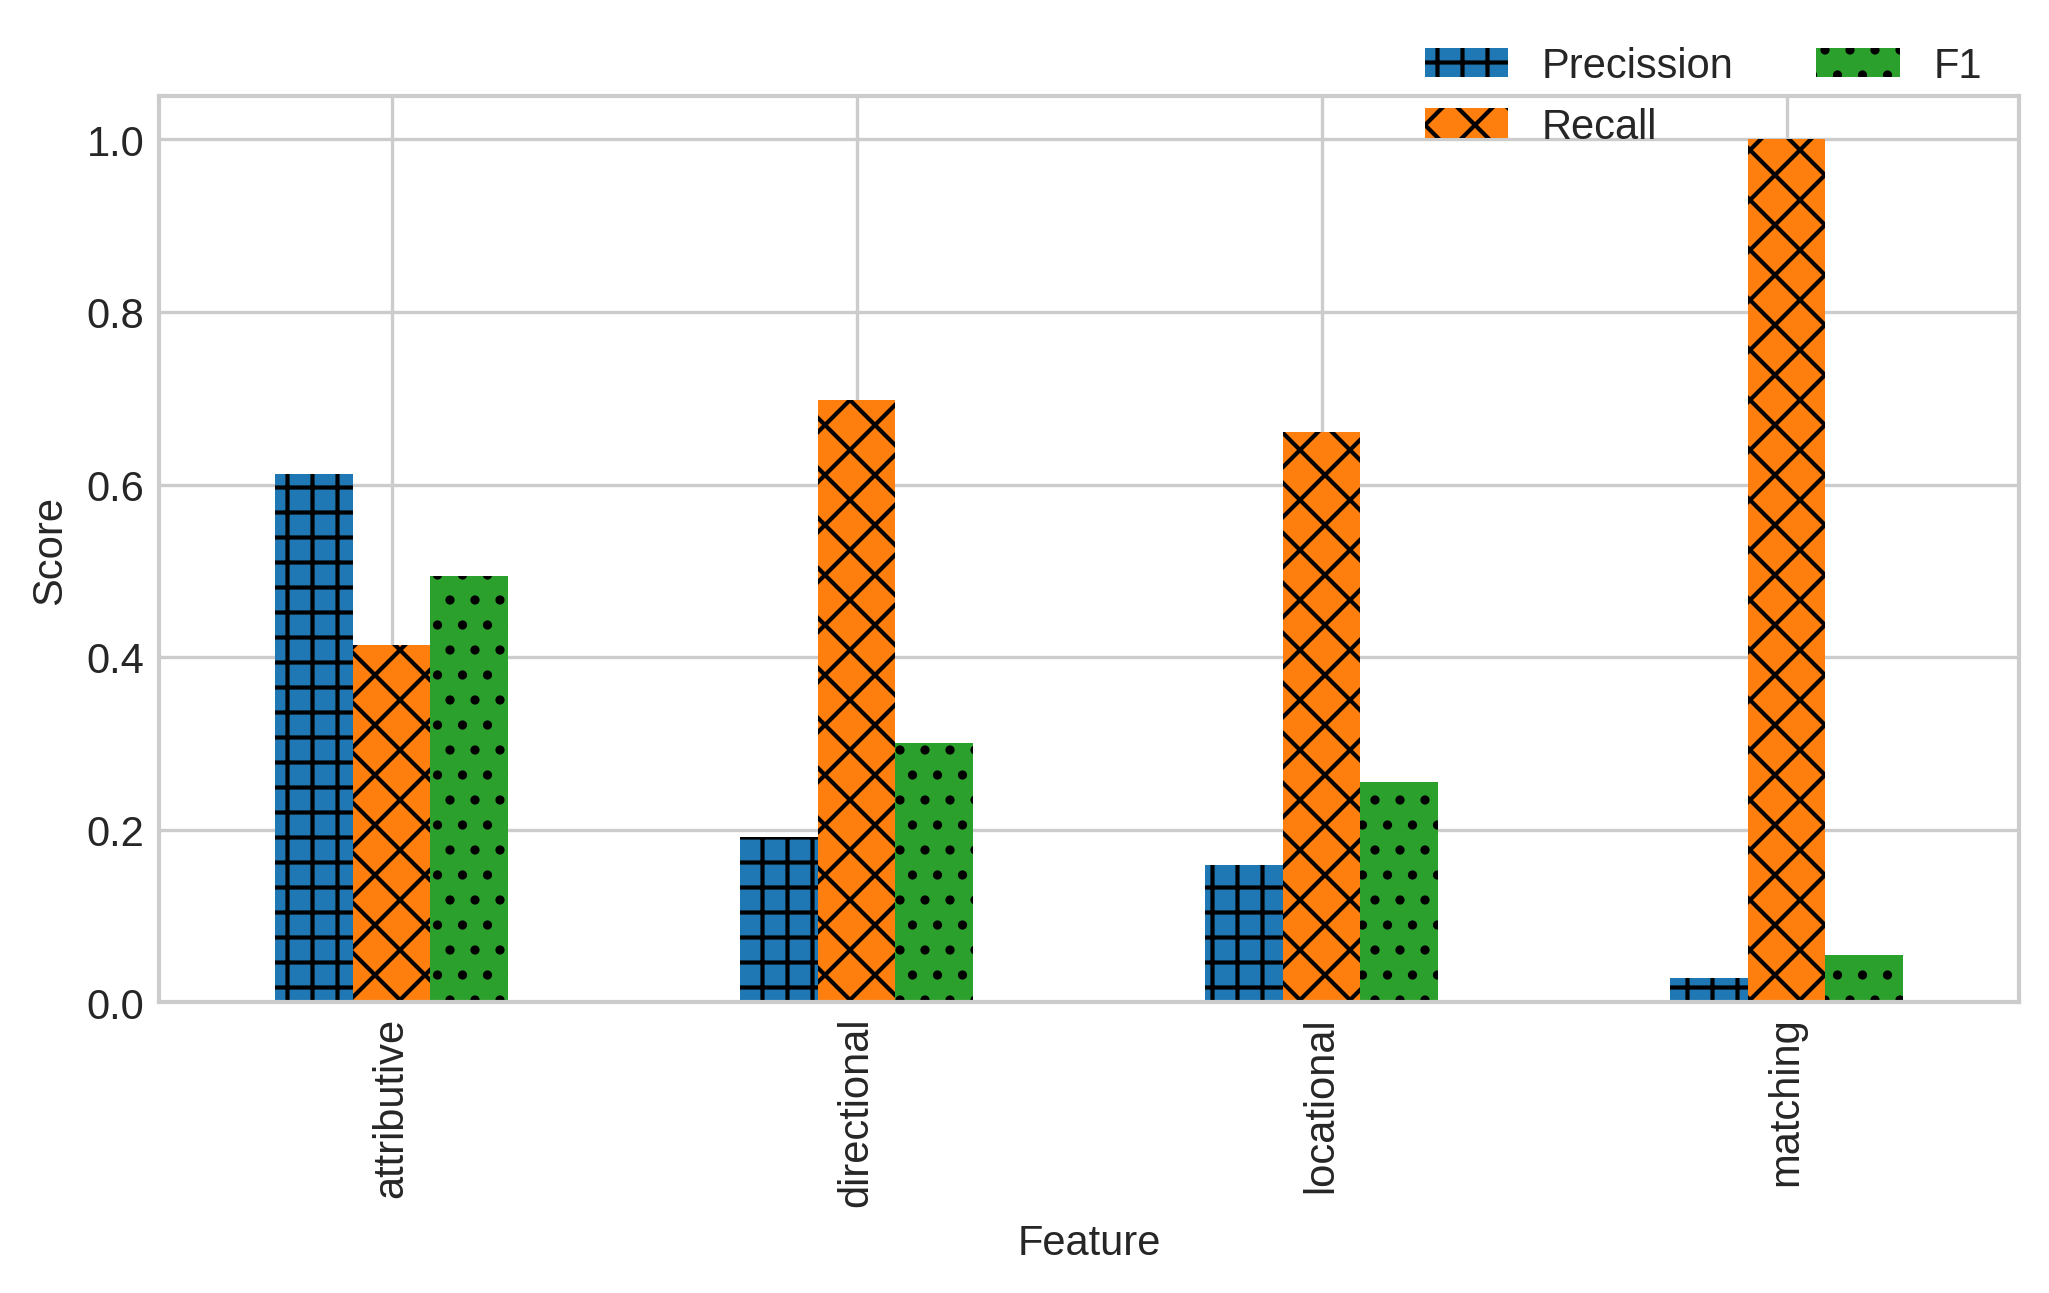

<Figure size 2400x1200 with 0 Axes>

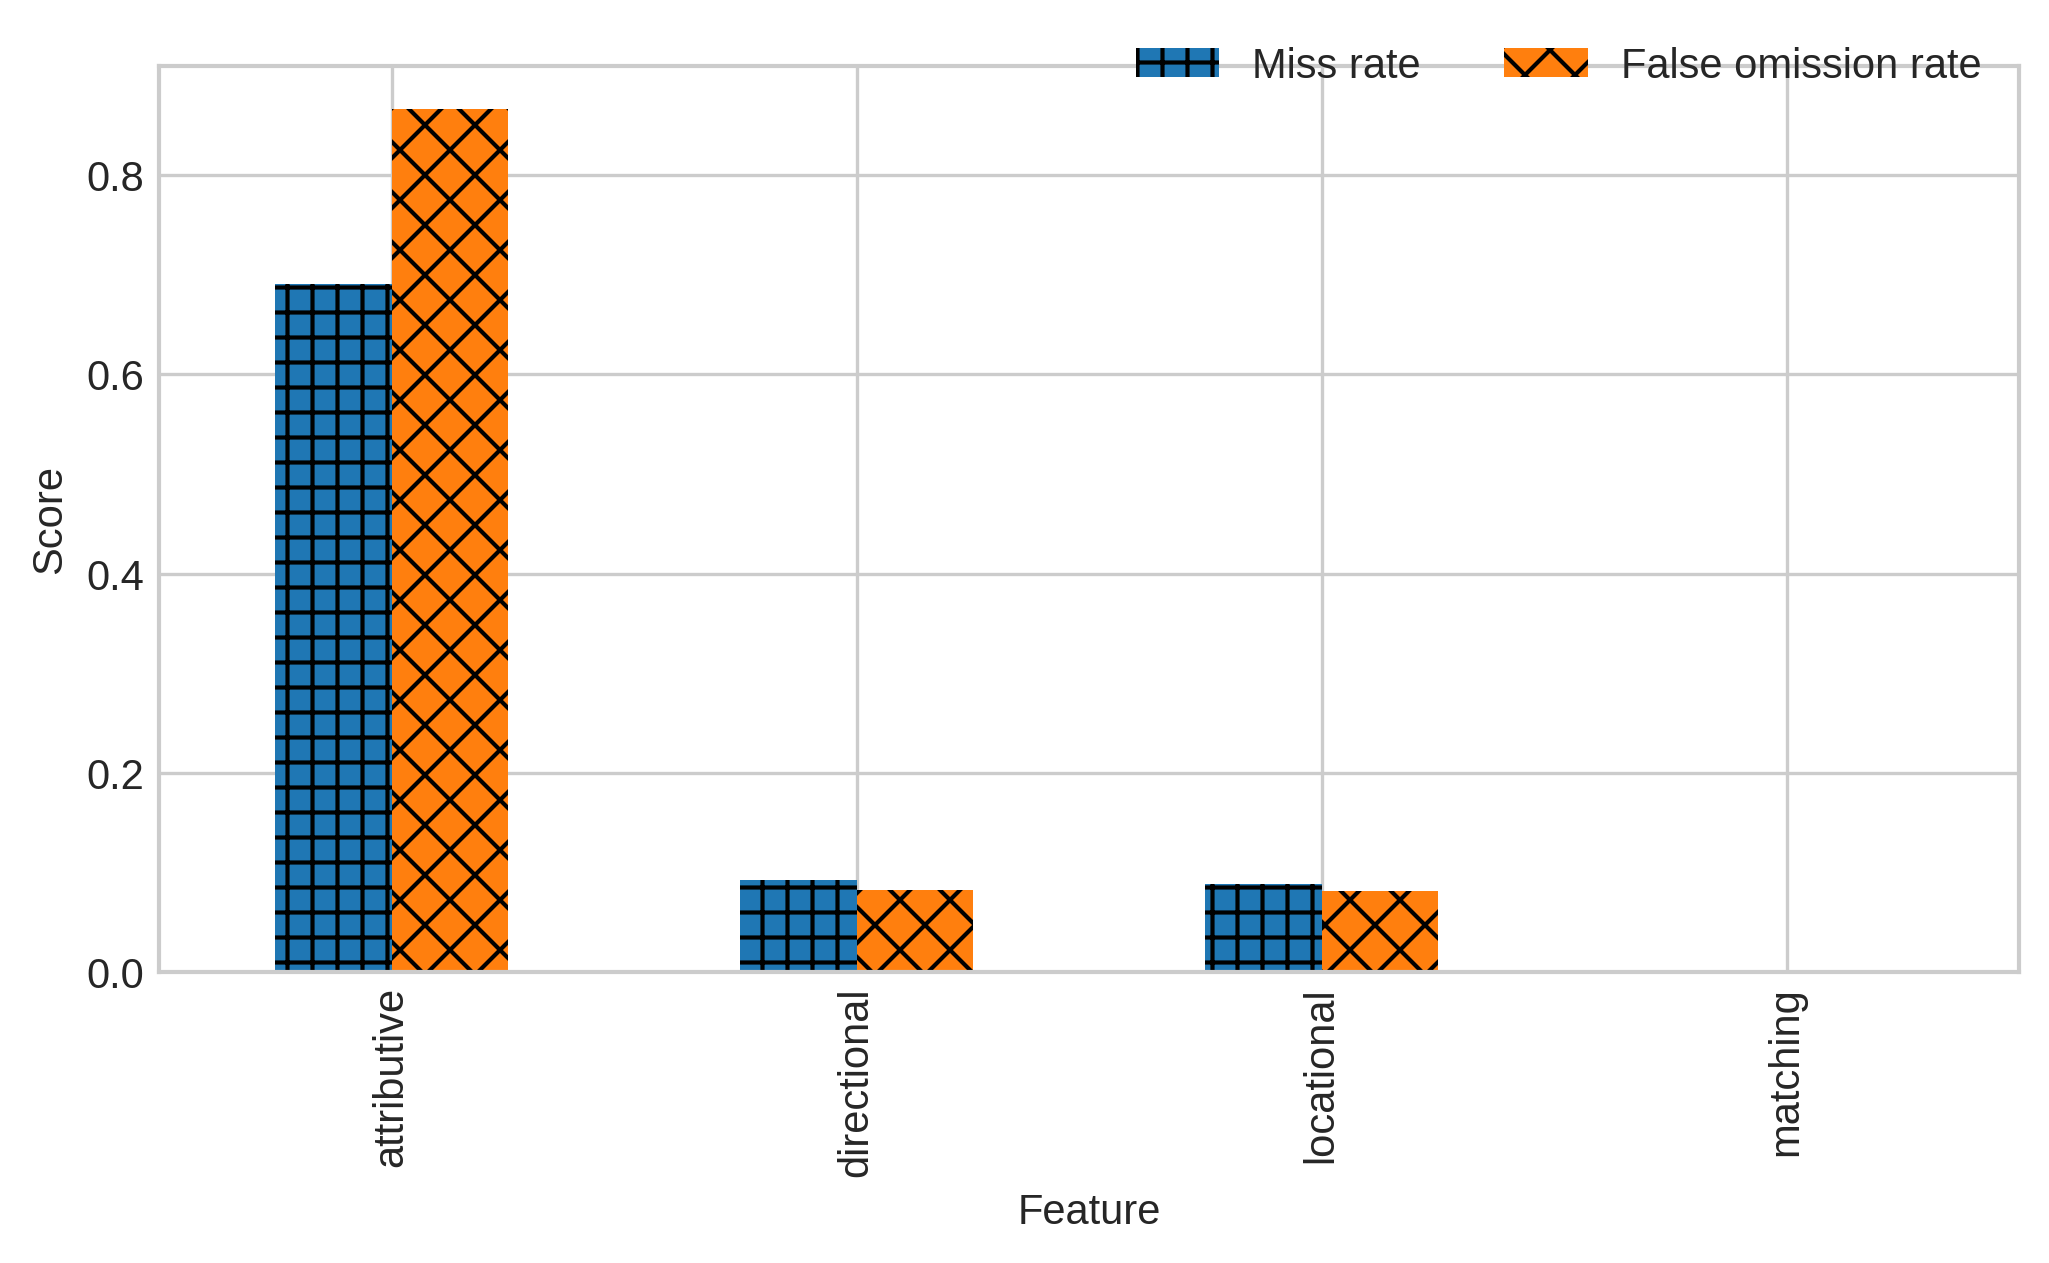

<Figure size 2400x1200 with 0 Axes>

In [21]:
make_stats2(aggregate, "RELATIONAL-oe", filters=RELATIONAL)

## MENTAL

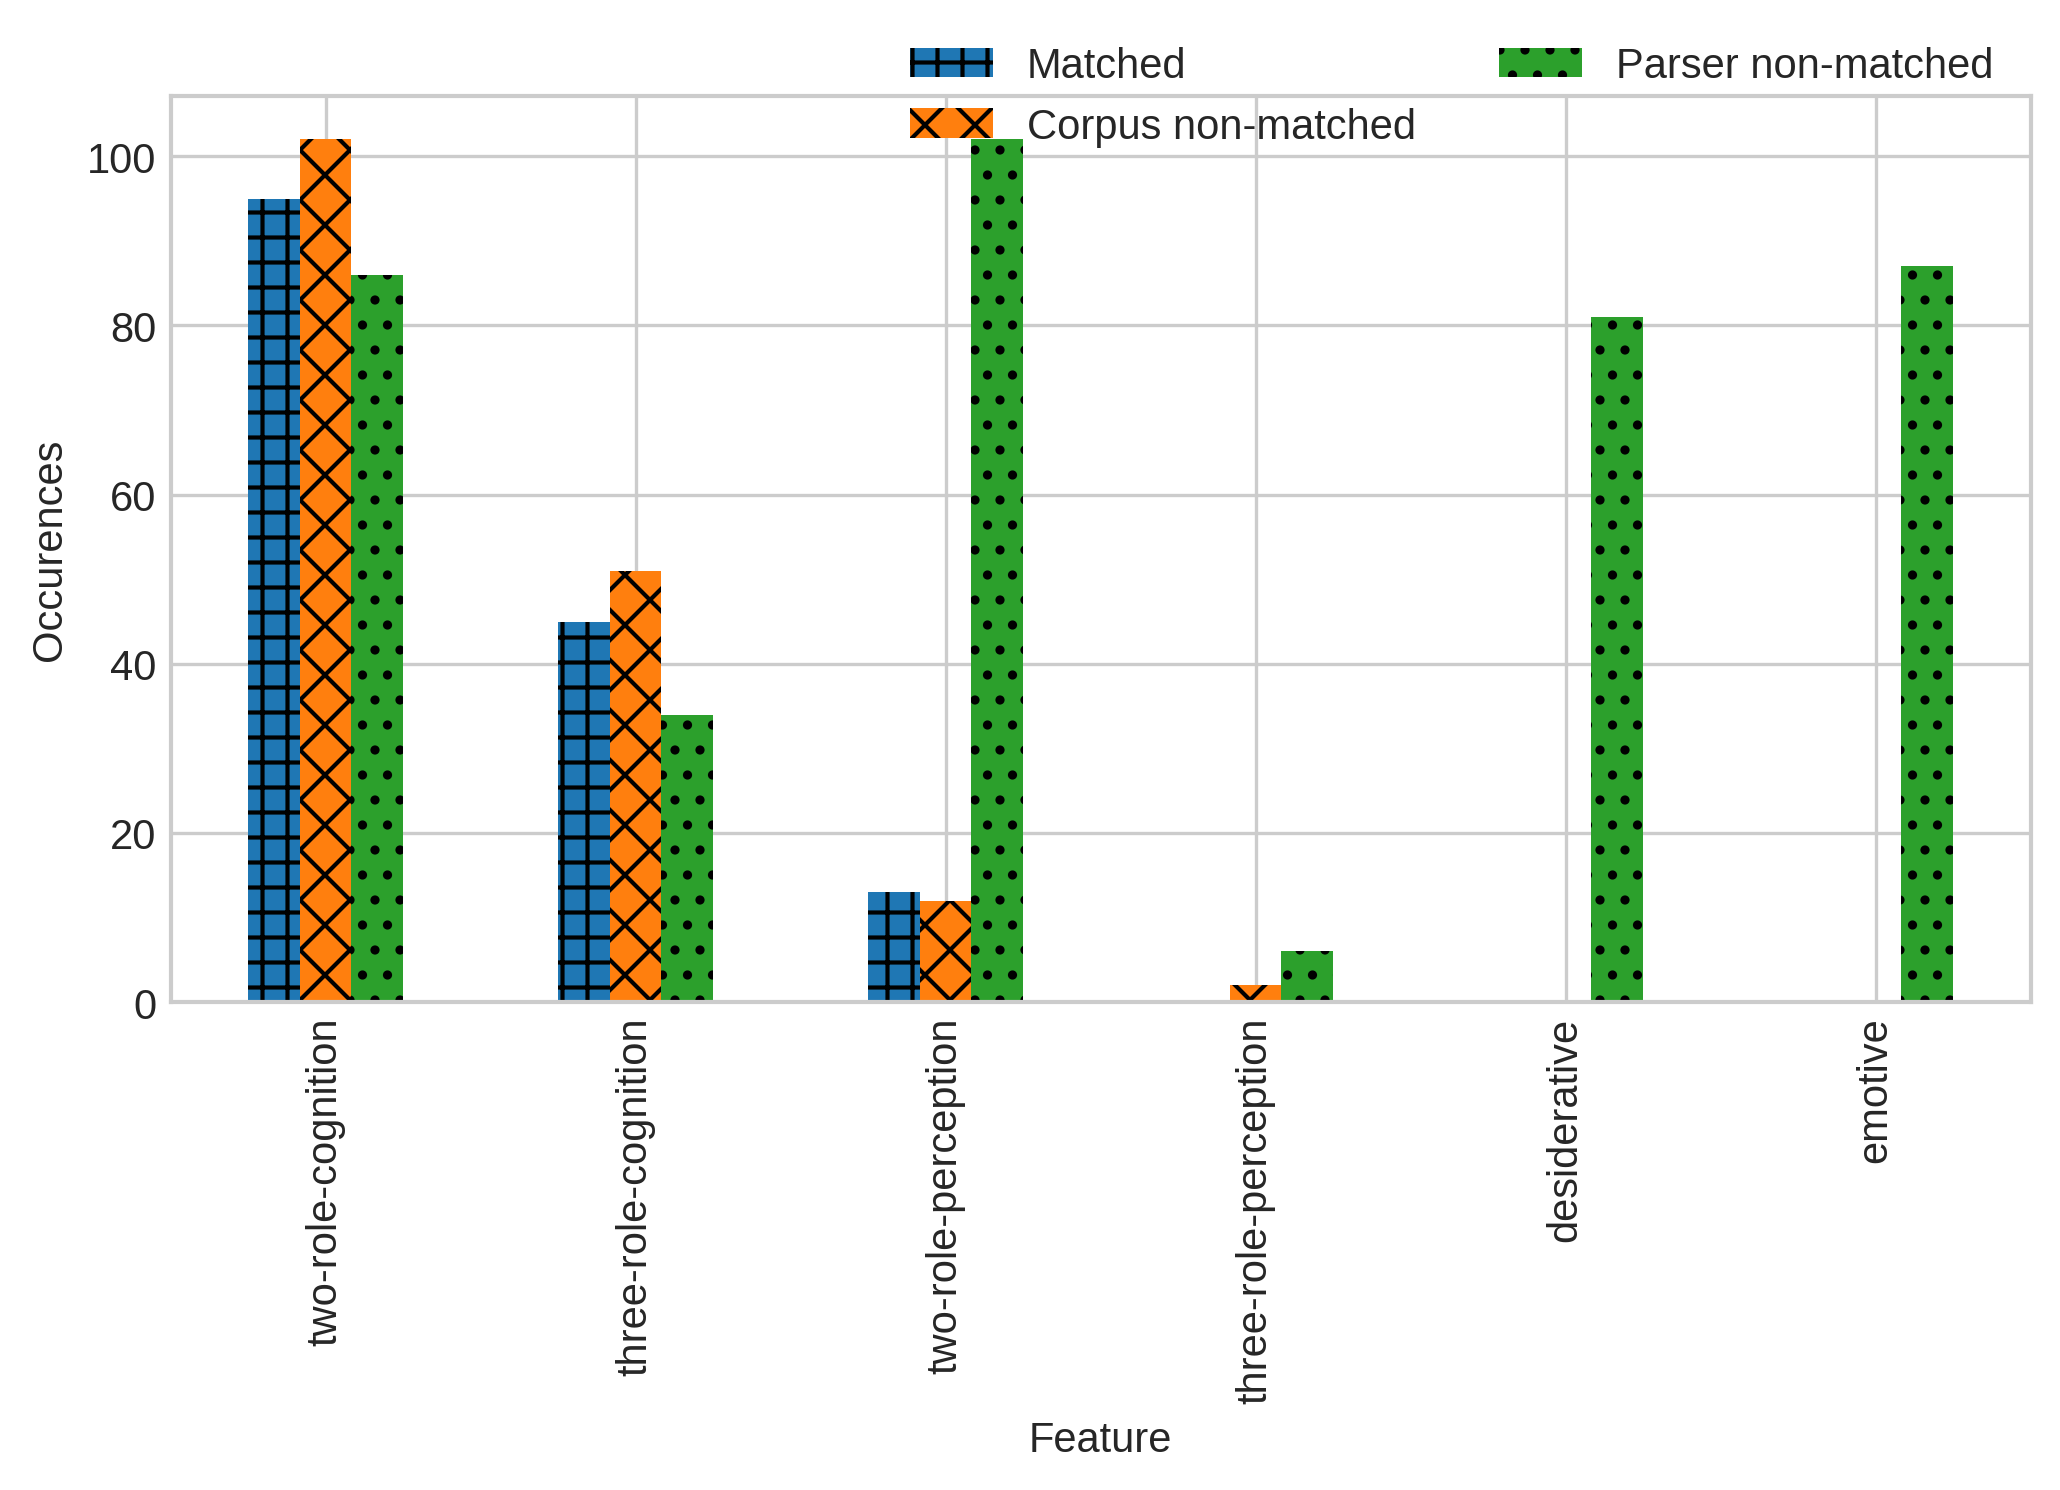

<Figure size 2400x1200 with 0 Axes>

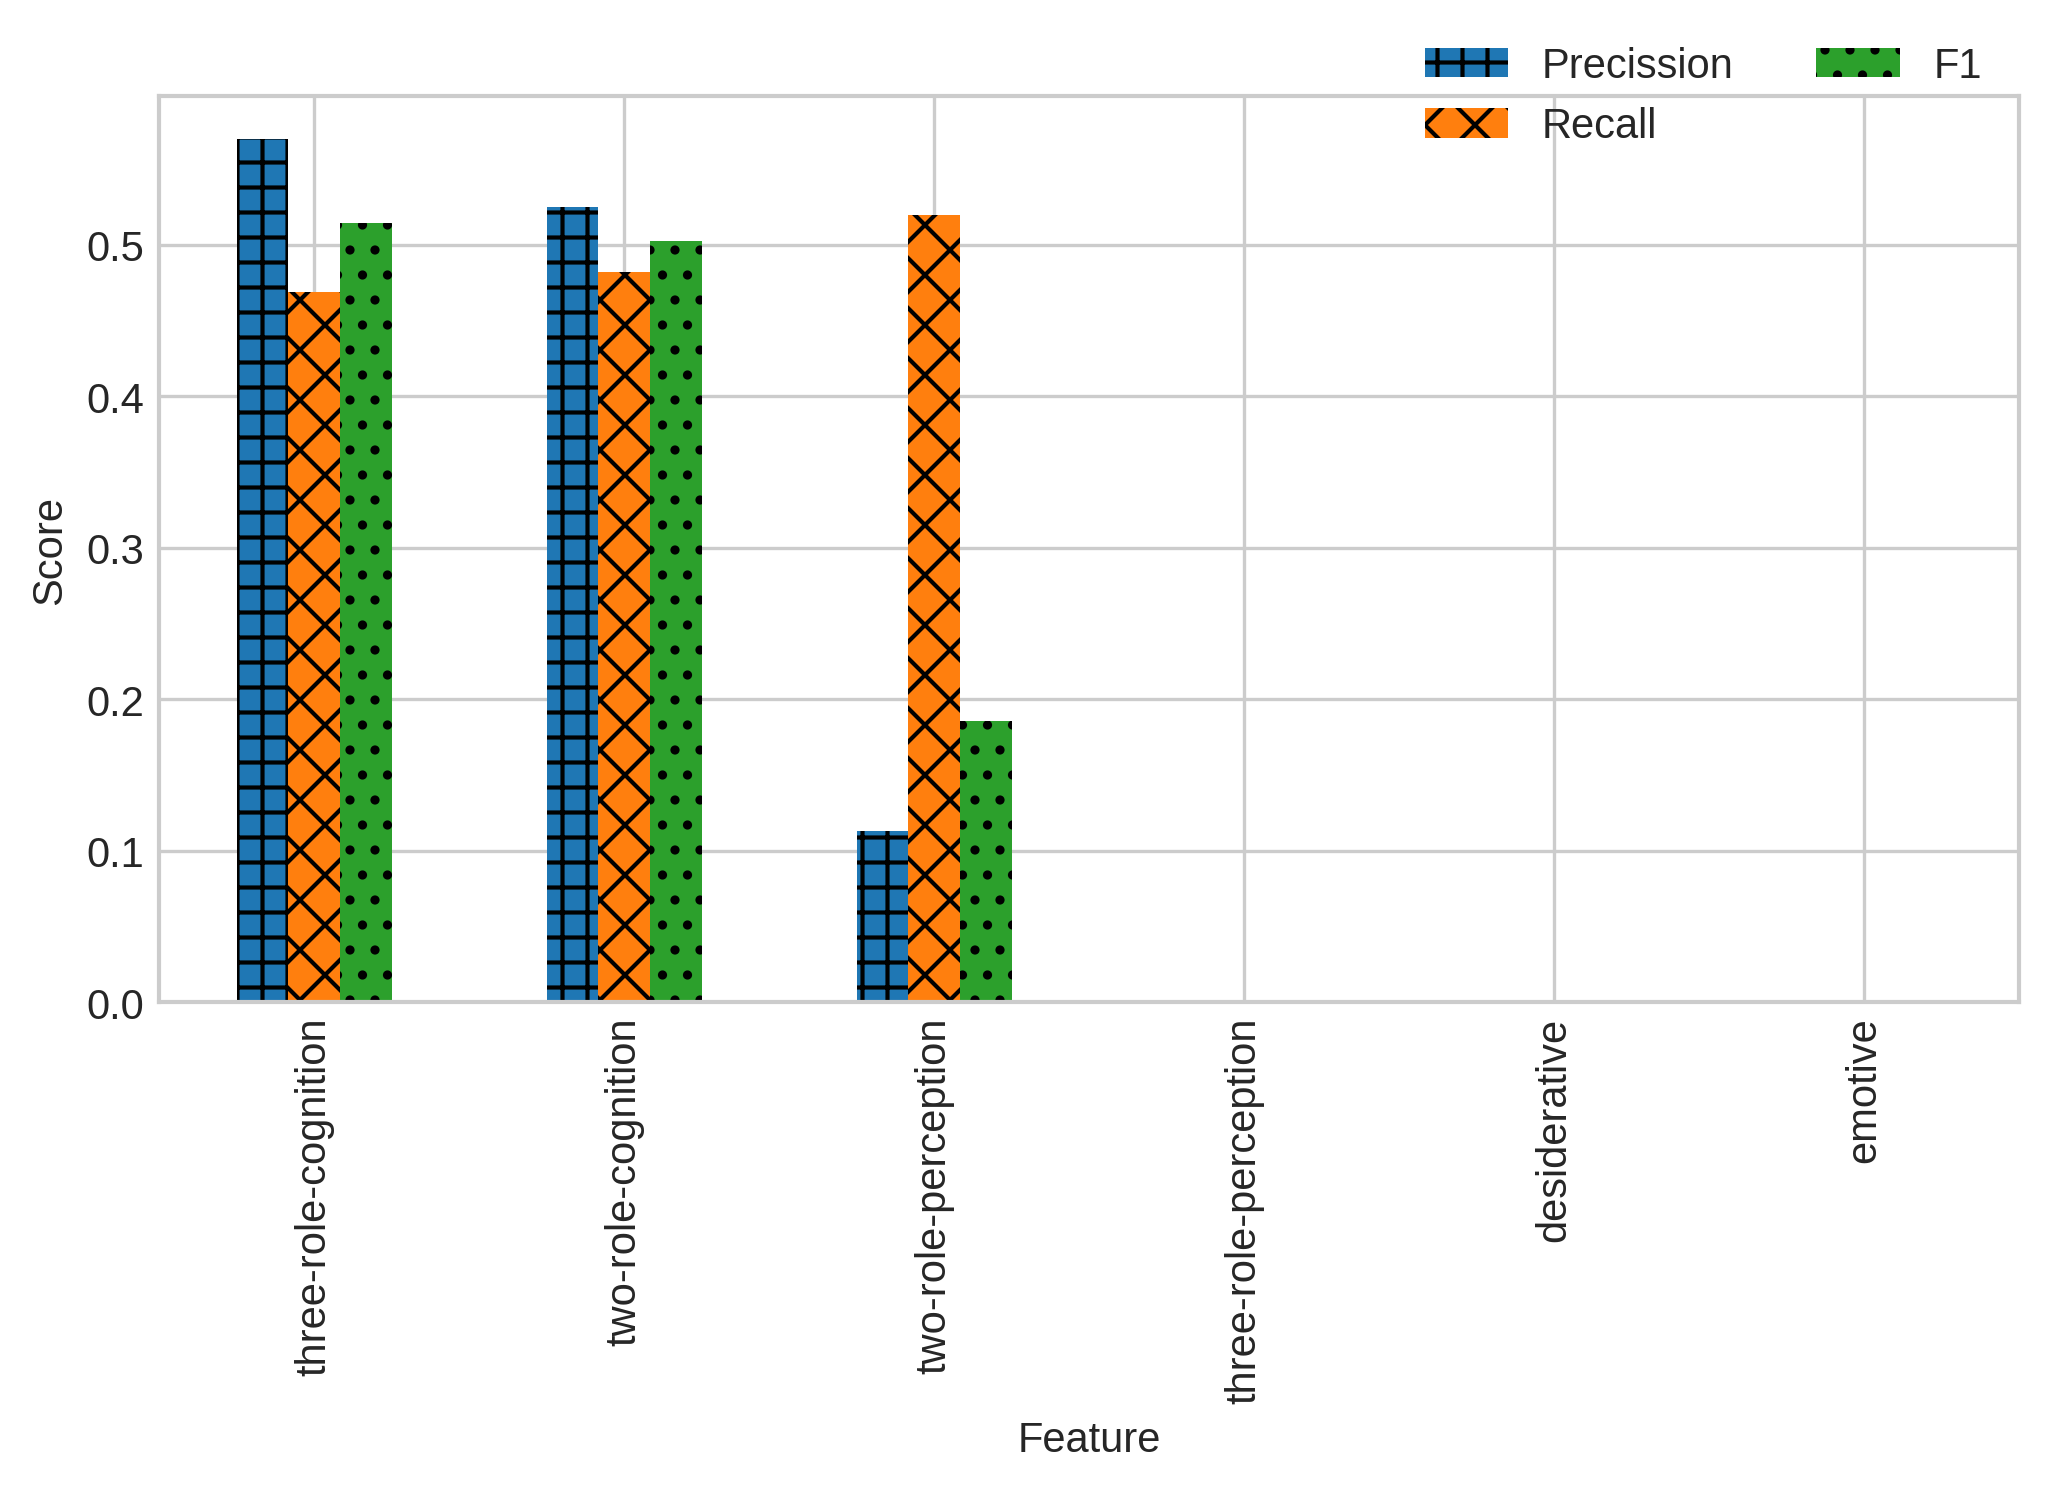

<Figure size 2400x1200 with 0 Axes>

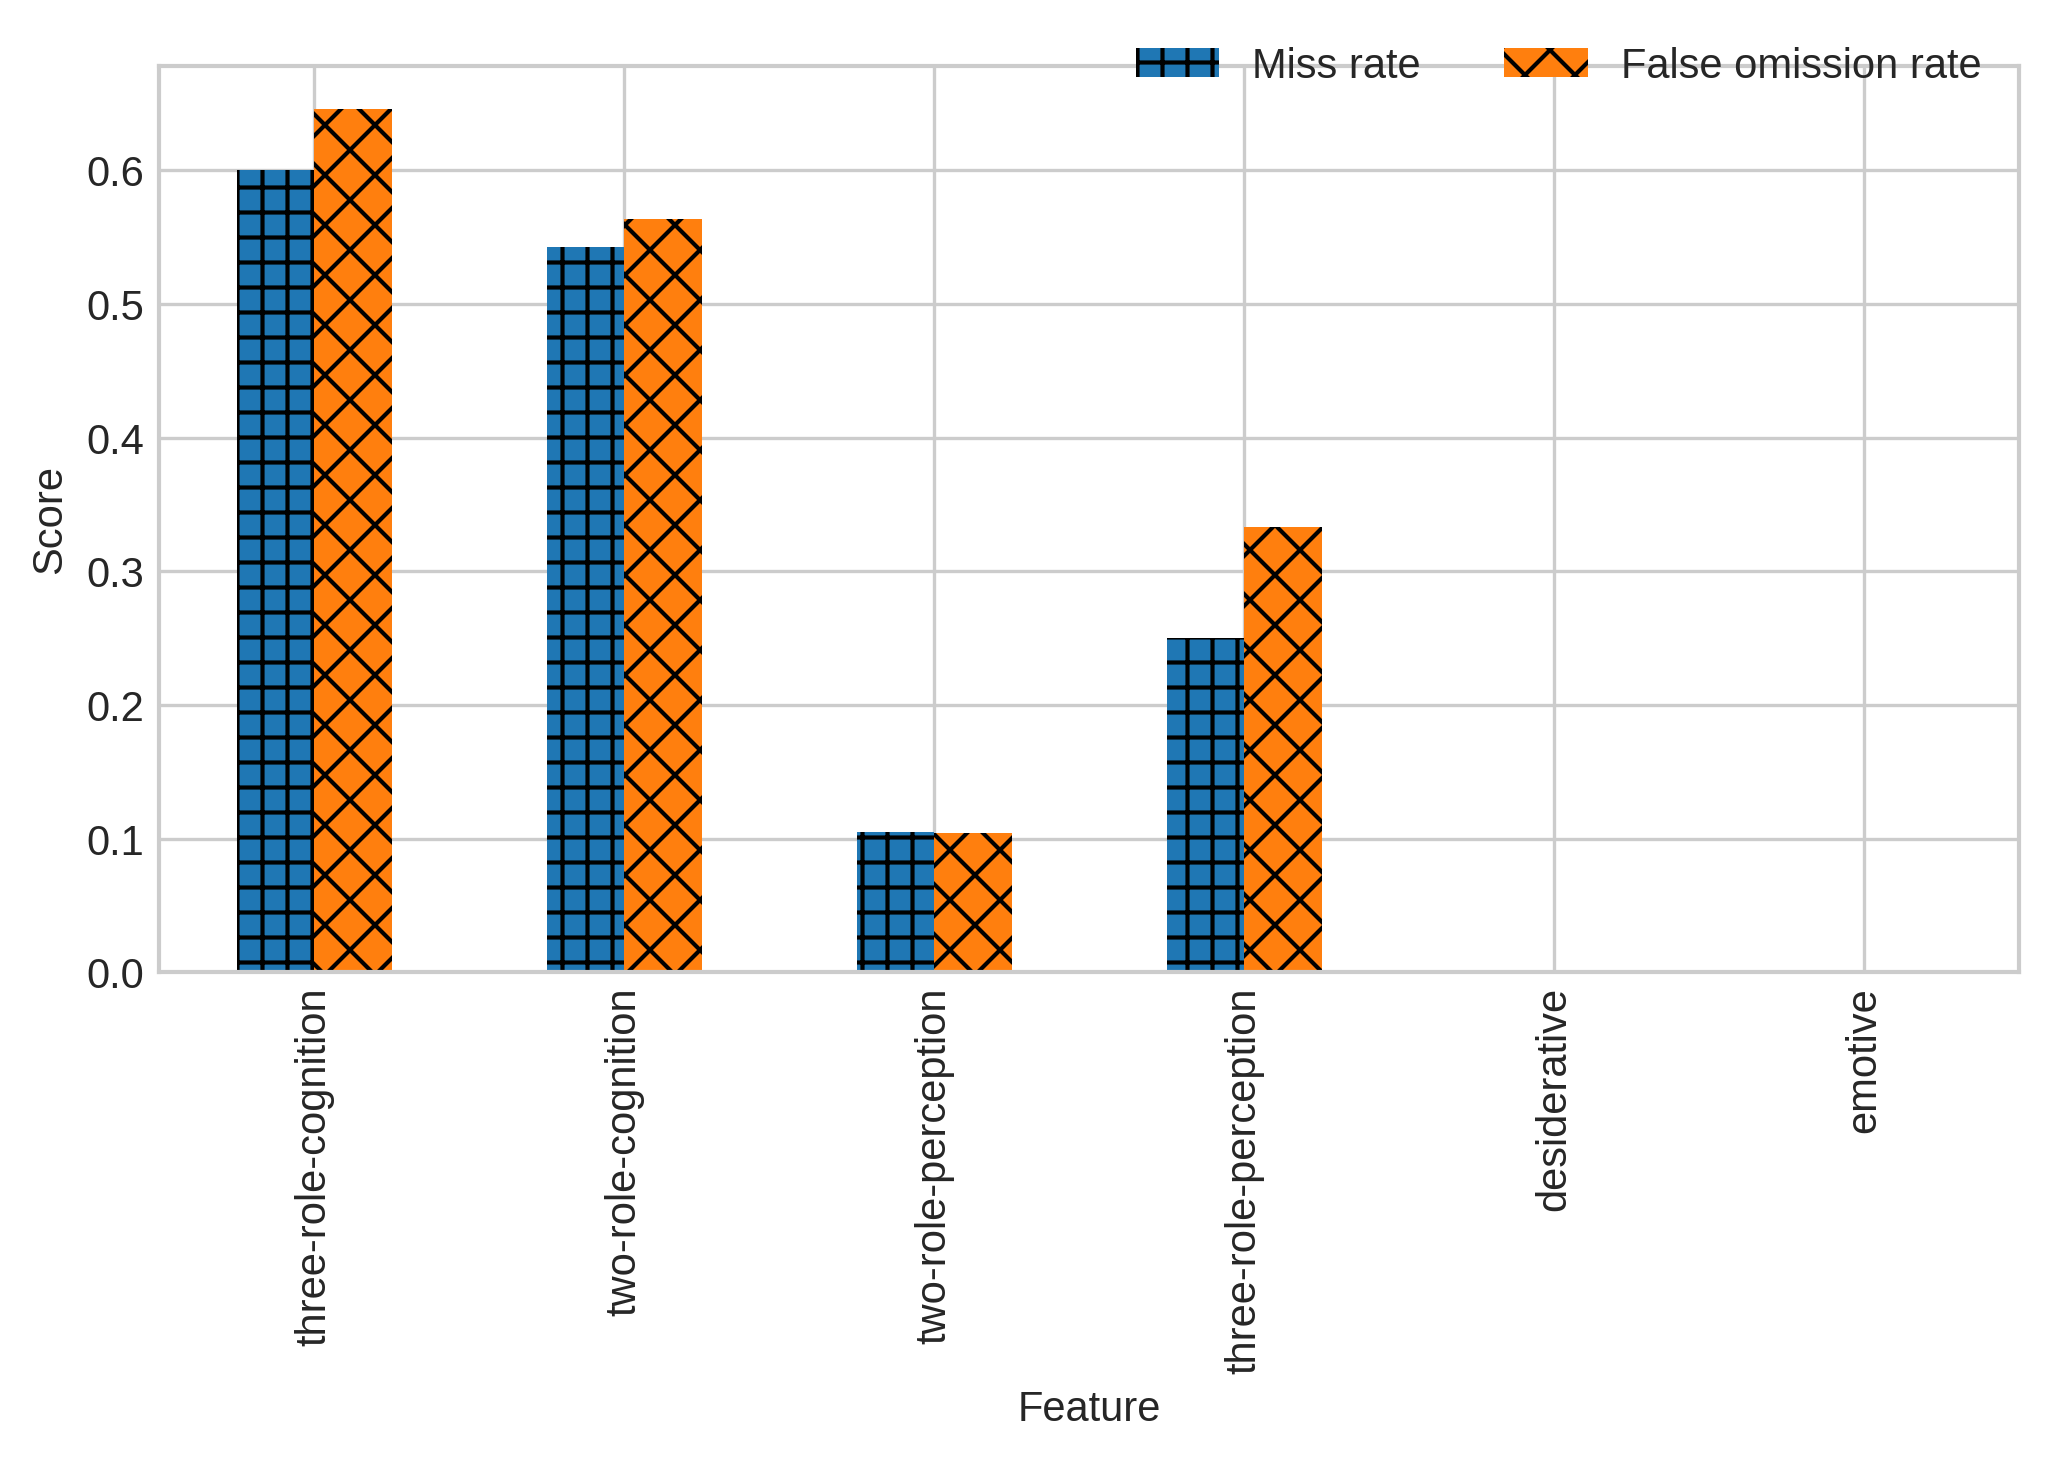

<Figure size 2400x1200 with 0 Axes>

In [22]:
make_stats2(aggregate, "MENTAL-oe", filters=MENTAL)

## INFLUENTIAL

In [23]:
# make_stats2(aggregate, "INFLUENTIAL-oe", filters=INFLUENTIAL)

## PARTICIPANT_ROLE

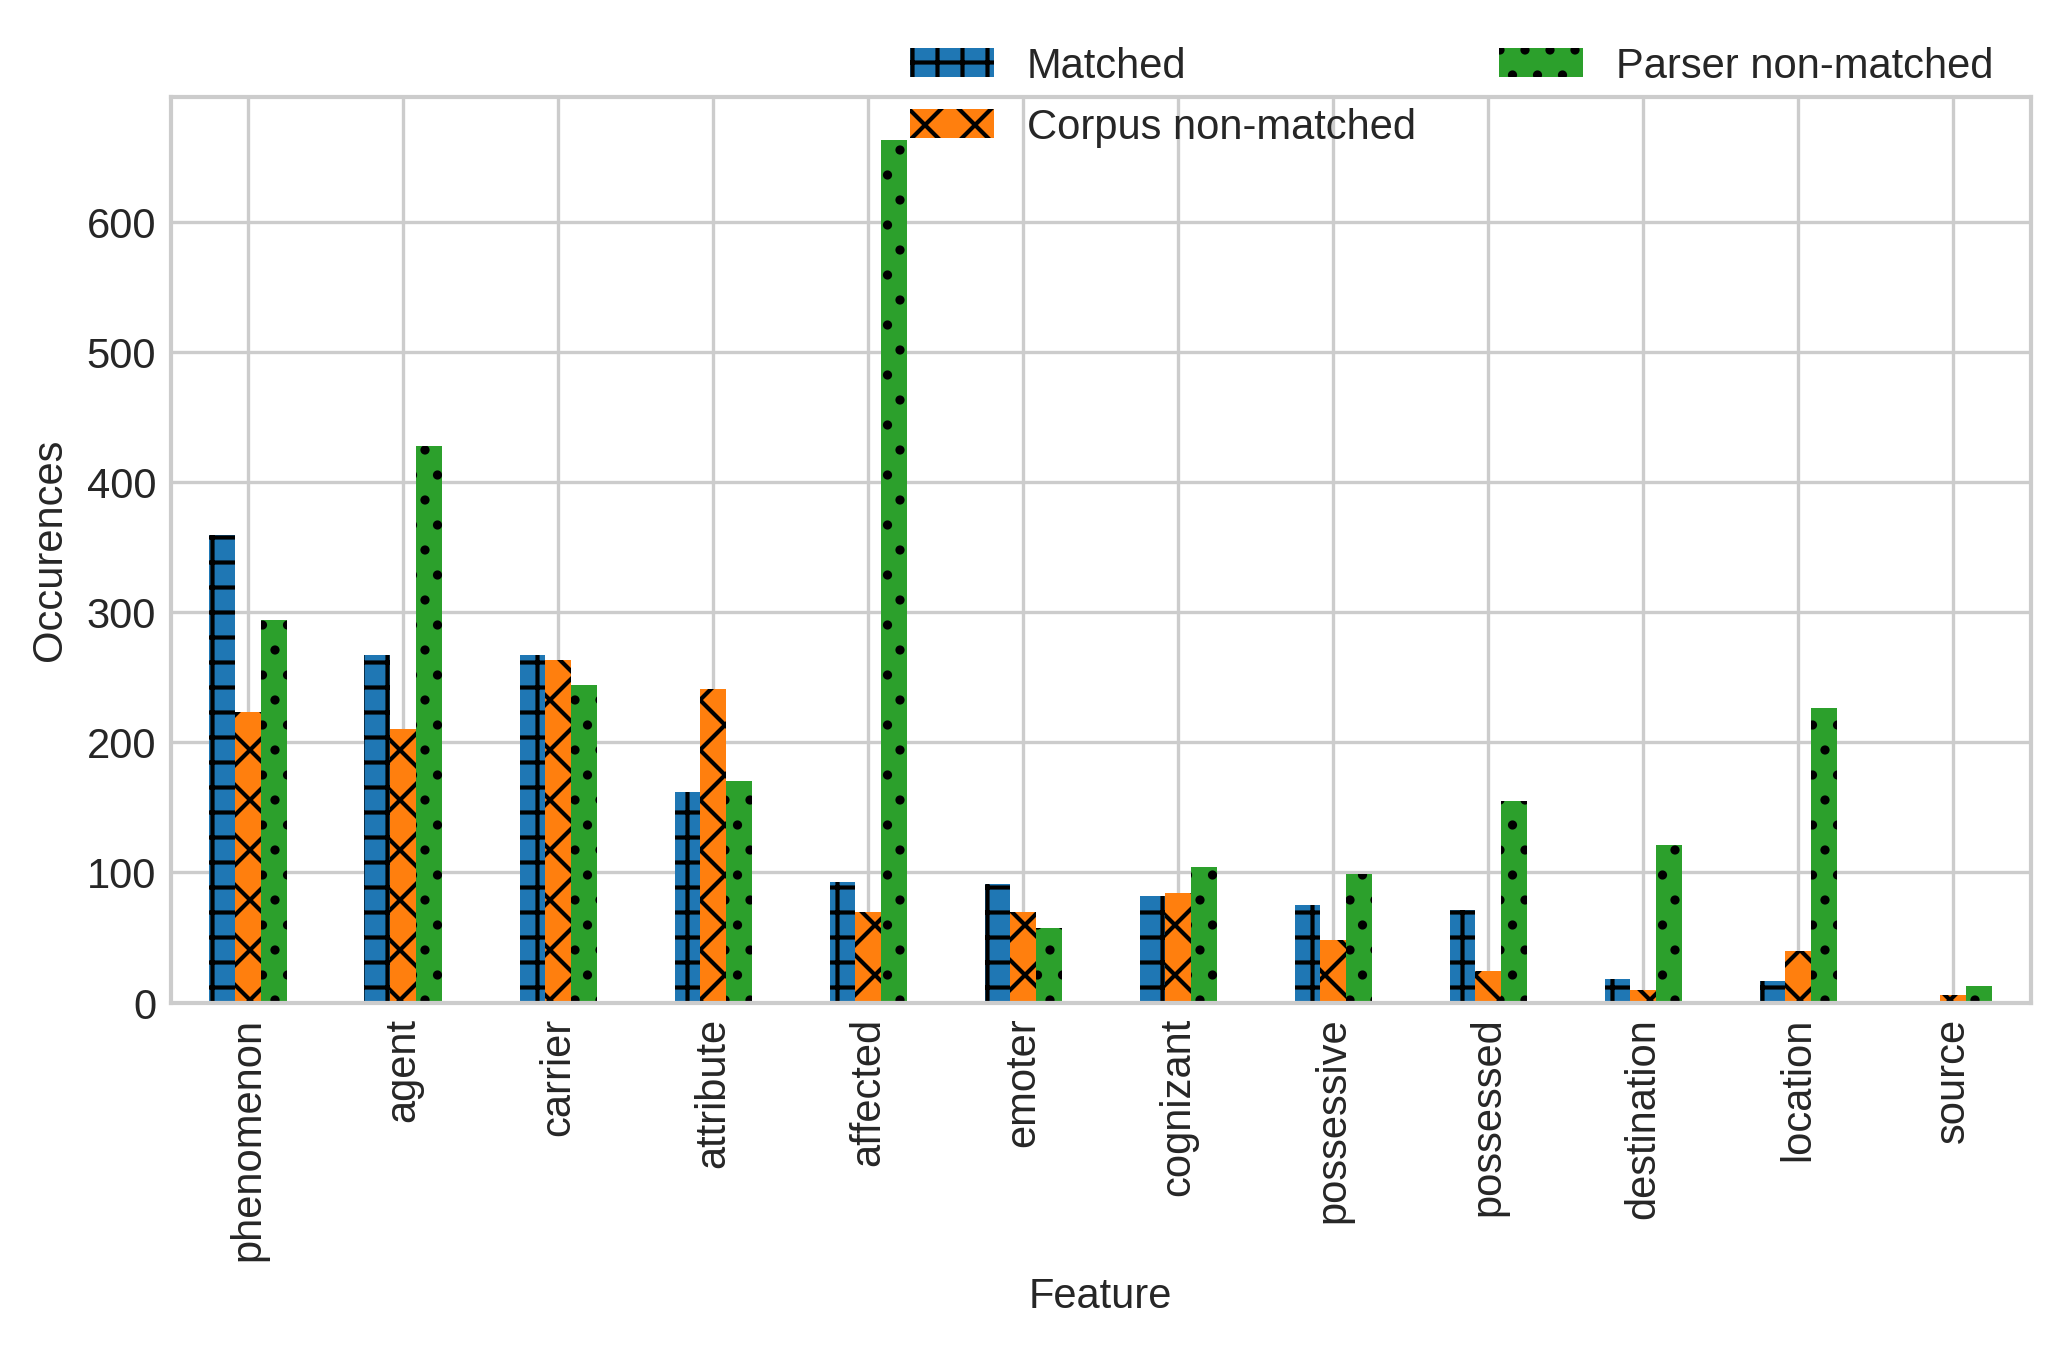

<Figure size 2400x1200 with 0 Axes>

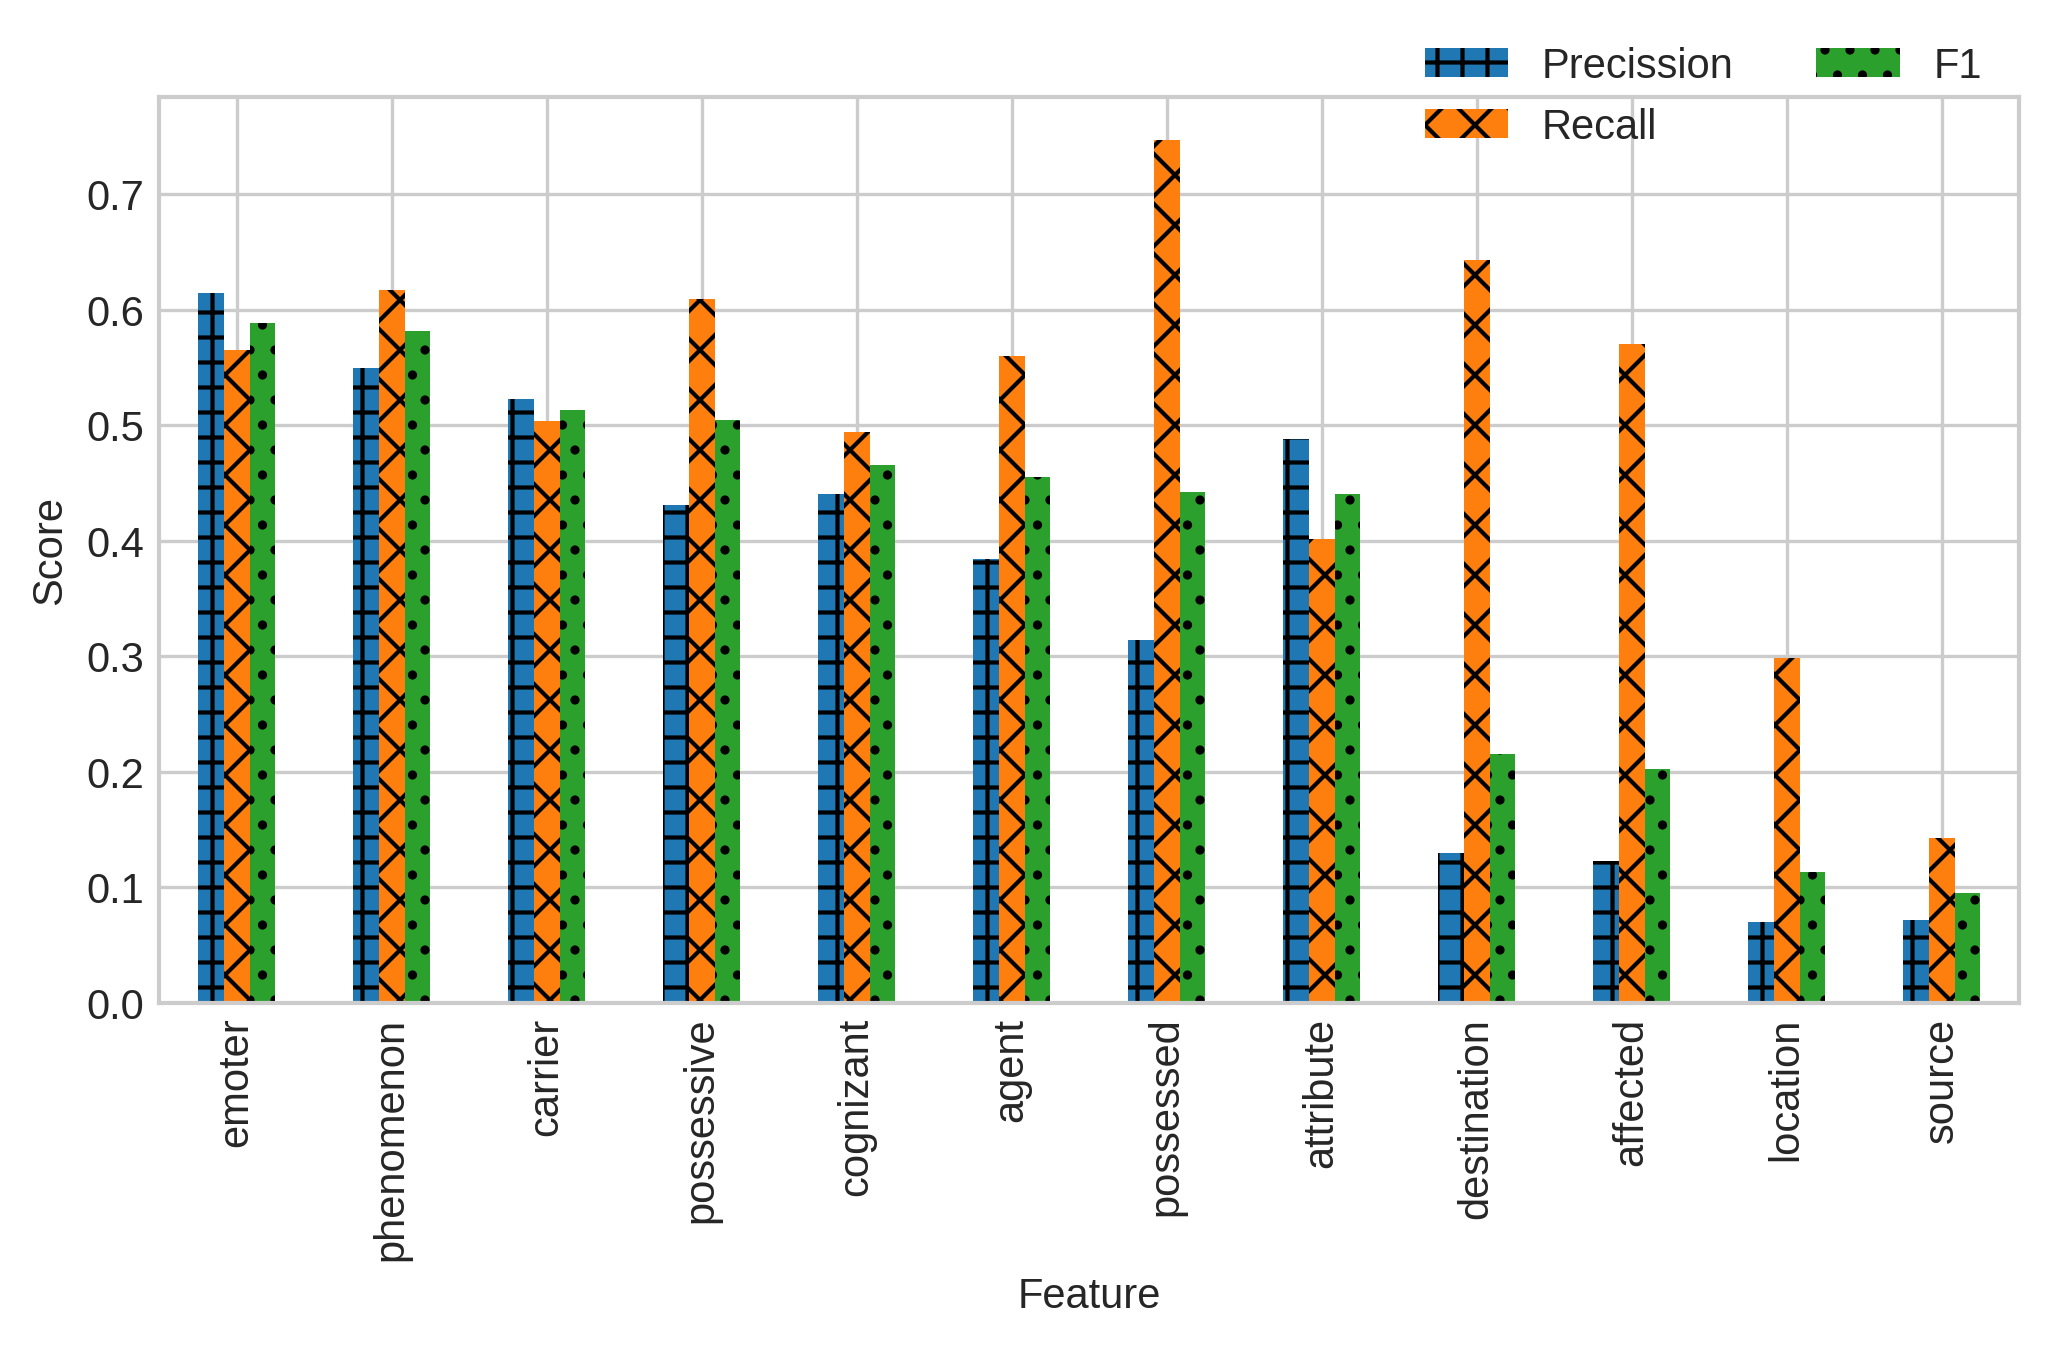

<Figure size 2400x1200 with 0 Axes>

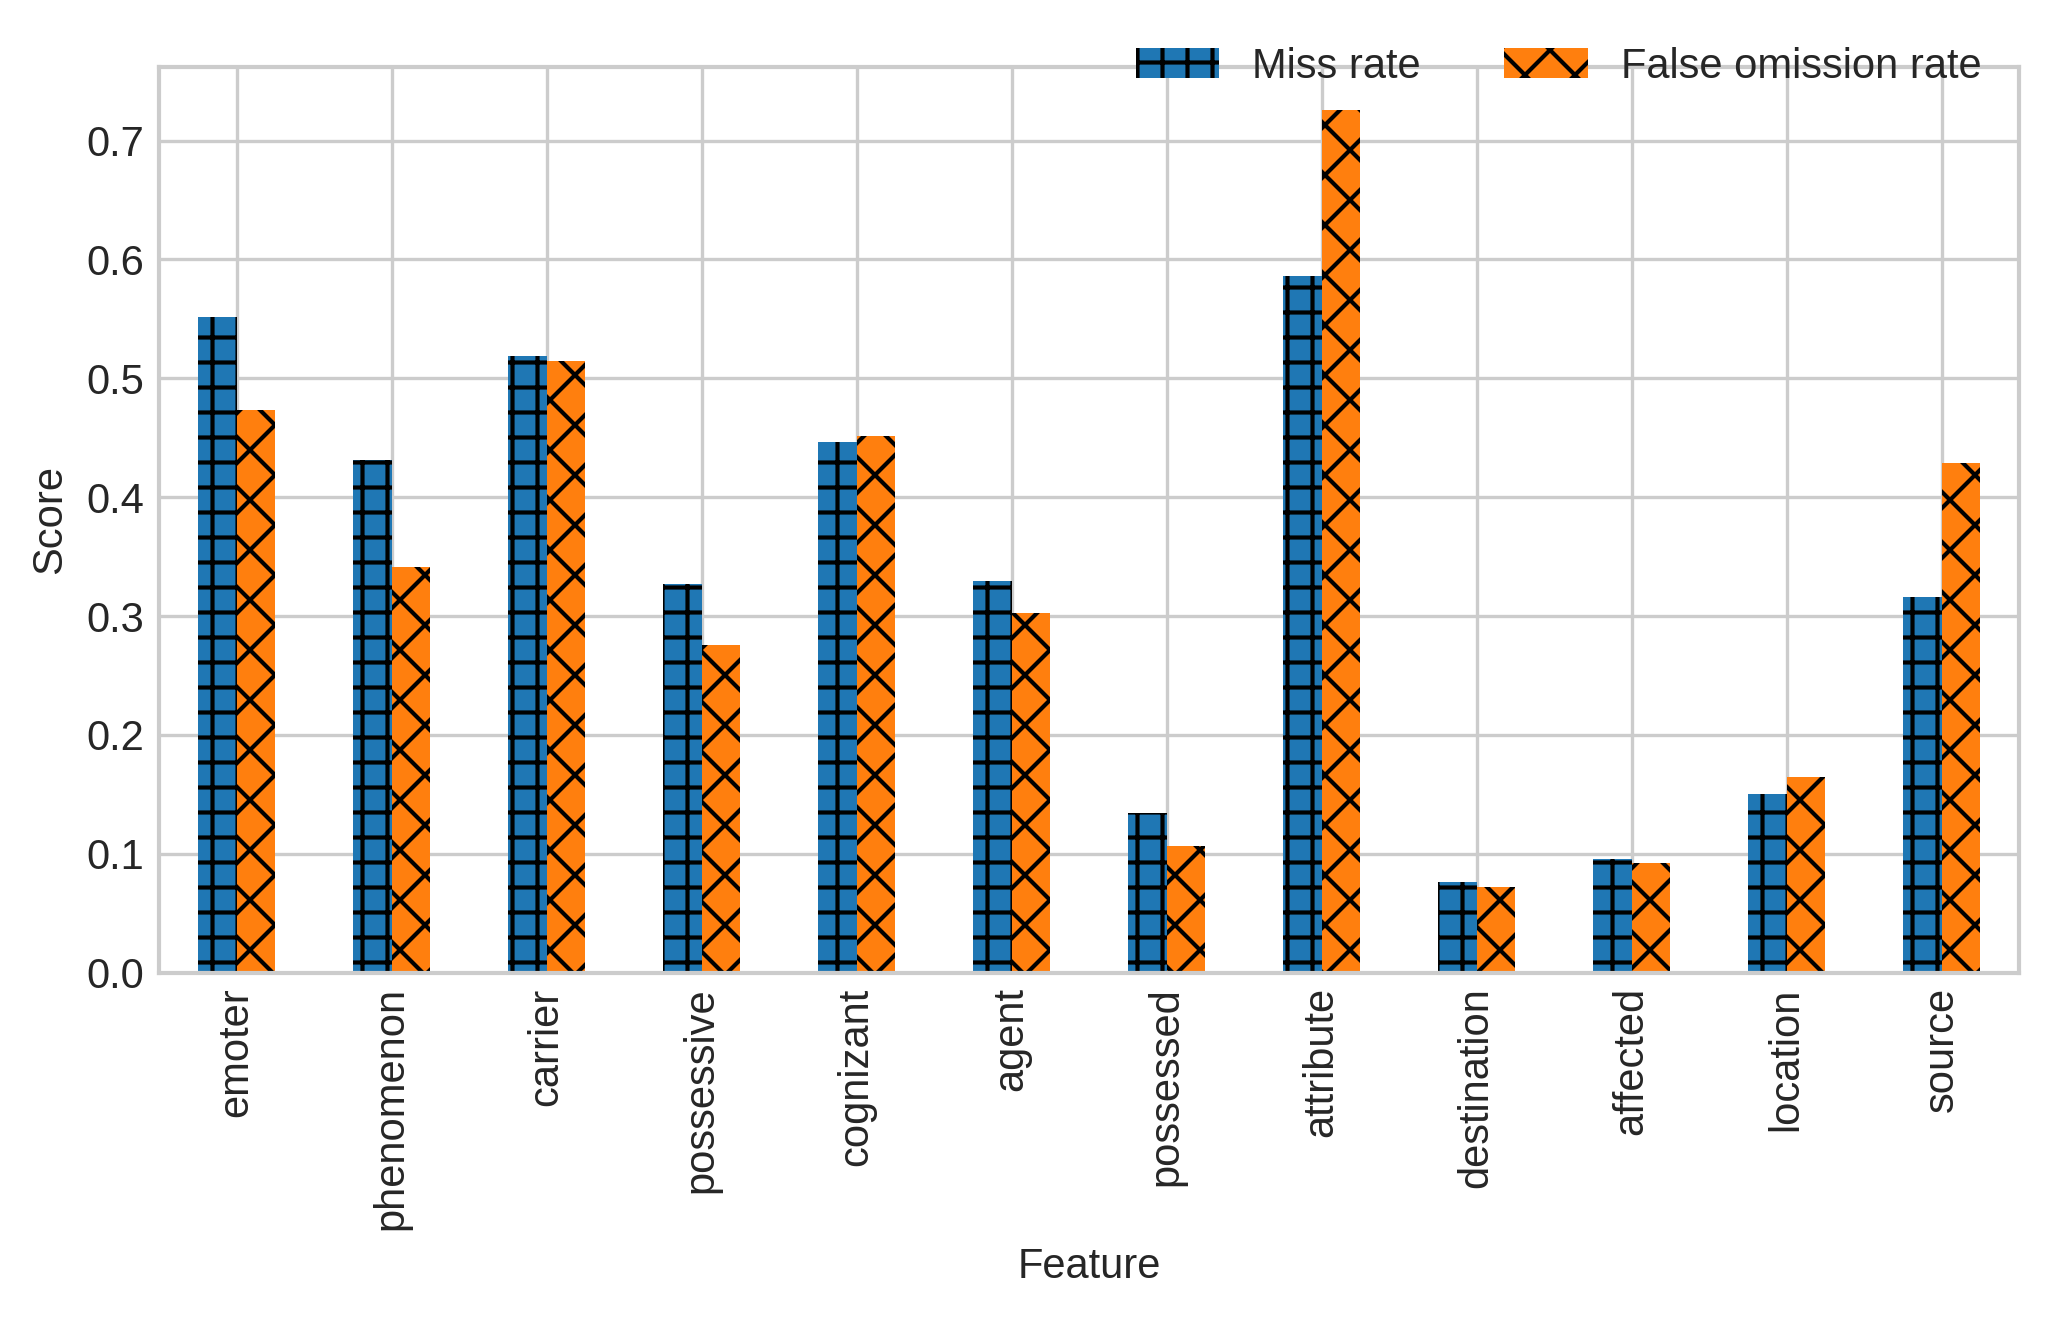

<Figure size 2400x1200 with 0 Axes>

In [24]:
make_stats2(aggregate, "PARTICIPANT_ROLE_MOST_USED-oe", filters=PARTICIPANT_ROLE_MOST_USED)